In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import BreastCancer
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import ResUNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
BreastCancer()

Path to downloaded dataset files: /kaggle/input/breast-cancer-ss
Dataset copied to: /content/datasets/breast-cancer-ss
Could not delete original download folder '/kaggle/input/breast-cancer-ss': [Errno 30] Read-only file system: 'core_A04P_A2_patch_0066.png'


'/content/datasets/breast-cancer-ss'

In [6]:
config = {"Dir of dataset": "./datasets/breast-cancer-ss", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "patches",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "ResUNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-ResUNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 8582


Organizing masks: 100%|██████████| 8582/8582 [00:00<00:00, 32530.67it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1074


Organizing masks: 100%|██████████| 1074/1074 [00:00<00:00, 76668.92it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1072


Organizing masks: 100%|██████████| 1072/1072 [00:00<00:00, 81646.88it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


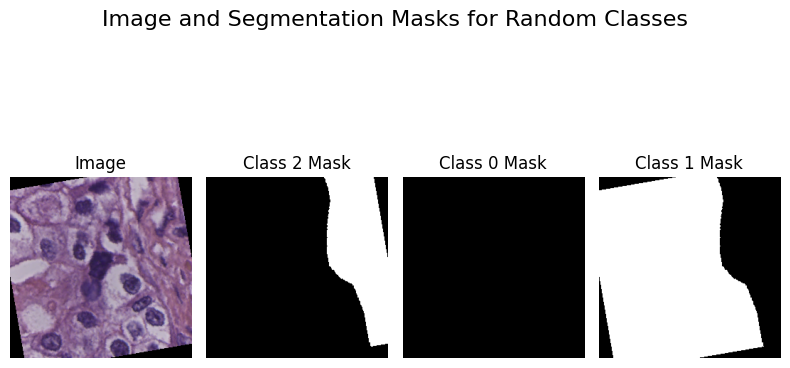

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 204MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


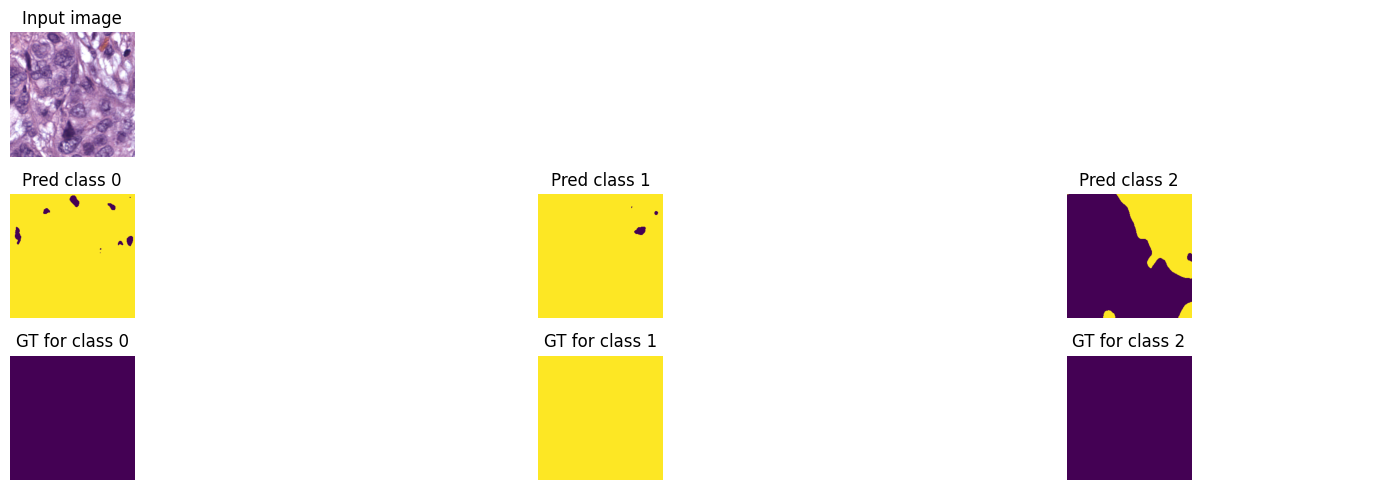

Train loss: 0.64556 | Time: 2m 11s | Val loss: 0.62056
Train_DICE_avg: 0.40220 | Train_Jaccard_avg: 0.33456 | Train_Sensitivity_avg: 0.36888 | Train_Specificity_avg: 0.83939 
Class 0 - Train_DICE: 0.29320 | Train_Jaccard: 0.23556 | Train_Sensitivity: 0.24441 | Train_Specificity: 0.88372 
Class 1 - Train_DICE: 0.48088 | Train_Jaccard: 0.41997 | Train_Sensitivity: 0.43273 | Train_Specificity: 0.83638 
Class 2 - Train_DICE: 0.43253 | Train_Jaccard: 0.34815 | Train_Sensitivity: 0.42948 | Train_Specificity: 0.79807 
Val_DICE_avg: 0.42299 | Val_Jaccard_avg: 0.35906 | Val_Sensitivity_avg: 0.38558 | Val_Specificity_avg: 0.86271 
Class 0 - Val_DICE: 0.29729 | Val_Jaccard: 0.24226 | Val_Sensitivity: 0.24725 | Val_Specificity: 0.90793 
Class 1 - Val_DICE: 0.51084 | Val_Jaccard: 0.45439 | Val_Sensitivity: 0.46163 | Val_Specificity: 0.86282 
Class 2 - Val_DICE: 0.46084 | Val_Jaccard: 0.38054 | Val_Sensitivity: 0.44787 | Val_Specificity: 0.81737 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.62613 | Time: 4m 21s | Val loss: 0.61026
Train_DICE_avg: 0.41370 | Train_Jaccard_avg: 0.34647 | Train_Sensitivity_avg: 0.37209 | Train_Specificity_avg: 0.86211 
Class 0 - Train_DICE: 0.29448 | Train_Jaccard: 0.23659 | Train_Sensitivity: 0.24598 | Train_Specificity: 0.89164 
Class 1 - Train_DICE: 0.48822 | Train_Jaccard: 0.42751 | Train_Sensitivity: 0.44156 | Train_Specificity: 0.86285 
Class 2 - Train_DICE: 0.45840 | Train_Jaccard: 0.37531 | Train_Sensitivity: 0.42873 | Train_Specificity: 0.83185 
Val_DICE_avg: 0.43036 | Val_Jaccard_avg: 0.36646 | Val_Sensitivity_avg: 0.38781 | Val_Specificity_avg: 0.85465 
Class 0 - Val_DICE: 0.30046 | Val_Jaccard: 0.24445 | Val_Sensitivity: 0.25242 | Val_Specificity: 0.89304 
Class 1 - Val_DICE: 0.52017 | Val_Jaccard: 0.46311 | Val_Sensitivity: 0.47638 | Val_Specificity: 0.82610 
Class 2 - Val_DICE: 0.47045 | Val_Jaccard: 0.39181 | Val_Sensitivity: 0.43465 | Val_Specificity: 0.84480 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.61650 | Time: 6m 30s | Val loss: 0.60263
Train_DICE_avg: 0.41691 | Train_Jaccard_avg: 0.34999 | Train_Sensitivity_avg: 0.37370 | Train_Specificity_avg: 0.86657 
Class 0 - Train_DICE: 0.29528 | Train_Jaccard: 0.23745 | Train_Sensitivity: 0.24626 | Train_Specificity: 0.89349 
Class 1 - Train_DICE: 0.49266 | Train_Jaccard: 0.43203 | Train_Sensitivity: 0.44701 | Train_Specificity: 0.86519 
Class 2 - Train_DICE: 0.46280 | Train_Jaccard: 0.38048 | Train_Sensitivity: 0.42783 | Train_Specificity: 0.84103 
Val_DICE_avg: 0.43045 | Val_Jaccard_avg: 0.36667 | Val_Sensitivity_avg: 0.38364 | Val_Specificity_avg: 0.86005 
Class 0 - Val_DICE: 0.30212 | Val_Jaccard: 0.24629 | Val_Sensitivity: 0.25437 | Val_Specificity: 0.89536 
Class 1 - Val_DICE: 0.51744 | Val_Jaccard: 0.46063 | Val_Sensitivity: 0.47101 | Val_Specificity: 0.82638 
Class 2 - Val_DICE: 0.47179 | Val_Jaccard: 0.39308 | Val_Sensitivity: 0.42555 | Val_Specificity: 0.85841 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.60902 | Time: 8m 41s | Val loss: 0.59348
Train_DICE_avg: 0.41992 | Train_Jaccard_avg: 0.35332 | Train_Sensitivity_avg: 0.37646 | Train_Specificity_avg: 0.87107 
Class 0 - Train_DICE: 0.29772 | Train_Jaccard: 0.23973 | Train_Sensitivity: 0.24861 | Train_Specificity: 0.89661 
Class 1 - Train_DICE: 0.49686 | Train_Jaccard: 0.43657 | Train_Sensitivity: 0.45326 | Train_Specificity: 0.86590 
Class 2 - Train_DICE: 0.46519 | Train_Jaccard: 0.38365 | Train_Sensitivity: 0.42751 | Train_Specificity: 0.85069 
Val_DICE_avg: 0.43716 | Val_Jaccard_avg: 0.37358 | Val_Sensitivity_avg: 0.39508 | Val_Specificity_avg: 0.86746 
Class 0 - Val_DICE: 0.30692 | Val_Jaccard: 0.25056 | Val_Sensitivity: 0.25755 | Val_Specificity: 0.90734 
Class 1 - Val_DICE: 0.52570 | Val_Jaccard: 0.46981 | Val_Sensitivity: 0.48327 | Val_Specificity: 0.84412 
Class 2 - Val_DICE: 0.47887 | Val_Jaccard: 0.40035 | Val_Sensitivity: 0.44441 | Val_Specificity: 0.85093 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.60284 | Time: 10m 51s | Val loss: 0.58758
Train_DICE_avg: 0.42257 | Train_Jaccard_avg: 0.35583 | Train_Sensitivity_avg: 0.37939 | Train_Specificity_avg: 0.87123 
Class 0 - Train_DICE: 0.30007 | Train_Jaccard: 0.24167 | Train_Sensitivity: 0.25118 | Train_Specificity: 0.89933 
Class 1 - Train_DICE: 0.50093 | Train_Jaccard: 0.44021 | Train_Sensitivity: 0.46007 | Train_Specificity: 0.86009 
Class 2 - Train_DICE: 0.46670 | Train_Jaccard: 0.38562 | Train_Sensitivity: 0.42693 | Train_Specificity: 0.85427 
Val_DICE_avg: 0.44148 | Val_Jaccard_avg: 0.37764 | Val_Sensitivity_avg: 0.40095 | Val_Specificity_avg: 0.86545 
Class 0 - Val_DICE: 0.31202 | Val_Jaccard: 0.25487 | Val_Sensitivity: 0.26202 | Val_Specificity: 0.90949 
Class 1 - Val_DICE: 0.53110 | Val_Jaccard: 0.47542 | Val_Sensitivity: 0.49616 | Val_Specificity: 0.83333 
Class 2 - Val_DICE: 0.48133 | Val_Jaccard: 0.40263 | Val_Sensitivity: 0.44467 | Val_Specificity: 0.85354 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


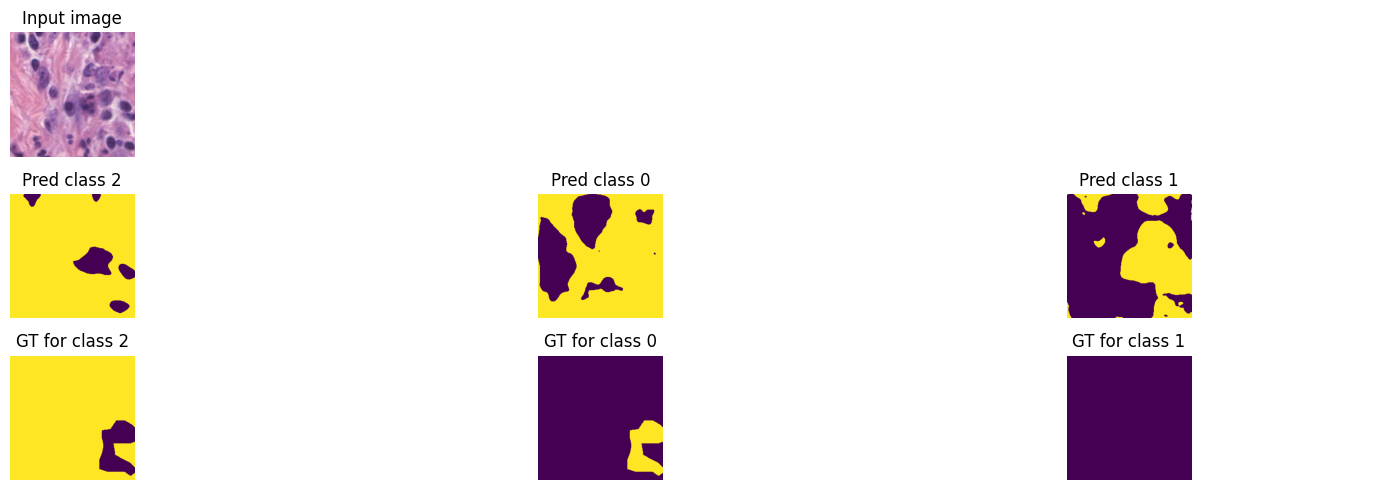

Train loss: 0.59747 | Time: 13m 1s | Val loss: 0.58399
Train_DICE_avg: 0.42513 | Train_Jaccard_avg: 0.35839 | Train_Sensitivity_avg: 0.38268 | Train_Specificity_avg: 0.87272 
Class 0 - Train_DICE: 0.30264 | Train_Jaccard: 0.24407 | Train_Sensitivity: 0.25450 | Train_Specificity: 0.89999 
Class 1 - Train_DICE: 0.50387 | Train_Jaccard: 0.44299 | Train_Sensitivity: 0.46493 | Train_Specificity: 0.86048 
Class 2 - Train_DICE: 0.46890 | Train_Jaccard: 0.38811 | Train_Sensitivity: 0.42862 | Train_Specificity: 0.85768 
Val_DICE_avg: 0.43853 | Val_Jaccard_avg: 0.37550 | Val_Sensitivity_avg: 0.39599 | Val_Specificity_avg: 0.87852 
Class 0 - Val_DICE: 0.30544 | Val_Jaccard: 0.24966 | Val_Sensitivity: 0.25400 | Val_Specificity: 0.92664 
Class 1 - Val_DICE: 0.52842 | Val_Jaccard: 0.47334 | Val_Sensitivity: 0.48807 | Val_Specificity: 0.85580 
Class 2 - Val_DICE: 0.48173 | Val_Jaccard: 0.40349 | Val_Sensitivity: 0.44591 | Val_Specificity: 0.85311 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.59302 | Time: 15m 12s | Val loss: 0.57925
Train_DICE_avg: 0.42771 | Train_Jaccard_avg: 0.36097 | Train_Sensitivity_avg: 0.38604 | Train_Specificity_avg: 0.87382 
Class 0 - Train_DICE: 0.30594 | Train_Jaccard: 0.24732 | Train_Sensitivity: 0.25881 | Train_Specificity: 0.90636 
Class 1 - Train_DICE: 0.50645 | Train_Jaccard: 0.44541 | Train_Sensitivity: 0.46960 | Train_Specificity: 0.85516 
Class 2 - Train_DICE: 0.47074 | Train_Jaccard: 0.39017 | Train_Sensitivity: 0.42971 | Train_Specificity: 0.85993 
Val_DICE_avg: 0.44239 | Val_Jaccard_avg: 0.37904 | Val_Sensitivity_avg: 0.40409 | Val_Specificity_avg: 0.87756 
Class 0 - Val_DICE: 0.30744 | Val_Jaccard: 0.25134 | Val_Sensitivity: 0.25530 | Val_Specificity: 0.93775 
Class 1 - Val_DICE: 0.53736 | Val_Jaccard: 0.48235 | Val_Sensitivity: 0.50292 | Val_Specificity: 0.85200 
Class 2 - Val_DICE: 0.48236 | Val_Jaccard: 0.40343 | Val_Sensitivity: 0.45405 | Val_Specificity: 0.84294 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.52it/s]


Train loss: 0.58879 | Time: 17m 23s | Val loss: 0.57433
Train_DICE_avg: 0.43060 | Train_Jaccard_avg: 0.36387 | Train_Sensitivity_avg: 0.38993 | Train_Specificity_avg: 0.87621 
Class 0 - Train_DICE: 0.31179 | Train_Jaccard: 0.25313 | Train_Sensitivity: 0.26598 | Train_Specificity: 0.91244 
Class 1 - Train_DICE: 0.50852 | Train_Jaccard: 0.44753 | Train_Sensitivity: 0.47381 | Train_Specificity: 0.85523 
Class 2 - Train_DICE: 0.47150 | Train_Jaccard: 0.39095 | Train_Sensitivity: 0.43001 | Train_Specificity: 0.86096 
Val_DICE_avg: 0.44590 | Val_Jaccard_avg: 0.38239 | Val_Sensitivity_avg: 0.40592 | Val_Specificity_avg: 0.87215 
Class 0 - Val_DICE: 0.31361 | Val_Jaccard: 0.25664 | Val_Sensitivity: 0.26301 | Val_Specificity: 0.92448 
Class 1 - Val_DICE: 0.54229 | Val_Jaccard: 0.48720 | Val_Sensitivity: 0.51249 | Val_Specificity: 0.82802 
Class 2 - Val_DICE: 0.48181 | Val_Jaccard: 0.40335 | Val_Sensitivity: 0.44227 | Val_Specificity: 0.86395 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


Train loss: 0.58523 | Time: 19m 35s | Val loss: 0.57036
Train_DICE_avg: 0.43271 | Train_Jaccard_avg: 0.36595 | Train_Sensitivity_avg: 0.39317 | Train_Specificity_avg: 0.87610 
Class 0 - Train_DICE: 0.31470 | Train_Jaccard: 0.25590 | Train_Sensitivity: 0.27056 | Train_Specificity: 0.91429 
Class 1 - Train_DICE: 0.51038 | Train_Jaccard: 0.44926 | Train_Sensitivity: 0.47745 | Train_Specificity: 0.85060 
Class 2 - Train_DICE: 0.47304 | Train_Jaccard: 0.39270 | Train_Sensitivity: 0.43149 | Train_Specificity: 0.86340 
Val_DICE_avg: 0.44970 | Val_Jaccard_avg: 0.38592 | Val_Sensitivity_avg: 0.41088 | Val_Specificity_avg: 0.86983 
Class 0 - Val_DICE: 0.32080 | Val_Jaccard: 0.26297 | Val_Sensitivity: 0.27166 | Val_Specificity: 0.91946 
Class 1 - Val_DICE: 0.54395 | Val_Jaccard: 0.48884 | Val_Sensitivity: 0.51201 | Val_Specificity: 0.83078 
Class 2 - Val_DICE: 0.48436 | Val_Jaccard: 0.40595 | Val_Sensitivity: 0.44897 | Val_Specificity: 0.85925 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:12<00:00,  2.49it/s]


Train loss: 0.58194 | Time: 21m 46s | Val loss: 0.56771
Train_DICE_avg: 0.43440 | Train_Jaccard_avg: 0.36762 | Train_Sensitivity_avg: 0.39586 | Train_Specificity_avg: 0.87590 
Class 0 - Train_DICE: 0.31676 | Train_Jaccard: 0.25778 | Train_Sensitivity: 0.27366 | Train_Specificity: 0.91310 
Class 1 - Train_DICE: 0.51235 | Train_Jaccard: 0.45125 | Train_Sensitivity: 0.48099 | Train_Specificity: 0.85102 
Class 2 - Train_DICE: 0.47410 | Train_Jaccard: 0.39382 | Train_Sensitivity: 0.43293 | Train_Specificity: 0.86359 
Val_DICE_avg: 0.44955 | Val_Jaccard_avg: 0.38583 | Val_Sensitivity_avg: 0.41234 | Val_Specificity_avg: 0.87260 
Class 0 - Val_DICE: 0.31961 | Val_Jaccard: 0.26220 | Val_Sensitivity: 0.27014 | Val_Specificity: 0.92665 
Class 1 - Val_DICE: 0.54472 | Val_Jaccard: 0.48953 | Val_Sensitivity: 0.51439 | Val_Specificity: 0.83742 
Class 2 - Val_DICE: 0.48432 | Val_Jaccard: 0.40578 | Val_Sensitivity: 0.45249 | Val_Specificity: 0.85373 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


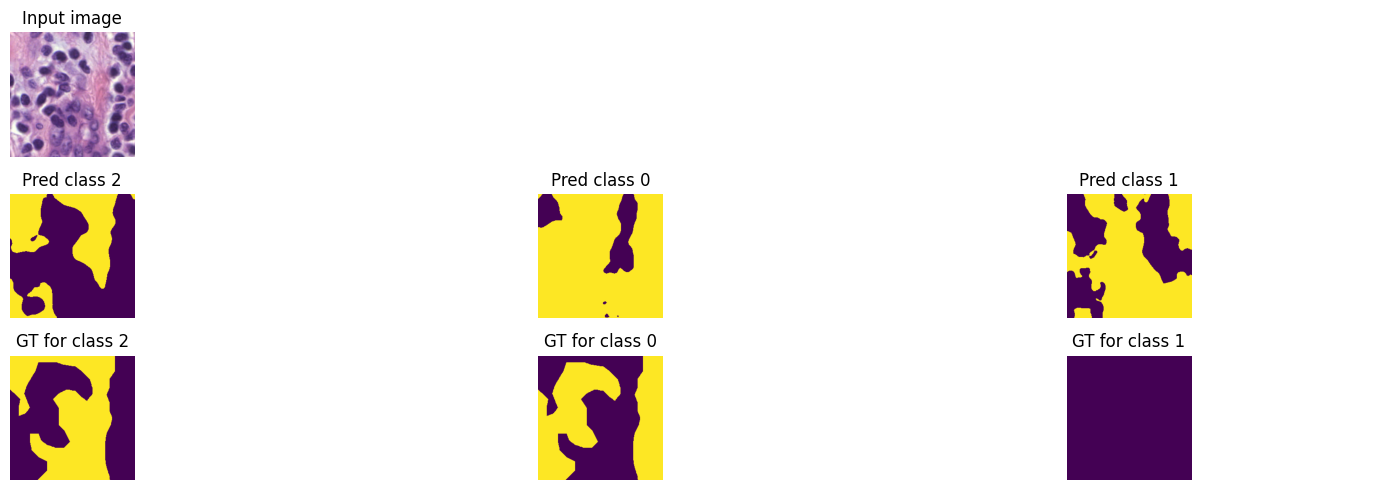

Train loss: 0.57840 | Time: 24m 3s | Val loss: 0.56485
Train_DICE_avg: 0.43619 | Train_Jaccard_avg: 0.36937 | Train_Sensitivity_avg: 0.39872 | Train_Specificity_avg: 0.87653 
Class 0 - Train_DICE: 0.31919 | Train_Jaccard: 0.26001 | Train_Sensitivity: 0.27675 | Train_Specificity: 0.91400 
Class 1 - Train_DICE: 0.51442 | Train_Jaccard: 0.45323 | Train_Sensitivity: 0.48494 | Train_Specificity: 0.84801 
Class 2 - Train_DICE: 0.47495 | Train_Jaccard: 0.39488 | Train_Sensitivity: 0.43448 | Train_Specificity: 0.86757 
Val_DICE_avg: 0.45258 | Val_Jaccard_avg: 0.38886 | Val_Sensitivity_avg: 0.41783 | Val_Specificity_avg: 0.87925 
Class 0 - Val_DICE: 0.32094 | Val_Jaccard: 0.26339 | Val_Sensitivity: 0.27223 | Val_Specificity: 0.92629 
Class 1 - Val_DICE: 0.54958 | Val_Jaccard: 0.49434 | Val_Sensitivity: 0.51813 | Val_Specificity: 0.86201 
Class 2 - Val_DICE: 0.48721 | Val_Jaccard: 0.40887 | Val_Sensitivity: 0.46314 | Val_Specificity: 0.84943 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.57441 | Time: 26m 17s | Val loss: 0.55966
Train_DICE_avg: 0.43894 | Train_Jaccard_avg: 0.37182 | Train_Sensitivity_avg: 0.40276 | Train_Specificity_avg: 0.87425 
Class 0 - Train_DICE: 0.32198 | Train_Jaccard: 0.26203 | Train_Sensitivity: 0.28138 | Train_Specificity: 0.91035 
Class 1 - Train_DICE: 0.51751 | Train_Jaccard: 0.45623 | Train_Sensitivity: 0.49021 | Train_Specificity: 0.84672 
Class 2 - Train_DICE: 0.47732 | Train_Jaccard: 0.39720 | Train_Sensitivity: 0.43668 | Train_Specificity: 0.86567 
Val_DICE_avg: 0.45882 | Val_Jaccard_avg: 0.39467 | Val_Sensitivity_avg: 0.42575 | Val_Specificity_avg: 0.86747 
Class 0 - Val_DICE: 0.32804 | Val_Jaccard: 0.26998 | Val_Sensitivity: 0.28312 | Val_Specificity: 0.91674 
Class 1 - Val_DICE: 0.55786 | Val_Jaccard: 0.50238 | Val_Sensitivity: 0.52906 | Val_Specificity: 0.84108 
Class 2 - Val_DICE: 0.49055 | Val_Jaccard: 0.41164 | Val_Sensitivity: 0.46507 | Val_Specificity: 0.84457 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.57159 | Time: 28m 31s | Val loss: 0.55767
Train_DICE_avg: 0.44065 | Train_Jaccard_avg: 0.37365 | Train_Sensitivity_avg: 0.40569 | Train_Specificity_avg: 0.87453 
Class 0 - Train_DICE: 0.32412 | Train_Jaccard: 0.26395 | Train_Sensitivity: 0.28505 | Train_Specificity: 0.90883 
Class 1 - Train_DICE: 0.52008 | Train_Jaccard: 0.45897 | Train_Sensitivity: 0.49411 | Train_Specificity: 0.84697 
Class 2 - Train_DICE: 0.47776 | Train_Jaccard: 0.39802 | Train_Sensitivity: 0.43790 | Train_Specificity: 0.86778 
Val_DICE_avg: 0.45792 | Val_Jaccard_avg: 0.39411 | Val_Sensitivity_avg: 0.42155 | Val_Specificity_avg: 0.87653 
Class 0 - Val_DICE: 0.32746 | Val_Jaccard: 0.26928 | Val_Sensitivity: 0.28094 | Val_Specificity: 0.92497 
Class 1 - Val_DICE: 0.55666 | Val_Jaccard: 0.50169 | Val_Sensitivity: 0.52691 | Val_Specificity: 0.84586 
Class 2 - Val_DICE: 0.48963 | Val_Jaccard: 0.41137 | Val_Sensitivity: 0.45679 | Val_Specificity: 0.85877 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.56896 | Time: 30m 45s | Val loss: 0.55650
Train_DICE_avg: 0.44249 | Train_Jaccard_avg: 0.37525 | Train_Sensitivity_avg: 0.40884 | Train_Specificity_avg: 0.87391 
Class 0 - Train_DICE: 0.32678 | Train_Jaccard: 0.26626 | Train_Sensitivity: 0.28921 | Train_Specificity: 0.90861 
Class 1 - Train_DICE: 0.52236 | Train_Jaccard: 0.46098 | Train_Sensitivity: 0.49837 | Train_Specificity: 0.84482 
Class 2 - Train_DICE: 0.47834 | Train_Jaccard: 0.39850 | Train_Sensitivity: 0.43895 | Train_Specificity: 0.86831 
Val_DICE_avg: 0.45551 | Val_Jaccard_avg: 0.39162 | Val_Sensitivity_avg: 0.41846 | Val_Specificity_avg: 0.87802 
Class 0 - Val_DICE: 0.33248 | Val_Jaccard: 0.27361 | Val_Sensitivity: 0.28968 | Val_Specificity: 0.90802 
Class 1 - Val_DICE: 0.54430 | Val_Jaccard: 0.48947 | Val_Sensitivity: 0.50828 | Val_Specificity: 0.86621 
Class 2 - Val_DICE: 0.48976 | Val_Jaccard: 0.41178 | Val_Sensitivity: 0.45742 | Val_Specificity: 0.85982 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.56616 | Time: 32m 58s | Val loss: 0.55531
Train_DICE_avg: 0.44461 | Train_Jaccard_avg: 0.37738 | Train_Sensitivity_avg: 0.41229 | Train_Specificity_avg: 0.87243 
Class 0 - Train_DICE: 0.32853 | Train_Jaccard: 0.26803 | Train_Sensitivity: 0.29289 | Train_Specificity: 0.90661 
Class 1 - Train_DICE: 0.52436 | Train_Jaccard: 0.46300 | Train_Sensitivity: 0.50227 | Train_Specificity: 0.84017 
Class 2 - Train_DICE: 0.48093 | Train_Jaccard: 0.40111 | Train_Sensitivity: 0.44170 | Train_Specificity: 0.87051 
Val_DICE_avg: 0.45957 | Val_Jaccard_avg: 0.39578 | Val_Sensitivity_avg: 0.42700 | Val_Specificity_avg: 0.86845 
Class 0 - Val_DICE: 0.33070 | Val_Jaccard: 0.27239 | Val_Sensitivity: 0.28574 | Val_Specificity: 0.91268 
Class 1 - Val_DICE: 0.55384 | Val_Jaccard: 0.49897 | Val_Sensitivity: 0.52308 | Val_Specificity: 0.84351 
Class 2 - Val_DICE: 0.49417 | Val_Jaccard: 0.41597 | Val_Sensitivity: 0.47217 | Val_Specificity: 0.84915 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


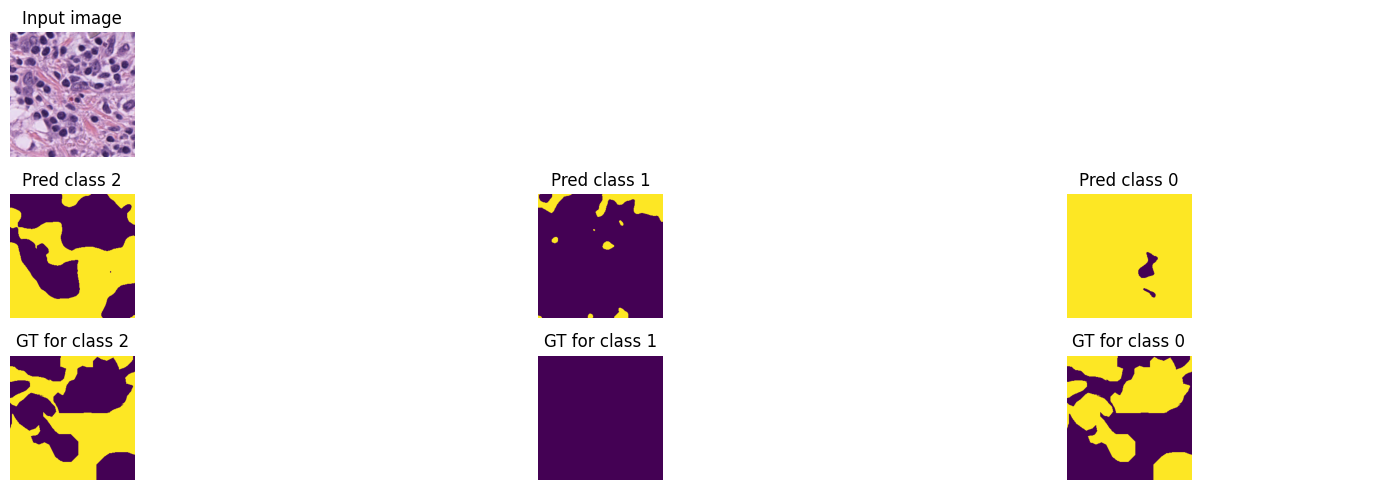

Train loss: 0.56376 | Time: 35m 13s | Val loss: 0.55309
Train_DICE_avg: 0.44673 | Train_Jaccard_avg: 0.37946 | Train_Sensitivity_avg: 0.41613 | Train_Specificity_avg: 0.87202 
Class 0 - Train_DICE: 0.33011 | Train_Jaccard: 0.26940 | Train_Sensitivity: 0.29595 | Train_Specificity: 0.90491 
Class 1 - Train_DICE: 0.52867 | Train_Jaccard: 0.46748 | Train_Sensitivity: 0.50911 | Train_Specificity: 0.84274 
Class 2 - Train_DICE: 0.48141 | Train_Jaccard: 0.40149 | Train_Sensitivity: 0.44334 | Train_Specificity: 0.86842 
Val_DICE_avg: 0.46157 | Val_Jaccard_avg: 0.39779 | Val_Sensitivity_avg: 0.42770 | Val_Specificity_avg: 0.86912 
Class 0 - Val_DICE: 0.33304 | Val_Jaccard: 0.27434 | Val_Sensitivity: 0.28844 | Val_Specificity: 0.91614 
Class 1 - Val_DICE: 0.56265 | Val_Jaccard: 0.50764 | Val_Sensitivity: 0.53357 | Val_Specificity: 0.83390 
Class 2 - Val_DICE: 0.48903 | Val_Jaccard: 0.41141 | Val_Sensitivity: 0.46109 | Val_Specificity: 0.85733 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.56218 | Time: 37m 27s | Val loss: 0.54851
Train_DICE_avg: 0.44725 | Train_Jaccard_avg: 0.38000 | Train_Sensitivity_avg: 0.41694 | Train_Specificity_avg: 0.87252 
Class 0 - Train_DICE: 0.33135 | Train_Jaccard: 0.27034 | Train_Sensitivity: 0.29833 | Train_Specificity: 0.90397 
Class 1 - Train_DICE: 0.52895 | Train_Jaccard: 0.46805 | Train_Sensitivity: 0.50952 | Train_Specificity: 0.84304 
Class 2 - Train_DICE: 0.48146 | Train_Jaccard: 0.40160 | Train_Sensitivity: 0.44299 | Train_Specificity: 0.87055 
Val_DICE_avg: 0.47110 | Val_Jaccard_avg: 0.40705 | Val_Sensitivity_avg: 0.43940 | Val_Specificity_avg: 0.86592 
Class 0 - Val_DICE: 0.34036 | Val_Jaccard: 0.28082 | Val_Sensitivity: 0.30081 | Val_Specificity: 0.90778 
Class 1 - Val_DICE: 0.58310 | Val_Jaccard: 0.52837 | Val_Sensitivity: 0.56414 | Val_Specificity: 0.82210 
Class 2 - Val_DICE: 0.48983 | Val_Jaccard: 0.41198 | Val_Sensitivity: 0.45323 | Val_Specificity: 0.86788 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.56021 | Time: 39m 40s | Val loss: 0.54801
Train_DICE_avg: 0.44890 | Train_Jaccard_avg: 0.38160 | Train_Sensitivity_avg: 0.41978 | Train_Specificity_avg: 0.87100 
Class 0 - Train_DICE: 0.33308 | Train_Jaccard: 0.27186 | Train_Sensitivity: 0.30092 | Train_Specificity: 0.90304 
Class 1 - Train_DICE: 0.53102 | Train_Jaccard: 0.47007 | Train_Sensitivity: 0.51331 | Train_Specificity: 0.83942 
Class 2 - Train_DICE: 0.48259 | Train_Jaccard: 0.40287 | Train_Sensitivity: 0.44510 | Train_Specificity: 0.87053 
Val_DICE_avg: 0.46733 | Val_Jaccard_avg: 0.40314 | Val_Sensitivity_avg: 0.43564 | Val_Specificity_avg: 0.87104 
Class 0 - Val_DICE: 0.34479 | Val_Jaccard: 0.28484 | Val_Sensitivity: 0.30840 | Val_Specificity: 0.90116 
Class 1 - Val_DICE: 0.56535 | Val_Jaccard: 0.51072 | Val_Sensitivity: 0.53580 | Val_Specificity: 0.84969 
Class 2 - Val_DICE: 0.49185 | Val_Jaccard: 0.41387 | Val_Sensitivity: 0.46273 | Val_Specificity: 0.86226 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.55823 | Time: 41m 54s | Val loss: 0.54541
Train_DICE_avg: 0.45139 | Train_Jaccard_avg: 0.38405 | Train_Sensitivity_avg: 0.42318 | Train_Specificity_avg: 0.87002 
Class 0 - Train_DICE: 0.33391 | Train_Jaccard: 0.27244 | Train_Sensitivity: 0.30383 | Train_Specificity: 0.90133 
Class 1 - Train_DICE: 0.53647 | Train_Jaccard: 0.47543 | Train_Sensitivity: 0.52025 | Train_Specificity: 0.83886 
Class 2 - Train_DICE: 0.48379 | Train_Jaccard: 0.40428 | Train_Sensitivity: 0.44545 | Train_Specificity: 0.86988 
Val_DICE_avg: 0.47636 | Val_Jaccard_avg: 0.41202 | Val_Sensitivity_avg: 0.44966 | Val_Specificity_avg: 0.85855 
Class 0 - Val_DICE: 0.34406 | Val_Jaccard: 0.28508 | Val_Sensitivity: 0.30406 | Val_Specificity: 0.91678 
Class 1 - Val_DICE: 0.59141 | Val_Jaccard: 0.53538 | Val_Sensitivity: 0.57782 | Val_Specificity: 0.80280 
Class 2 - Val_DICE: 0.49362 | Val_Jaccard: 0.41559 | Val_Sensitivity: 0.46710 | Val_Specificity: 0.85607 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.55600 | Time: 44m 7s | Val loss: 0.54507
Train_DICE_avg: 0.45343 | Train_Jaccard_avg: 0.38630 | Train_Sensitivity_avg: 0.42630 | Train_Specificity_avg: 0.87051 
Class 0 - Train_DICE: 0.33847 | Train_Jaccard: 0.27694 | Train_Sensitivity: 0.30968 | Train_Specificity: 0.90112 
Class 1 - Train_DICE: 0.53772 | Train_Jaccard: 0.47725 | Train_Sensitivity: 0.52259 | Train_Specificity: 0.83839 
Class 2 - Train_DICE: 0.48410 | Train_Jaccard: 0.40470 | Train_Sensitivity: 0.44662 | Train_Specificity: 0.87201 
Val_DICE_avg: 0.47349 | Val_Jaccard_avg: 0.40935 | Val_Sensitivity_avg: 0.44685 | Val_Specificity_avg: 0.86365 
Class 0 - Val_DICE: 0.34576 | Val_Jaccard: 0.28679 | Val_Sensitivity: 0.30892 | Val_Specificity: 0.91536 
Class 1 - Val_DICE: 0.58436 | Val_Jaccard: 0.52903 | Val_Sensitivity: 0.56739 | Val_Specificity: 0.82331 
Class 2 - Val_DICE: 0.49034 | Val_Jaccard: 0.41222 | Val_Sensitivity: 0.46425 | Val_Specificity: 0.85229 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


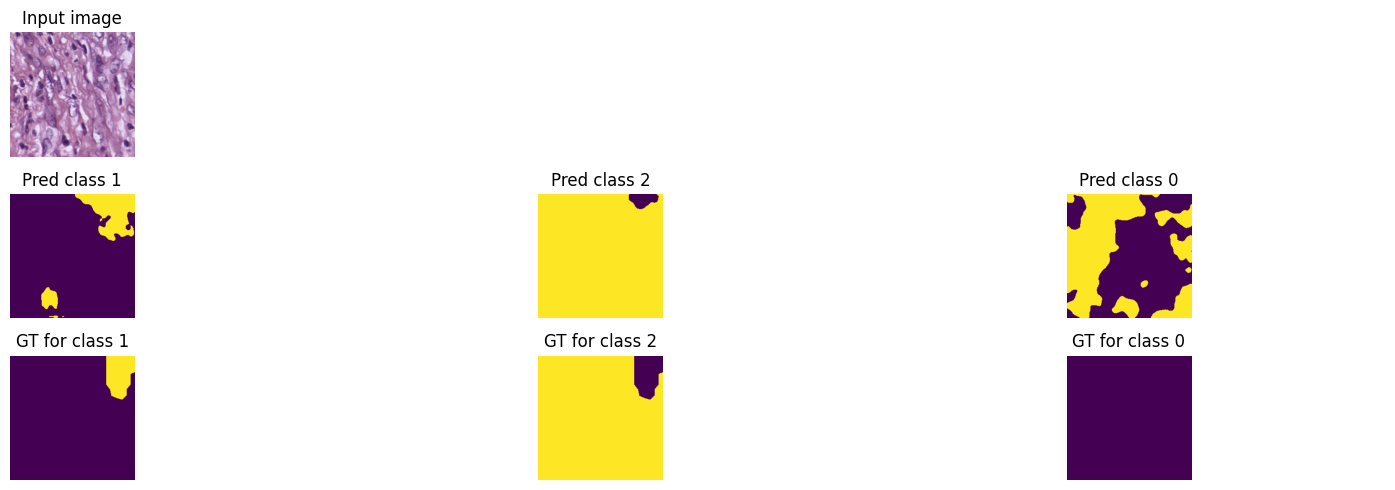

Train loss: 0.55364 | Time: 46m 22s | Val loss: 0.54398
Train_DICE_avg: 0.45663 | Train_Jaccard_avg: 0.38966 | Train_Sensitivity_avg: 0.43003 | Train_Specificity_avg: 0.87397 
Class 0 - Train_DICE: 0.33993 | Train_Jaccard: 0.27837 | Train_Sensitivity: 0.31214 | Train_Specificity: 0.90117 
Class 1 - Train_DICE: 0.54297 | Train_Jaccard: 0.48295 | Train_Sensitivity: 0.52865 | Train_Specificity: 0.84804 
Class 2 - Train_DICE: 0.48698 | Train_Jaccard: 0.40766 | Train_Sensitivity: 0.44928 | Train_Specificity: 0.87271 
Val_DICE_avg: 0.48148 | Val_Jaccard_avg: 0.41739 | Val_Sensitivity_avg: 0.45760 | Val_Specificity_avg: 0.85480 
Class 0 - Val_DICE: 0.34064 | Val_Jaccard: 0.28212 | Val_Sensitivity: 0.29808 | Val_Specificity: 0.92373 
Class 1 - Val_DICE: 0.61301 | Val_Jaccard: 0.55729 | Val_Sensitivity: 0.61524 | Val_Specificity: 0.78436 
Class 2 - Val_DICE: 0.49079 | Val_Jaccard: 0.41275 | Val_Sensitivity: 0.45949 | Val_Specificity: 0.85631 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.55147 | Time: 48m 36s | Val loss: 0.54207
Train_DICE_avg: 0.45818 | Train_Jaccard_avg: 0.39125 | Train_Sensitivity_avg: 0.43271 | Train_Specificity_avg: 0.87320 
Class 0 - Train_DICE: 0.34025 | Train_Jaccard: 0.27839 | Train_Sensitivity: 0.31375 | Train_Specificity: 0.90222 
Class 1 - Train_DICE: 0.54662 | Train_Jaccard: 0.48682 | Train_Sensitivity: 0.53387 | Train_Specificity: 0.84354 
Class 2 - Train_DICE: 0.48766 | Train_Jaccard: 0.40853 | Train_Sensitivity: 0.45052 | Train_Specificity: 0.87385 
Val_DICE_avg: 0.48650 | Val_Jaccard_avg: 0.42205 | Val_Sensitivity_avg: 0.46479 | Val_Specificity_avg: 0.85065 
Class 0 - Val_DICE: 0.34420 | Val_Jaccard: 0.28506 | Val_Sensitivity: 0.30458 | Val_Specificity: 0.91747 
Class 1 - Val_DICE: 0.62096 | Val_Jaccard: 0.56436 | Val_Sensitivity: 0.62753 | Val_Specificity: 0.77363 
Class 2 - Val_DICE: 0.49435 | Val_Jaccard: 0.41674 | Val_Sensitivity: 0.46226 | Val_Specificity: 0.86084 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.54859 | Time: 50m 50s | Val loss: 0.54148
Train_DICE_avg: 0.46237 | Train_Jaccard_avg: 0.39565 | Train_Sensitivity_avg: 0.43761 | Train_Specificity_avg: 0.87267 
Class 0 - Train_DICE: 0.34289 | Train_Jaccard: 0.28108 | Train_Sensitivity: 0.31659 | Train_Specificity: 0.90151 
Class 1 - Train_DICE: 0.55418 | Train_Jaccard: 0.49468 | Train_Sensitivity: 0.54339 | Train_Specificity: 0.84323 
Class 2 - Train_DICE: 0.49004 | Train_Jaccard: 0.41119 | Train_Sensitivity: 0.45284 | Train_Specificity: 0.87326 
Val_DICE_avg: 0.48627 | Val_Jaccard_avg: 0.42197 | Val_Sensitivity_avg: 0.46665 | Val_Specificity_avg: 0.84901 
Class 0 - Val_DICE: 0.34416 | Val_Jaccard: 0.28528 | Val_Sensitivity: 0.30554 | Val_Specificity: 0.91591 
Class 1 - Val_DICE: 0.62142 | Val_Jaccard: 0.56515 | Val_Sensitivity: 0.63040 | Val_Specificity: 0.77344 
Class 2 - Val_DICE: 0.49324 | Val_Jaccard: 0.41549 | Val_Sensitivity: 0.46400 | Val_Specificity: 0.85768 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.54751 | Time: 53m 3s | Val loss: 0.54121
Train_DICE_avg: 0.46327 | Train_Jaccard_avg: 0.39671 | Train_Sensitivity_avg: 0.43953 | Train_Specificity_avg: 0.87164 
Class 0 - Train_DICE: 0.34548 | Train_Jaccard: 0.28353 | Train_Sensitivity: 0.32133 | Train_Specificity: 0.89953 
Class 1 - Train_DICE: 0.55465 | Train_Jaccard: 0.49576 | Train_Sensitivity: 0.54477 | Train_Specificity: 0.84236 
Class 2 - Train_DICE: 0.48967 | Train_Jaccard: 0.41085 | Train_Sensitivity: 0.45248 | Train_Specificity: 0.87303 
Val_DICE_avg: 0.48315 | Val_Jaccard_avg: 0.41866 | Val_Sensitivity_avg: 0.45782 | Val_Specificity_avg: 0.85215 
Class 0 - Val_DICE: 0.34182 | Val_Jaccard: 0.28343 | Val_Sensitivity: 0.29935 | Val_Specificity: 0.92753 
Class 1 - Val_DICE: 0.61580 | Val_Jaccard: 0.55812 | Val_Sensitivity: 0.62611 | Val_Specificity: 0.75738 
Class 2 - Val_DICE: 0.49183 | Val_Jaccard: 0.41442 | Val_Sensitivity: 0.44800 | Val_Specificity: 0.87154 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.54560 | Time: 55m 17s | Val loss: 0.54043
Train_DICE_avg: 0.46600 | Train_Jaccard_avg: 0.39957 | Train_Sensitivity_avg: 0.44250 | Train_Specificity_avg: 0.87510 
Class 0 - Train_DICE: 0.34746 | Train_Jaccard: 0.28577 | Train_Sensitivity: 0.32384 | Train_Specificity: 0.90147 
Class 1 - Train_DICE: 0.55848 | Train_Jaccard: 0.49952 | Train_Sensitivity: 0.54802 | Train_Specificity: 0.84758 
Class 2 - Train_DICE: 0.49205 | Train_Jaccard: 0.41341 | Train_Sensitivity: 0.45564 | Train_Specificity: 0.87627 
Val_DICE_avg: 0.49206 | Val_Jaccard_avg: 0.42752 | Val_Sensitivity_avg: 0.47272 | Val_Specificity_avg: 0.84994 
Class 0 - Val_DICE: 0.33968 | Val_Jaccard: 0.28148 | Val_Sensitivity: 0.29638 | Val_Specificity: 0.92609 
Class 1 - Val_DICE: 0.63967 | Val_Jaccard: 0.58209 | Val_Sensitivity: 0.66036 | Val_Specificity: 0.76082 
Class 2 - Val_DICE: 0.49683 | Val_Jaccard: 0.41901 | Val_Sensitivity: 0.46142 | Val_Specificity: 0.86292 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


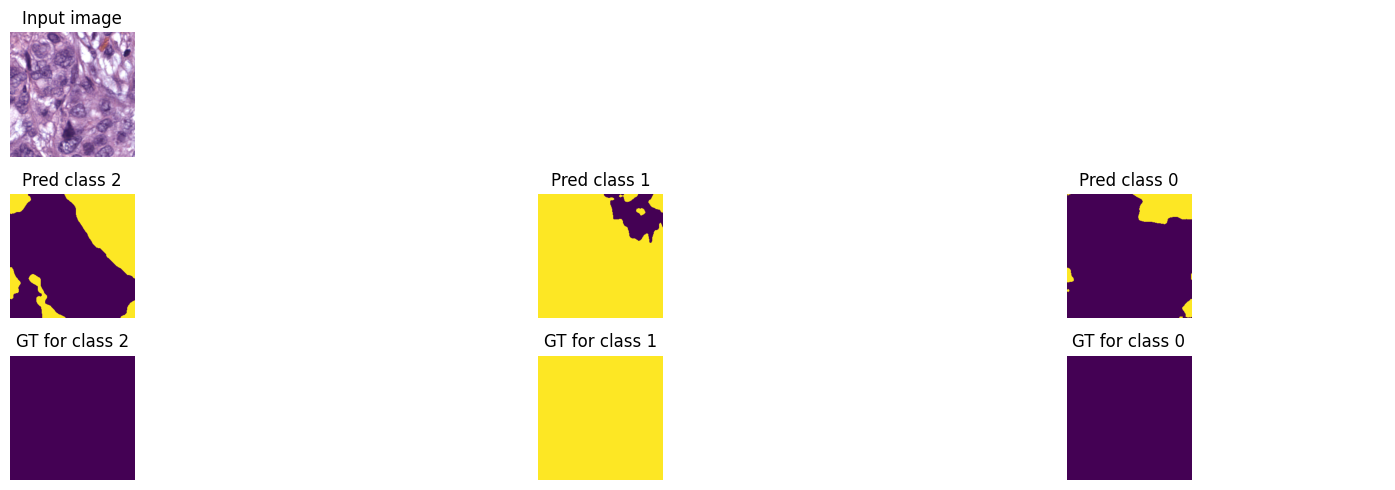

Train loss: 0.54456 | Time: 57m 32s | Val loss: 0.54004
Train_DICE_avg: 0.46812 | Train_Jaccard_avg: 0.40148 | Train_Sensitivity_avg: 0.44610 | Train_Specificity_avg: 0.87558 
Class 0 - Train_DICE: 0.34837 | Train_Jaccard: 0.28645 | Train_Sensitivity: 0.32538 | Train_Specificity: 0.90154 
Class 1 - Train_DICE: 0.56398 | Train_Jaccard: 0.50515 | Train_Sensitivity: 0.55747 | Train_Specificity: 0.84730 
Class 2 - Train_DICE: 0.49200 | Train_Jaccard: 0.41283 | Train_Sensitivity: 0.45545 | Train_Specificity: 0.87790 
Val_DICE_avg: 0.49379 | Val_Jaccard_avg: 0.42893 | Val_Sensitivity_avg: 0.47795 | Val_Specificity_avg: 0.84387 
Class 0 - Val_DICE: 0.34523 | Val_Jaccard: 0.28659 | Val_Sensitivity: 0.30264 | Val_Specificity: 0.92609 
Class 1 - Val_DICE: 0.64042 | Val_Jaccard: 0.58254 | Val_Sensitivity: 0.66834 | Val_Specificity: 0.75196 
Class 2 - Val_DICE: 0.49574 | Val_Jaccard: 0.41767 | Val_Sensitivity: 0.46288 | Val_Specificity: 0.85357 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.54191 | Time: 59m 45s | Val loss: 0.54147
Train_DICE_avg: 0.47130 | Train_Jaccard_avg: 0.40496 | Train_Sensitivity_avg: 0.44925 | Train_Specificity_avg: 0.87649 
Class 0 - Train_DICE: 0.35153 | Train_Jaccard: 0.28979 | Train_Sensitivity: 0.32871 | Train_Specificity: 0.90379 
Class 1 - Train_DICE: 0.56770 | Train_Jaccard: 0.50904 | Train_Sensitivity: 0.56163 | Train_Specificity: 0.84563 
Class 2 - Train_DICE: 0.49465 | Train_Jaccard: 0.41605 | Train_Sensitivity: 0.45742 | Train_Specificity: 0.88005 
Val_DICE_avg: 0.49847 | Val_Jaccard_avg: 0.43285 | Val_Sensitivity_avg: 0.48847 | Val_Specificity_avg: 0.83539 
Class 0 - Val_DICE: 0.34610 | Val_Jaccard: 0.28718 | Val_Sensitivity: 0.30564 | Val_Specificity: 0.91895 
Class 1 - Val_DICE: 0.65646 | Val_Jaccard: 0.59652 | Val_Sensitivity: 0.70415 | Val_Specificity: 0.73056 
Class 2 - Val_DICE: 0.49286 | Val_Jaccard: 0.41483 | Val_Sensitivity: 0.45561 | Val_Specificity: 0.85667 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.54059 | Time: 61m 59s | Val loss: 0.53857
Train_DICE_avg: 0.47187 | Train_Jaccard_avg: 0.40580 | Train_Sensitivity_avg: 0.45023 | Train_Specificity_avg: 0.87641 
Class 0 - Train_DICE: 0.35236 | Train_Jaccard: 0.29051 | Train_Sensitivity: 0.32968 | Train_Specificity: 0.90281 
Class 1 - Train_DICE: 0.56728 | Train_Jaccard: 0.50925 | Train_Sensitivity: 0.56063 | Train_Specificity: 0.84922 
Class 2 - Train_DICE: 0.49598 | Train_Jaccard: 0.41765 | Train_Sensitivity: 0.46038 | Train_Specificity: 0.87721 
Val_DICE_avg: 0.49832 | Val_Jaccard_avg: 0.43365 | Val_Sensitivity_avg: 0.48593 | Val_Specificity_avg: 0.84655 
Class 0 - Val_DICE: 0.34710 | Val_Jaccard: 0.28815 | Val_Sensitivity: 0.30894 | Val_Specificity: 0.91861 
Class 1 - Val_DICE: 0.64771 | Val_Jaccard: 0.59079 | Val_Sensitivity: 0.67649 | Val_Specificity: 0.75993 
Class 2 - Val_DICE: 0.50015 | Val_Jaccard: 0.42202 | Val_Sensitivity: 0.47236 | Val_Specificity: 0.86112 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.53995 | Time: 64m 13s | Val loss: 0.53687
Train_DICE_avg: 0.47529 | Train_Jaccard_avg: 0.40909 | Train_Sensitivity_avg: 0.45433 | Train_Specificity_avg: 0.87674 
Class 0 - Train_DICE: 0.35656 | Train_Jaccard: 0.29489 | Train_Sensitivity: 0.33476 | Train_Specificity: 0.90348 
Class 1 - Train_DICE: 0.57205 | Train_Jaccard: 0.51389 | Train_Sensitivity: 0.56662 | Train_Specificity: 0.85066 
Class 2 - Train_DICE: 0.49726 | Train_Jaccard: 0.41850 | Train_Sensitivity: 0.46162 | Train_Specificity: 0.87609 
Val_DICE_avg: 0.50157 | Val_Jaccard_avg: 0.43663 | Val_Sensitivity_avg: 0.49087 | Val_Specificity_avg: 0.84117 
Class 0 - Val_DICE: 0.35798 | Val_Jaccard: 0.29815 | Val_Sensitivity: 0.32697 | Val_Specificity: 0.91123 
Class 1 - Val_DICE: 0.65012 | Val_Jaccard: 0.59351 | Val_Sensitivity: 0.67634 | Val_Specificity: 0.75771 
Class 2 - Val_DICE: 0.49662 | Val_Jaccard: 0.41823 | Val_Sensitivity: 0.46930 | Val_Specificity: 0.85457 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.53763 | Time: 66m 27s | Val loss: 0.53952
Train_DICE_avg: 0.48134 | Train_Jaccard_avg: 0.41544 | Train_Sensitivity_avg: 0.46209 | Train_Specificity_avg: 0.87680 
Class 0 - Train_DICE: 0.35667 | Train_Jaccard: 0.29473 | Train_Sensitivity: 0.33599 | Train_Specificity: 0.90320 
Class 1 - Train_DICE: 0.58909 | Train_Jaccard: 0.53169 | Train_Sensitivity: 0.58698 | Train_Specificity: 0.84728 
Class 2 - Train_DICE: 0.49826 | Train_Jaccard: 0.41988 | Train_Sensitivity: 0.46331 | Train_Specificity: 0.87993 
Val_DICE_avg: 0.50355 | Val_Jaccard_avg: 0.43771 | Val_Sensitivity_avg: 0.49727 | Val_Specificity_avg: 0.83717 
Class 0 - Val_DICE: 0.34926 | Val_Jaccard: 0.28964 | Val_Sensitivity: 0.31130 | Val_Specificity: 0.91925 
Class 1 - Val_DICE: 0.66687 | Val_Jaccard: 0.60746 | Val_Sensitivity: 0.71991 | Val_Specificity: 0.73201 
Class 2 - Val_DICE: 0.49452 | Val_Jaccard: 0.41602 | Val_Sensitivity: 0.46061 | Val_Specificity: 0.86024 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


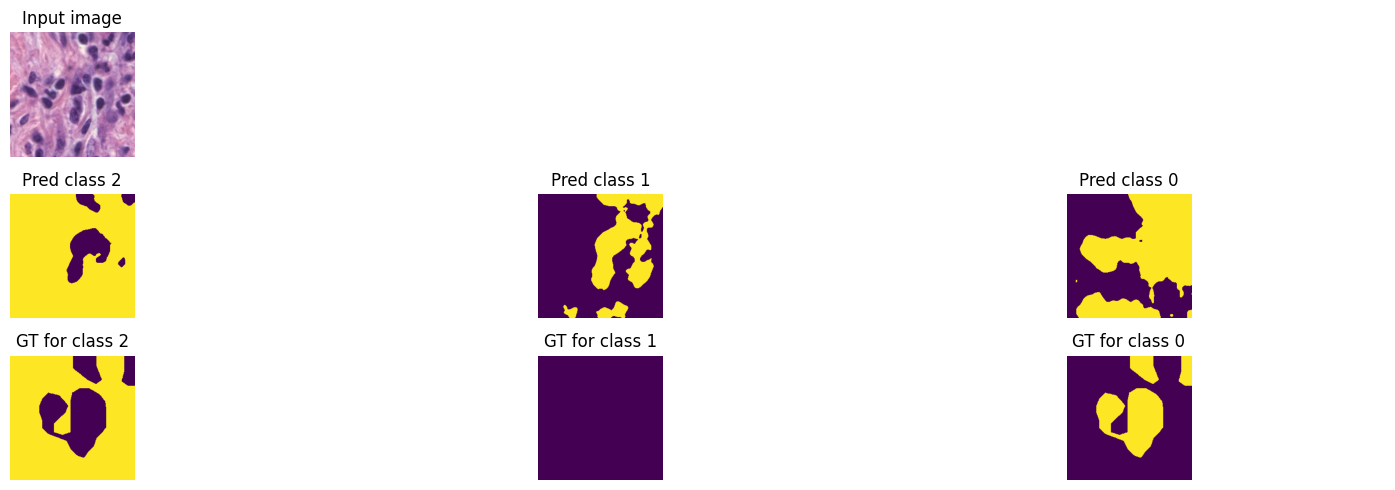

Train loss: 0.53539 | Time: 68m 42s | Val loss: 0.53473
Train_DICE_avg: 0.48478 | Train_Jaccard_avg: 0.41919 | Train_Sensitivity_avg: 0.46507 | Train_Specificity_avg: 0.87980 
Class 0 - Train_DICE: 0.36107 | Train_Jaccard: 0.29954 | Train_Sensitivity: 0.33989 | Train_Specificity: 0.90452 
Class 1 - Train_DICE: 0.59158 | Train_Jaccard: 0.53455 | Train_Sensitivity: 0.58900 | Train_Specificity: 0.85370 
Class 2 - Train_DICE: 0.50167 | Train_Jaccard: 0.42349 | Train_Sensitivity: 0.46632 | Train_Specificity: 0.88116 
Val_DICE_avg: 0.50356 | Val_Jaccard_avg: 0.43852 | Val_Sensitivity_avg: 0.49150 | Val_Specificity_avg: 0.84681 
Class 0 - Val_DICE: 0.35613 | Val_Jaccard: 0.29606 | Val_Sensitivity: 0.32198 | Val_Specificity: 0.91291 
Class 1 - Val_DICE: 0.65361 | Val_Jaccard: 0.59644 | Val_Sensitivity: 0.68400 | Val_Specificity: 0.75643 
Class 2 - Val_DICE: 0.50093 | Val_Jaccard: 0.42307 | Val_Sensitivity: 0.46851 | Val_Specificity: 0.87108 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.53312 | Time: 70m 57s | Val loss: 0.53578
Train_DICE_avg: 0.48856 | Train_Jaccard_avg: 0.42289 | Train_Sensitivity_avg: 0.47032 | Train_Specificity_avg: 0.88061 
Class 0 - Train_DICE: 0.36535 | Train_Jaccard: 0.30341 | Train_Sensitivity: 0.34514 | Train_Specificity: 0.90619 
Class 1 - Train_DICE: 0.59922 | Train_Jaccard: 0.54244 | Train_Sensitivity: 0.59896 | Train_Specificity: 0.85231 
Class 2 - Train_DICE: 0.50110 | Train_Jaccard: 0.42281 | Train_Sensitivity: 0.46686 | Train_Specificity: 0.88334 
Val_DICE_avg: 0.50998 | Val_Jaccard_avg: 0.44499 | Val_Sensitivity_avg: 0.50500 | Val_Specificity_avg: 0.83826 
Class 0 - Val_DICE: 0.35765 | Val_Jaccard: 0.29750 | Val_Sensitivity: 0.32568 | Val_Specificity: 0.91182 
Class 1 - Val_DICE: 0.67434 | Val_Jaccard: 0.61736 | Val_Sensitivity: 0.72161 | Val_Specificity: 0.74293 
Class 2 - Val_DICE: 0.49796 | Val_Jaccard: 0.42011 | Val_Sensitivity: 0.46773 | Val_Specificity: 0.86004 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.53046 | Time: 73m 11s | Val loss: 0.52634
Train_DICE_avg: 0.49354 | Train_Jaccard_avg: 0.42812 | Train_Sensitivity_avg: 0.47688 | Train_Specificity_avg: 0.87896 
Class 0 - Train_DICE: 0.36542 | Train_Jaccard: 0.30338 | Train_Sensitivity: 0.34645 | Train_Specificity: 0.90796 
Class 1 - Train_DICE: 0.61132 | Train_Jaccard: 0.55529 | Train_Sensitivity: 0.61513 | Train_Specificity: 0.84607 
Class 2 - Train_DICE: 0.50387 | Train_Jaccard: 0.42570 | Train_Sensitivity: 0.46908 | Train_Specificity: 0.88285 
Val_DICE_avg: 0.51441 | Val_Jaccard_avg: 0.45053 | Val_Sensitivity_avg: 0.50462 | Val_Specificity_avg: 0.85198 
Class 0 - Val_DICE: 0.36229 | Val_Jaccard: 0.30238 | Val_Sensitivity: 0.33802 | Val_Specificity: 0.91114 
Class 1 - Val_DICE: 0.67910 | Val_Jaccard: 0.62474 | Val_Sensitivity: 0.71137 | Val_Specificity: 0.76668 
Class 2 - Val_DICE: 0.50183 | Val_Jaccard: 0.42446 | Val_Sensitivity: 0.46448 | Val_Specificity: 0.87810 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.52756 | Time: 75m 25s | Val loss: 0.52551
Train_DICE_avg: 0.50199 | Train_Jaccard_avg: 0.43683 | Train_Sensitivity_avg: 0.48812 | Train_Specificity_avg: 0.87926 
Class 0 - Train_DICE: 0.36826 | Train_Jaccard: 0.30661 | Train_Sensitivity: 0.34801 | Train_Specificity: 0.90804 
Class 1 - Train_DICE: 0.63215 | Train_Jaccard: 0.57603 | Train_Sensitivity: 0.64596 | Train_Specificity: 0.84164 
Class 2 - Train_DICE: 0.50556 | Train_Jaccard: 0.42784 | Train_Sensitivity: 0.47037 | Train_Specificity: 0.88811 
Val_DICE_avg: 0.51893 | Val_Jaccard_avg: 0.45484 | Val_Sensitivity_avg: 0.51583 | Val_Specificity_avg: 0.84013 
Class 0 - Val_DICE: 0.37610 | Val_Jaccard: 0.31605 | Val_Sensitivity: 0.35103 | Val_Specificity: 0.90638 
Class 1 - Val_DICE: 0.67784 | Val_Jaccard: 0.62363 | Val_Sensitivity: 0.71737 | Val_Specificity: 0.75988 
Class 2 - Val_DICE: 0.50284 | Val_Jaccard: 0.42483 | Val_Sensitivity: 0.47908 | Val_Specificity: 0.85413 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.52051 | Time: 77m 40s | Val loss: 0.51087
Train_DICE_avg: 0.51065 | Train_Jaccard_avg: 0.44557 | Train_Sensitivity_avg: 0.49991 | Train_Specificity_avg: 0.87734 
Class 0 - Train_DICE: 0.37092 | Train_Jaccard: 0.30912 | Train_Sensitivity: 0.35287 | Train_Specificity: 0.90475 
Class 1 - Train_DICE: 0.65632 | Train_Jaccard: 0.60074 | Train_Sensitivity: 0.68004 | Train_Specificity: 0.83896 
Class 2 - Train_DICE: 0.50471 | Train_Jaccard: 0.42685 | Train_Sensitivity: 0.46684 | Train_Specificity: 0.88833 
Val_DICE_avg: 0.52413 | Val_Jaccard_avg: 0.46050 | Val_Sensitivity_avg: 0.52313 | Val_Specificity_avg: 0.84721 
Class 0 - Val_DICE: 0.36627 | Val_Jaccard: 0.30624 | Val_Sensitivity: 0.33635 | Val_Specificity: 0.91649 
Class 1 - Val_DICE: 0.70319 | Val_Jaccard: 0.65024 | Val_Sensitivity: 0.75700 | Val_Specificity: 0.75945 
Class 2 - Val_DICE: 0.50292 | Val_Jaccard: 0.42502 | Val_Sensitivity: 0.47605 | Val_Specificity: 0.86570 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


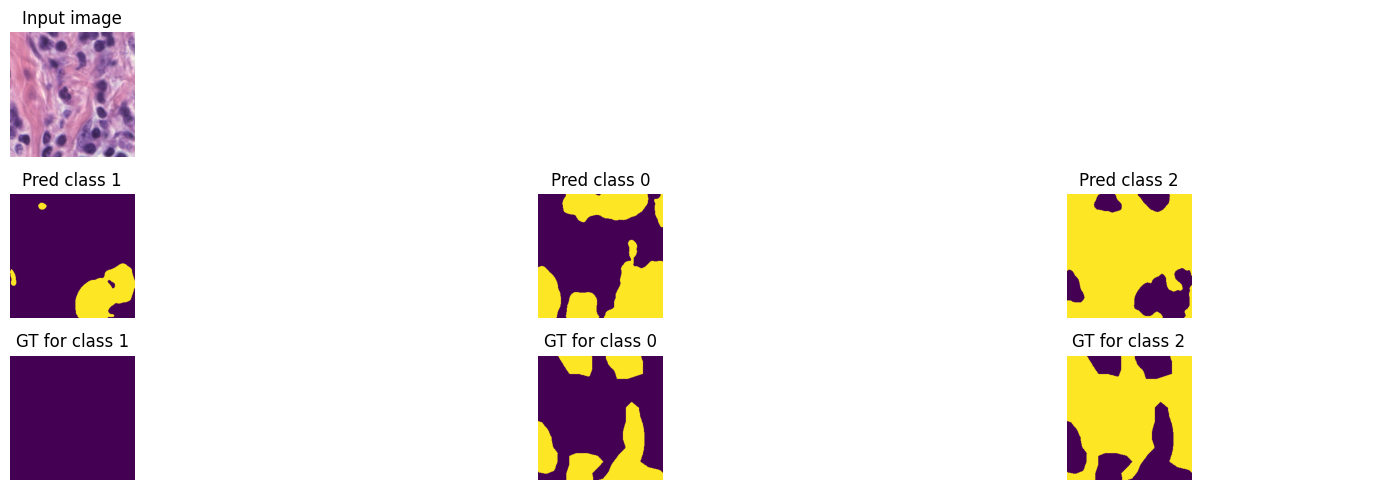

Train loss: 0.51431 | Time: 79m 55s | Val loss: 0.49307
Train_DICE_avg: 0.51254 | Train_Jaccard_avg: 0.44748 | Train_Sensitivity_avg: 0.50697 | Train_Specificity_avg: 0.87801 
Class 0 - Train_DICE: 0.36987 | Train_Jaccard: 0.30803 | Train_Sensitivity: 0.35123 | Train_Specificity: 0.90606 
Class 1 - Train_DICE: 0.66639 | Train_Jaccard: 0.61104 | Train_Sensitivity: 0.70421 | Train_Specificity: 0.83878 
Class 2 - Train_DICE: 0.50136 | Train_Jaccard: 0.42338 | Train_Sensitivity: 0.46547 | Train_Specificity: 0.88918 
Val_DICE_avg: 0.53381 | Val_Jaccard_avg: 0.47090 | Val_Sensitivity_avg: 0.54049 | Val_Specificity_avg: 0.85062 
Class 0 - Val_DICE: 0.37511 | Val_Jaccard: 0.31482 | Val_Sensitivity: 0.35006 | Val_Specificity: 0.91164 
Class 1 - Val_DICE: 0.72667 | Val_Jaccard: 0.67644 | Val_Sensitivity: 0.80615 | Val_Specificity: 0.75664 
Class 2 - Val_DICE: 0.49964 | Val_Jaccard: 0.42143 | Val_Sensitivity: 0.46526 | Val_Specificity: 0.88359 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.50459 | Time: 82m 9s | Val loss: 0.48404
Train_DICE_avg: 0.52020 | Train_Jaccard_avg: 0.45534 | Train_Sensitivity_avg: 0.51767 | Train_Specificity_avg: 0.87811 
Class 0 - Train_DICE: 0.37385 | Train_Jaccard: 0.31218 | Train_Sensitivity: 0.35421 | Train_Specificity: 0.91060 
Class 1 - Train_DICE: 0.68275 | Train_Jaccard: 0.62811 | Train_Sensitivity: 0.72890 | Train_Specificity: 0.83582 
Class 2 - Train_DICE: 0.50399 | Train_Jaccard: 0.42574 | Train_Sensitivity: 0.46990 | Train_Specificity: 0.88791 
Val_DICE_avg: 0.53007 | Val_Jaccard_avg: 0.46747 | Val_Sensitivity_avg: 0.54527 | Val_Specificity_avg: 0.84037 
Class 0 - Val_DICE: 0.36091 | Val_Jaccard: 0.30098 | Val_Sensitivity: 0.32957 | Val_Specificity: 0.91804 
Class 1 - Val_DICE: 0.72969 | Val_Jaccard: 0.68033 | Val_Sensitivity: 0.81588 | Val_Specificity: 0.75704 
Class 2 - Val_DICE: 0.49961 | Val_Jaccard: 0.42109 | Val_Sensitivity: 0.49035 | Val_Specificity: 0.84605 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.49567 | Time: 84m 23s | Val loss: 0.47679
Train_DICE_avg: 0.52778 | Train_Jaccard_avg: 0.46359 | Train_Sensitivity_avg: 0.52546 | Train_Specificity_avg: 0.88191 
Class 0 - Train_DICE: 0.37834 | Train_Jaccard: 0.31713 | Train_Sensitivity: 0.36024 | Train_Specificity: 0.91037 
Class 1 - Train_DICE: 0.69908 | Train_Jaccard: 0.64611 | Train_Sensitivity: 0.74597 | Train_Specificity: 0.84543 
Class 2 - Train_DICE: 0.50591 | Train_Jaccard: 0.42753 | Train_Sensitivity: 0.47015 | Train_Specificity: 0.88992 
Val_DICE_avg: 0.54183 | Val_Jaccard_avg: 0.47957 | Val_Sensitivity_avg: 0.55419 | Val_Specificity_avg: 0.85271 
Class 0 - Val_DICE: 0.37603 | Val_Jaccard: 0.31639 | Val_Sensitivity: 0.34761 | Val_Specificity: 0.91554 
Class 1 - Val_DICE: 0.74512 | Val_Jaccard: 0.69563 | Val_Sensitivity: 0.84314 | Val_Specificity: 0.75988 
Class 2 - Val_DICE: 0.50434 | Val_Jaccard: 0.42669 | Val_Sensitivity: 0.47181 | Val_Specificity: 0.88271 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.49039 | Time: 86m 38s | Val loss: 0.47355
Train_DICE_avg: 0.53104 | Train_Jaccard_avg: 0.46713 | Train_Sensitivity_avg: 0.53107 | Train_Specificity_avg: 0.88126 
Class 0 - Train_DICE: 0.38041 | Train_Jaccard: 0.31934 | Train_Sensitivity: 0.36256 | Train_Specificity: 0.90885 
Class 1 - Train_DICE: 0.70437 | Train_Jaccard: 0.65205 | Train_Sensitivity: 0.75676 | Train_Specificity: 0.84584 
Class 2 - Train_DICE: 0.50834 | Train_Jaccard: 0.43000 | Train_Sensitivity: 0.47390 | Train_Specificity: 0.88910 
Val_DICE_avg: 0.54721 | Val_Jaccard_avg: 0.48468 | Val_Sensitivity_avg: 0.56015 | Val_Specificity_avg: 0.85005 
Class 0 - Val_DICE: 0.38883 | Val_Jaccard: 0.32907 | Val_Sensitivity: 0.36932 | Val_Specificity: 0.90928 
Class 1 - Val_DICE: 0.74701 | Val_Jaccard: 0.69677 | Val_Sensitivity: 0.82687 | Val_Specificity: 0.77323 
Class 2 - Val_DICE: 0.50579 | Val_Jaccard: 0.42820 | Val_Sensitivity: 0.48427 | Val_Specificity: 0.86763 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.48532 | Time: 88m 52s | Val loss: 0.48151
Train_DICE_avg: 0.53307 | Train_Jaccard_avg: 0.46925 | Train_Sensitivity_avg: 0.53474 | Train_Specificity_avg: 0.88143 
Class 0 - Train_DICE: 0.37918 | Train_Jaccard: 0.31783 | Train_Sensitivity: 0.36093 | Train_Specificity: 0.91018 
Class 1 - Train_DICE: 0.71272 | Train_Jaccard: 0.66066 | Train_Sensitivity: 0.76855 | Train_Specificity: 0.84516 
Class 2 - Train_DICE: 0.50730 | Train_Jaccard: 0.42927 | Train_Sensitivity: 0.47474 | Train_Specificity: 0.88894 
Val_DICE_avg: 0.53428 | Val_Jaccard_avg: 0.47173 | Val_Sensitivity_avg: 0.54631 | Val_Specificity_avg: 0.84606 
Class 0 - Val_DICE: 0.37742 | Val_Jaccard: 0.31827 | Val_Sensitivity: 0.34839 | Val_Specificity: 0.91434 
Class 1 - Val_DICE: 0.72845 | Val_Jaccard: 0.67821 | Val_Sensitivity: 0.80586 | Val_Specificity: 0.77572 
Class 2 - Val_DICE: 0.49698 | Val_Jaccard: 0.41870 | Val_Sensitivity: 0.48469 | Val_Specificity: 0.84813 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


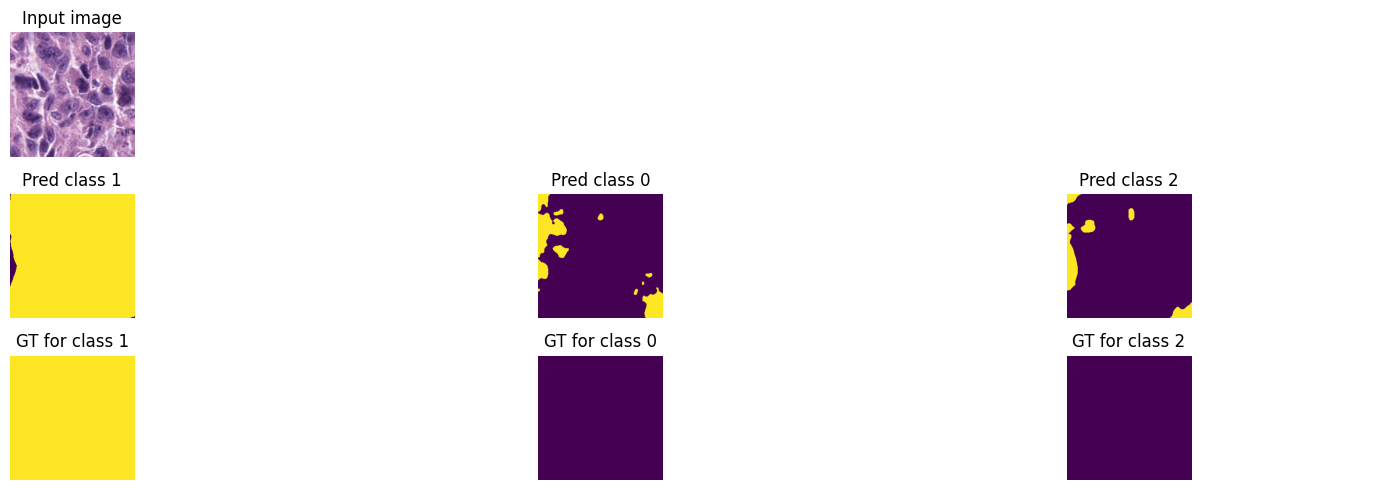

Train loss: 0.48256 | Time: 91m 7s | Val loss: 0.47075
Train_DICE_avg: 0.53436 | Train_Jaccard_avg: 0.47033 | Train_Sensitivity_avg: 0.54032 | Train_Specificity_avg: 0.87905 
Class 0 - Train_DICE: 0.37887 | Train_Jaccard: 0.31763 | Train_Sensitivity: 0.36223 | Train_Specificity: 0.90976 
Class 1 - Train_DICE: 0.71765 | Train_Jaccard: 0.66495 | Train_Sensitivity: 0.78497 | Train_Specificity: 0.83982 
Class 2 - Train_DICE: 0.50656 | Train_Jaccard: 0.42841 | Train_Sensitivity: 0.47376 | Train_Specificity: 0.88756 
Val_DICE_avg: 0.54358 | Val_Jaccard_avg: 0.48204 | Val_Sensitivity_avg: 0.56094 | Val_Specificity_avg: 0.84598 
Class 0 - Val_DICE: 0.37525 | Val_Jaccard: 0.31637 | Val_Sensitivity: 0.34721 | Val_Specificity: 0.91609 
Class 1 - Val_DICE: 0.75277 | Val_Jaccard: 0.70478 | Val_Sensitivity: 0.84459 | Val_Specificity: 0.76728 
Class 2 - Val_DICE: 0.50274 | Val_Jaccard: 0.42496 | Val_Sensitivity: 0.49102 | Val_Specificity: 0.85457 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.47806 | Time: 93m 21s | Val loss: 0.47288
Train_DICE_avg: 0.53934 | Train_Jaccard_avg: 0.47587 | Train_Sensitivity_avg: 0.54379 | Train_Specificity_avg: 0.87933 
Class 0 - Train_DICE: 0.38221 | Train_Jaccard: 0.32107 | Train_Sensitivity: 0.36431 | Train_Specificity: 0.90976 
Class 1 - Train_DICE: 0.72838 | Train_Jaccard: 0.67693 | Train_Sensitivity: 0.79482 | Train_Specificity: 0.84179 
Class 2 - Train_DICE: 0.50745 | Train_Jaccard: 0.42961 | Train_Sensitivity: 0.47224 | Train_Specificity: 0.88646 
Val_DICE_avg: 0.54433 | Val_Jaccard_avg: 0.48240 | Val_Sensitivity_avg: 0.56195 | Val_Specificity_avg: 0.84833 
Class 0 - Val_DICE: 0.38572 | Val_Jaccard: 0.32675 | Val_Sensitivity: 0.36230 | Val_Specificity: 0.91236 
Class 1 - Val_DICE: 0.74634 | Val_Jaccard: 0.69769 | Val_Sensitivity: 0.83315 | Val_Specificity: 0.77804 
Class 2 - Val_DICE: 0.50092 | Val_Jaccard: 0.42275 | Val_Sensitivity: 0.49040 | Val_Specificity: 0.85460 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.47687 | Time: 95m 36s | Val loss: 0.47014
Train_DICE_avg: 0.54041 | Train_Jaccard_avg: 0.47668 | Train_Sensitivity_avg: 0.54787 | Train_Specificity_avg: 0.87896 
Class 0 - Train_DICE: 0.38441 | Train_Jaccard: 0.32345 | Train_Sensitivity: 0.36696 | Train_Specificity: 0.91271 
Class 1 - Train_DICE: 0.72970 | Train_Jaccard: 0.67756 | Train_Sensitivity: 0.80338 | Train_Specificity: 0.83694 
Class 2 - Train_DICE: 0.50713 | Train_Jaccard: 0.42901 | Train_Sensitivity: 0.47327 | Train_Specificity: 0.88722 
Val_DICE_avg: 0.55392 | Val_Jaccard_avg: 0.49187 | Val_Sensitivity_avg: 0.57571 | Val_Specificity_avg: 0.84895 
Class 0 - Val_DICE: 0.40024 | Val_Jaccard: 0.34133 | Val_Sensitivity: 0.37569 | Val_Specificity: 0.91784 
Class 1 - Val_DICE: 0.75201 | Val_Jaccard: 0.70288 | Val_Sensitivity: 0.84779 | Val_Specificity: 0.77384 
Class 2 - Val_DICE: 0.50950 | Val_Jaccard: 0.43140 | Val_Sensitivity: 0.50365 | Val_Specificity: 0.85518 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.47186 | Time: 97m 50s | Val loss: 0.47464
Train_DICE_avg: 0.54650 | Train_Jaccard_avg: 0.48311 | Train_Sensitivity_avg: 0.55062 | Train_Specificity_avg: 0.88279 
Class 0 - Train_DICE: 0.39191 | Train_Jaccard: 0.33105 | Train_Sensitivity: 0.37540 | Train_Specificity: 0.91509 
Class 1 - Train_DICE: 0.73599 | Train_Jaccard: 0.68445 | Train_Sensitivity: 0.79820 | Train_Specificity: 0.84523 
Class 2 - Train_DICE: 0.51160 | Train_Jaccard: 0.43384 | Train_Sensitivity: 0.47827 | Train_Specificity: 0.88804 
Val_DICE_avg: 0.54996 | Val_Jaccard_avg: 0.48785 | Val_Sensitivity_avg: 0.56759 | Val_Specificity_avg: 0.85949 
Class 0 - Val_DICE: 0.39650 | Val_Jaccard: 0.33794 | Val_Sensitivity: 0.37184 | Val_Specificity: 0.92024 
Class 1 - Val_DICE: 0.74626 | Val_Jaccard: 0.69734 | Val_Sensitivity: 0.81759 | Val_Specificity: 0.82022 
Class 2 - Val_DICE: 0.50714 | Val_Jaccard: 0.42826 | Val_Sensitivity: 0.51335 | Val_Specificity: 0.83802 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.46952 | Time: 100m 4s | Val loss: 0.47153
Train_DICE_avg: 0.54815 | Train_Jaccard_avg: 0.48476 | Train_Sensitivity_avg: 0.55160 | Train_Specificity_avg: 0.88432 
Class 0 - Train_DICE: 0.39459 | Train_Jaccard: 0.33378 | Train_Sensitivity: 0.37800 | Train_Specificity: 0.91577 
Class 1 - Train_DICE: 0.73878 | Train_Jaccard: 0.68689 | Train_Sensitivity: 0.79801 | Train_Specificity: 0.85113 
Class 2 - Train_DICE: 0.51109 | Train_Jaccard: 0.43360 | Train_Sensitivity: 0.47879 | Train_Specificity: 0.88607 
Val_DICE_avg: 0.55612 | Val_Jaccard_avg: 0.49393 | Val_Sensitivity_avg: 0.57278 | Val_Specificity_avg: 0.85300 
Class 0 - Val_DICE: 0.41362 | Val_Jaccard: 0.35493 | Val_Sensitivity: 0.38914 | Val_Specificity: 0.92340 
Class 1 - Val_DICE: 0.74660 | Val_Jaccard: 0.69736 | Val_Sensitivity: 0.82363 | Val_Specificity: 0.78963 
Class 2 - Val_DICE: 0.50812 | Val_Jaccard: 0.42950 | Val_Sensitivity: 0.50556 | Val_Specificity: 0.84596 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


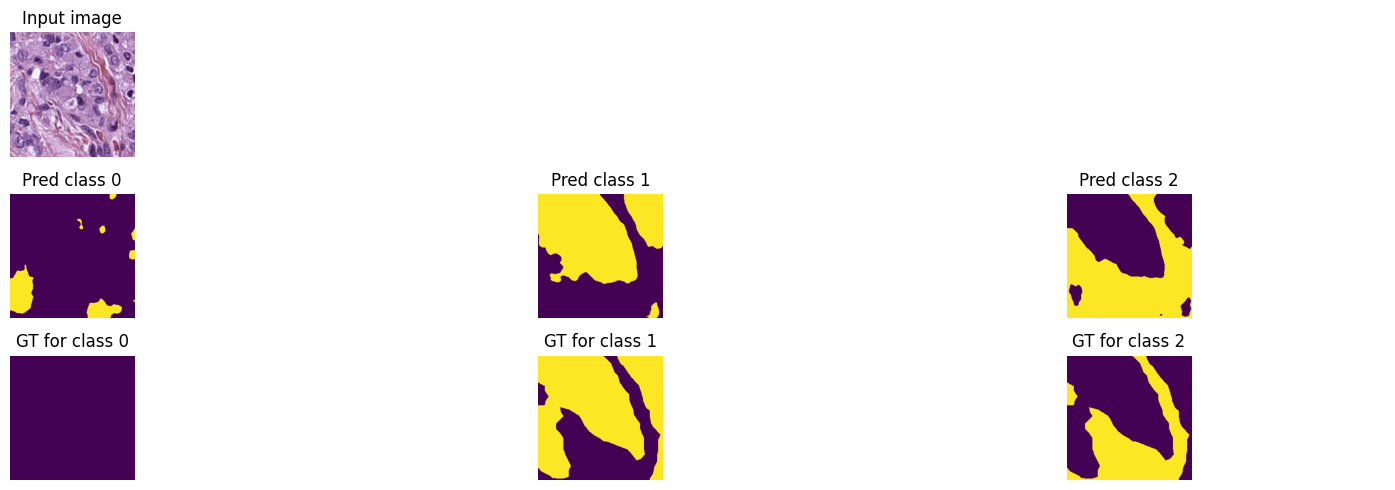

Train loss: 0.46789 | Time: 102m 19s | Val loss: 0.47314
Train_DICE_avg: 0.55343 | Train_Jaccard_avg: 0.49006 | Train_Sensitivity_avg: 0.56266 | Train_Specificity_avg: 0.88034 
Class 0 - Train_DICE: 0.40420 | Train_Jaccard: 0.34349 | Train_Sensitivity: 0.38771 | Train_Specificity: 0.91566 
Class 1 - Train_DICE: 0.74309 | Train_Jaccard: 0.69174 | Train_Sensitivity: 0.81902 | Train_Specificity: 0.83672 
Class 2 - Train_DICE: 0.51300 | Train_Jaccard: 0.43495 | Train_Sensitivity: 0.48125 | Train_Specificity: 0.88863 
Val_DICE_avg: 0.56122 | Val_Jaccard_avg: 0.49911 | Val_Sensitivity_avg: 0.58930 | Val_Specificity_avg: 0.84860 
Class 0 - Val_DICE: 0.42219 | Val_Jaccard: 0.36374 | Val_Sensitivity: 0.39941 | Val_Specificity: 0.92409 
Class 1 - Val_DICE: 0.75135 | Val_Jaccard: 0.70209 | Val_Sensitivity: 0.83751 | Val_Specificity: 0.79642 
Class 2 - Val_DICE: 0.51012 | Val_Jaccard: 0.43150 | Val_Sensitivity: 0.53098 | Val_Specificity: 0.82528 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.46642 | Time: 104m 34s | Val loss: 0.46812
Train_DICE_avg: 0.55563 | Train_Jaccard_avg: 0.49245 | Train_Sensitivity_avg: 0.56648 | Train_Specificity_avg: 0.87927 
Class 0 - Train_DICE: 0.41127 | Train_Jaccard: 0.35094 | Train_Sensitivity: 0.39480 | Train_Specificity: 0.91455 
Class 1 - Train_DICE: 0.73982 | Train_Jaccard: 0.68855 | Train_Sensitivity: 0.82053 | Train_Specificity: 0.83743 
Class 2 - Train_DICE: 0.51580 | Train_Jaccard: 0.43788 | Train_Sensitivity: 0.48410 | Train_Specificity: 0.88583 
Val_DICE_avg: 0.56257 | Val_Jaccard_avg: 0.50092 | Val_Sensitivity_avg: 0.58244 | Val_Specificity_avg: 0.86024 
Class 0 - Val_DICE: 0.41900 | Val_Jaccard: 0.36078 | Val_Sensitivity: 0.39315 | Val_Specificity: 0.92575 
Class 1 - Val_DICE: 0.75130 | Val_Jaccard: 0.70236 | Val_Sensitivity: 0.83213 | Val_Specificity: 0.81227 
Class 2 - Val_DICE: 0.51740 | Val_Jaccard: 0.43961 | Val_Sensitivity: 0.52205 | Val_Specificity: 0.84271 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.46169 | Time: 106m 48s | Val loss: 0.45976
Train_DICE_avg: 0.56484 | Train_Jaccard_avg: 0.50188 | Train_Sensitivity_avg: 0.57332 | Train_Specificity_avg: 0.88267 
Class 0 - Train_DICE: 0.43116 | Train_Jaccard: 0.37164 | Train_Sensitivity: 0.41984 | Train_Specificity: 0.91557 
Class 1 - Train_DICE: 0.74908 | Train_Jaccard: 0.69764 | Train_Sensitivity: 0.81747 | Train_Specificity: 0.84569 
Class 2 - Train_DICE: 0.51429 | Train_Jaccard: 0.43636 | Train_Sensitivity: 0.48264 | Train_Specificity: 0.88675 
Val_DICE_avg: 0.58217 | Val_Jaccard_avg: 0.52091 | Val_Sensitivity_avg: 0.60535 | Val_Specificity_avg: 0.86347 
Class 0 - Val_DICE: 0.48232 | Val_Jaccard: 0.42560 | Val_Sensitivity: 0.46437 | Val_Specificity: 0.92676 
Class 1 - Val_DICE: 0.75302 | Val_Jaccard: 0.70375 | Val_Sensitivity: 0.83627 | Val_Specificity: 0.81991 
Class 2 - Val_DICE: 0.51116 | Val_Jaccard: 0.43338 | Val_Sensitivity: 0.51540 | Val_Specificity: 0.84374 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.45347 | Time: 109m 2s | Val loss: 0.43681
Train_DICE_avg: 0.57678 | Train_Jaccard_avg: 0.51443 | Train_Sensitivity_avg: 0.58869 | Train_Specificity_avg: 0.88486 
Class 0 - Train_DICE: 0.46337 | Train_Jaccard: 0.40536 | Train_Sensitivity: 0.46024 | Train_Specificity: 0.91341 
Class 1 - Train_DICE: 0.75294 | Train_Jaccard: 0.70182 | Train_Sensitivity: 0.82287 | Train_Specificity: 0.85659 
Class 2 - Train_DICE: 0.51403 | Train_Jaccard: 0.43612 | Train_Sensitivity: 0.48297 | Train_Specificity: 0.88458 
Val_DICE_avg: 0.58734 | Val_Jaccard_avg: 0.52648 | Val_Sensitivity_avg: 0.61228 | Val_Specificity_avg: 0.86065 
Class 0 - Val_DICE: 0.50001 | Val_Jaccard: 0.44375 | Val_Sensitivity: 0.48518 | Val_Specificity: 0.92456 
Class 1 - Val_DICE: 0.76223 | Val_Jaccard: 0.71408 | Val_Sensitivity: 0.85269 | Val_Specificity: 0.81100 
Class 2 - Val_DICE: 0.49979 | Val_Jaccard: 0.42160 | Val_Sensitivity: 0.49897 | Val_Specificity: 0.84639 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.44521 | Time: 111m 17s | Val loss: 0.43008
Train_DICE_avg: 0.58181 | Train_Jaccard_avg: 0.51995 | Train_Sensitivity_avg: 0.59731 | Train_Specificity_avg: 0.88204 
Class 0 - Train_DICE: 0.48632 | Train_Jaccard: 0.42973 | Train_Sensitivity: 0.49574 | Train_Specificity: 0.91146 
Class 1 - Train_DICE: 0.74904 | Train_Jaccard: 0.69809 | Train_Sensitivity: 0.81822 | Train_Specificity: 0.84749 
Class 2 - Train_DICE: 0.51008 | Train_Jaccard: 0.43202 | Train_Sensitivity: 0.47797 | Train_Specificity: 0.88716 
Val_DICE_avg: 0.58929 | Val_Jaccard_avg: 0.52895 | Val_Sensitivity_avg: 0.61661 | Val_Specificity_avg: 0.84979 
Class 0 - Val_DICE: 0.50967 | Val_Jaccard: 0.45484 | Val_Sensitivity: 0.49721 | Val_Specificity: 0.91112 
Class 1 - Val_DICE: 0.76103 | Val_Jaccard: 0.71323 | Val_Sensitivity: 0.86001 | Val_Specificity: 0.78961 
Class 2 - Val_DICE: 0.49717 | Val_Jaccard: 0.41879 | Val_Sensitivity: 0.49261 | Val_Specificity: 0.84865 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


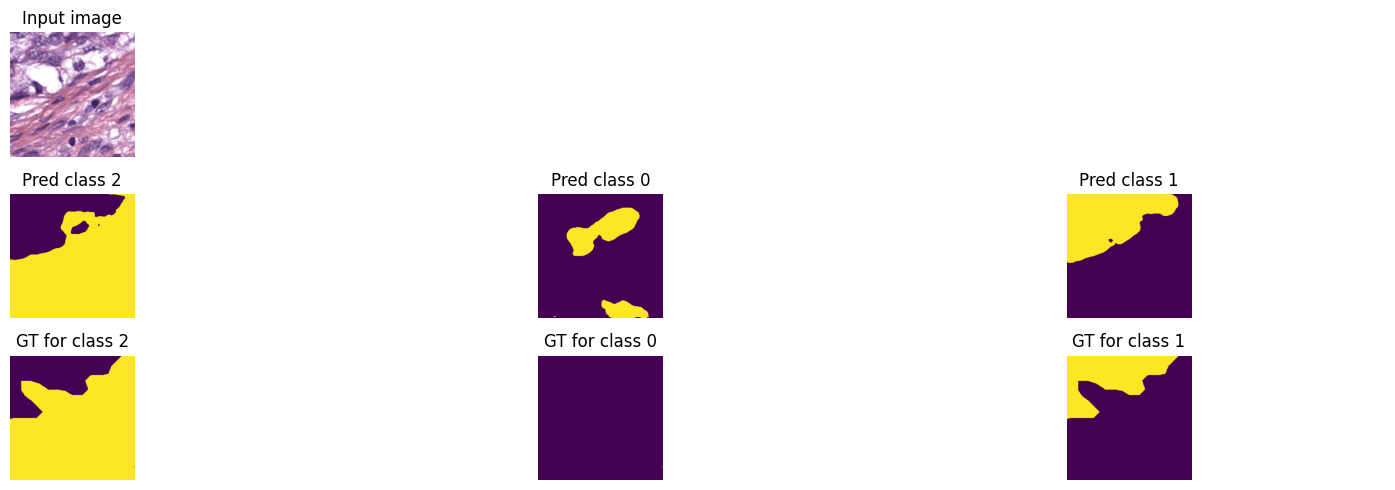

Train loss: 0.43566 | Time: 113m 32s | Val loss: 0.42893
Train_DICE_avg: 0.58598 | Train_Jaccard_avg: 0.52418 | Train_Sensitivity_avg: 0.60267 | Train_Specificity_avg: 0.88126 
Class 0 - Train_DICE: 0.49930 | Train_Jaccard: 0.44281 | Train_Sensitivity: 0.50880 | Train_Specificity: 0.91330 
Class 1 - Train_DICE: 0.74774 | Train_Jaccard: 0.69716 | Train_Sensitivity: 0.82161 | Train_Specificity: 0.84337 
Class 2 - Train_DICE: 0.51091 | Train_Jaccard: 0.43256 | Train_Sensitivity: 0.47759 | Train_Specificity: 0.88710 
Val_DICE_avg: 0.58822 | Val_Jaccard_avg: 0.52828 | Val_Sensitivity_avg: 0.62244 | Val_Specificity_avg: 0.83693 
Class 0 - Val_DICE: 0.50869 | Val_Jaccard: 0.45333 | Val_Sensitivity: 0.49442 | Val_Specificity: 0.90194 
Class 1 - Val_DICE: 0.75800 | Val_Jaccard: 0.71181 | Val_Sensitivity: 0.87849 | Val_Specificity: 0.76000 
Class 2 - Val_DICE: 0.49796 | Val_Jaccard: 0.41969 | Val_Sensitivity: 0.49442 | Val_Specificity: 0.84886 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.43128 | Time: 115m 47s | Val loss: 0.42028
Train_DICE_avg: 0.59087 | Train_Jaccard_avg: 0.52961 | Train_Sensitivity_avg: 0.61185 | Train_Specificity_avg: 0.87859 
Class 0 - Train_DICE: 0.50714 | Train_Jaccard: 0.45147 | Train_Sensitivity: 0.52151 | Train_Specificity: 0.91048 
Class 1 - Train_DICE: 0.75486 | Train_Jaccard: 0.70500 | Train_Sensitivity: 0.83691 | Train_Specificity: 0.83785 
Class 2 - Train_DICE: 0.51060 | Train_Jaccard: 0.43235 | Train_Sensitivity: 0.47712 | Train_Specificity: 0.88743 
Val_DICE_avg: 0.59963 | Val_Jaccard_avg: 0.53955 | Val_Sensitivity_avg: 0.62858 | Val_Specificity_avg: 0.82611 
Class 0 - Val_DICE: 0.54684 | Val_Jaccard: 0.49292 | Val_Sensitivity: 0.54516 | Val_Specificity: 0.89210 
Class 1 - Val_DICE: 0.75792 | Val_Jaccard: 0.71054 | Val_Sensitivity: 0.85472 | Val_Specificity: 0.74109 
Class 2 - Val_DICE: 0.49414 | Val_Jaccard: 0.41518 | Val_Sensitivity: 0.48586 | Val_Specificity: 0.84513 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.42544 | Time: 118m 1s | Val loss: 0.40736
Train_DICE_avg: 0.59864 | Train_Jaccard_avg: 0.53783 | Train_Sensitivity_avg: 0.62232 | Train_Specificity_avg: 0.87562 
Class 0 - Train_DICE: 0.53419 | Train_Jaccard: 0.48081 | Train_Sensitivity: 0.57026 | Train_Specificity: 0.90760 
Class 1 - Train_DICE: 0.75172 | Train_Jaccard: 0.70088 | Train_Sensitivity: 0.81966 | Train_Specificity: 0.83257 
Class 2 - Train_DICE: 0.51000 | Train_Jaccard: 0.43181 | Train_Sensitivity: 0.47705 | Train_Specificity: 0.88671 
Val_DICE_avg: 0.61027 | Val_Jaccard_avg: 0.55132 | Val_Sensitivity_avg: 0.64698 | Val_Specificity_avg: 0.82488 
Class 0 - Val_DICE: 0.57375 | Val_Jaccard: 0.52165 | Val_Sensitivity: 0.59284 | Val_Specificity: 0.88694 
Class 1 - Val_DICE: 0.75886 | Val_Jaccard: 0.71230 | Val_Sensitivity: 0.86164 | Val_Specificity: 0.73304 
Class 2 - Val_DICE: 0.49820 | Val_Jaccard: 0.42001 | Val_Sensitivity: 0.48646 | Val_Specificity: 0.85465 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.41719 | Time: 120m 15s | Val loss: 0.40990
Train_DICE_avg: 0.60389 | Train_Jaccard_avg: 0.54303 | Train_Sensitivity_avg: 0.62996 | Train_Specificity_avg: 0.87736 
Class 0 - Train_DICE: 0.53935 | Train_Jaccard: 0.48491 | Train_Sensitivity: 0.57102 | Train_Specificity: 0.90744 
Class 1 - Train_DICE: 0.75923 | Train_Jaccard: 0.70919 | Train_Sensitivity: 0.83868 | Train_Specificity: 0.83688 
Class 2 - Train_DICE: 0.51311 | Train_Jaccard: 0.43500 | Train_Sensitivity: 0.48018 | Train_Specificity: 0.88777 
Val_DICE_avg: 0.60700 | Val_Jaccard_avg: 0.54791 | Val_Sensitivity_avg: 0.64505 | Val_Specificity_avg: 0.82313 
Class 0 - Val_DICE: 0.56744 | Val_Jaccard: 0.51457 | Val_Sensitivity: 0.57901 | Val_Specificity: 0.88681 
Class 1 - Val_DICE: 0.75538 | Val_Jaccard: 0.70919 | Val_Sensitivity: 0.86873 | Val_Specificity: 0.73276 
Class 2 - Val_DICE: 0.49819 | Val_Jaccard: 0.41996 | Val_Sensitivity: 0.48742 | Val_Specificity: 0.84982 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.41381 | Time: 122m 29s | Val loss: 0.40397
Train_DICE_avg: 0.60731 | Train_Jaccard_avg: 0.54678 | Train_Sensitivity_avg: 0.63383 | Train_Specificity_avg: 0.87503 
Class 0 - Train_DICE: 0.54858 | Train_Jaccard: 0.49566 | Train_Sensitivity: 0.59125 | Train_Specificity: 0.90399 
Class 1 - Train_DICE: 0.76143 | Train_Jaccard: 0.71089 | Train_Sensitivity: 0.82990 | Train_Specificity: 0.83225 
Class 2 - Train_DICE: 0.51192 | Train_Jaccard: 0.43379 | Train_Sensitivity: 0.48033 | Train_Specificity: 0.88885 
Val_DICE_avg: 0.61337 | Val_Jaccard_avg: 0.55408 | Val_Sensitivity_avg: 0.65077 | Val_Specificity_avg: 0.82000 
Class 0 - Val_DICE: 0.58814 | Val_Jaccard: 0.53607 | Val_Sensitivity: 0.61405 | Val_Specificity: 0.87646 
Class 1 - Val_DICE: 0.75366 | Val_Jaccard: 0.70605 | Val_Sensitivity: 0.84362 | Val_Specificity: 0.73537 
Class 2 - Val_DICE: 0.49833 | Val_Jaccard: 0.42013 | Val_Sensitivity: 0.49465 | Val_Specificity: 0.84817 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


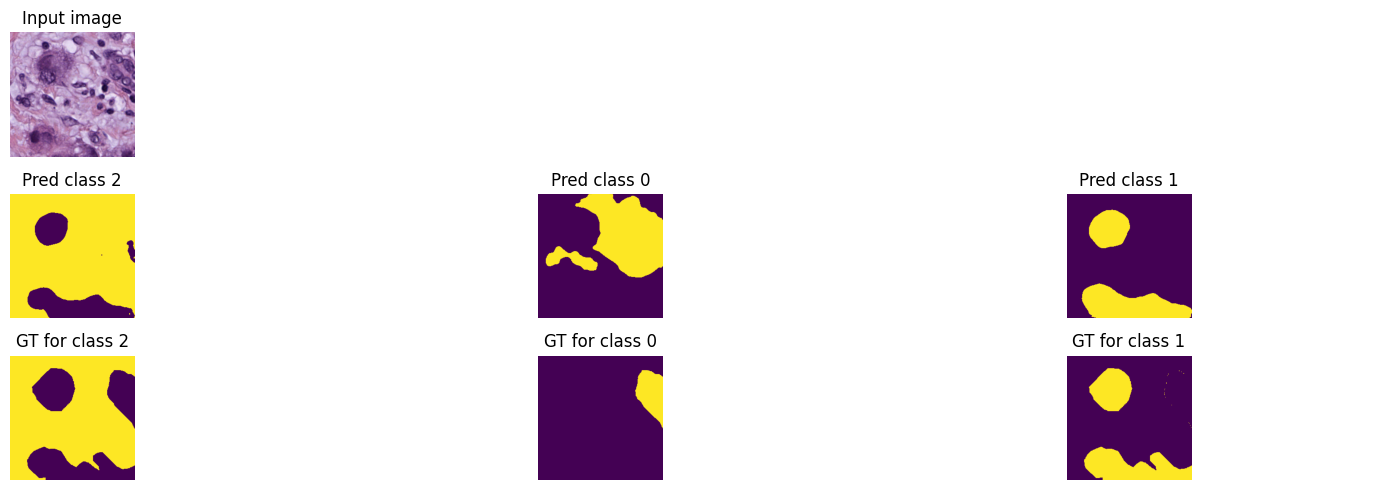

Train loss: 0.41074 | Time: 124m 44s | Val loss: 0.40383
Train_DICE_avg: 0.60971 | Train_Jaccard_avg: 0.54916 | Train_Sensitivity_avg: 0.63799 | Train_Specificity_avg: 0.87368 
Class 0 - Train_DICE: 0.55690 | Train_Jaccard: 0.50362 | Train_Sensitivity: 0.59960 | Train_Specificity: 0.90183 
Class 1 - Train_DICE: 0.75930 | Train_Jaccard: 0.70893 | Train_Sensitivity: 0.83193 | Train_Specificity: 0.83351 
Class 2 - Train_DICE: 0.51294 | Train_Jaccard: 0.43493 | Train_Sensitivity: 0.48245 | Train_Specificity: 0.88569 
Val_DICE_avg: 0.61247 | Val_Jaccard_avg: 0.55346 | Val_Sensitivity_avg: 0.65425 | Val_Specificity_avg: 0.82097 
Class 0 - Val_DICE: 0.57841 | Val_Jaccard: 0.52605 | Val_Sensitivity: 0.59779 | Val_Specificity: 0.88445 
Class 1 - Val_DICE: 0.75893 | Val_Jaccard: 0.71269 | Val_Sensitivity: 0.87082 | Val_Specificity: 0.73048 
Class 2 - Val_DICE: 0.50006 | Val_Jaccard: 0.42164 | Val_Sensitivity: 0.49413 | Val_Specificity: 0.84797 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40609 | Time: 126m 57s | Val loss: 0.40476
Train_DICE_avg: 0.61311 | Train_Jaccard_avg: 0.55259 | Train_Sensitivity_avg: 0.64225 | Train_Specificity_avg: 0.87347 
Class 0 - Train_DICE: 0.56119 | Train_Jaccard: 0.50810 | Train_Sensitivity: 0.60396 | Train_Specificity: 0.90154 
Class 1 - Train_DICE: 0.76415 | Train_Jaccard: 0.71387 | Train_Sensitivity: 0.83959 | Train_Specificity: 0.83074 
Class 2 - Train_DICE: 0.51401 | Train_Jaccard: 0.43581 | Train_Sensitivity: 0.48318 | Train_Specificity: 0.88814 
Val_DICE_avg: 0.61107 | Val_Jaccard_avg: 0.55131 | Val_Sensitivity_avg: 0.65065 | Val_Specificity_avg: 0.82093 
Class 0 - Val_DICE: 0.57061 | Val_Jaccard: 0.51723 | Val_Sensitivity: 0.58193 | Val_Specificity: 0.88726 
Class 1 - Val_DICE: 0.75889 | Val_Jaccard: 0.71171 | Val_Sensitivity: 0.86853 | Val_Specificity: 0.73828 
Class 2 - Val_DICE: 0.50370 | Val_Jaccard: 0.42498 | Val_Sensitivity: 0.50149 | Val_Specificity: 0.83725 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40467 | Time: 129m 12s | Val loss: 0.40226
Train_DICE_avg: 0.61267 | Train_Jaccard_avg: 0.55208 | Train_Sensitivity_avg: 0.64010 | Train_Specificity_avg: 0.87534 
Class 0 - Train_DICE: 0.56231 | Train_Jaccard: 0.50877 | Train_Sensitivity: 0.60463 | Train_Specificity: 0.90364 
Class 1 - Train_DICE: 0.76210 | Train_Jaccard: 0.71173 | Train_Sensitivity: 0.83353 | Train_Specificity: 0.83409 
Class 2 - Train_DICE: 0.51360 | Train_Jaccard: 0.43573 | Train_Sensitivity: 0.48215 | Train_Specificity: 0.88829 
Val_DICE_avg: 0.61598 | Val_Jaccard_avg: 0.55653 | Val_Sensitivity_avg: 0.65746 | Val_Specificity_avg: 0.81542 
Class 0 - Val_DICE: 0.59331 | Val_Jaccard: 0.54179 | Val_Sensitivity: 0.62419 | Val_Specificity: 0.87654 
Class 1 - Val_DICE: 0.75223 | Val_Jaccard: 0.70434 | Val_Sensitivity: 0.84353 | Val_Specificity: 0.73631 
Class 2 - Val_DICE: 0.50240 | Val_Jaccard: 0.42345 | Val_Sensitivity: 0.50465 | Val_Specificity: 0.83340 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40285 | Time: 131m 25s | Val loss: 0.39934
Train_DICE_avg: 0.61463 | Train_Jaccard_avg: 0.55427 | Train_Sensitivity_avg: 0.64548 | Train_Specificity_avg: 0.87414 
Class 0 - Train_DICE: 0.56977 | Train_Jaccard: 0.51674 | Train_Sensitivity: 0.61570 | Train_Specificity: 0.90298 
Class 1 - Train_DICE: 0.76142 | Train_Jaccard: 0.71142 | Train_Sensitivity: 0.84092 | Train_Specificity: 0.83165 
Class 2 - Train_DICE: 0.51270 | Train_Jaccard: 0.43465 | Train_Sensitivity: 0.47983 | Train_Specificity: 0.88777 
Val_DICE_avg: 0.61443 | Val_Jaccard_avg: 0.55525 | Val_Sensitivity_avg: 0.65741 | Val_Specificity_avg: 0.82424 
Class 0 - Val_DICE: 0.58028 | Val_Jaccard: 0.52699 | Val_Sensitivity: 0.59311 | Val_Specificity: 0.89078 
Class 1 - Val_DICE: 0.75874 | Val_Jaccard: 0.71273 | Val_Sensitivity: 0.88099 | Val_Specificity: 0.73320 
Class 2 - Val_DICE: 0.50427 | Val_Jaccard: 0.42603 | Val_Sensitivity: 0.49811 | Val_Specificity: 0.84874 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40060 | Time: 133m 39s | Val loss: 0.39584
Train_DICE_avg: 0.61701 | Train_Jaccard_avg: 0.55693 | Train_Sensitivity_avg: 0.65051 | Train_Specificity_avg: 0.87379 
Class 0 - Train_DICE: 0.57002 | Train_Jaccard: 0.51720 | Train_Sensitivity: 0.61958 | Train_Specificity: 0.89985 
Class 1 - Train_DICE: 0.76556 | Train_Jaccard: 0.71604 | Train_Sensitivity: 0.84912 | Train_Specificity: 0.83164 
Class 2 - Train_DICE: 0.51544 | Train_Jaccard: 0.43756 | Train_Sensitivity: 0.48284 | Train_Specificity: 0.88988 
Val_DICE_avg: 0.61952 | Val_Jaccard_avg: 0.56091 | Val_Sensitivity_avg: 0.66697 | Val_Specificity_avg: 0.82170 
Class 0 - Val_DICE: 0.59883 | Val_Jaccard: 0.54833 | Val_Sensitivity: 0.63965 | Val_Specificity: 0.89047 
Class 1 - Val_DICE: 0.75822 | Val_Jaccard: 0.71122 | Val_Sensitivity: 0.86305 | Val_Specificity: 0.73203 
Class 2 - Val_DICE: 0.50152 | Val_Jaccard: 0.42317 | Val_Sensitivity: 0.49822 | Val_Specificity: 0.84259 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


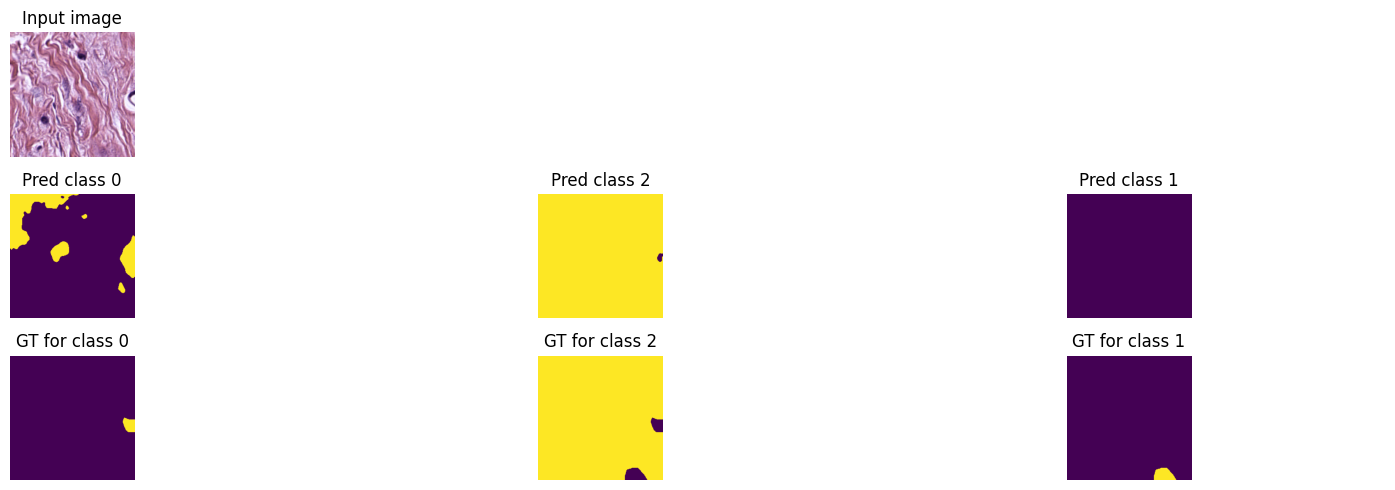

Train loss: 0.39949 | Time: 135m 54s | Val loss: 0.40149
Train_DICE_avg: 0.61819 | Train_Jaccard_avg: 0.55814 | Train_Sensitivity_avg: 0.65338 | Train_Specificity_avg: 0.87338 
Class 0 - Train_DICE: 0.57483 | Train_Jaccard: 0.52243 | Train_Sensitivity: 0.62853 | Train_Specificity: 0.90290 
Class 1 - Train_DICE: 0.76341 | Train_Jaccard: 0.71360 | Train_Sensitivity: 0.84543 | Train_Specificity: 0.83126 
Class 2 - Train_DICE: 0.51632 | Train_Jaccard: 0.43837 | Train_Sensitivity: 0.48619 | Train_Specificity: 0.88599 
Val_DICE_avg: 0.61581 | Val_Jaccard_avg: 0.55679 | Val_Sensitivity_avg: 0.66728 | Val_Specificity_avg: 0.81954 
Class 0 - Val_DICE: 0.58512 | Val_Jaccard: 0.53289 | Val_Sensitivity: 0.61146 | Val_Specificity: 0.88933 
Class 1 - Val_DICE: 0.75781 | Val_Jaccard: 0.71113 | Val_Sensitivity: 0.88772 | Val_Specificity: 0.72596 
Class 2 - Val_DICE: 0.50449 | Val_Jaccard: 0.42635 | Val_Sensitivity: 0.50267 | Val_Specificity: 0.84333 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 172MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Global Performance Metrics:
Loss mean: 0.39897, std: 0.03869
Dice Coefficient mean: 0.62423, std: 0.18948
Jaccard Index mean: 0.56462, std: 0.19564
Sensitivity mean: 0.82490, std: 0.17399
Specificity mean: 0.76686, std: 0.14799

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.59480, std: 0.41359
Jaccard mean: 0.54412, std: 0.41351
Sensitivity mean: 0.85244, std: 0.30084
Specificity mean: 0.74878, std: 0.32299

Class 1:
Dice mean: 0.76722, std: 0.33922
Jaccard mean: 0.71811, std: 0.34909
Sensitivity mean: 0.82499, std: 0.31359
Specificity mean: 0.82176, std: 0.30084

Class 2:
Dice mean: 0.51065, std: 0.37341
Jaccard mean: 0.43163, std: 0.35492
Sensitivity mean: 0.79729, std: 0.27921
Specificity mean: 0.73005, std: 0.28005


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-ResUNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 0.92 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


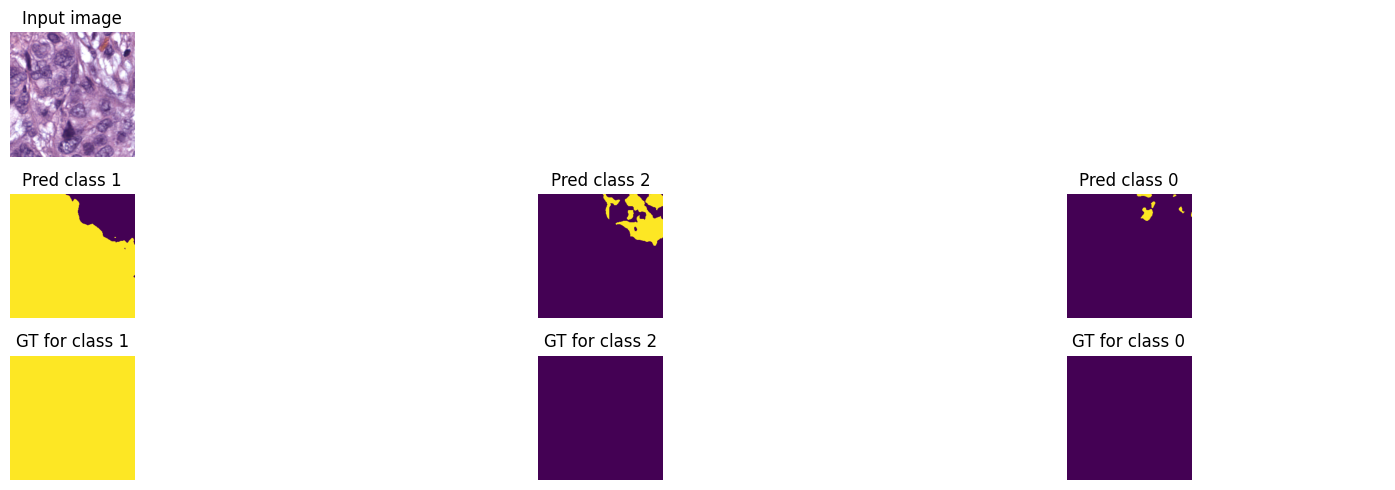

Train loss: 0.57291 | Time: 2m 10s | Val loss: 0.48425
Train_DICE_avg: 0.35482 | Train_Jaccard_avg: 0.30228 | Train_Sensitivity_avg: 0.67283 | Train_Specificity_avg: 0.71568 
Class 0 - Train_DICE: 0.34264 | Train_Jaccard: 0.29888 | Train_Sensitivity: 0.57630 | Train_Specificity: 0.79531 
Class 1 - Train_DICE: 0.47290 | Train_Jaccard: 0.39814 | Train_Sensitivity: 0.66937 | Train_Specificity: 0.66831 
Class 2 - Train_DICE: 0.24891 | Train_Jaccard: 0.20981 | Train_Sensitivity: 0.77283 | Train_Specificity: 0.68340 
Val_DICE_avg: 0.46076 | Val_Jaccard_avg: 0.40556 | Val_Sensitivity_avg: 0.77321 | Val_Specificity_avg: 0.71218 
Class 0 - Val_DICE: 0.44039 | Val_Jaccard: 0.39500 | Val_Sensitivity: 0.67685 | Val_Specificity: 0.79771 
Class 1 - Val_DICE: 0.61856 | Val_Jaccard: 0.54968 | Val_Sensitivity: 0.78173 | Val_Specificity: 0.65385 
Class 2 - Val_DICE: 0.32334 | Val_Jaccard: 0.27202 | Val_Sensitivity: 0.86106 | Val_Specificity: 0.68498 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.50814 | Time: 4m 20s | Val loss: 0.44587
Train_DICE_avg: 0.41756 | Train_Jaccard_avg: 0.35863 | Train_Sensitivity_avg: 0.71478 | Train_Specificity_avg: 0.72847 
Class 0 - Train_DICE: 0.42169 | Train_Jaccard: 0.37654 | Train_Sensitivity: 0.68769 | Train_Specificity: 0.80044 
Class 1 - Train_DICE: 0.52769 | Train_Jaccard: 0.45391 | Train_Sensitivity: 0.70989 | Train_Specificity: 0.68902 
Class 2 - Train_DICE: 0.30330 | Train_Jaccard: 0.24545 | Train_Sensitivity: 0.74676 | Train_Specificity: 0.69595 
Val_DICE_avg: 0.51090 | Val_Jaccard_avg: 0.45319 | Val_Sensitivity_avg: 0.79690 | Val_Specificity_avg: 0.72237 
Class 0 - Val_DICE: 0.51474 | Val_Jaccard: 0.47240 | Val_Sensitivity: 0.78452 | Val_Specificity: 0.79993 
Class 1 - Val_DICE: 0.64304 | Val_Jaccard: 0.57599 | Val_Sensitivity: 0.78438 | Val_Specificity: 0.66987 
Class 2 - Val_DICE: 0.37491 | Val_Jaccard: 0.31118 | Val_Sensitivity: 0.82181 | Val_Specificity: 0.69731 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.47930 | Time: 6m 30s | Val loss: 0.41236
Train_DICE_avg: 0.43763 | Train_Jaccard_avg: 0.37881 | Train_Sensitivity_avg: 0.73133 | Train_Specificity_avg: 0.73428 
Class 0 - Train_DICE: 0.43583 | Train_Jaccard: 0.39118 | Train_Sensitivity: 0.71066 | Train_Specificity: 0.80138 
Class 1 - Train_DICE: 0.55125 | Train_Jaccard: 0.47974 | Train_Sensitivity: 0.73075 | Train_Specificity: 0.69905 
Class 2 - Train_DICE: 0.32579 | Train_Jaccard: 0.26551 | Train_Sensitivity: 0.75258 | Train_Specificity: 0.70241 
Val_DICE_avg: 0.52289 | Val_Jaccard_avg: 0.46404 | Val_Sensitivity_avg: 0.78042 | Val_Specificity_avg: 0.73095 
Class 0 - Val_DICE: 0.50367 | Val_Jaccard: 0.45524 | Val_Sensitivity: 0.68930 | Val_Specificity: 0.81435 
Class 1 - Val_DICE: 0.66457 | Val_Jaccard: 0.60061 | Val_Sensitivity: 0.82727 | Val_Specificity: 0.67259 
Class 2 - Val_DICE: 0.40044 | Val_Jaccard: 0.33628 | Val_Sensitivity: 0.82470 | Val_Specificity: 0.70590 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.45956 | Time: 8m 39s | Val loss: 0.39343
Train_DICE_avg: 0.45197 | Train_Jaccard_avg: 0.39307 | Train_Sensitivity_avg: 0.73696 | Train_Specificity_avg: 0.73831 
Class 0 - Train_DICE: 0.45160 | Train_Jaccard: 0.40738 | Train_Sensitivity: 0.73274 | Train_Specificity: 0.80208 
Class 1 - Train_DICE: 0.56190 | Train_Jaccard: 0.49158 | Train_Sensitivity: 0.73416 | Train_Specificity: 0.70473 
Class 2 - Train_DICE: 0.34243 | Train_Jaccard: 0.28024 | Train_Sensitivity: 0.74397 | Train_Specificity: 0.70813 
Val_DICE_avg: 0.53125 | Val_Jaccard_avg: 0.47545 | Val_Sensitivity_avg: 0.80182 | Val_Specificity_avg: 0.73292 
Class 0 - Val_DICE: 0.54035 | Val_Jaccard: 0.49626 | Val_Sensitivity: 0.77907 | Val_Specificity: 0.80976 
Class 1 - Val_DICE: 0.65360 | Val_Jaccard: 0.59124 | Val_Sensitivity: 0.76392 | Val_Specificity: 0.68550 
Class 2 - Val_DICE: 0.39979 | Val_Jaccard: 0.33885 | Val_Sensitivity: 0.86248 | Val_Specificity: 0.70349 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.44593 | Time: 10m 48s | Val loss: 0.37675
Train_DICE_avg: 0.46383 | Train_Jaccard_avg: 0.40524 | Train_Sensitivity_avg: 0.74388 | Train_Specificity_avg: 0.74190 
Class 0 - Train_DICE: 0.46361 | Train_Jaccard: 0.42045 | Train_Sensitivity: 0.75505 | Train_Specificity: 0.80103 
Class 1 - Train_DICE: 0.57013 | Train_Jaccard: 0.50053 | Train_Sensitivity: 0.73637 | Train_Specificity: 0.71013 
Class 2 - Train_DICE: 0.35776 | Train_Jaccard: 0.29476 | Train_Sensitivity: 0.74021 | Train_Specificity: 0.71452 
Val_DICE_avg: 0.54098 | Val_Jaccard_avg: 0.48836 | Val_Sensitivity_avg: 0.81523 | Val_Specificity_avg: 0.73641 
Class 0 - Val_DICE: 0.55313 | Val_Jaccard: 0.51292 | Val_Sensitivity: 0.81972 | Val_Specificity: 0.80775 
Class 1 - Val_DICE: 0.66308 | Val_Jaccard: 0.60380 | Val_Sensitivity: 0.75140 | Val_Specificity: 0.69646 
Class 2 - Val_DICE: 0.40671 | Val_Jaccard: 0.34837 | Val_Sensitivity: 0.87456 | Val_Specificity: 0.70501 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


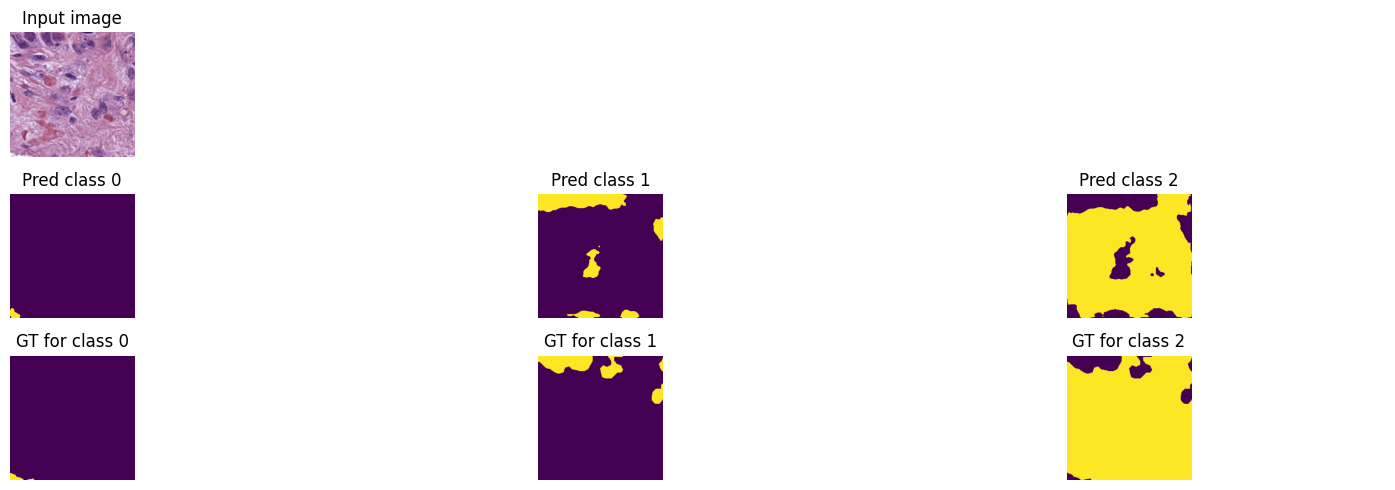

Train loss: 0.43416 | Time: 12m 58s | Val loss: 0.36425
Train_DICE_avg: 0.46967 | Train_Jaccard_avg: 0.41099 | Train_Sensitivity_avg: 0.74455 | Train_Specificity_avg: 0.74424 
Class 0 - Train_DICE: 0.46597 | Train_Jaccard: 0.42323 | Train_Sensitivity: 0.75852 | Train_Specificity: 0.80345 
Class 1 - Train_DICE: 0.57709 | Train_Jaccard: 0.50719 | Train_Sensitivity: 0.74146 | Train_Specificity: 0.71096 
Class 2 - Train_DICE: 0.36595 | Train_Jaccard: 0.30256 | Train_Sensitivity: 0.73366 | Train_Specificity: 0.71831 
Val_DICE_avg: 0.54984 | Val_Jaccard_avg: 0.49902 | Val_Sensitivity_avg: 0.81100 | Val_Specificity_avg: 0.74376 
Class 0 - Val_DICE: 0.58651 | Val_Jaccard: 0.54473 | Val_Sensitivity: 0.83147 | Val_Specificity: 0.81324 
Class 1 - Val_DICE: 0.65452 | Val_Jaccard: 0.59858 | Val_Sensitivity: 0.70554 | Val_Specificity: 0.71224 
Class 2 - Val_DICE: 0.40849 | Val_Jaccard: 0.35374 | Val_Sensitivity: 0.89600 | Val_Specificity: 0.70581 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.42523 | Time: 15m 7s | Val loss: 0.35536
Train_DICE_avg: 0.47393 | Train_Jaccard_avg: 0.41537 | Train_Sensitivity_avg: 0.74347 | Train_Specificity_avg: 0.74668 
Class 0 - Train_DICE: 0.46840 | Train_Jaccard: 0.42568 | Train_Sensitivity: 0.75905 | Train_Specificity: 0.80306 
Class 1 - Train_DICE: 0.58149 | Train_Jaccard: 0.51242 | Train_Sensitivity: 0.74214 | Train_Specificity: 0.71530 
Class 2 - Train_DICE: 0.37189 | Train_Jaccard: 0.30803 | Train_Sensitivity: 0.72923 | Train_Specificity: 0.72168 
Val_DICE_avg: 0.55675 | Val_Jaccard_avg: 0.50468 | Val_Sensitivity_avg: 0.80797 | Val_Specificity_avg: 0.74528 
Class 0 - Val_DICE: 0.58390 | Val_Jaccard: 0.54081 | Val_Sensitivity: 0.81016 | Val_Specificity: 0.81548 
Class 1 - Val_DICE: 0.66843 | Val_Jaccard: 0.61228 | Val_Sensitivity: 0.73394 | Val_Specificity: 0.70922 
Class 2 - Val_DICE: 0.41793 | Val_Jaccard: 0.36096 | Val_Sensitivity: 0.87980 | Val_Specificity: 0.71115 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.41797 | Time: 17m 16s | Val loss: 0.35159
Train_DICE_avg: 0.48236 | Train_Jaccard_avg: 0.42395 | Train_Sensitivity_avg: 0.74877 | Train_Specificity_avg: 0.74871 
Class 0 - Train_DICE: 0.47336 | Train_Jaccard: 0.43076 | Train_Sensitivity: 0.76619 | Train_Specificity: 0.80449 
Class 1 - Train_DICE: 0.58909 | Train_Jaccard: 0.52039 | Train_Sensitivity: 0.74808 | Train_Specificity: 0.71590 
Class 2 - Train_DICE: 0.38462 | Train_Jaccard: 0.32069 | Train_Sensitivity: 0.73205 | Train_Specificity: 0.72576 
Val_DICE_avg: 0.55775 | Val_Jaccard_avg: 0.50501 | Val_Sensitivity_avg: 0.81171 | Val_Specificity_avg: 0.74412 
Class 0 - Val_DICE: 0.58802 | Val_Jaccard: 0.54583 | Val_Sensitivity: 0.83502 | Val_Specificity: 0.81419 
Class 1 - Val_DICE: 0.66956 | Val_Jaccard: 0.61363 | Val_Sensitivity: 0.73610 | Val_Specificity: 0.70867 
Class 2 - Val_DICE: 0.41568 | Val_Jaccard: 0.35556 | Val_Sensitivity: 0.86401 | Val_Specificity: 0.70950 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.41160 | Time: 19m 25s | Val loss: 0.34650
Train_DICE_avg: 0.48715 | Train_Jaccard_avg: 0.42785 | Train_Sensitivity_avg: 0.74350 | Train_Specificity_avg: 0.75177 
Class 0 - Train_DICE: 0.47814 | Train_Jaccard: 0.43372 | Train_Sensitivity: 0.75761 | Train_Specificity: 0.80566 
Class 1 - Train_DICE: 0.59412 | Train_Jaccard: 0.52599 | Train_Sensitivity: 0.75146 | Train_Specificity: 0.72086 
Class 2 - Train_DICE: 0.38919 | Train_Jaccard: 0.32384 | Train_Sensitivity: 0.72144 | Train_Specificity: 0.72881 
Val_DICE_avg: 0.55354 | Val_Jaccard_avg: 0.50109 | Val_Sensitivity_avg: 0.79926 | Val_Specificity_avg: 0.74706 
Class 0 - Val_DICE: 0.56841 | Val_Jaccard: 0.52679 | Val_Sensitivity: 0.82615 | Val_Specificity: 0.80945 
Class 1 - Val_DICE: 0.67100 | Val_Jaccard: 0.61579 | Val_Sensitivity: 0.73451 | Val_Specificity: 0.71678 
Class 2 - Val_DICE: 0.42120 | Val_Jaccard: 0.36068 | Val_Sensitivity: 0.83712 | Val_Specificity: 0.71494 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.40519 | Time: 21m 36s | Val loss: 0.33586
Train_DICE_avg: 0.49340 | Train_Jaccard_avg: 0.43424 | Train_Sensitivity_avg: 0.74483 | Train_Specificity_avg: 0.75241 
Class 0 - Train_DICE: 0.48720 | Train_Jaccard: 0.44313 | Train_Sensitivity: 0.76412 | Train_Specificity: 0.80688 
Class 1 - Train_DICE: 0.59750 | Train_Jaccard: 0.52983 | Train_Sensitivity: 0.75260 | Train_Specificity: 0.71977 
Class 2 - Train_DICE: 0.39552 | Train_Jaccard: 0.32976 | Train_Sensitivity: 0.71779 | Train_Specificity: 0.73057 
Val_DICE_avg: 0.56535 | Val_Jaccard_avg: 0.51212 | Val_Sensitivity_avg: 0.80380 | Val_Specificity_avg: 0.74849 
Class 0 - Val_DICE: 0.57484 | Val_Jaccard: 0.53255 | Val_Sensitivity: 0.81542 | Val_Specificity: 0.81258 
Class 1 - Val_DICE: 0.67767 | Val_Jaccard: 0.62159 | Val_Sensitivity: 0.75805 | Val_Specificity: 0.71163 
Class 2 - Val_DICE: 0.44355 | Val_Jaccard: 0.38221 | Val_Sensitivity: 0.83792 | Val_Specificity: 0.72126 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


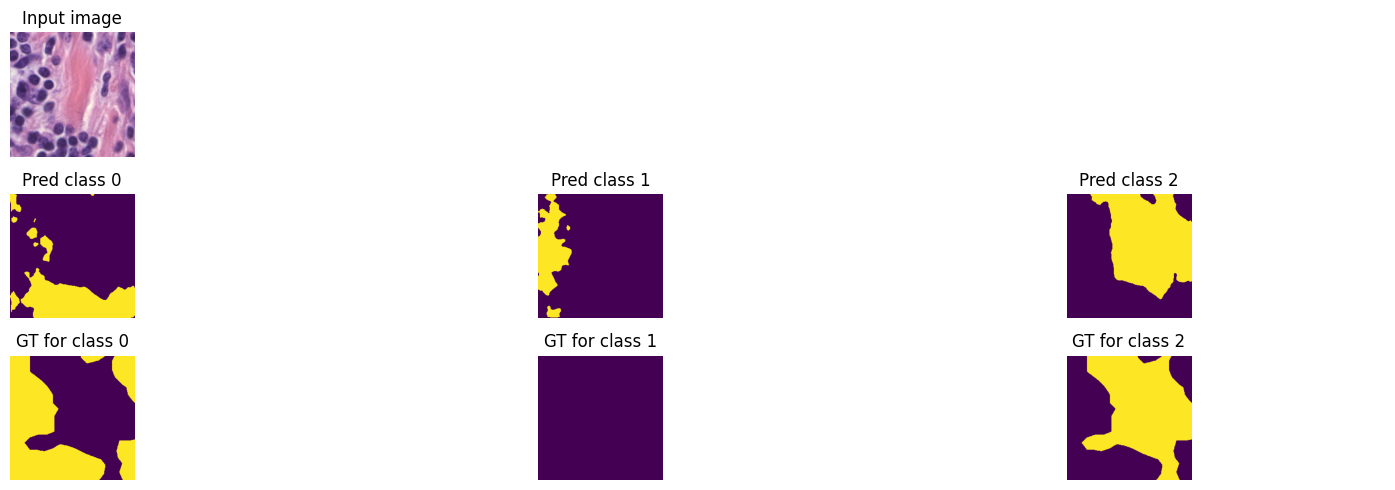

Train loss: 0.39761 | Time: 23m 51s | Val loss: 0.33138
Train_DICE_avg: 0.49864 | Train_Jaccard_avg: 0.43933 | Train_Sensitivity_avg: 0.74510 | Train_Specificity_avg: 0.75662 
Class 0 - Train_DICE: 0.48931 | Train_Jaccard: 0.44412 | Train_Sensitivity: 0.75956 | Train_Specificity: 0.80836 
Class 1 - Train_DICE: 0.60495 | Train_Jaccard: 0.53847 | Train_Sensitivity: 0.75427 | Train_Specificity: 0.72745 
Class 2 - Train_DICE: 0.40166 | Train_Jaccard: 0.33540 | Train_Sensitivity: 0.72146 | Train_Specificity: 0.73403 
Val_DICE_avg: 0.56653 | Val_Jaccard_avg: 0.51166 | Val_Sensitivity_avg: 0.79353 | Val_Specificity_avg: 0.75010 
Class 0 - Val_DICE: 0.58204 | Val_Jaccard: 0.53764 | Val_Sensitivity: 0.81319 | Val_Specificity: 0.81348 
Class 1 - Val_DICE: 0.67312 | Val_Jaccard: 0.61593 | Val_Sensitivity: 0.74790 | Val_Specificity: 0.71057 
Class 2 - Val_DICE: 0.44442 | Val_Jaccard: 0.38142 | Val_Sensitivity: 0.81952 | Val_Specificity: 0.72625 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.38997 | Time: 26m 4s | Val loss: 0.32362
Train_DICE_avg: 0.50902 | Train_Jaccard_avg: 0.44998 | Train_Sensitivity_avg: 0.74771 | Train_Specificity_avg: 0.76028 
Class 0 - Train_DICE: 0.49485 | Train_Jaccard: 0.44977 | Train_Sensitivity: 0.76148 | Train_Specificity: 0.81041 
Class 1 - Train_DICE: 0.61764 | Train_Jaccard: 0.55125 | Train_Sensitivity: 0.75996 | Train_Specificity: 0.73162 
Class 2 - Train_DICE: 0.41457 | Train_Jaccard: 0.34892 | Train_Sensitivity: 0.72170 | Train_Specificity: 0.73882 
Val_DICE_avg: 0.57784 | Val_Jaccard_avg: 0.52329 | Val_Sensitivity_avg: 0.79745 | Val_Specificity_avg: 0.75421 
Class 0 - Val_DICE: 0.58816 | Val_Jaccard: 0.54444 | Val_Sensitivity: 0.80883 | Val_Specificity: 0.81800 
Class 1 - Val_DICE: 0.68314 | Val_Jaccard: 0.62648 | Val_Sensitivity: 0.76172 | Val_Specificity: 0.71141 
Class 2 - Val_DICE: 0.46222 | Val_Jaccard: 0.39897 | Val_Sensitivity: 0.82179 | Val_Specificity: 0.73322 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.38251 | Time: 28m 16s | Val loss: 0.31757
Train_DICE_avg: 0.51989 | Train_Jaccard_avg: 0.46119 | Train_Sensitivity_avg: 0.75483 | Train_Specificity_avg: 0.76104 
Class 0 - Train_DICE: 0.50432 | Train_Jaccard: 0.45919 | Train_Sensitivity: 0.76245 | Train_Specificity: 0.81186 
Class 1 - Train_DICE: 0.63309 | Train_Jaccard: 0.56846 | Train_Sensitivity: 0.77729 | Train_Specificity: 0.73096 
Class 2 - Train_DICE: 0.42227 | Train_Jaccard: 0.35592 | Train_Sensitivity: 0.72475 | Train_Specificity: 0.74029 
Val_DICE_avg: 0.58158 | Val_Jaccard_avg: 0.52559 | Val_Sensitivity_avg: 0.79664 | Val_Specificity_avg: 0.75296 
Class 0 - Val_DICE: 0.57843 | Val_Jaccard: 0.53300 | Val_Sensitivity: 0.78465 | Val_Specificity: 0.81949 
Class 1 - Val_DICE: 0.69909 | Val_Jaccard: 0.64063 | Val_Sensitivity: 0.80701 | Val_Specificity: 0.70112 
Class 2 - Val_DICE: 0.46724 | Val_Jaccard: 0.40314 | Val_Sensitivity: 0.79827 | Val_Specificity: 0.73828 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.37699 | Time: 30m 29s | Val loss: 0.31756
Train_DICE_avg: 0.52775 | Train_Jaccard_avg: 0.46922 | Train_Sensitivity_avg: 0.76028 | Train_Specificity_avg: 0.76512 
Class 0 - Train_DICE: 0.50997 | Train_Jaccard: 0.46504 | Train_Sensitivity: 0.77200 | Train_Specificity: 0.81341 
Class 1 - Train_DICE: 0.63754 | Train_Jaccard: 0.57327 | Train_Sensitivity: 0.77889 | Train_Specificity: 0.73646 
Class 2 - Train_DICE: 0.43574 | Train_Jaccard: 0.36935 | Train_Sensitivity: 0.72995 | Train_Specificity: 0.74548 
Val_DICE_avg: 0.58109 | Val_Jaccard_avg: 0.52599 | Val_Sensitivity_avg: 0.79017 | Val_Specificity_avg: 0.75738 
Class 0 - Val_DICE: 0.58507 | Val_Jaccard: 0.54110 | Val_Sensitivity: 0.81038 | Val_Specificity: 0.81505 
Class 1 - Val_DICE: 0.68105 | Val_Jaccard: 0.62419 | Val_Sensitivity: 0.76260 | Val_Specificity: 0.71679 
Class 2 - Val_DICE: 0.47716 | Val_Jaccard: 0.41269 | Val_Sensitivity: 0.79754 | Val_Specificity: 0.74030 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.37007 | Time: 32m 41s | Val loss: 0.31506
Train_DICE_avg: 0.53849 | Train_Jaccard_avg: 0.48003 | Train_Sensitivity_avg: 0.76866 | Train_Specificity_avg: 0.76687 
Class 0 - Train_DICE: 0.52121 | Train_Jaccard: 0.47554 | Train_Sensitivity: 0.77604 | Train_Specificity: 0.81455 
Class 1 - Train_DICE: 0.64762 | Train_Jaccard: 0.58438 | Train_Sensitivity: 0.78795 | Train_Specificity: 0.73763 
Class 2 - Train_DICE: 0.44664 | Train_Jaccard: 0.38018 | Train_Sensitivity: 0.74198 | Train_Specificity: 0.74844 
Val_DICE_avg: 0.57790 | Val_Jaccard_avg: 0.52150 | Val_Sensitivity_avg: 0.78258 | Val_Specificity_avg: 0.75429 
Class 0 - Val_DICE: 0.57820 | Val_Jaccard: 0.53315 | Val_Sensitivity: 0.79522 | Val_Specificity: 0.81702 
Class 1 - Val_DICE: 0.68216 | Val_Jaccard: 0.62379 | Val_Sensitivity: 0.78664 | Val_Specificity: 0.70259 
Class 2 - Val_DICE: 0.47333 | Val_Jaccard: 0.40757 | Val_Sensitivity: 0.76588 | Val_Specificity: 0.74327 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


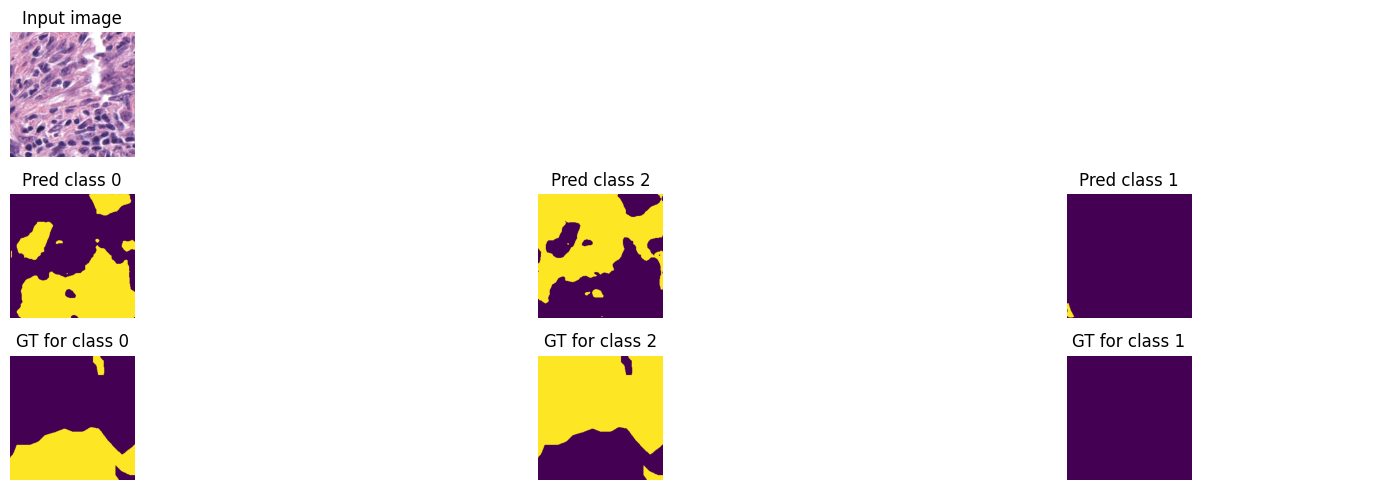

Train loss: 0.36392 | Time: 34m 54s | Val loss: 0.31470
Train_DICE_avg: 0.54325 | Train_Jaccard_avg: 0.48497 | Train_Sensitivity_avg: 0.76963 | Train_Specificity_avg: 0.77050 
Class 0 - Train_DICE: 0.52340 | Train_Jaccard: 0.47785 | Train_Sensitivity: 0.77565 | Train_Specificity: 0.81553 
Class 1 - Train_DICE: 0.65210 | Train_Jaccard: 0.58905 | Train_Sensitivity: 0.79002 | Train_Specificity: 0.74259 
Class 2 - Train_DICE: 0.45425 | Train_Jaccard: 0.38801 | Train_Sensitivity: 0.74321 | Train_Specificity: 0.75337 
Val_DICE_avg: 0.58034 | Val_Jaccard_avg: 0.52277 | Val_Sensitivity_avg: 0.77086 | Val_Specificity_avg: 0.75573 
Class 0 - Val_DICE: 0.57723 | Val_Jaccard: 0.52994 | Val_Sensitivity: 0.77616 | Val_Specificity: 0.81971 
Class 1 - Val_DICE: 0.68309 | Val_Jaccard: 0.62323 | Val_Sensitivity: 0.79639 | Val_Specificity: 0.69633 
Class 2 - Val_DICE: 0.48071 | Val_Jaccard: 0.41513 | Val_Sensitivity: 0.74001 | Val_Specificity: 0.75116 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.35233 | Time: 37m 7s | Val loss: 0.31106
Train_DICE_avg: 0.55906 | Train_Jaccard_avg: 0.50119 | Train_Sensitivity_avg: 0.78279 | Train_Specificity_avg: 0.77311 
Class 0 - Train_DICE: 0.53568 | Train_Jaccard: 0.49018 | Train_Sensitivity: 0.78139 | Train_Specificity: 0.81875 
Class 1 - Train_DICE: 0.67455 | Train_Jaccard: 0.61236 | Train_Sensitivity: 0.80862 | Train_Specificity: 0.74489 
Class 2 - Train_DICE: 0.46696 | Train_Jaccard: 0.40102 | Train_Sensitivity: 0.75837 | Train_Specificity: 0.75569 
Val_DICE_avg: 0.58640 | Val_Jaccard_avg: 0.53031 | Val_Sensitivity_avg: 0.78454 | Val_Specificity_avg: 0.75624 
Class 0 - Val_DICE: 0.58165 | Val_Jaccard: 0.53624 | Val_Sensitivity: 0.79130 | Val_Specificity: 0.81767 
Class 1 - Val_DICE: 0.69469 | Val_Jaccard: 0.63624 | Val_Sensitivity: 0.80445 | Val_Specificity: 0.70011 
Class 2 - Val_DICE: 0.48286 | Val_Jaccard: 0.41845 | Val_Sensitivity: 0.75787 | Val_Specificity: 0.75095 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.34775 | Time: 39m 20s | Val loss: 0.31042
Train_DICE_avg: 0.56464 | Train_Jaccard_avg: 0.50705 | Train_Sensitivity_avg: 0.78586 | Train_Specificity_avg: 0.77539 
Class 0 - Train_DICE: 0.54941 | Train_Jaccard: 0.50375 | Train_Sensitivity: 0.79064 | Train_Specificity: 0.82054 
Class 1 - Train_DICE: 0.67083 | Train_Jaccard: 0.60968 | Train_Sensitivity: 0.80597 | Train_Specificity: 0.74734 
Class 2 - Train_DICE: 0.47367 | Train_Jaccard: 0.40773 | Train_Sensitivity: 0.76097 | Train_Specificity: 0.75828 
Val_DICE_avg: 0.58810 | Val_Jaccard_avg: 0.53179 | Val_Sensitivity_avg: 0.78158 | Val_Specificity_avg: 0.75778 
Class 0 - Val_DICE: 0.58526 | Val_Jaccard: 0.53902 | Val_Sensitivity: 0.78500 | Val_Specificity: 0.82103 
Class 1 - Val_DICE: 0.69390 | Val_Jaccard: 0.63586 | Val_Sensitivity: 0.80336 | Val_Specificity: 0.70025 
Class 2 - Val_DICE: 0.48513 | Val_Jaccard: 0.42048 | Val_Sensitivity: 0.75638 | Val_Specificity: 0.75205 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.34421 | Time: 41m 32s | Val loss: 0.30390
Train_DICE_avg: 0.56523 | Train_Jaccard_avg: 0.50809 | Train_Sensitivity_avg: 0.78802 | Train_Specificity_avg: 0.77698 
Class 0 - Train_DICE: 0.54464 | Train_Jaccard: 0.49967 | Train_Sensitivity: 0.78698 | Train_Specificity: 0.82194 
Class 1 - Train_DICE: 0.67198 | Train_Jaccard: 0.61083 | Train_Sensitivity: 0.81034 | Train_Specificity: 0.74896 
Class 2 - Train_DICE: 0.47907 | Train_Jaccard: 0.41377 | Train_Sensitivity: 0.76674 | Train_Specificity: 0.76006 
Val_DICE_avg: 0.58640 | Val_Jaccard_avg: 0.53088 | Val_Sensitivity_avg: 0.78328 | Val_Specificity_avg: 0.75948 
Class 0 - Val_DICE: 0.57735 | Val_Jaccard: 0.53212 | Val_Sensitivity: 0.77089 | Val_Specificity: 0.82339 
Class 1 - Val_DICE: 0.69707 | Val_Jaccard: 0.63984 | Val_Sensitivity: 0.81177 | Val_Specificity: 0.70180 
Class 2 - Val_DICE: 0.48479 | Val_Jaccard: 0.42068 | Val_Sensitivity: 0.76718 | Val_Specificity: 0.75325 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.33786 | Time: 43m 45s | Val loss: 0.30518
Train_DICE_avg: 0.56938 | Train_Jaccard_avg: 0.51262 | Train_Sensitivity_avg: 0.79079 | Train_Specificity_avg: 0.77925 
Class 0 - Train_DICE: 0.55176 | Train_Jaccard: 0.50690 | Train_Sensitivity: 0.79379 | Train_Specificity: 0.82440 
Class 1 - Train_DICE: 0.67621 | Train_Jaccard: 0.61613 | Train_Sensitivity: 0.81454 | Train_Specificity: 0.75094 
Class 2 - Train_DICE: 0.48017 | Train_Jaccard: 0.41483 | Train_Sensitivity: 0.76403 | Train_Specificity: 0.76242 
Val_DICE_avg: 0.58988 | Val_Jaccard_avg: 0.53424 | Val_Sensitivity_avg: 0.78056 | Val_Specificity_avg: 0.76120 
Class 0 - Val_DICE: 0.58647 | Val_Jaccard: 0.54112 | Val_Sensitivity: 0.78819 | Val_Specificity: 0.82169 
Class 1 - Val_DICE: 0.69611 | Val_Jaccard: 0.63898 | Val_Sensitivity: 0.78942 | Val_Specificity: 0.70948 
Class 2 - Val_DICE: 0.48706 | Val_Jaccard: 0.42261 | Val_Sensitivity: 0.76409 | Val_Specificity: 0.75242 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


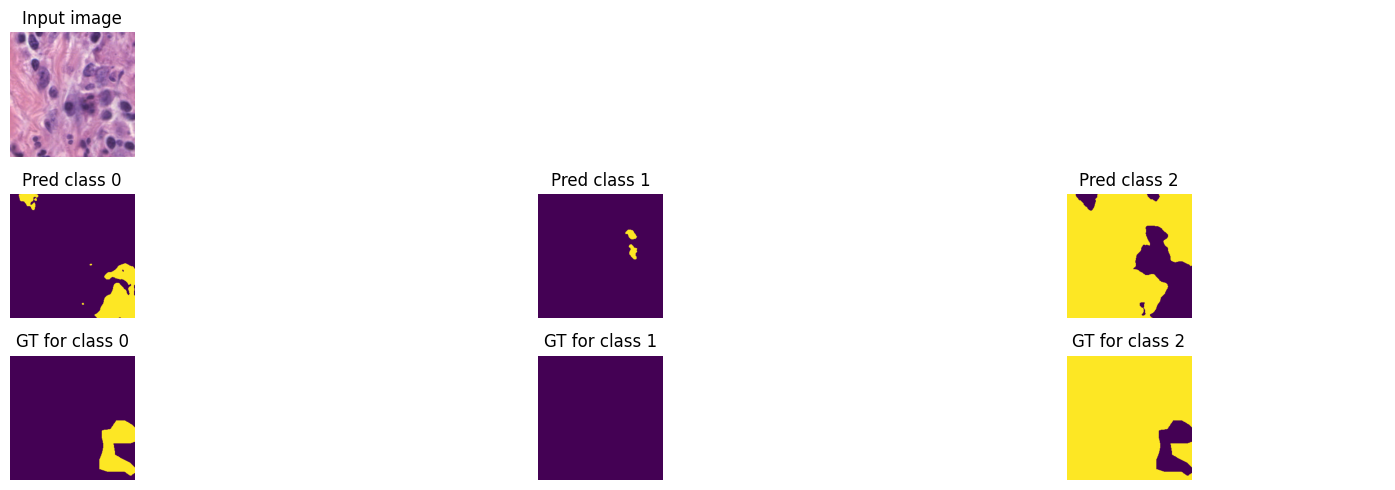

Train loss: 0.33489 | Time: 45m 59s | Val loss: 0.30902
Train_DICE_avg: 0.57412 | Train_Jaccard_avg: 0.51759 | Train_Sensitivity_avg: 0.79376 | Train_Specificity_avg: 0.78071 
Class 0 - Train_DICE: 0.55524 | Train_Jaccard: 0.51028 | Train_Sensitivity: 0.79358 | Train_Specificity: 0.82570 
Class 1 - Train_DICE: 0.68368 | Train_Jaccard: 0.62372 | Train_Sensitivity: 0.82030 | Train_Specificity: 0.75177 
Class 2 - Train_DICE: 0.48343 | Train_Jaccard: 0.41878 | Train_Sensitivity: 0.76739 | Train_Specificity: 0.76466 
Val_DICE_avg: 0.58421 | Val_Jaccard_avg: 0.52637 | Val_Sensitivity_avg: 0.77070 | Val_Specificity_avg: 0.75819 
Class 0 - Val_DICE: 0.57733 | Val_Jaccard: 0.53039 | Val_Sensitivity: 0.77310 | Val_Specificity: 0.82056 
Class 1 - Val_DICE: 0.68916 | Val_Jaccard: 0.62908 | Val_Sensitivity: 0.81262 | Val_Specificity: 0.69650 
Class 2 - Val_DICE: 0.48615 | Val_Jaccard: 0.41965 | Val_Sensitivity: 0.72636 | Val_Specificity: 0.75750 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.32671 | Time: 48m 13s | Val loss: 0.30290
Train_DICE_avg: 0.57791 | Train_Jaccard_avg: 0.52184 | Train_Sensitivity_avg: 0.79899 | Train_Specificity_avg: 0.78491 
Class 0 - Train_DICE: 0.56003 | Train_Jaccard: 0.51486 | Train_Sensitivity: 0.79674 | Train_Specificity: 0.82848 
Class 1 - Train_DICE: 0.68419 | Train_Jaccard: 0.62502 | Train_Sensitivity: 0.82206 | Train_Specificity: 0.76016 
Class 2 - Train_DICE: 0.48951 | Train_Jaccard: 0.42564 | Train_Sensitivity: 0.77817 | Train_Specificity: 0.76611 
Val_DICE_avg: 0.59535 | Val_Jaccard_avg: 0.53858 | Val_Sensitivity_avg: 0.77995 | Val_Specificity_avg: 0.76220 
Class 0 - Val_DICE: 0.59021 | Val_Jaccard: 0.54423 | Val_Sensitivity: 0.77418 | Val_Specificity: 0.82583 
Class 1 - Val_DICE: 0.70016 | Val_Jaccard: 0.64172 | Val_Sensitivity: 0.81299 | Val_Specificity: 0.70147 
Class 2 - Val_DICE: 0.49567 | Val_Jaccard: 0.42980 | Val_Sensitivity: 0.75267 | Val_Specificity: 0.75931 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.32406 | Time: 50m 26s | Val loss: 0.30329
Train_DICE_avg: 0.58216 | Train_Jaccard_avg: 0.52581 | Train_Sensitivity_avg: 0.79930 | Train_Specificity_avg: 0.78530 
Class 0 - Train_DICE: 0.56363 | Train_Jaccard: 0.51881 | Train_Sensitivity: 0.79866 | Train_Specificity: 0.82875 
Class 1 - Train_DICE: 0.68731 | Train_Jaccard: 0.62789 | Train_Sensitivity: 0.82747 | Train_Specificity: 0.75841 
Class 2 - Train_DICE: 0.49553 | Train_Jaccard: 0.43073 | Train_Sensitivity: 0.77178 | Train_Specificity: 0.76873 
Val_DICE_avg: 0.59388 | Val_Jaccard_avg: 0.53718 | Val_Sensitivity_avg: 0.78920 | Val_Specificity_avg: 0.75868 
Class 0 - Val_DICE: 0.59028 | Val_Jaccard: 0.54518 | Val_Sensitivity: 0.79948 | Val_Specificity: 0.81891 
Class 1 - Val_DICE: 0.69930 | Val_Jaccard: 0.64026 | Val_Sensitivity: 0.82360 | Val_Specificity: 0.69847 
Class 2 - Val_DICE: 0.49206 | Val_Jaccard: 0.42609 | Val_Sensitivity: 0.74451 | Val_Specificity: 0.75865 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.31989 | Time: 52m 39s | Val loss: 0.30673
Train_DICE_avg: 0.58142 | Train_Jaccard_avg: 0.52564 | Train_Sensitivity_avg: 0.79896 | Train_Specificity_avg: 0.78696 
Class 0 - Train_DICE: 0.56712 | Train_Jaccard: 0.52242 | Train_Sensitivity: 0.79746 | Train_Specificity: 0.82955 
Class 1 - Train_DICE: 0.68483 | Train_Jaccard: 0.62672 | Train_Sensitivity: 0.82453 | Train_Specificity: 0.76186 
Class 2 - Train_DICE: 0.49232 | Train_Jaccard: 0.42778 | Train_Sensitivity: 0.77489 | Train_Specificity: 0.76945 
Val_DICE_avg: 0.59504 | Val_Jaccard_avg: 0.53731 | Val_Sensitivity_avg: 0.78331 | Val_Specificity_avg: 0.75919 
Class 0 - Val_DICE: 0.58360 | Val_Jaccard: 0.53747 | Val_Sensitivity: 0.76237 | Val_Specificity: 0.82586 
Class 1 - Val_DICE: 0.70042 | Val_Jaccard: 0.64077 | Val_Sensitivity: 0.84703 | Val_Specificity: 0.68914 
Class 2 - Val_DICE: 0.50108 | Val_Jaccard: 0.43370 | Val_Sensitivity: 0.74053 | Val_Specificity: 0.76256 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.31309 | Time: 54m 53s | Val loss: 0.30128
Train_DICE_avg: 0.59355 | Train_Jaccard_avg: 0.53837 | Train_Sensitivity_avg: 0.81267 | Train_Specificity_avg: 0.79160 
Class 0 - Train_DICE: 0.57260 | Train_Jaccard: 0.52857 | Train_Sensitivity: 0.80751 | Train_Specificity: 0.83273 
Class 1 - Train_DICE: 0.70203 | Train_Jaccard: 0.64441 | Train_Sensitivity: 0.83872 | Train_Specificity: 0.76949 
Class 2 - Train_DICE: 0.50603 | Train_Jaccard: 0.44214 | Train_Sensitivity: 0.79178 | Train_Specificity: 0.77257 
Val_DICE_avg: 0.59745 | Val_Jaccard_avg: 0.54095 | Val_Sensitivity_avg: 0.79284 | Val_Specificity_avg: 0.75813 
Class 0 - Val_DICE: 0.59470 | Val_Jaccard: 0.54926 | Val_Sensitivity: 0.77729 | Val_Specificity: 0.82505 
Class 1 - Val_DICE: 0.70631 | Val_Jaccard: 0.64813 | Val_Sensitivity: 0.83868 | Val_Specificity: 0.69525 
Class 2 - Val_DICE: 0.49133 | Val_Jaccard: 0.42546 | Val_Sensitivity: 0.76255 | Val_Specificity: 0.75410 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


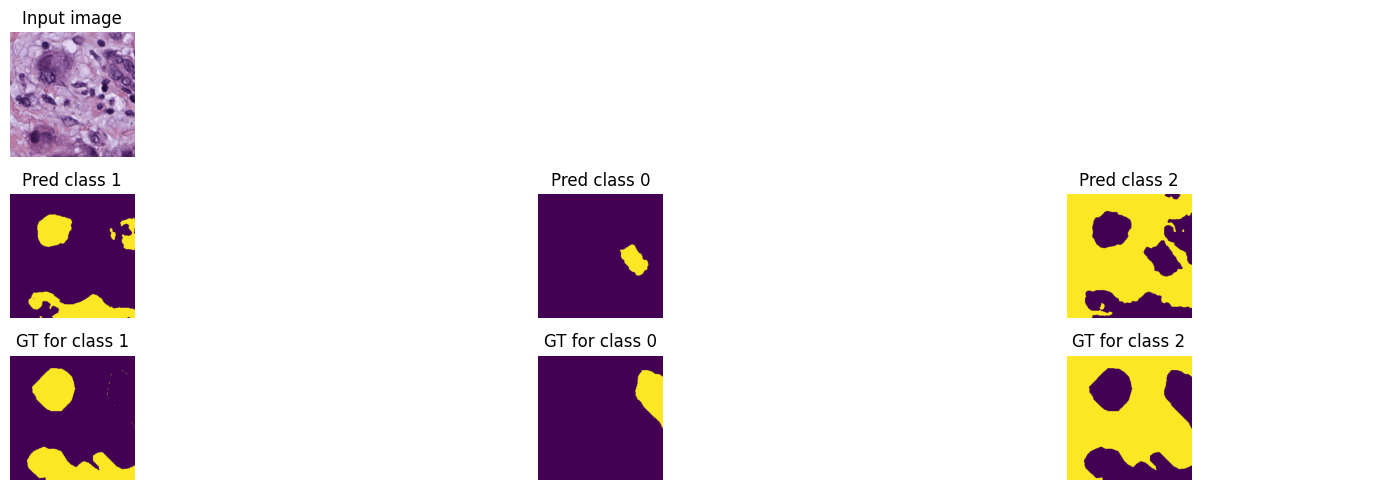

Train loss: 0.30580 | Time: 57m 7s | Val loss: 0.29841
Train_DICE_avg: 0.59778 | Train_Jaccard_avg: 0.54257 | Train_Sensitivity_avg: 0.80911 | Train_Specificity_avg: 0.79282 
Class 0 - Train_DICE: 0.58089 | Train_Jaccard: 0.53624 | Train_Sensitivity: 0.80672 | Train_Specificity: 0.83381 
Class 1 - Train_DICE: 0.70334 | Train_Jaccard: 0.64589 | Train_Sensitivity: 0.83903 | Train_Specificity: 0.76955 
Class 2 - Train_DICE: 0.50912 | Train_Jaccard: 0.44559 | Train_Sensitivity: 0.78157 | Train_Specificity: 0.77509 
Val_DICE_avg: 0.60810 | Val_Jaccard_avg: 0.55138 | Val_Sensitivity_avg: 0.79831 | Val_Specificity_avg: 0.76077 
Class 0 - Val_DICE: 0.60746 | Val_Jaccard: 0.56232 | Val_Sensitivity: 0.81565 | Val_Specificity: 0.81984 
Class 1 - Val_DICE: 0.70877 | Val_Jaccard: 0.64984 | Val_Sensitivity: 0.84678 | Val_Specificity: 0.69272 
Class 2 - Val_DICE: 0.50807 | Val_Jaccard: 0.44198 | Val_Sensitivity: 0.73250 | Val_Specificity: 0.76976 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.30419 | Time: 59m 20s | Val loss: 0.29773
Train_DICE_avg: 0.60197 | Train_Jaccard_avg: 0.54727 | Train_Sensitivity_avg: 0.81579 | Train_Specificity_avg: 0.79426 
Class 0 - Train_DICE: 0.58624 | Train_Jaccard: 0.54207 | Train_Sensitivity: 0.81187 | Train_Specificity: 0.83565 
Class 1 - Train_DICE: 0.70596 | Train_Jaccard: 0.64966 | Train_Sensitivity: 0.84398 | Train_Specificity: 0.77243 
Class 2 - Train_DICE: 0.51370 | Train_Jaccard: 0.45009 | Train_Sensitivity: 0.79153 | Train_Specificity: 0.77470 
Val_DICE_avg: 0.60726 | Val_Jaccard_avg: 0.55103 | Val_Sensitivity_avg: 0.80241 | Val_Specificity_avg: 0.75935 
Class 0 - Val_DICE: 0.60584 | Val_Jaccard: 0.56228 | Val_Sensitivity: 0.82643 | Val_Specificity: 0.81884 
Class 1 - Val_DICE: 0.71088 | Val_Jaccard: 0.65124 | Val_Sensitivity: 0.84644 | Val_Specificity: 0.69332 
Class 2 - Val_DICE: 0.50505 | Val_Jaccard: 0.43957 | Val_Sensitivity: 0.73436 | Val_Specificity: 0.76588 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.30290 | Time: 61m 33s | Val loss: 0.29759
Train_DICE_avg: 0.60131 | Train_Jaccard_avg: 0.54690 | Train_Sensitivity_avg: 0.81578 | Train_Specificity_avg: 0.79602 
Class 0 - Train_DICE: 0.57942 | Train_Jaccard: 0.53584 | Train_Sensitivity: 0.81375 | Train_Specificity: 0.83463 
Class 1 - Train_DICE: 0.71215 | Train_Jaccard: 0.65627 | Train_Sensitivity: 0.84687 | Train_Specificity: 0.77693 
Class 2 - Train_DICE: 0.51236 | Train_Jaccard: 0.44857 | Train_Sensitivity: 0.78673 | Train_Specificity: 0.77650 
Val_DICE_avg: 0.60752 | Val_Jaccard_avg: 0.55179 | Val_Sensitivity_avg: 0.81205 | Val_Specificity_avg: 0.75754 
Class 0 - Val_DICE: 0.60700 | Val_Jaccard: 0.56319 | Val_Sensitivity: 0.82664 | Val_Specificity: 0.81943 
Class 1 - Val_DICE: 0.71325 | Val_Jaccard: 0.65482 | Val_Sensitivity: 0.83440 | Val_Specificity: 0.69613 
Class 2 - Val_DICE: 0.50232 | Val_Jaccard: 0.43734 | Val_Sensitivity: 0.77512 | Val_Specificity: 0.75705 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.29735 | Time: 63m 46s | Val loss: 0.29269
Train_DICE_avg: 0.60233 | Train_Jaccard_avg: 0.54799 | Train_Sensitivity_avg: 0.81623 | Train_Specificity_avg: 0.79815 
Class 0 - Train_DICE: 0.58932 | Train_Jaccard: 0.54529 | Train_Sensitivity: 0.81701 | Train_Specificity: 0.83811 
Class 1 - Train_DICE: 0.70960 | Train_Jaccard: 0.65342 | Train_Sensitivity: 0.84805 | Train_Specificity: 0.77867 
Class 2 - Train_DICE: 0.50808 | Train_Jaccard: 0.44526 | Train_Sensitivity: 0.78364 | Train_Specificity: 0.77767 
Val_DICE_avg: 0.60586 | Val_Jaccard_avg: 0.54989 | Val_Sensitivity_avg: 0.79876 | Val_Specificity_avg: 0.76161 
Class 0 - Val_DICE: 0.60908 | Val_Jaccard: 0.56435 | Val_Sensitivity: 0.81143 | Val_Specificity: 0.82267 
Class 1 - Val_DICE: 0.70681 | Val_Jaccard: 0.64902 | Val_Sensitivity: 0.81716 | Val_Specificity: 0.70468 
Class 2 - Val_DICE: 0.50169 | Val_Jaccard: 0.43628 | Val_Sensitivity: 0.76770 | Val_Specificity: 0.75747 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.30287 | Time: 66m 0s | Val loss: 0.29237
Train_DICE_avg: 0.59918 | Train_Jaccard_avg: 0.54504 | Train_Sensitivity_avg: 0.81801 | Train_Specificity_avg: 0.79521 
Class 0 - Train_DICE: 0.58194 | Train_Jaccard: 0.53853 | Train_Sensitivity: 0.81618 | Train_Specificity: 0.83482 
Class 1 - Train_DICE: 0.70403 | Train_Jaccard: 0.64770 | Train_Sensitivity: 0.84450 | Train_Specificity: 0.77350 
Class 2 - Train_DICE: 0.51155 | Train_Jaccard: 0.44889 | Train_Sensitivity: 0.79334 | Train_Specificity: 0.77731 
Val_DICE_avg: 0.60429 | Val_Jaccard_avg: 0.54857 | Val_Sensitivity_avg: 0.80230 | Val_Specificity_avg: 0.76104 
Class 0 - Val_DICE: 0.59911 | Val_Jaccard: 0.55387 | Val_Sensitivity: 0.78121 | Val_Specificity: 0.82664 
Class 1 - Val_DICE: 0.71578 | Val_Jaccard: 0.65829 | Val_Sensitivity: 0.83633 | Val_Specificity: 0.70244 
Class 2 - Val_DICE: 0.49799 | Val_Jaccard: 0.43354 | Val_Sensitivity: 0.78936 | Val_Specificity: 0.75403 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


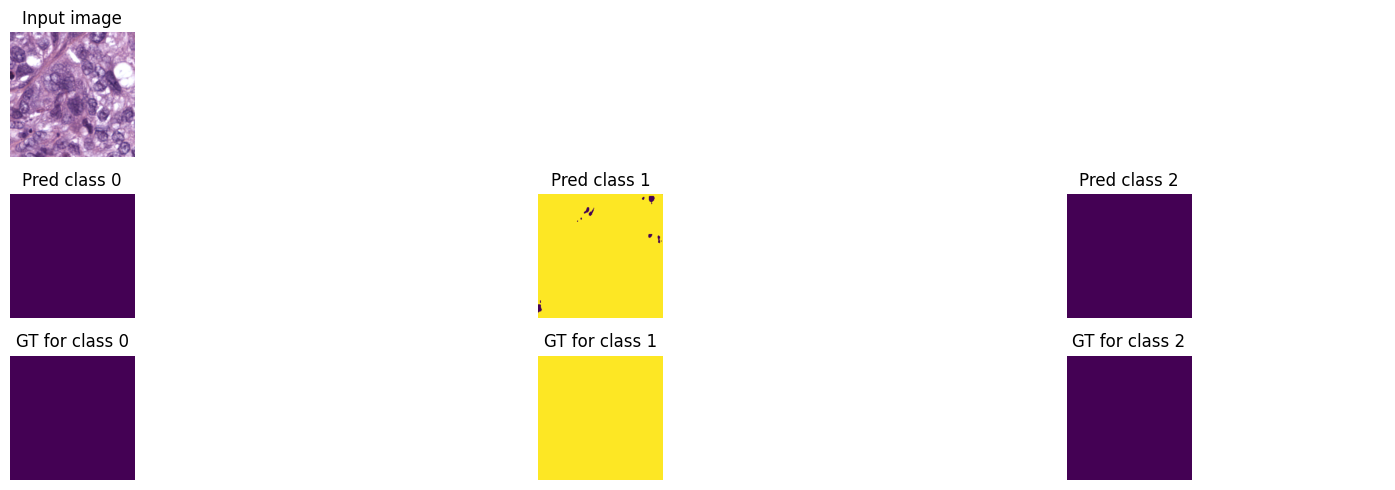

Train loss: 0.29454 | Time: 68m 14s | Val loss: 0.28837
Train_DICE_avg: 0.60727 | Train_Jaccard_avg: 0.55342 | Train_Sensitivity_avg: 0.82351 | Train_Specificity_avg: 0.79908 
Class 0 - Train_DICE: 0.59392 | Train_Jaccard: 0.55015 | Train_Sensitivity: 0.82354 | Train_Specificity: 0.83667 
Class 1 - Train_DICE: 0.71231 | Train_Jaccard: 0.65667 | Train_Sensitivity: 0.84786 | Train_Specificity: 0.78249 
Class 2 - Train_DICE: 0.51558 | Train_Jaccard: 0.45346 | Train_Sensitivity: 0.79912 | Train_Specificity: 0.77808 
Val_DICE_avg: 0.61028 | Val_Jaccard_avg: 0.55482 | Val_Sensitivity_avg: 0.80780 | Val_Specificity_avg: 0.76194 
Class 0 - Val_DICE: 0.60714 | Val_Jaccard: 0.56365 | Val_Sensitivity: 0.82418 | Val_Specificity: 0.81908 
Class 1 - Val_DICE: 0.71360 | Val_Jaccard: 0.65592 | Val_Sensitivity: 0.82950 | Val_Specificity: 0.70455 
Class 2 - Val_DICE: 0.51011 | Val_Jaccard: 0.44490 | Val_Sensitivity: 0.76971 | Val_Specificity: 0.76219 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.29027 | Time: 70m 28s | Val loss: 0.28939
Train_DICE_avg: 0.61205 | Train_Jaccard_avg: 0.55845 | Train_Sensitivity_avg: 0.82880 | Train_Specificity_avg: 0.79990 
Class 0 - Train_DICE: 0.59630 | Train_Jaccard: 0.55312 | Train_Sensitivity: 0.82706 | Train_Specificity: 0.83921 
Class 1 - Train_DICE: 0.71904 | Train_Jaccard: 0.66367 | Train_Sensitivity: 0.85865 | Train_Specificity: 0.77986 
Class 2 - Train_DICE: 0.52081 | Train_Jaccard: 0.45857 | Train_Sensitivity: 0.80069 | Train_Specificity: 0.78062 
Val_DICE_avg: 0.61112 | Val_Jaccard_avg: 0.55518 | Val_Sensitivity_avg: 0.81376 | Val_Specificity_avg: 0.75938 
Class 0 - Val_DICE: 0.61339 | Val_Jaccard: 0.56855 | Val_Sensitivity: 0.81879 | Val_Specificity: 0.82256 
Class 1 - Val_DICE: 0.72225 | Val_Jaccard: 0.66439 | Val_Sensitivity: 0.86149 | Val_Specificity: 0.69783 
Class 2 - Val_DICE: 0.49772 | Val_Jaccard: 0.43260 | Val_Sensitivity: 0.76101 | Val_Specificity: 0.75775 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.28476 | Time: 72m 42s | Val loss: 0.28623
Train_DICE_avg: 0.61892 | Train_Jaccard_avg: 0.56548 | Train_Sensitivity_avg: 0.83090 | Train_Specificity_avg: 0.80483 
Class 0 - Train_DICE: 0.60921 | Train_Jaccard: 0.56561 | Train_Sensitivity: 0.83360 | Train_Specificity: 0.84185 
Class 1 - Train_DICE: 0.72239 | Train_Jaccard: 0.66771 | Train_Sensitivity: 0.85548 | Train_Specificity: 0.78983 
Class 2 - Train_DICE: 0.52515 | Train_Jaccard: 0.46310 | Train_Sensitivity: 0.80362 | Train_Specificity: 0.78281 
Val_DICE_avg: 0.61377 | Val_Jaccard_avg: 0.56017 | Val_Sensitivity_avg: 0.81875 | Val_Specificity_avg: 0.76486 
Class 0 - Val_DICE: 0.60553 | Val_Jaccard: 0.56395 | Val_Sensitivity: 0.83727 | Val_Specificity: 0.81976 
Class 1 - Val_DICE: 0.71801 | Val_Jaccard: 0.66225 | Val_Sensitivity: 0.84036 | Val_Specificity: 0.70745 
Class 2 - Val_DICE: 0.51779 | Val_Jaccard: 0.45432 | Val_Sensitivity: 0.77860 | Val_Specificity: 0.76738 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.28049 | Time: 74m 56s | Val loss: 0.28808
Train_DICE_avg: 0.61989 | Train_Jaccard_avg: 0.56668 | Train_Sensitivity_avg: 0.83177 | Train_Specificity_avg: 0.80583 
Class 0 - Train_DICE: 0.61258 | Train_Jaccard: 0.56877 | Train_Sensitivity: 0.83553 | Train_Specificity: 0.84191 
Class 1 - Train_DICE: 0.72150 | Train_Jaccard: 0.66741 | Train_Sensitivity: 0.85892 | Train_Specificity: 0.78944 
Class 2 - Train_DICE: 0.52557 | Train_Jaccard: 0.46386 | Train_Sensitivity: 0.80087 | Train_Specificity: 0.78615 
Val_DICE_avg: 0.61183 | Val_Jaccard_avg: 0.55706 | Val_Sensitivity_avg: 0.81700 | Val_Specificity_avg: 0.76249 
Class 0 - Val_DICE: 0.61544 | Val_Jaccard: 0.57102 | Val_Sensitivity: 0.80422 | Val_Specificity: 0.82947 
Class 1 - Val_DICE: 0.71601 | Val_Jaccard: 0.65912 | Val_Sensitivity: 0.85336 | Val_Specificity: 0.70061 
Class 2 - Val_DICE: 0.50405 | Val_Jaccard: 0.44104 | Val_Sensitivity: 0.79340 | Val_Specificity: 0.75739 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.27666 | Time: 77m 9s | Val loss: 0.28818
Train_DICE_avg: 0.62385 | Train_Jaccard_avg: 0.57068 | Train_Sensitivity_avg: 0.83405 | Train_Specificity_avg: 0.80765 
Class 0 - Train_DICE: 0.61570 | Train_Jaccard: 0.57209 | Train_Sensitivity: 0.83920 | Train_Specificity: 0.84496 
Class 1 - Train_DICE: 0.72292 | Train_Jaccard: 0.66898 | Train_Sensitivity: 0.85730 | Train_Specificity: 0.79033 
Class 2 - Train_DICE: 0.53293 | Train_Jaccard: 0.47096 | Train_Sensitivity: 0.80566 | Train_Specificity: 0.78765 
Val_DICE_avg: 0.61218 | Val_Jaccard_avg: 0.55807 | Val_Sensitivity_avg: 0.83074 | Val_Specificity_avg: 0.75906 
Class 0 - Val_DICE: 0.61098 | Val_Jaccard: 0.56888 | Val_Sensitivity: 0.83473 | Val_Specificity: 0.82160 
Class 1 - Val_DICE: 0.72525 | Val_Jaccard: 0.66801 | Val_Sensitivity: 0.86488 | Val_Specificity: 0.69700 
Class 2 - Val_DICE: 0.50029 | Val_Jaccard: 0.43732 | Val_Sensitivity: 0.79261 | Val_Specificity: 0.75859 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


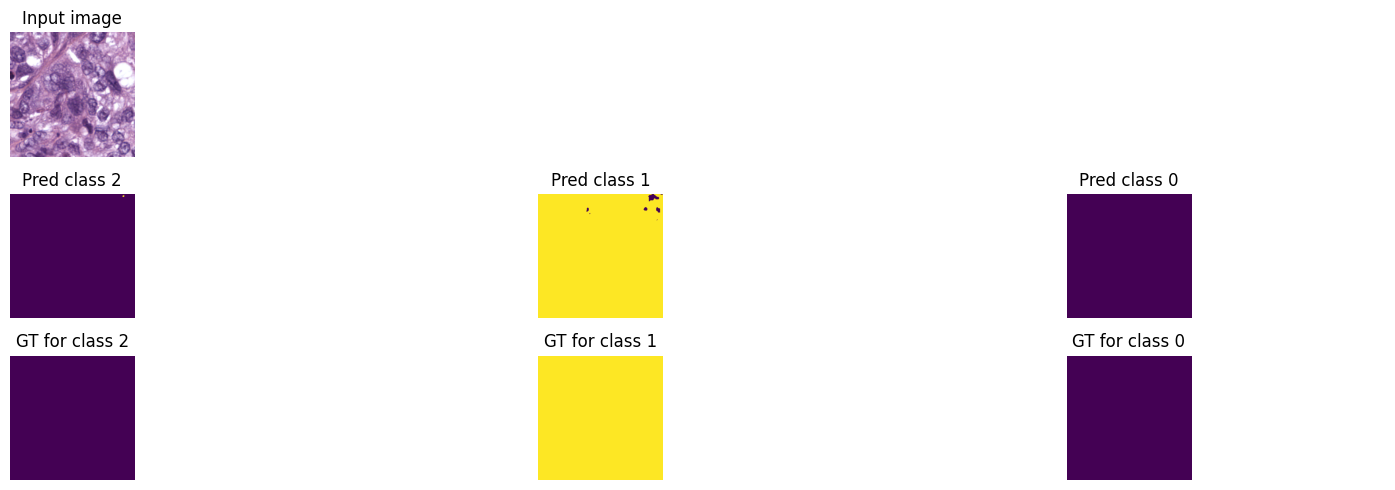

Train loss: 0.27453 | Time: 79m 24s | Val loss: 0.28276
Train_DICE_avg: 0.62505 | Train_Jaccard_avg: 0.57163 | Train_Sensitivity_avg: 0.83457 | Train_Specificity_avg: 0.80859 
Class 0 - Train_DICE: 0.61609 | Train_Jaccard: 0.57217 | Train_Sensitivity: 0.83372 | Train_Specificity: 0.84669 
Class 1 - Train_DICE: 0.72195 | Train_Jaccard: 0.66790 | Train_Sensitivity: 0.86013 | Train_Specificity: 0.79171 
Class 2 - Train_DICE: 0.53710 | Train_Jaccard: 0.47483 | Train_Sensitivity: 0.80986 | Train_Specificity: 0.78737 
Val_DICE_avg: 0.62156 | Val_Jaccard_avg: 0.56791 | Val_Sensitivity_avg: 0.82933 | Val_Specificity_avg: 0.76547 
Class 0 - Val_DICE: 0.61418 | Val_Jaccard: 0.57262 | Val_Sensitivity: 0.85055 | Val_Specificity: 0.81982 
Class 1 - Val_DICE: 0.73308 | Val_Jaccard: 0.67743 | Val_Sensitivity: 0.86844 | Val_Specificity: 0.70561 
Class 2 - Val_DICE: 0.51743 | Val_Jaccard: 0.45368 | Val_Sensitivity: 0.76899 | Val_Specificity: 0.77099 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.26812 | Time: 81m 38s | Val loss: 0.28549
Train_DICE_avg: 0.63361 | Train_Jaccard_avg: 0.58125 | Train_Sensitivity_avg: 0.84622 | Train_Specificity_avg: 0.81203 
Class 0 - Train_DICE: 0.62660 | Train_Jaccard: 0.58367 | Train_Sensitivity: 0.84922 | Train_Specificity: 0.84706 
Class 1 - Train_DICE: 0.73082 | Train_Jaccard: 0.67795 | Train_Sensitivity: 0.86832 | Train_Specificity: 0.79762 
Class 2 - Train_DICE: 0.54342 | Train_Jaccard: 0.48213 | Train_Sensitivity: 0.82112 | Train_Specificity: 0.79141 
Val_DICE_avg: 0.61432 | Val_Jaccard_avg: 0.56103 | Val_Sensitivity_avg: 0.82689 | Val_Specificity_avg: 0.76385 
Class 0 - Val_DICE: 0.60685 | Val_Jaccard: 0.56570 | Val_Sensitivity: 0.82868 | Val_Specificity: 0.82342 
Class 1 - Val_DICE: 0.72974 | Val_Jaccard: 0.67502 | Val_Sensitivity: 0.86417 | Val_Specificity: 0.70496 
Class 2 - Val_DICE: 0.50636 | Val_Jaccard: 0.44236 | Val_Sensitivity: 0.78781 | Val_Specificity: 0.76317 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.26485 | Time: 83m 51s | Val loss: 0.28665
Train_DICE_avg: 0.63504 | Train_Jaccard_avg: 0.58301 | Train_Sensitivity_avg: 0.84576 | Train_Specificity_avg: 0.81279 
Class 0 - Train_DICE: 0.63263 | Train_Jaccard: 0.58906 | Train_Sensitivity: 0.84743 | Train_Specificity: 0.84793 
Class 1 - Train_DICE: 0.73491 | Train_Jaccard: 0.68264 | Train_Sensitivity: 0.86936 | Train_Specificity: 0.80005 
Class 2 - Train_DICE: 0.53756 | Train_Jaccard: 0.47731 | Train_Sensitivity: 0.82049 | Train_Specificity: 0.79040 
Val_DICE_avg: 0.61357 | Val_Jaccard_avg: 0.56126 | Val_Sensitivity_avg: 0.83872 | Val_Specificity_avg: 0.76501 
Class 0 - Val_DICE: 0.60720 | Val_Jaccard: 0.56621 | Val_Sensitivity: 0.85462 | Val_Specificity: 0.81588 
Class 1 - Val_DICE: 0.73222 | Val_Jaccard: 0.67852 | Val_Sensitivity: 0.84388 | Val_Specificity: 0.72322 
Class 2 - Val_DICE: 0.50131 | Val_Jaccard: 0.43907 | Val_Sensitivity: 0.81767 | Val_Specificity: 0.75592 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.26216 | Time: 86m 4s | Val loss: 0.28657
Train_DICE_avg: 0.63896 | Train_Jaccard_avg: 0.58671 | Train_Sensitivity_avg: 0.84756 | Train_Specificity_avg: 0.81437 
Class 0 - Train_DICE: 0.63066 | Train_Jaccard: 0.58724 | Train_Sensitivity: 0.84805 | Train_Specificity: 0.85149 
Class 1 - Train_DICE: 0.73775 | Train_Jaccard: 0.68584 | Train_Sensitivity: 0.87556 | Train_Specificity: 0.79769 
Class 2 - Train_DICE: 0.54847 | Train_Jaccard: 0.48705 | Train_Sensitivity: 0.81906 | Train_Specificity: 0.79394 
Val_DICE_avg: 0.61800 | Val_Jaccard_avg: 0.56532 | Val_Sensitivity_avg: 0.83513 | Val_Specificity_avg: 0.76756 
Class 0 - Val_DICE: 0.62203 | Val_Jaccard: 0.57891 | Val_Sensitivity: 0.83135 | Val_Specificity: 0.82642 
Class 1 - Val_DICE: 0.73777 | Val_Jaccard: 0.68484 | Val_Sensitivity: 0.84536 | Val_Specificity: 0.72793 
Class 2 - Val_DICE: 0.49419 | Val_Jaccard: 0.43221 | Val_Sensitivity: 0.82868 | Val_Specificity: 0.74833 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.26113 | Time: 88m 18s | Val loss: 0.28689
Train_DICE_avg: 0.64153 | Train_Jaccard_avg: 0.58965 | Train_Sensitivity_avg: 0.85045 | Train_Specificity_avg: 0.81605 
Class 0 - Train_DICE: 0.63738 | Train_Jaccard: 0.59420 | Train_Sensitivity: 0.85674 | Train_Specificity: 0.85088 
Class 1 - Train_DICE: 0.73762 | Train_Jaccard: 0.68647 | Train_Sensitivity: 0.87496 | Train_Specificity: 0.80214 
Class 2 - Train_DICE: 0.54960 | Train_Jaccard: 0.48828 | Train_Sensitivity: 0.81963 | Train_Specificity: 0.79512 
Val_DICE_avg: 0.61755 | Val_Jaccard_avg: 0.56460 | Val_Sensitivity_avg: 0.84011 | Val_Specificity_avg: 0.76633 
Class 0 - Val_DICE: 0.61792 | Val_Jaccard: 0.57528 | Val_Sensitivity: 0.82981 | Val_Specificity: 0.82526 
Class 1 - Val_DICE: 0.73640 | Val_Jaccard: 0.68297 | Val_Sensitivity: 0.86377 | Val_Specificity: 0.72020 
Class 2 - Val_DICE: 0.49832 | Val_Jaccard: 0.43554 | Val_Sensitivity: 0.82676 | Val_Specificity: 0.75354 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


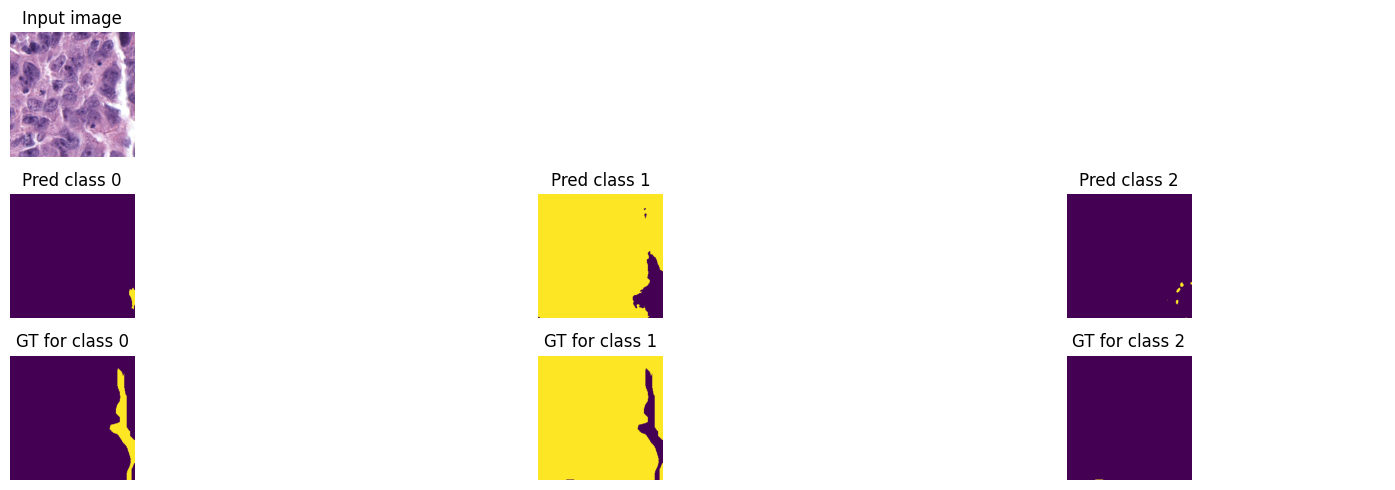

Train loss: 0.25520 | Time: 90m 32s | Val loss: 0.28850
Train_DICE_avg: 0.64442 | Train_Jaccard_avg: 0.59262 | Train_Sensitivity_avg: 0.85062 | Train_Specificity_avg: 0.81843 
Class 0 - Train_DICE: 0.63572 | Train_Jaccard: 0.59264 | Train_Sensitivity: 0.85201 | Train_Specificity: 0.85140 
Class 1 - Train_DICE: 0.74136 | Train_Jaccard: 0.69040 | Train_Sensitivity: 0.87577 | Train_Specificity: 0.80599 
Class 2 - Train_DICE: 0.55619 | Train_Jaccard: 0.49482 | Train_Sensitivity: 0.82408 | Train_Specificity: 0.79789 
Val_DICE_avg: 0.61467 | Val_Jaccard_avg: 0.56193 | Val_Sensitivity_avg: 0.84441 | Val_Specificity_avg: 0.76333 
Class 0 - Val_DICE: 0.61569 | Val_Jaccard: 0.57312 | Val_Sensitivity: 0.84128 | Val_Specificity: 0.82086 
Class 1 - Val_DICE: 0.73458 | Val_Jaccard: 0.68147 | Val_Sensitivity: 0.85850 | Val_Specificity: 0.72300 
Class 2 - Val_DICE: 0.49373 | Val_Jaccard: 0.43121 | Val_Sensitivity: 0.83346 | Val_Specificity: 0.74613 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.25185 | Time: 92m 46s | Val loss: 0.28588
Train_DICE_avg: 0.64819 | Train_Jaccard_avg: 0.59682 | Train_Sensitivity_avg: 0.85621 | Train_Specificity_avg: 0.81961 
Class 0 - Train_DICE: 0.64224 | Train_Jaccard: 0.59950 | Train_Sensitivity: 0.85627 | Train_Specificity: 0.85449 
Class 1 - Train_DICE: 0.74371 | Train_Jaccard: 0.69298 | Train_Sensitivity: 0.88002 | Train_Specificity: 0.80610 
Class 2 - Train_DICE: 0.55861 | Train_Jaccard: 0.49797 | Train_Sensitivity: 0.83233 | Train_Specificity: 0.79823 
Val_DICE_avg: 0.61571 | Val_Jaccard_avg: 0.56389 | Val_Sensitivity_avg: 0.84357 | Val_Specificity_avg: 0.76727 
Class 0 - Val_DICE: 0.61524 | Val_Jaccard: 0.57277 | Val_Sensitivity: 0.83244 | Val_Specificity: 0.82317 
Class 1 - Val_DICE: 0.74040 | Val_Jaccard: 0.68832 | Val_Sensitivity: 0.85143 | Val_Specificity: 0.73166 
Class 2 - Val_DICE: 0.49148 | Val_Jaccard: 0.43059 | Val_Sensitivity: 0.84683 | Val_Specificity: 0.74699 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.24893 | Time: 95m 0s | Val loss: 0.28509
Train_DICE_avg: 0.64991 | Train_Jaccard_avg: 0.59842 | Train_Sensitivity_avg: 0.85446 | Train_Specificity_avg: 0.82098 
Class 0 - Train_DICE: 0.64210 | Train_Jaccard: 0.59936 | Train_Sensitivity: 0.85763 | Train_Specificity: 0.85343 
Class 1 - Train_DICE: 0.74845 | Train_Jaccard: 0.69761 | Train_Sensitivity: 0.87881 | Train_Specificity: 0.80846 
Class 2 - Train_DICE: 0.55918 | Train_Jaccard: 0.49828 | Train_Sensitivity: 0.82694 | Train_Specificity: 0.80104 
Val_DICE_avg: 0.61785 | Val_Jaccard_avg: 0.56555 | Val_Sensitivity_avg: 0.84491 | Val_Specificity_avg: 0.76570 
Class 0 - Val_DICE: 0.61693 | Val_Jaccard: 0.57512 | Val_Sensitivity: 0.85097 | Val_Specificity: 0.81849 
Class 1 - Val_DICE: 0.74133 | Val_Jaccard: 0.68852 | Val_Sensitivity: 0.85373 | Val_Specificity: 0.72745 
Class 2 - Val_DICE: 0.49531 | Val_Jaccard: 0.43300 | Val_Sensitivity: 0.83002 | Val_Specificity: 0.75118 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.24732 | Time: 97m 13s | Val loss: 0.28129
Train_DICE_avg: 0.65463 | Train_Jaccard_avg: 0.60334 | Train_Sensitivity_avg: 0.85847 | Train_Specificity_avg: 0.82109 
Class 0 - Train_DICE: 0.64804 | Train_Jaccard: 0.60505 | Train_Sensitivity: 0.85742 | Train_Specificity: 0.85435 
Class 1 - Train_DICE: 0.75279 | Train_Jaccard: 0.70258 | Train_Sensitivity: 0.88911 | Train_Specificity: 0.80719 
Class 2 - Train_DICE: 0.56306 | Train_Jaccard: 0.50238 | Train_Sensitivity: 0.82887 | Train_Specificity: 0.80172 
Val_DICE_avg: 0.61760 | Val_Jaccard_avg: 0.56576 | Val_Sensitivity_avg: 0.85094 | Val_Specificity_avg: 0.76537 
Class 0 - Val_DICE: 0.61833 | Val_Jaccard: 0.57673 | Val_Sensitivity: 0.84206 | Val_Specificity: 0.82238 
Class 1 - Val_DICE: 0.74415 | Val_Jaccard: 0.69124 | Val_Sensitivity: 0.86616 | Val_Specificity: 0.72373 
Class 2 - Val_DICE: 0.49032 | Val_Jaccard: 0.42929 | Val_Sensitivity: 0.84461 | Val_Specificity: 0.75000 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.24597 | Time: 99m 27s | Val loss: 0.28906
Train_DICE_avg: 0.65273 | Train_Jaccard_avg: 0.60123 | Train_Sensitivity_avg: 0.85572 | Train_Specificity_avg: 0.82364 
Class 0 - Train_DICE: 0.64473 | Train_Jaccard: 0.60091 | Train_Sensitivity: 0.85716 | Train_Specificity: 0.85529 
Class 1 - Train_DICE: 0.75435 | Train_Jaccard: 0.70393 | Train_Sensitivity: 0.88233 | Train_Specificity: 0.81335 
Class 2 - Train_DICE: 0.55911 | Train_Jaccard: 0.49885 | Train_Sensitivity: 0.82769 | Train_Specificity: 0.80227 
Val_DICE_avg: 0.61103 | Val_Jaccard_avg: 0.55931 | Val_Sensitivity_avg: 0.85837 | Val_Specificity_avg: 0.75713 
Class 0 - Val_DICE: 0.61197 | Val_Jaccard: 0.57084 | Val_Sensitivity: 0.85608 | Val_Specificity: 0.81682 
Class 1 - Val_DICE: 0.74286 | Val_Jaccard: 0.68957 | Val_Sensitivity: 0.85673 | Val_Specificity: 0.71664 
Class 2 - Val_DICE: 0.47828 | Val_Jaccard: 0.41753 | Val_Sensitivity: 0.86229 | Val_Specificity: 0.73792 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


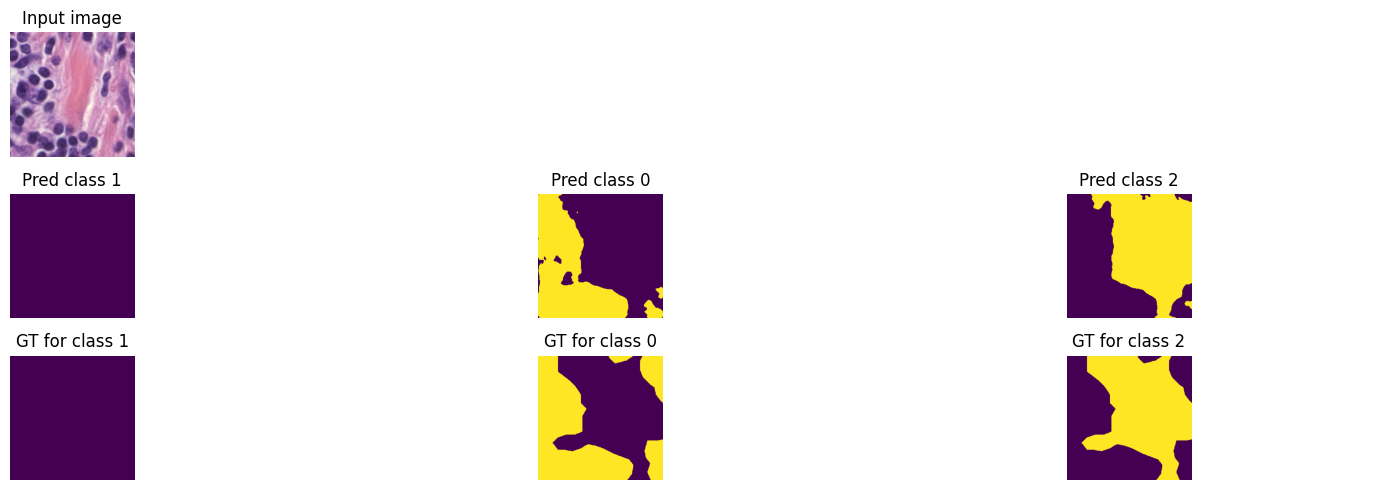

Train loss: 0.24248 | Time: 101m 42s | Val loss: 0.28726
Train_DICE_avg: 0.65688 | Train_Jaccard_avg: 0.60534 | Train_Sensitivity_avg: 0.85844 | Train_Specificity_avg: 0.82320 
Class 0 - Train_DICE: 0.65257 | Train_Jaccard: 0.60875 | Train_Sensitivity: 0.86389 | Train_Specificity: 0.85351 
Class 1 - Train_DICE: 0.75493 | Train_Jaccard: 0.70467 | Train_Sensitivity: 0.88128 | Train_Specificity: 0.81130 
Class 2 - Train_DICE: 0.56314 | Train_Jaccard: 0.50259 | Train_Sensitivity: 0.83015 | Train_Specificity: 0.80478 
Val_DICE_avg: 0.61574 | Val_Jaccard_avg: 0.56331 | Val_Sensitivity_avg: 0.84578 | Val_Specificity_avg: 0.76328 
Class 0 - Val_DICE: 0.61354 | Val_Jaccard: 0.57124 | Val_Sensitivity: 0.81272 | Val_Specificity: 0.82882 
Class 1 - Val_DICE: 0.74477 | Val_Jaccard: 0.69151 | Val_Sensitivity: 0.87604 | Val_Specificity: 0.71305 
Class 2 - Val_DICE: 0.48892 | Val_Jaccard: 0.42717 | Val_Sensitivity: 0.84858 | Val_Specificity: 0.74798 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.24066 | Time: 103m 56s | Val loss: 0.28879
Train_DICE_avg: 0.65785 | Train_Jaccard_avg: 0.60674 | Train_Sensitivity_avg: 0.85985 | Train_Specificity_avg: 0.82391 
Class 0 - Train_DICE: 0.65366 | Train_Jaccard: 0.61101 | Train_Sensitivity: 0.86132 | Train_Specificity: 0.85601 
Class 1 - Train_DICE: 0.75372 | Train_Jaccard: 0.70381 | Train_Sensitivity: 0.88339 | Train_Specificity: 0.81152 
Class 2 - Train_DICE: 0.56615 | Train_Jaccard: 0.50539 | Train_Sensitivity: 0.83485 | Train_Specificity: 0.80419 
Val_DICE_avg: 0.61299 | Val_Jaccard_avg: 0.56090 | Val_Sensitivity_avg: 0.85646 | Val_Specificity_avg: 0.75991 
Class 0 - Val_DICE: 0.62559 | Val_Jaccard: 0.58254 | Val_Sensitivity: 0.81828 | Val_Specificity: 0.82995 
Class 1 - Val_DICE: 0.74273 | Val_Jaccard: 0.68942 | Val_Sensitivity: 0.86897 | Val_Specificity: 0.71495 
Class 2 - Val_DICE: 0.47065 | Val_Jaccard: 0.41074 | Val_Sensitivity: 0.88213 | Val_Specificity: 0.73483 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.23696 | Time: 106m 10s | Val loss: 0.28300
Train_DICE_avg: 0.66261 | Train_Jaccard_avg: 0.61162 | Train_Sensitivity_avg: 0.86397 | Train_Specificity_avg: 0.82702 
Class 0 - Train_DICE: 0.65718 | Train_Jaccard: 0.61428 | Train_Sensitivity: 0.86534 | Train_Specificity: 0.85936 
Class 1 - Train_DICE: 0.76109 | Train_Jaccard: 0.71157 | Train_Sensitivity: 0.89346 | Train_Specificity: 0.81597 
Class 2 - Train_DICE: 0.56956 | Train_Jaccard: 0.50902 | Train_Sensitivity: 0.83310 | Train_Specificity: 0.80572 
Val_DICE_avg: 0.61659 | Val_Jaccard_avg: 0.56448 | Val_Sensitivity_avg: 0.84489 | Val_Specificity_avg: 0.76329 
Class 0 - Val_DICE: 0.61362 | Val_Jaccard: 0.57166 | Val_Sensitivity: 0.82430 | Val_Specificity: 0.82621 
Class 1 - Val_DICE: 0.74473 | Val_Jaccard: 0.69187 | Val_Sensitivity: 0.87228 | Val_Specificity: 0.71318 
Class 2 - Val_DICE: 0.49141 | Val_Jaccard: 0.42991 | Val_Sensitivity: 0.83807 | Val_Specificity: 0.75049 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.23540 | Time: 108m 24s | Val loss: 0.28256
Train_DICE_avg: 0.66301 | Train_Jaccard_avg: 0.61204 | Train_Sensitivity_avg: 0.86128 | Train_Specificity_avg: 0.82789 
Class 0 - Train_DICE: 0.65704 | Train_Jaccard: 0.61361 | Train_Sensitivity: 0.86366 | Train_Specificity: 0.85790 
Class 1 - Train_DICE: 0.76158 | Train_Jaccard: 0.71267 | Train_Sensitivity: 0.88568 | Train_Specificity: 0.81856 
Class 2 - Train_DICE: 0.57040 | Train_Jaccard: 0.50984 | Train_Sensitivity: 0.83450 | Train_Specificity: 0.80721 
Val_DICE_avg: 0.61752 | Val_Jaccard_avg: 0.56510 | Val_Sensitivity_avg: 0.84425 | Val_Specificity_avg: 0.76465 
Class 0 - Val_DICE: 0.61808 | Val_Jaccard: 0.57572 | Val_Sensitivity: 0.83770 | Val_Specificity: 0.82322 
Class 1 - Val_DICE: 0.74339 | Val_Jaccard: 0.69077 | Val_Sensitivity: 0.86169 | Val_Specificity: 0.72129 
Class 2 - Val_DICE: 0.49110 | Val_Jaccard: 0.42882 | Val_Sensitivity: 0.83336 | Val_Specificity: 0.74945 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.23317 | Time: 110m 38s | Val loss: 0.28088
Train_DICE_avg: 0.66404 | Train_Jaccard_avg: 0.61317 | Train_Sensitivity_avg: 0.86178 | Train_Specificity_avg: 0.82927 
Class 0 - Train_DICE: 0.66186 | Train_Jaccard: 0.61891 | Train_Sensitivity: 0.86668 | Train_Specificity: 0.86011 
Class 1 - Train_DICE: 0.75901 | Train_Jaccard: 0.70966 | Train_Sensitivity: 0.88610 | Train_Specificity: 0.81999 
Class 2 - Train_DICE: 0.57124 | Train_Jaccard: 0.51095 | Train_Sensitivity: 0.83258 | Train_Specificity: 0.80771 
Val_DICE_avg: 0.62053 | Val_Jaccard_avg: 0.56840 | Val_Sensitivity_avg: 0.85190 | Val_Specificity_avg: 0.76412 
Class 0 - Val_DICE: 0.62212 | Val_Jaccard: 0.58052 | Val_Sensitivity: 0.84871 | Val_Specificity: 0.82320 
Class 1 - Val_DICE: 0.74532 | Val_Jaccard: 0.69242 | Val_Sensitivity: 0.86154 | Val_Specificity: 0.72014 
Class 2 - Val_DICE: 0.49415 | Val_Jaccard: 0.43226 | Val_Sensitivity: 0.84546 | Val_Specificity: 0.74902 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


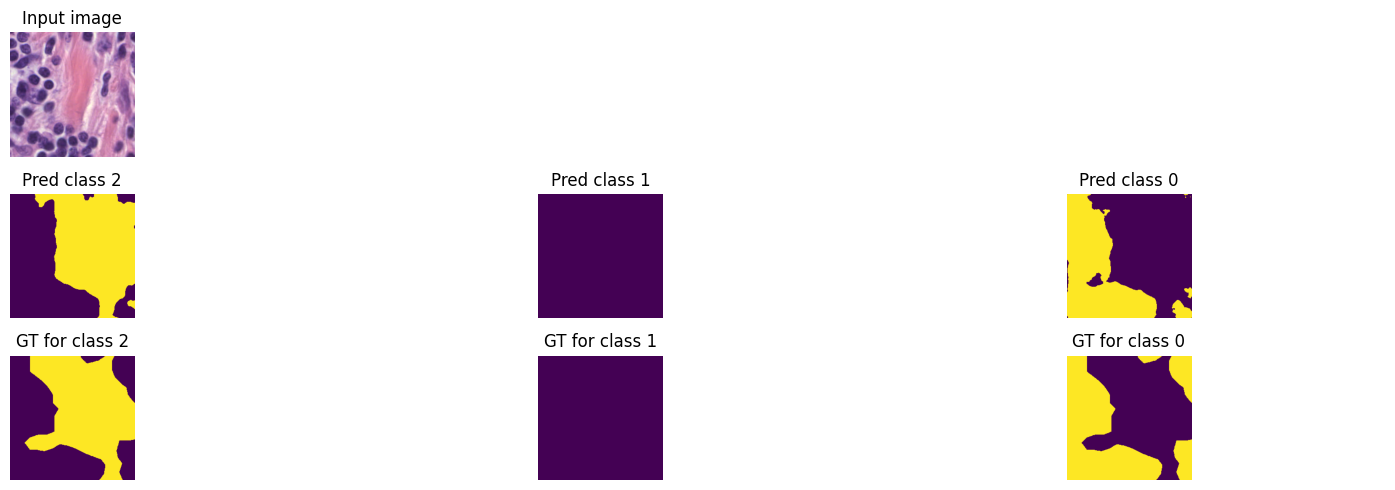

Train loss: 0.23229 | Time: 112m 53s | Val loss: 0.28322
Train_DICE_avg: 0.66510 | Train_Jaccard_avg: 0.61402 | Train_Sensitivity_avg: 0.86175 | Train_Specificity_avg: 0.82869 
Class 0 - Train_DICE: 0.66112 | Train_Jaccard: 0.61787 | Train_Sensitivity: 0.86120 | Train_Specificity: 0.86178 
Class 1 - Train_DICE: 0.76304 | Train_Jaccard: 0.71386 | Train_Sensitivity: 0.88901 | Train_Specificity: 0.81765 
Class 2 - Train_DICE: 0.57113 | Train_Jaccard: 0.51033 | Train_Sensitivity: 0.83503 | Train_Specificity: 0.80664 
Val_DICE_avg: 0.61574 | Val_Jaccard_avg: 0.56318 | Val_Sensitivity_avg: 0.84942 | Val_Specificity_avg: 0.76245 
Class 0 - Val_DICE: 0.62405 | Val_Jaccard: 0.58062 | Val_Sensitivity: 0.82533 | Val_Specificity: 0.82884 
Class 1 - Val_DICE: 0.74629 | Val_Jaccard: 0.69384 | Val_Sensitivity: 0.87110 | Val_Specificity: 0.71561 
Class 2 - Val_DICE: 0.47687 | Val_Jaccard: 0.41507 | Val_Sensitivity: 0.85183 | Val_Specificity: 0.74292 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.23126 | Time: 115m 7s | Val loss: 0.28492
Train_DICE_avg: 0.66683 | Train_Jaccard_avg: 0.61591 | Train_Sensitivity_avg: 0.86310 | Train_Specificity_avg: 0.83095 
Class 0 - Train_DICE: 0.66179 | Train_Jaccard: 0.61807 | Train_Sensitivity: 0.86241 | Train_Specificity: 0.86086 
Class 1 - Train_DICE: 0.76384 | Train_Jaccard: 0.71545 | Train_Sensitivity: 0.89060 | Train_Specificity: 0.82242 
Class 2 - Train_DICE: 0.57486 | Train_Jaccard: 0.51422 | Train_Sensitivity: 0.83629 | Train_Specificity: 0.80958 
Val_DICE_avg: 0.61455 | Val_Jaccard_avg: 0.56232 | Val_Sensitivity_avg: 0.85074 | Val_Specificity_avg: 0.76210 
Class 0 - Val_DICE: 0.61581 | Val_Jaccard: 0.57311 | Val_Sensitivity: 0.82702 | Val_Specificity: 0.82712 
Class 1 - Val_DICE: 0.74619 | Val_Jaccard: 0.69326 | Val_Sensitivity: 0.86918 | Val_Specificity: 0.71520 
Class 2 - Val_DICE: 0.48164 | Val_Jaccard: 0.42059 | Val_Sensitivity: 0.85602 | Val_Specificity: 0.74398 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.22929 | Time: 117m 21s | Val loss: 0.28302
Train_DICE_avg: 0.66925 | Train_Jaccard_avg: 0.61828 | Train_Sensitivity_avg: 0.86518 | Train_Specificity_avg: 0.83113 
Class 0 - Train_DICE: 0.66364 | Train_Jaccard: 0.62000 | Train_Sensitivity: 0.86558 | Train_Specificity: 0.86087 
Class 1 - Train_DICE: 0.76618 | Train_Jaccard: 0.71798 | Train_Sensitivity: 0.89257 | Train_Specificity: 0.82178 
Class 2 - Train_DICE: 0.57791 | Train_Jaccard: 0.51687 | Train_Sensitivity: 0.83740 | Train_Specificity: 0.81072 
Val_DICE_avg: 0.61308 | Val_Jaccard_avg: 0.56022 | Val_Sensitivity_avg: 0.84933 | Val_Specificity_avg: 0.76280 
Class 0 - Val_DICE: 0.61107 | Val_Jaccard: 0.56756 | Val_Sensitivity: 0.80336 | Val_Specificity: 0.83301 
Class 1 - Val_DICE: 0.74699 | Val_Jaccard: 0.69349 | Val_Sensitivity: 0.88562 | Val_Specificity: 0.71118 
Class 2 - Val_DICE: 0.48117 | Val_Jaccard: 0.41961 | Val_Sensitivity: 0.85902 | Val_Specificity: 0.74422 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.22731 | Time: 119m 35s | Val loss: 0.28437
Train_DICE_avg: 0.66971 | Train_Jaccard_avg: 0.61892 | Train_Sensitivity_avg: 0.86562 | Train_Specificity_avg: 0.83233 
Class 0 - Train_DICE: 0.66641 | Train_Jaccard: 0.62307 | Train_Sensitivity: 0.86791 | Train_Specificity: 0.86164 
Class 1 - Train_DICE: 0.76635 | Train_Jaccard: 0.71757 | Train_Sensitivity: 0.89074 | Train_Specificity: 0.82287 
Class 2 - Train_DICE: 0.57638 | Train_Jaccard: 0.51612 | Train_Sensitivity: 0.83820 | Train_Specificity: 0.81248 
Val_DICE_avg: 0.61454 | Val_Jaccard_avg: 0.56241 | Val_Sensitivity_avg: 0.85052 | Val_Specificity_avg: 0.76213 
Class 0 - Val_DICE: 0.60616 | Val_Jaccard: 0.56404 | Val_Sensitivity: 0.80774 | Val_Specificity: 0.83089 
Class 1 - Val_DICE: 0.74750 | Val_Jaccard: 0.69446 | Val_Sensitivity: 0.88329 | Val_Specificity: 0.70919 
Class 2 - Val_DICE: 0.48997 | Val_Jaccard: 0.42873 | Val_Sensitivity: 0.86053 | Val_Specificity: 0.74632 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.22556 | Time: 121m 49s | Val loss: 0.27777
Train_DICE_avg: 0.67068 | Train_Jaccard_avg: 0.62011 | Train_Sensitivity_avg: 0.86656 | Train_Specificity_avg: 0.83286 
Class 0 - Train_DICE: 0.66464 | Train_Jaccard: 0.62147 | Train_Sensitivity: 0.86680 | Train_Specificity: 0.86318 
Class 1 - Train_DICE: 0.77024 | Train_Jaccard: 0.72200 | Train_Sensitivity: 0.89619 | Train_Specificity: 0.82353 
Class 2 - Train_DICE: 0.57717 | Train_Jaccard: 0.51685 | Train_Sensitivity: 0.83668 | Train_Specificity: 0.81186 
Val_DICE_avg: 0.61776 | Val_Jaccard_avg: 0.56548 | Val_Sensitivity_avg: 0.84532 | Val_Specificity_avg: 0.76607 
Class 0 - Val_DICE: 0.61284 | Val_Jaccard: 0.57091 | Val_Sensitivity: 0.82183 | Val_Specificity: 0.82861 
Class 1 - Val_DICE: 0.74564 | Val_Jaccard: 0.69277 | Val_Sensitivity: 0.87859 | Val_Specificity: 0.71560 
Class 2 - Val_DICE: 0.49478 | Val_Jaccard: 0.43276 | Val_Sensitivity: 0.83552 | Val_Specificity: 0.75400 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


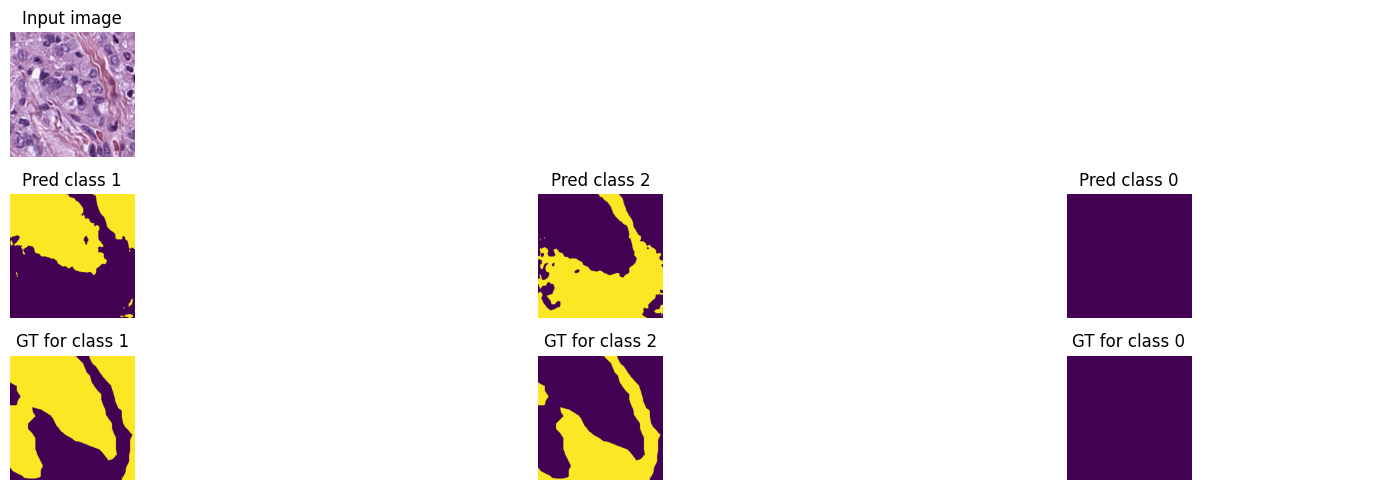

Train loss: 0.22488 | Time: 124m 3s | Val loss: 0.28111
Train_DICE_avg: 0.67343 | Train_Jaccard_avg: 0.62266 | Train_Sensitivity_avg: 0.86758 | Train_Specificity_avg: 0.83345 
Class 0 - Train_DICE: 0.67110 | Train_Jaccard: 0.62732 | Train_Sensitivity: 0.87149 | Train_Specificity: 0.86399 
Class 1 - Train_DICE: 0.76672 | Train_Jaccard: 0.71857 | Train_Sensitivity: 0.89370 | Train_Specificity: 0.82390 
Class 2 - Train_DICE: 0.58247 | Train_Jaccard: 0.52209 | Train_Sensitivity: 0.83755 | Train_Specificity: 0.81246 
Val_DICE_avg: 0.61763 | Val_Jaccard_avg: 0.56554 | Val_Sensitivity_avg: 0.84913 | Val_Specificity_avg: 0.76673 
Class 0 - Val_DICE: 0.61293 | Val_Jaccard: 0.57030 | Val_Sensitivity: 0.81412 | Val_Specificity: 0.83056 
Class 1 - Val_DICE: 0.75301 | Val_Jaccard: 0.70081 | Val_Sensitivity: 0.87922 | Val_Specificity: 0.72400 
Class 2 - Val_DICE: 0.48694 | Val_Jaccard: 0.42550 | Val_Sensitivity: 0.85404 | Val_Specificity: 0.74562 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.22335 | Time: 126m 17s | Val loss: 0.28103
Train_DICE_avg: 0.67341 | Train_Jaccard_avg: 0.62265 | Train_Sensitivity_avg: 0.86522 | Train_Specificity_avg: 0.83411 
Class 0 - Train_DICE: 0.66905 | Train_Jaccard: 0.62551 | Train_Sensitivity: 0.86585 | Train_Specificity: 0.86456 
Class 1 - Train_DICE: 0.77225 | Train_Jaccard: 0.72382 | Train_Sensitivity: 0.89408 | Train_Specificity: 0.82450 
Class 2 - Train_DICE: 0.57895 | Train_Jaccard: 0.51861 | Train_Sensitivity: 0.83573 | Train_Specificity: 0.81326 
Val_DICE_avg: 0.61810 | Val_Jaccard_avg: 0.56628 | Val_Sensitivity_avg: 0.84535 | Val_Specificity_avg: 0.76577 
Class 0 - Val_DICE: 0.61468 | Val_Jaccard: 0.57257 | Val_Sensitivity: 0.81062 | Val_Specificity: 0.83270 
Class 1 - Val_DICE: 0.74946 | Val_Jaccard: 0.69711 | Val_Sensitivity: 0.88004 | Val_Specificity: 0.71390 
Class 2 - Val_DICE: 0.49016 | Val_Jaccard: 0.42915 | Val_Sensitivity: 0.84540 | Val_Specificity: 0.75072 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.22203 | Time: 128m 32s | Val loss: 0.27835
Train_DICE_avg: 0.67612 | Train_Jaccard_avg: 0.62537 | Train_Sensitivity_avg: 0.86916 | Train_Specificity_avg: 0.83559 
Class 0 - Train_DICE: 0.67218 | Train_Jaccard: 0.62868 | Train_Sensitivity: 0.87091 | Train_Specificity: 0.86621 
Class 1 - Train_DICE: 0.77079 | Train_Jaccard: 0.72281 | Train_Sensitivity: 0.89513 | Train_Specificity: 0.82628 
Class 2 - Train_DICE: 0.58538 | Train_Jaccard: 0.52462 | Train_Sensitivity: 0.84144 | Train_Specificity: 0.81428 
Val_DICE_avg: 0.62409 | Val_Jaccard_avg: 0.57205 | Val_Sensitivity_avg: 0.84561 | Val_Specificity_avg: 0.76892 
Class 0 - Val_DICE: 0.61917 | Val_Jaccard: 0.57728 | Val_Sensitivity: 0.82073 | Val_Specificity: 0.83237 
Class 1 - Val_DICE: 0.75230 | Val_Jaccard: 0.70002 | Val_Sensitivity: 0.88438 | Val_Specificity: 0.71755 
Class 2 - Val_DICE: 0.50080 | Val_Jaccard: 0.43886 | Val_Sensitivity: 0.83171 | Val_Specificity: 0.75683 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.22062 | Time: 130m 45s | Val loss: 0.28303
Train_DICE_avg: 0.67801 | Train_Jaccard_avg: 0.62720 | Train_Sensitivity_avg: 0.86928 | Train_Specificity_avg: 0.83567 
Class 0 - Train_DICE: 0.67432 | Train_Jaccard: 0.63096 | Train_Sensitivity: 0.86969 | Train_Specificity: 0.86639 
Class 1 - Train_DICE: 0.77241 | Train_Jaccard: 0.72439 | Train_Sensitivity: 0.89508 | Train_Specificity: 0.82627 
Class 2 - Train_DICE: 0.58731 | Train_Jaccard: 0.52627 | Train_Sensitivity: 0.84308 | Train_Specificity: 0.81435 
Val_DICE_avg: 0.61819 | Val_Jaccard_avg: 0.56590 | Val_Sensitivity_avg: 0.84362 | Val_Specificity_avg: 0.76483 
Class 0 - Val_DICE: 0.61213 | Val_Jaccard: 0.57024 | Val_Sensitivity: 0.81278 | Val_Specificity: 0.83313 
Class 1 - Val_DICE: 0.74901 | Val_Jaccard: 0.69643 | Val_Sensitivity: 0.88611 | Val_Specificity: 0.70853 
Class 2 - Val_DICE: 0.49344 | Val_Jaccard: 0.43104 | Val_Sensitivity: 0.83198 | Val_Specificity: 0.75283 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.22016 | Time: 132m 59s | Val loss: 0.28191
Train_DICE_avg: 0.67412 | Train_Jaccard_avg: 0.62332 | Train_Sensitivity_avg: 0.86662 | Train_Specificity_avg: 0.83426 
Class 0 - Train_DICE: 0.66994 | Train_Jaccard: 0.62596 | Train_Sensitivity: 0.86769 | Train_Specificity: 0.86747 
Class 1 - Train_DICE: 0.76946 | Train_Jaccard: 0.72125 | Train_Sensitivity: 0.89282 | Train_Specificity: 0.82108 
Class 2 - Train_DICE: 0.58296 | Train_Jaccard: 0.52273 | Train_Sensitivity: 0.83934 | Train_Specificity: 0.81423 
Val_DICE_avg: 0.61510 | Val_Jaccard_avg: 0.56225 | Val_Sensitivity_avg: 0.84724 | Val_Specificity_avg: 0.76260 
Class 0 - Val_DICE: 0.60948 | Val_Jaccard: 0.56677 | Val_Sensitivity: 0.80318 | Val_Specificity: 0.83333 
Class 1 - Val_DICE: 0.74372 | Val_Jaccard: 0.68995 | Val_Sensitivity: 0.88981 | Val_Specificity: 0.70368 
Class 2 - Val_DICE: 0.49211 | Val_Jaccard: 0.43004 | Val_Sensitivity: 0.84873 | Val_Specificity: 0.75078 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


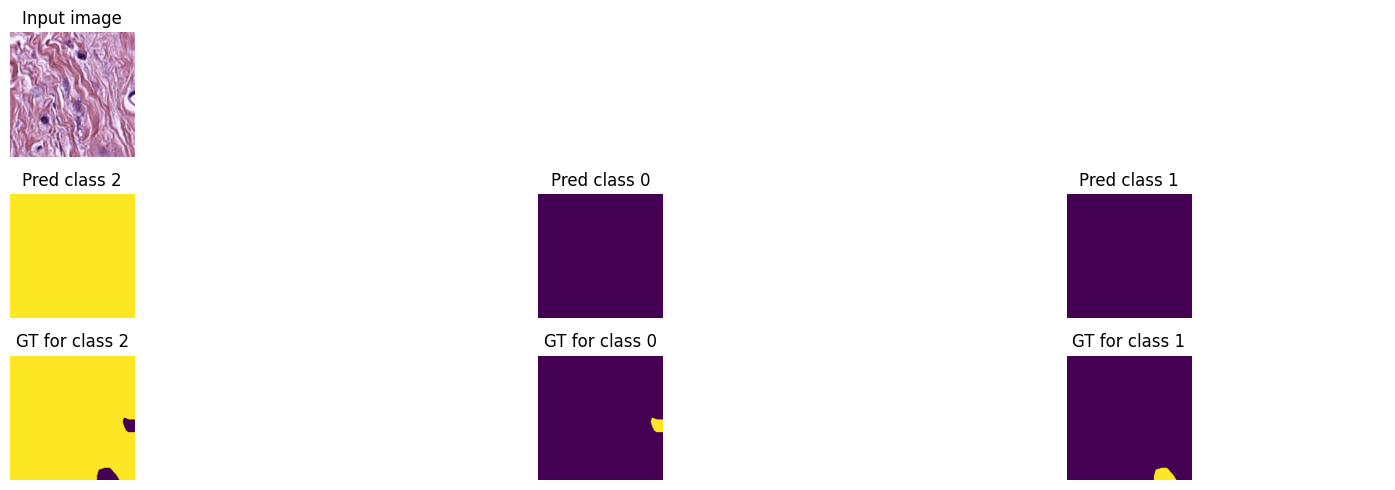

Train loss: 0.21960 | Time: 135m 13s | Val loss: 0.28746
Train_DICE_avg: 0.67497 | Train_Jaccard_avg: 0.62436 | Train_Sensitivity_avg: 0.86716 | Train_Specificity_avg: 0.83556 
Class 0 - Train_DICE: 0.67188 | Train_Jaccard: 0.62829 | Train_Sensitivity: 0.86843 | Train_Specificity: 0.86532 
Class 1 - Train_DICE: 0.77057 | Train_Jaccard: 0.72258 | Train_Sensitivity: 0.89503 | Train_Specificity: 0.82814 
Class 2 - Train_DICE: 0.58246 | Train_Jaccard: 0.52221 | Train_Sensitivity: 0.83802 | Train_Specificity: 0.81321 
Val_DICE_avg: 0.61764 | Val_Jaccard_avg: 0.56370 | Val_Sensitivity_avg: 0.84209 | Val_Specificity_avg: 0.76191 
Class 0 - Val_DICE: 0.61859 | Val_Jaccard: 0.57443 | Val_Sensitivity: 0.78429 | Val_Specificity: 0.84063 
Class 1 - Val_DICE: 0.74054 | Val_Jaccard: 0.68583 | Val_Sensitivity: 0.91116 | Val_Specificity: 0.69298 
Class 2 - Val_DICE: 0.49380 | Val_Jaccard: 0.43083 | Val_Sensitivity: 0.83083 | Val_Specificity: 0.75211 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Global Performance Metrics:
Loss mean: 0.28498, std: 0.05530
Dice Coefficient mean: 0.63207, std: 0.23314
Jaccard Index mean: 0.57631, std: 0.24835
Sensitivity mean: 0.72248, std: 0.21085
Specificity mean: 0.86536, std: 0.11149

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.61267, std: 0.40931
Jaccard mean: 0.56282, std: 0.41108
Sensitivity mean: 0.75492, std: 0.35955
Specificity mean: 0.87802, std: 0.23448

Class 1:
Dice mean: 0.74292, std: 0.35220
Jaccard mean: 0.69186, std: 0.36006
Sensitivity mean: 0.82130, std: 0.30202
Specificity mean: 0.83779, std: 0.28923

Class 2:
Dice mean: 0.54062, std: 0.39246
Jaccard mean: 0.47426, std: 0.38577
Sensitivity mean: 0.59122, std: 0.39648
Specificity mean: 0.88025, std: 0.21875


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-ResUNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.65 GB
GPU Memory - Reserved: 1.12 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


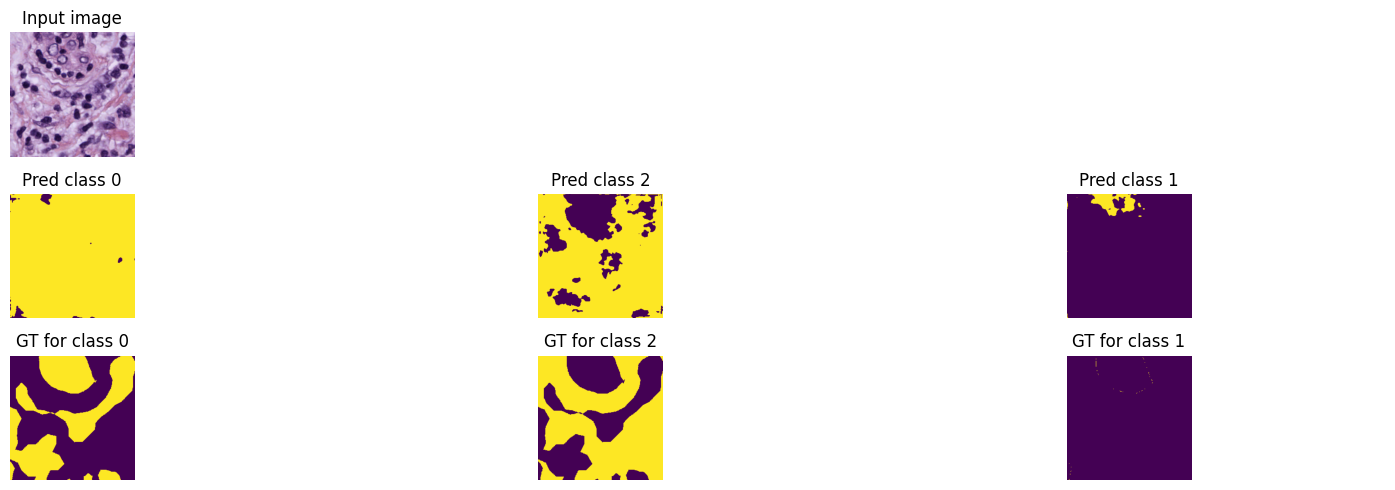

Train loss: 0.05763 | Time: 2m 10s | Val loss: 0.04572
Train_DICE_avg: 0.33133 | Train_Jaccard_avg: 0.27230 | Train_Sensitivity_avg: 0.59080 | Train_Specificity_avg: 0.71772 
Class 0 - Train_DICE: 0.29881 | Train_Jaccard: 0.25158 | Train_Sensitivity: 0.49440 | Train_Specificity: 0.79688 
Class 1 - Train_DICE: 0.39911 | Train_Jaccard: 0.33046 | Train_Sensitivity: 0.68848 | Train_Specificity: 0.64693 
Class 2 - Train_DICE: 0.29607 | Train_Jaccard: 0.23486 | Train_Sensitivity: 0.58952 | Train_Specificity: 0.70936 
Val_DICE_avg: 0.47154 | Val_Jaccard_avg: 0.40894 | Val_Sensitivity_avg: 0.69077 | Val_Specificity_avg: 0.72577 
Class 0 - Val_DICE: 0.39803 | Val_Jaccard: 0.34305 | Val_Sensitivity: 0.52084 | Val_Specificity: 0.81274 
Class 1 - Val_DICE: 0.61758 | Val_Jaccard: 0.54729 | Val_Sensitivity: 0.76426 | Val_Specificity: 0.65630 
Class 2 - Val_DICE: 0.39901 | Val_Jaccard: 0.33650 | Val_Sensitivity: 0.78722 | Val_Specificity: 0.70829 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.05157 | Time: 4m 20s | Val loss: 0.04342
Train_DICE_avg: 0.42074 | Train_Jaccard_avg: 0.35594 | Train_Sensitivity_avg: 0.64074 | Train_Specificity_avg: 0.73964 
Class 0 - Train_DICE: 0.38553 | Train_Jaccard: 0.33831 | Train_Sensitivity: 0.62322 | Train_Specificity: 0.80091 
Class 1 - Train_DICE: 0.50963 | Train_Jaccard: 0.43412 | Train_Sensitivity: 0.68354 | Train_Specificity: 0.68852 
Class 2 - Train_DICE: 0.36705 | Train_Jaccard: 0.29539 | Train_Sensitivity: 0.61546 | Train_Specificity: 0.72948 
Val_DICE_avg: 0.50758 | Val_Jaccard_avg: 0.45013 | Val_Sensitivity_avg: 0.71725 | Val_Specificity_avg: 0.73701 
Class 0 - Val_DICE: 0.43998 | Val_Jaccard: 0.39558 | Val_Sensitivity: 0.69180 | Val_Specificity: 0.79352 
Class 1 - Val_DICE: 0.64237 | Val_Jaccard: 0.58128 | Val_Sensitivity: 0.71764 | Val_Specificity: 0.69204 
Class 2 - Val_DICE: 0.44038 | Val_Jaccard: 0.37353 | Val_Sensitivity: 0.74231 | Val_Specificity: 0.72546 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.04971 | Time: 6m 29s | Val loss: 0.04260
Train_DICE_avg: 0.43263 | Train_Jaccard_avg: 0.36948 | Train_Sensitivity_avg: 0.65130 | Train_Specificity_avg: 0.74629 
Class 0 - Train_DICE: 0.40127 | Train_Jaccard: 0.35351 | Train_Sensitivity: 0.64201 | Train_Specificity: 0.80403 
Class 1 - Train_DICE: 0.53073 | Train_Jaccard: 0.45912 | Train_Sensitivity: 0.68523 | Train_Specificity: 0.70533 
Class 2 - Train_DICE: 0.36590 | Train_Jaccard: 0.29582 | Train_Sensitivity: 0.62666 | Train_Specificity: 0.72951 
Val_DICE_avg: 0.51714 | Val_Jaccard_avg: 0.46387 | Val_Sensitivity_avg: 0.74944 | Val_Specificity_avg: 0.74092 
Class 0 - Val_DICE: 0.51492 | Val_Jaccard: 0.46868 | Val_Sensitivity: 0.72781 | Val_Specificity: 0.80746 
Class 1 - Val_DICE: 0.63416 | Val_Jaccard: 0.57724 | Val_Sensitivity: 0.67352 | Val_Specificity: 0.71081 
Class 2 - Val_DICE: 0.40234 | Val_Jaccard: 0.34571 | Val_Sensitivity: 0.84700 | Val_Specificity: 0.70450 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04872 | Time: 8m 39s | Val loss: 0.04121
Train_DICE_avg: 0.44473 | Train_Jaccard_avg: 0.38195 | Train_Sensitivity_avg: 0.65935 | Train_Specificity_avg: 0.75130 
Class 0 - Train_DICE: 0.41631 | Train_Jaccard: 0.36909 | Train_Sensitivity: 0.65687 | Train_Specificity: 0.80621 
Class 1 - Train_DICE: 0.54633 | Train_Jaccard: 0.47546 | Train_Sensitivity: 0.69241 | Train_Specificity: 0.71319 
Class 2 - Train_DICE: 0.37155 | Train_Jaccard: 0.30131 | Train_Sensitivity: 0.62877 | Train_Specificity: 0.73450 
Val_DICE_avg: 0.54005 | Val_Jaccard_avg: 0.48540 | Val_Sensitivity_avg: 0.75028 | Val_Specificity_avg: 0.74629 
Class 0 - Val_DICE: 0.52125 | Val_Jaccard: 0.47703 | Val_Sensitivity: 0.75799 | Val_Specificity: 0.80422 
Class 1 - Val_DICE: 0.64956 | Val_Jaccard: 0.59305 | Val_Sensitivity: 0.70558 | Val_Specificity: 0.70896 
Class 2 - Val_DICE: 0.44934 | Val_Jaccard: 0.38613 | Val_Sensitivity: 0.78726 | Val_Specificity: 0.72567 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04790 | Time: 10m 48s | Val loss: 0.04193
Train_DICE_avg: 0.45478 | Train_Jaccard_avg: 0.39296 | Train_Sensitivity_avg: 0.66634 | Train_Specificity_avg: 0.75512 
Class 0 - Train_DICE: 0.42765 | Train_Jaccard: 0.38113 | Train_Sensitivity: 0.66890 | Train_Specificity: 0.80679 
Class 1 - Train_DICE: 0.55934 | Train_Jaccard: 0.48967 | Train_Sensitivity: 0.69688 | Train_Specificity: 0.72201 
Class 2 - Train_DICE: 0.37736 | Train_Jaccard: 0.30809 | Train_Sensitivity: 0.63324 | Train_Specificity: 0.73657 
Val_DICE_avg: 0.52554 | Val_Jaccard_avg: 0.47186 | Val_Sensitivity_avg: 0.73946 | Val_Specificity_avg: 0.74742 
Class 0 - Val_DICE: 0.49044 | Val_Jaccard: 0.44528 | Val_Sensitivity: 0.74101 | Val_Specificity: 0.79954 
Class 1 - Val_DICE: 0.64177 | Val_Jaccard: 0.58720 | Val_Sensitivity: 0.67089 | Val_Specificity: 0.71970 
Class 2 - Val_DICE: 0.44441 | Val_Jaccard: 0.38311 | Val_Sensitivity: 0.80649 | Val_Specificity: 0.72304 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


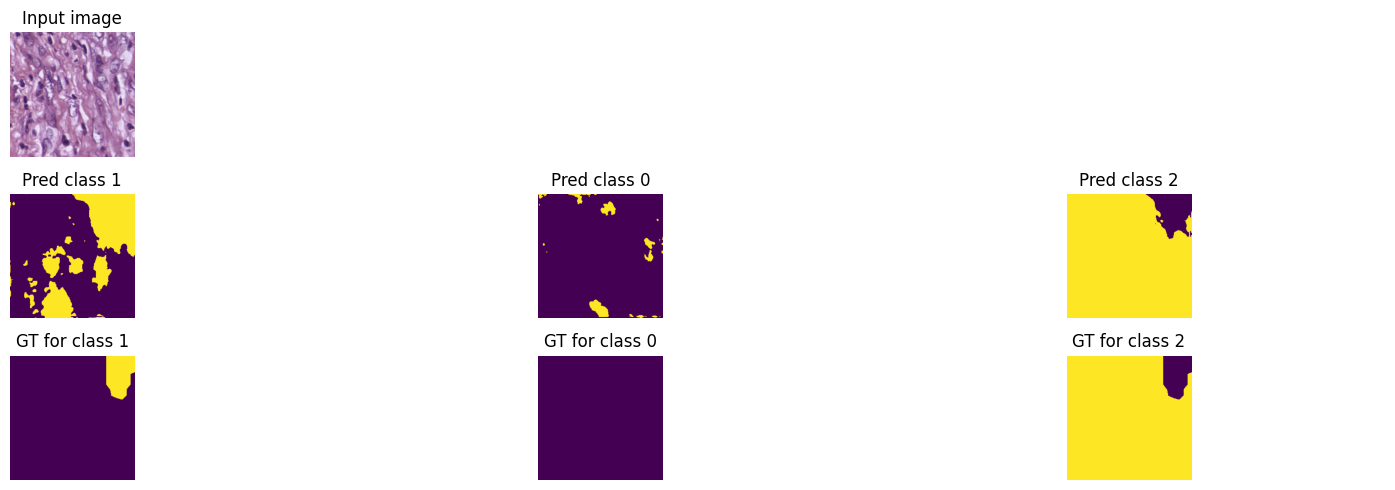

Train loss: 0.04723 | Time: 12m 58s | Val loss: 0.04135
Train_DICE_avg: 0.46126 | Train_Jaccard_avg: 0.39960 | Train_Sensitivity_avg: 0.66910 | Train_Specificity_avg: 0.75789 
Class 0 - Train_DICE: 0.43665 | Train_Jaccard: 0.39069 | Train_Sensitivity: 0.67877 | Train_Specificity: 0.80967 
Class 1 - Train_DICE: 0.56553 | Train_Jaccard: 0.49672 | Train_Sensitivity: 0.70092 | Train_Specificity: 0.72461 
Class 2 - Train_DICE: 0.38160 | Train_Jaccard: 0.31140 | Train_Sensitivity: 0.62760 | Train_Specificity: 0.73939 
Val_DICE_avg: 0.53550 | Val_Jaccard_avg: 0.48319 | Val_Sensitivity_avg: 0.75826 | Val_Specificity_avg: 0.74744 
Class 0 - Val_DICE: 0.49011 | Val_Jaccard: 0.45090 | Val_Sensitivity: 0.80715 | Val_Specificity: 0.78998 
Class 1 - Val_DICE: 0.65572 | Val_Jaccard: 0.60042 | Val_Sensitivity: 0.69309 | Val_Specificity: 0.71853 
Class 2 - Val_DICE: 0.46067 | Val_Jaccard: 0.39825 | Val_Sensitivity: 0.77453 | Val_Specificity: 0.73380 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04671 | Time: 15m 8s | Val loss: 0.04060
Train_DICE_avg: 0.46757 | Train_Jaccard_avg: 0.40607 | Train_Sensitivity_avg: 0.67281 | Train_Specificity_avg: 0.76042 
Class 0 - Train_DICE: 0.44350 | Train_Jaccard: 0.39662 | Train_Sensitivity: 0.67913 | Train_Specificity: 0.81120 
Class 1 - Train_DICE: 0.57040 | Train_Jaccard: 0.50224 | Train_Sensitivity: 0.70181 | Train_Specificity: 0.72805 
Class 2 - Train_DICE: 0.38882 | Train_Jaccard: 0.31936 | Train_Sensitivity: 0.63750 | Train_Specificity: 0.74202 
Val_DICE_avg: 0.53112 | Val_Jaccard_avg: 0.47743 | Val_Sensitivity_avg: 0.74977 | Val_Specificity_avg: 0.74859 
Class 0 - Val_DICE: 0.49872 | Val_Jaccard: 0.45368 | Val_Sensitivity: 0.74024 | Val_Specificity: 0.80144 
Class 1 - Val_DICE: 0.65474 | Val_Jaccard: 0.59958 | Val_Sensitivity: 0.69426 | Val_Specificity: 0.72139 
Class 2 - Val_DICE: 0.43990 | Val_Jaccard: 0.37903 | Val_Sensitivity: 0.81482 | Val_Specificity: 0.72295 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04618 | Time: 17m 17s | Val loss: 0.03953
Train_DICE_avg: 0.46985 | Train_Jaccard_avg: 0.40835 | Train_Sensitivity_avg: 0.67318 | Train_Specificity_avg: 0.76068 
Class 0 - Train_DICE: 0.44489 | Train_Jaccard: 0.39809 | Train_Sensitivity: 0.68375 | Train_Specificity: 0.81066 
Class 1 - Train_DICE: 0.57365 | Train_Jaccard: 0.50571 | Train_Sensitivity: 0.70215 | Train_Specificity: 0.72854 
Class 2 - Train_DICE: 0.39100 | Train_Jaccard: 0.32126 | Train_Sensitivity: 0.63363 | Train_Specificity: 0.74286 
Val_DICE_avg: 0.54332 | Val_Jaccard_avg: 0.48825 | Val_Sensitivity_avg: 0.74974 | Val_Specificity_avg: 0.75205 
Class 0 - Val_DICE: 0.50749 | Val_Jaccard: 0.46089 | Val_Sensitivity: 0.74480 | Val_Specificity: 0.80200 
Class 1 - Val_DICE: 0.66480 | Val_Jaccard: 0.61000 | Val_Sensitivity: 0.70775 | Val_Specificity: 0.72526 
Class 2 - Val_DICE: 0.45766 | Val_Jaccard: 0.39384 | Val_Sensitivity: 0.79666 | Val_Specificity: 0.72889 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.04573 | Time: 19m 27s | Val loss: 0.03920
Train_DICE_avg: 0.47746 | Train_Jaccard_avg: 0.41681 | Train_Sensitivity_avg: 0.68112 | Train_Specificity_avg: 0.76321 
Class 0 - Train_DICE: 0.44991 | Train_Jaccard: 0.40345 | Train_Sensitivity: 0.68930 | Train_Specificity: 0.81096 
Class 1 - Train_DICE: 0.58369 | Train_Jaccard: 0.51693 | Train_Sensitivity: 0.71029 | Train_Specificity: 0.73379 
Class 2 - Train_DICE: 0.39878 | Train_Jaccard: 0.33005 | Train_Sensitivity: 0.64375 | Train_Specificity: 0.74487 
Val_DICE_avg: 0.54729 | Val_Jaccard_avg: 0.49290 | Val_Sensitivity_avg: 0.75382 | Val_Specificity_avg: 0.75403 
Class 0 - Val_DICE: 0.51262 | Val_Jaccard: 0.46723 | Val_Sensitivity: 0.76178 | Val_Specificity: 0.80096 
Class 1 - Val_DICE: 0.66018 | Val_Jaccard: 0.60512 | Val_Sensitivity: 0.70906 | Val_Specificity: 0.72346 
Class 2 - Val_DICE: 0.46907 | Val_Jaccard: 0.40635 | Val_Sensitivity: 0.79063 | Val_Specificity: 0.73766 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04528 | Time: 21m 36s | Val loss: 0.03779
Train_DICE_avg: 0.48007 | Train_Jaccard_avg: 0.41897 | Train_Sensitivity_avg: 0.67806 | Train_Specificity_avg: 0.76440 
Class 0 - Train_DICE: 0.44905 | Train_Jaccard: 0.40213 | Train_Sensitivity: 0.68058 | Train_Specificity: 0.81381 
Class 1 - Train_DICE: 0.58841 | Train_Jaccard: 0.52141 | Train_Sensitivity: 0.71510 | Train_Specificity: 0.73172 
Class 2 - Train_DICE: 0.40276 | Train_Jaccard: 0.33337 | Train_Sensitivity: 0.63849 | Train_Specificity: 0.74767 
Val_DICE_avg: 0.55981 | Val_Jaccard_avg: 0.50460 | Val_Sensitivity_avg: 0.75502 | Val_Specificity_avg: 0.75688 
Class 0 - Val_DICE: 0.53820 | Val_Jaccard: 0.49087 | Val_Sensitivity: 0.73129 | Val_Specificity: 0.81509 
Class 1 - Val_DICE: 0.67762 | Val_Jaccard: 0.62232 | Val_Sensitivity: 0.72767 | Val_Specificity: 0.72302 
Class 2 - Val_DICE: 0.46361 | Val_Jaccard: 0.40062 | Val_Sensitivity: 0.80609 | Val_Specificity: 0.73251 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


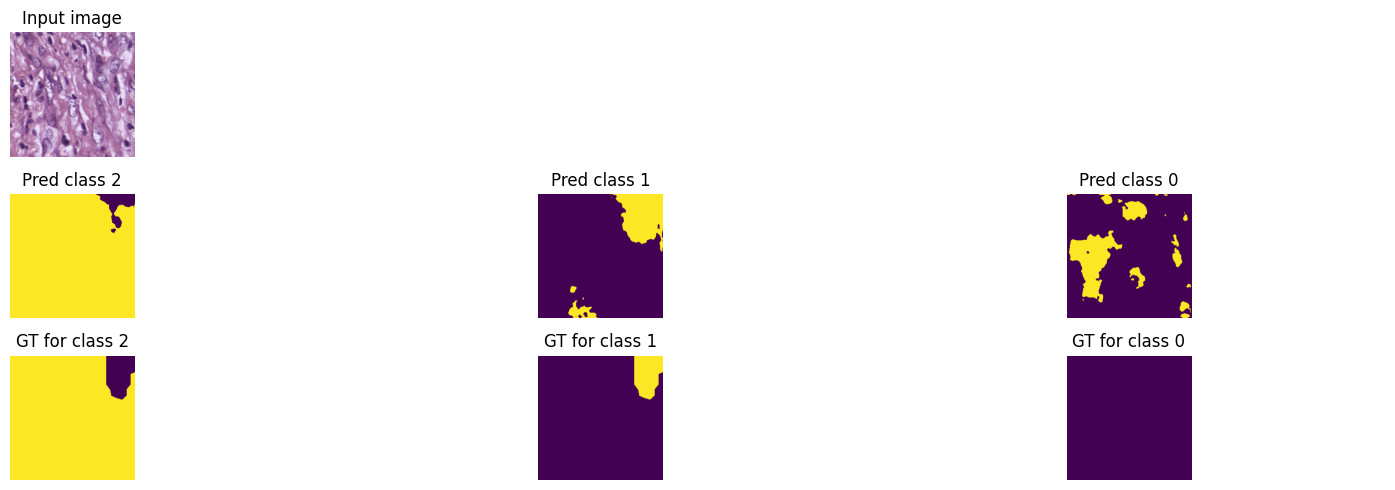

Train loss: 0.04458 | Time: 23m 49s | Val loss: 0.03655
Train_DICE_avg: 0.48553 | Train_Jaccard_avg: 0.42508 | Train_Sensitivity_avg: 0.67868 | Train_Specificity_avg: 0.76819 
Class 0 - Train_DICE: 0.45533 | Train_Jaccard: 0.40832 | Train_Sensitivity: 0.68249 | Train_Specificity: 0.81381 
Class 1 - Train_DICE: 0.59528 | Train_Jaccard: 0.52941 | Train_Sensitivity: 0.71418 | Train_Specificity: 0.74086 
Class 2 - Train_DICE: 0.40598 | Train_Jaccard: 0.33752 | Train_Sensitivity: 0.63936 | Train_Specificity: 0.74990 
Val_DICE_avg: 0.55888 | Val_Jaccard_avg: 0.50187 | Val_Sensitivity_avg: 0.73474 | Val_Specificity_avg: 0.76044 
Class 0 - Val_DICE: 0.53215 | Val_Jaccard: 0.48256 | Val_Sensitivity: 0.69140 | Val_Specificity: 0.82417 
Class 1 - Val_DICE: 0.67510 | Val_Jaccard: 0.61899 | Val_Sensitivity: 0.74266 | Val_Specificity: 0.71741 
Class 2 - Val_DICE: 0.46940 | Val_Jaccard: 0.40406 | Val_Sensitivity: 0.77015 | Val_Specificity: 0.73974 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04404 | Time: 26m 2s | Val loss: 0.03766
Train_DICE_avg: 0.49356 | Train_Jaccard_avg: 0.43344 | Train_Sensitivity_avg: 0.68572 | Train_Specificity_avg: 0.76976 
Class 0 - Train_DICE: 0.46851 | Train_Jaccard: 0.42108 | Train_Sensitivity: 0.69241 | Train_Specificity: 0.81587 
Class 1 - Train_DICE: 0.60195 | Train_Jaccard: 0.53729 | Train_Sensitivity: 0.71830 | Train_Specificity: 0.74244 
Class 2 - Train_DICE: 0.41021 | Train_Jaccard: 0.34195 | Train_Sensitivity: 0.64643 | Train_Specificity: 0.75099 
Val_DICE_avg: 0.55097 | Val_Jaccard_avg: 0.49568 | Val_Sensitivity_avg: 0.74221 | Val_Specificity_avg: 0.76095 
Class 0 - Val_DICE: 0.52914 | Val_Jaccard: 0.48177 | Val_Sensitivity: 0.73145 | Val_Specificity: 0.81348 
Class 1 - Val_DICE: 0.66639 | Val_Jaccard: 0.61124 | Val_Sensitivity: 0.70829 | Val_Specificity: 0.73412 
Class 2 - Val_DICE: 0.45739 | Val_Jaccard: 0.39403 | Val_Sensitivity: 0.78689 | Val_Specificity: 0.73525 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04377 | Time: 28m 15s | Val loss: 0.03763
Train_DICE_avg: 0.49633 | Train_Jaccard_avg: 0.43610 | Train_Sensitivity_avg: 0.68628 | Train_Specificity_avg: 0.77193 
Class 0 - Train_DICE: 0.46868 | Train_Jaccard: 0.42131 | Train_Sensitivity: 0.69144 | Train_Specificity: 0.81747 
Class 1 - Train_DICE: 0.60855 | Train_Jaccard: 0.54379 | Train_Sensitivity: 0.72476 | Train_Specificity: 0.74480 
Class 2 - Train_DICE: 0.41178 | Train_Jaccard: 0.34320 | Train_Sensitivity: 0.64264 | Train_Specificity: 0.75354 
Val_DICE_avg: 0.55891 | Val_Jaccard_avg: 0.50363 | Val_Sensitivity_avg: 0.75321 | Val_Specificity_avg: 0.75924 
Class 0 - Val_DICE: 0.55775 | Val_Jaccard: 0.50992 | Val_Sensitivity: 0.73006 | Val_Specificity: 0.82107 
Class 1 - Val_DICE: 0.66628 | Val_Jaccard: 0.61122 | Val_Sensitivity: 0.71986 | Val_Specificity: 0.72789 
Class 2 - Val_DICE: 0.45269 | Val_Jaccard: 0.38976 | Val_Sensitivity: 0.80970 | Val_Specificity: 0.72876 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04306 | Time: 30m 28s | Val loss: 0.03701
Train_DICE_avg: 0.50198 | Train_Jaccard_avg: 0.44168 | Train_Sensitivity_avg: 0.68750 | Train_Specificity_avg: 0.77454 
Class 0 - Train_DICE: 0.47054 | Train_Jaccard: 0.42256 | Train_Sensitivity: 0.68783 | Train_Specificity: 0.81990 
Class 1 - Train_DICE: 0.61268 | Train_Jaccard: 0.54841 | Train_Sensitivity: 0.72825 | Train_Specificity: 0.74589 
Class 2 - Train_DICE: 0.42273 | Train_Jaccard: 0.35407 | Train_Sensitivity: 0.64643 | Train_Specificity: 0.75784 
Val_DICE_avg: 0.56550 | Val_Jaccard_avg: 0.51021 | Val_Sensitivity_avg: 0.74518 | Val_Specificity_avg: 0.76215 
Class 0 - Val_DICE: 0.55248 | Val_Jaccard: 0.50511 | Val_Sensitivity: 0.74330 | Val_Specificity: 0.81699 
Class 1 - Val_DICE: 0.66836 | Val_Jaccard: 0.61365 | Val_Sensitivity: 0.72260 | Val_Specificity: 0.72590 
Class 2 - Val_DICE: 0.47567 | Val_Jaccard: 0.41186 | Val_Sensitivity: 0.76963 | Val_Specificity: 0.74357 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.04248 | Time: 32m 41s | Val loss: 0.03621
Train_DICE_avg: 0.51056 | Train_Jaccard_avg: 0.45081 | Train_Sensitivity_avg: 0.69468 | Train_Specificity_avg: 0.77633 
Class 0 - Train_DICE: 0.47809 | Train_Jaccard: 0.43031 | Train_Sensitivity: 0.69218 | Train_Specificity: 0.82152 
Class 1 - Train_DICE: 0.62498 | Train_Jaccard: 0.56144 | Train_Sensitivity: 0.73699 | Train_Specificity: 0.74887 
Class 2 - Train_DICE: 0.42862 | Train_Jaccard: 0.36069 | Train_Sensitivity: 0.65489 | Train_Specificity: 0.75858 
Val_DICE_avg: 0.56817 | Val_Jaccard_avg: 0.51088 | Val_Sensitivity_avg: 0.72936 | Val_Specificity_avg: 0.76329 
Class 0 - Val_DICE: 0.54995 | Val_Jaccard: 0.50127 | Val_Sensitivity: 0.71642 | Val_Specificity: 0.82232 
Class 1 - Val_DICE: 0.66767 | Val_Jaccard: 0.61233 | Val_Sensitivity: 0.74520 | Val_Specificity: 0.71867 
Class 2 - Val_DICE: 0.48687 | Val_Jaccard: 0.41903 | Val_Sensitivity: 0.72646 | Val_Specificity: 0.74887 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


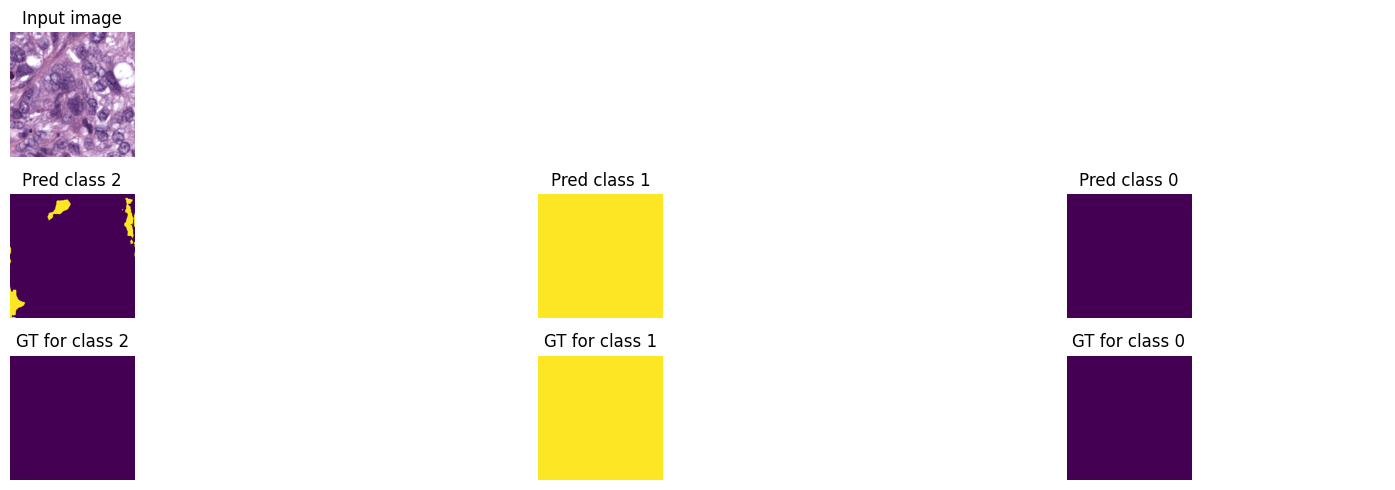

Train loss: 0.04166 | Time: 34m 55s | Val loss: 0.03513
Train_DICE_avg: 0.52178 | Train_Jaccard_avg: 0.46213 | Train_Sensitivity_avg: 0.70018 | Train_Specificity_avg: 0.77953 
Class 0 - Train_DICE: 0.48735 | Train_Jaccard: 0.43956 | Train_Sensitivity: 0.69577 | Train_Specificity: 0.82289 
Class 1 - Train_DICE: 0.63856 | Train_Jaccard: 0.57600 | Train_Sensitivity: 0.74936 | Train_Specificity: 0.75100 
Class 2 - Train_DICE: 0.43943 | Train_Jaccard: 0.37084 | Train_Sensitivity: 0.65539 | Train_Specificity: 0.76468 
Val_DICE_avg: 0.57637 | Val_Jaccard_avg: 0.51830 | Val_Sensitivity_avg: 0.72935 | Val_Specificity_avg: 0.76714 
Class 0 - Val_DICE: 0.55396 | Val_Jaccard: 0.50387 | Val_Sensitivity: 0.69146 | Val_Specificity: 0.83275 
Class 1 - Val_DICE: 0.68731 | Val_Jaccard: 0.63087 | Val_Sensitivity: 0.77902 | Val_Specificity: 0.71029 
Class 2 - Val_DICE: 0.48785 | Val_Jaccard: 0.42017 | Val_Sensitivity: 0.71758 | Val_Specificity: 0.75837 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04135 | Time: 37m 8s | Val loss: 0.03525
Train_DICE_avg: 0.52175 | Train_Jaccard_avg: 0.46206 | Train_Sensitivity_avg: 0.69977 | Train_Specificity_avg: 0.78078 
Class 0 - Train_DICE: 0.48650 | Train_Jaccard: 0.43834 | Train_Sensitivity: 0.69320 | Train_Specificity: 0.82312 
Class 1 - Train_DICE: 0.64058 | Train_Jaccard: 0.57826 | Train_Sensitivity: 0.75239 | Train_Specificity: 0.75547 
Class 2 - Train_DICE: 0.43816 | Train_Jaccard: 0.36956 | Train_Sensitivity: 0.65373 | Train_Specificity: 0.76375 
Val_DICE_avg: 0.57544 | Val_Jaccard_avg: 0.51779 | Val_Sensitivity_avg: 0.73071 | Val_Specificity_avg: 0.76615 
Class 0 - Val_DICE: 0.54863 | Val_Jaccard: 0.49861 | Val_Sensitivity: 0.69855 | Val_Specificity: 0.82755 
Class 1 - Val_DICE: 0.68857 | Val_Jaccard: 0.63129 | Val_Sensitivity: 0.78426 | Val_Specificity: 0.70446 
Class 2 - Val_DICE: 0.48914 | Val_Jaccard: 0.42348 | Val_Sensitivity: 0.70932 | Val_Specificity: 0.76643 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04037 | Time: 39m 22s | Val loss: 0.03538
Train_DICE_avg: 0.53157 | Train_Jaccard_avg: 0.47216 | Train_Sensitivity_avg: 0.70827 | Train_Specificity_avg: 0.78363 
Class 0 - Train_DICE: 0.49030 | Train_Jaccard: 0.44157 | Train_Sensitivity: 0.69201 | Train_Specificity: 0.82491 
Class 1 - Train_DICE: 0.65426 | Train_Jaccard: 0.59253 | Train_Sensitivity: 0.76673 | Train_Specificity: 0.75711 
Class 2 - Train_DICE: 0.45016 | Train_Jaccard: 0.38238 | Train_Sensitivity: 0.66606 | Train_Specificity: 0.76886 
Val_DICE_avg: 0.57920 | Val_Jaccard_avg: 0.52119 | Val_Sensitivity_avg: 0.73361 | Val_Specificity_avg: 0.76801 
Class 0 - Val_DICE: 0.54360 | Val_Jaccard: 0.49482 | Val_Sensitivity: 0.70250 | Val_Specificity: 0.82692 
Class 1 - Val_DICE: 0.69156 | Val_Jaccard: 0.63343 | Val_Sensitivity: 0.79602 | Val_Specificity: 0.70180 
Class 2 - Val_DICE: 0.50243 | Val_Jaccard: 0.43531 | Val_Sensitivity: 0.70231 | Val_Specificity: 0.77530 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03943 | Time: 41m 35s | Val loss: 0.03495
Train_DICE_avg: 0.53785 | Train_Jaccard_avg: 0.47900 | Train_Sensitivity_avg: 0.71296 | Train_Specificity_avg: 0.78905 
Class 0 - Train_DICE: 0.49107 | Train_Jaccard: 0.44245 | Train_Sensitivity: 0.69049 | Train_Specificity: 0.82604 
Class 1 - Train_DICE: 0.66199 | Train_Jaccard: 0.60159 | Train_Sensitivity: 0.77345 | Train_Specificity: 0.76766 
Class 2 - Train_DICE: 0.46048 | Train_Jaccard: 0.39296 | Train_Sensitivity: 0.67495 | Train_Specificity: 0.77344 
Val_DICE_avg: 0.58997 | Val_Jaccard_avg: 0.53244 | Val_Sensitivity_avg: 0.74041 | Val_Specificity_avg: 0.77122 
Class 0 - Val_DICE: 0.56759 | Val_Jaccard: 0.51919 | Val_Sensitivity: 0.73055 | Val_Specificity: 0.82701 
Class 1 - Val_DICE: 0.69820 | Val_Jaccard: 0.64140 | Val_Sensitivity: 0.79961 | Val_Specificity: 0.70435 
Class 2 - Val_DICE: 0.50410 | Val_Jaccard: 0.43675 | Val_Sensitivity: 0.69109 | Val_Specificity: 0.78231 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.03900 | Time: 43m 48s | Val loss: 0.03473
Train_DICE_avg: 0.54381 | Train_Jaccard_avg: 0.48505 | Train_Sensitivity_avg: 0.71908 | Train_Specificity_avg: 0.78974 
Class 0 - Train_DICE: 0.50355 | Train_Jaccard: 0.45548 | Train_Sensitivity: 0.70418 | Train_Specificity: 0.82820 
Class 1 - Train_DICE: 0.65999 | Train_Jaccard: 0.59965 | Train_Sensitivity: 0.77139 | Train_Specificity: 0.76501 
Class 2 - Train_DICE: 0.46788 | Train_Jaccard: 0.40001 | Train_Sensitivity: 0.68168 | Train_Specificity: 0.77600 
Val_DICE_avg: 0.58518 | Val_Jaccard_avg: 0.52726 | Val_Sensitivity_avg: 0.73234 | Val_Specificity_avg: 0.76847 
Class 0 - Val_DICE: 0.55388 | Val_Jaccard: 0.50580 | Val_Sensitivity: 0.71693 | Val_Specificity: 0.82544 
Class 1 - Val_DICE: 0.70285 | Val_Jaccard: 0.64534 | Val_Sensitivity: 0.81546 | Val_Specificity: 0.69949 
Class 2 - Val_DICE: 0.49881 | Val_Jaccard: 0.43066 | Val_Sensitivity: 0.66464 | Val_Specificity: 0.78049 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


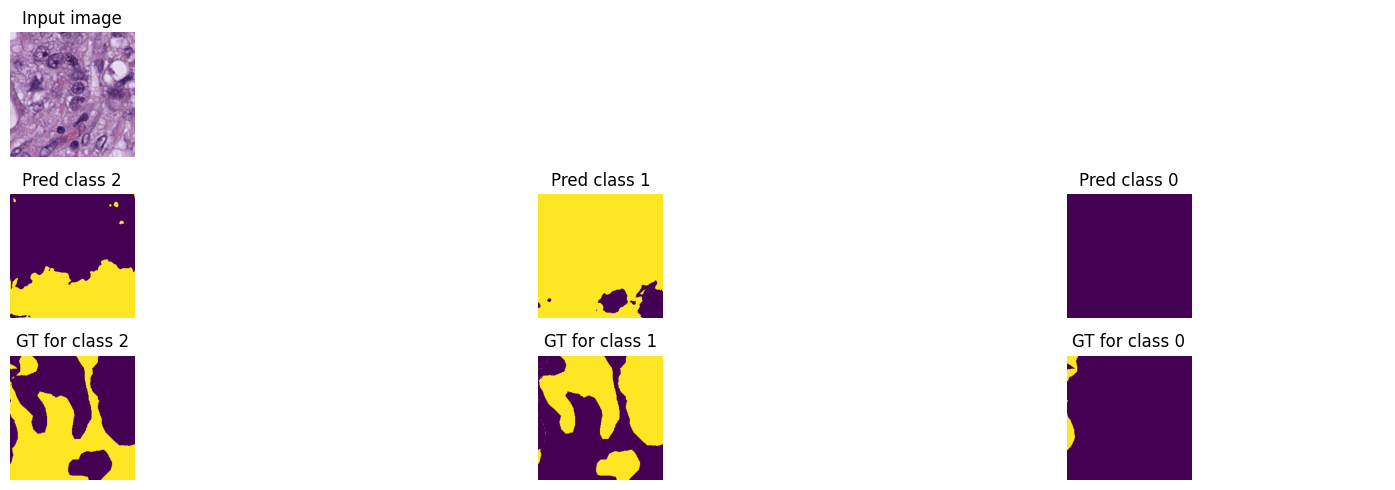

Train loss: 0.03863 | Time: 46m 2s | Val loss: 0.03460
Train_DICE_avg: 0.54802 | Train_Jaccard_avg: 0.48973 | Train_Sensitivity_avg: 0.72236 | Train_Specificity_avg: 0.79002 
Class 0 - Train_DICE: 0.50955 | Train_Jaccard: 0.46101 | Train_Sensitivity: 0.70033 | Train_Specificity: 0.83065 
Class 1 - Train_DICE: 0.66182 | Train_Jaccard: 0.60202 | Train_Sensitivity: 0.77520 | Train_Specificity: 0.76383 
Class 2 - Train_DICE: 0.47269 | Train_Jaccard: 0.40616 | Train_Sensitivity: 0.69155 | Train_Specificity: 0.77559 
Val_DICE_avg: 0.58518 | Val_Jaccard_avg: 0.52752 | Val_Sensitivity_avg: 0.73523 | Val_Specificity_avg: 0.76991 
Class 0 - Val_DICE: 0.55679 | Val_Jaccard: 0.50719 | Val_Sensitivity: 0.69720 | Val_Specificity: 0.83051 
Class 1 - Val_DICE: 0.69606 | Val_Jaccard: 0.63845 | Val_Sensitivity: 0.80253 | Val_Specificity: 0.70226 
Class 2 - Val_DICE: 0.50269 | Val_Jaccard: 0.43692 | Val_Sensitivity: 0.70595 | Val_Specificity: 0.77694 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03768 | Time: 48m 16s | Val loss: 0.03466
Train_DICE_avg: 0.55527 | Train_Jaccard_avg: 0.49707 | Train_Sensitivity_avg: 0.73105 | Train_Specificity_avg: 0.79441 
Class 0 - Train_DICE: 0.51125 | Train_Jaccard: 0.46303 | Train_Sensitivity: 0.70656 | Train_Specificity: 0.83269 
Class 1 - Train_DICE: 0.67248 | Train_Jaccard: 0.61303 | Train_Sensitivity: 0.78760 | Train_Specificity: 0.77169 
Class 2 - Train_DICE: 0.48207 | Train_Jaccard: 0.41516 | Train_Sensitivity: 0.69899 | Train_Specificity: 0.77885 
Val_DICE_avg: 0.58280 | Val_Jaccard_avg: 0.52457 | Val_Sensitivity_avg: 0.73314 | Val_Specificity_avg: 0.76590 
Class 0 - Val_DICE: 0.55987 | Val_Jaccard: 0.51009 | Val_Sensitivity: 0.70315 | Val_Specificity: 0.82950 
Class 1 - Val_DICE: 0.70229 | Val_Jaccard: 0.64518 | Val_Sensitivity: 0.80436 | Val_Specificity: 0.69859 
Class 2 - Val_DICE: 0.48624 | Val_Jaccard: 0.41842 | Val_Sensitivity: 0.69190 | Val_Specificity: 0.76962 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03661 | Time: 50m 30s | Val loss: 0.03454
Train_DICE_avg: 0.56539 | Train_Jaccard_avg: 0.50819 | Train_Sensitivity_avg: 0.73791 | Train_Specificity_avg: 0.79833 
Class 0 - Train_DICE: 0.52679 | Train_Jaccard: 0.47945 | Train_Sensitivity: 0.71787 | Train_Specificity: 0.83425 
Class 1 - Train_DICE: 0.68037 | Train_Jaccard: 0.62242 | Train_Sensitivity: 0.79198 | Train_Specificity: 0.77841 
Class 2 - Train_DICE: 0.48902 | Train_Jaccard: 0.42271 | Train_Sensitivity: 0.70386 | Train_Specificity: 0.78233 
Val_DICE_avg: 0.59072 | Val_Jaccard_avg: 0.53214 | Val_Sensitivity_avg: 0.74129 | Val_Specificity_avg: 0.76623 
Class 0 - Val_DICE: 0.57686 | Val_Jaccard: 0.52700 | Val_Sensitivity: 0.71794 | Val_Specificity: 0.83087 
Class 1 - Val_DICE: 0.70471 | Val_Jaccard: 0.64740 | Val_Sensitivity: 0.82174 | Val_Specificity: 0.69599 
Class 2 - Val_DICE: 0.49057 | Val_Jaccard: 0.42204 | Val_Sensitivity: 0.68420 | Val_Specificity: 0.77181 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03616 | Time: 52m 43s | Val loss: 0.03430
Train_DICE_avg: 0.56965 | Train_Jaccard_avg: 0.51243 | Train_Sensitivity_avg: 0.74337 | Train_Specificity_avg: 0.79932 
Class 0 - Train_DICE: 0.53417 | Train_Jaccard: 0.48642 | Train_Sensitivity: 0.72450 | Train_Specificity: 0.83559 
Class 1 - Train_DICE: 0.68268 | Train_Jaccard: 0.62485 | Train_Sensitivity: 0.79211 | Train_Specificity: 0.77800 
Class 2 - Train_DICE: 0.49209 | Train_Jaccard: 0.42601 | Train_Sensitivity: 0.71349 | Train_Specificity: 0.78436 
Val_DICE_avg: 0.58238 | Val_Jaccard_avg: 0.52389 | Val_Sensitivity_avg: 0.73502 | Val_Specificity_avg: 0.76775 
Class 0 - Val_DICE: 0.55590 | Val_Jaccard: 0.50591 | Val_Sensitivity: 0.68582 | Val_Specificity: 0.83636 
Class 1 - Val_DICE: 0.70271 | Val_Jaccard: 0.64528 | Val_Sensitivity: 0.81943 | Val_Specificity: 0.69634 
Class 2 - Val_DICE: 0.48852 | Val_Jaccard: 0.42048 | Val_Sensitivity: 0.69982 | Val_Specificity: 0.77057 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03551 | Time: 54m 57s | Val loss: 0.03448
Train_DICE_avg: 0.57537 | Train_Jaccard_avg: 0.51906 | Train_Sensitivity_avg: 0.74825 | Train_Specificity_avg: 0.80381 
Class 0 - Train_DICE: 0.54011 | Train_Jaccard: 0.49283 | Train_Sensitivity: 0.72639 | Train_Specificity: 0.83792 
Class 1 - Train_DICE: 0.68695 | Train_Jaccard: 0.63064 | Train_Sensitivity: 0.80179 | Train_Specificity: 0.78586 
Class 2 - Train_DICE: 0.49907 | Train_Jaccard: 0.43370 | Train_Sensitivity: 0.71657 | Train_Specificity: 0.78764 
Val_DICE_avg: 0.58299 | Val_Jaccard_avg: 0.52485 | Val_Sensitivity_avg: 0.74744 | Val_Specificity_avg: 0.76527 
Class 0 - Val_DICE: 0.55486 | Val_Jaccard: 0.50394 | Val_Sensitivity: 0.68479 | Val_Specificity: 0.83483 
Class 1 - Val_DICE: 0.70860 | Val_Jaccard: 0.65186 | Val_Sensitivity: 0.82611 | Val_Specificity: 0.70112 
Class 2 - Val_DICE: 0.48552 | Val_Jaccard: 0.41873 | Val_Sensitivity: 0.73143 | Val_Specificity: 0.75985 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


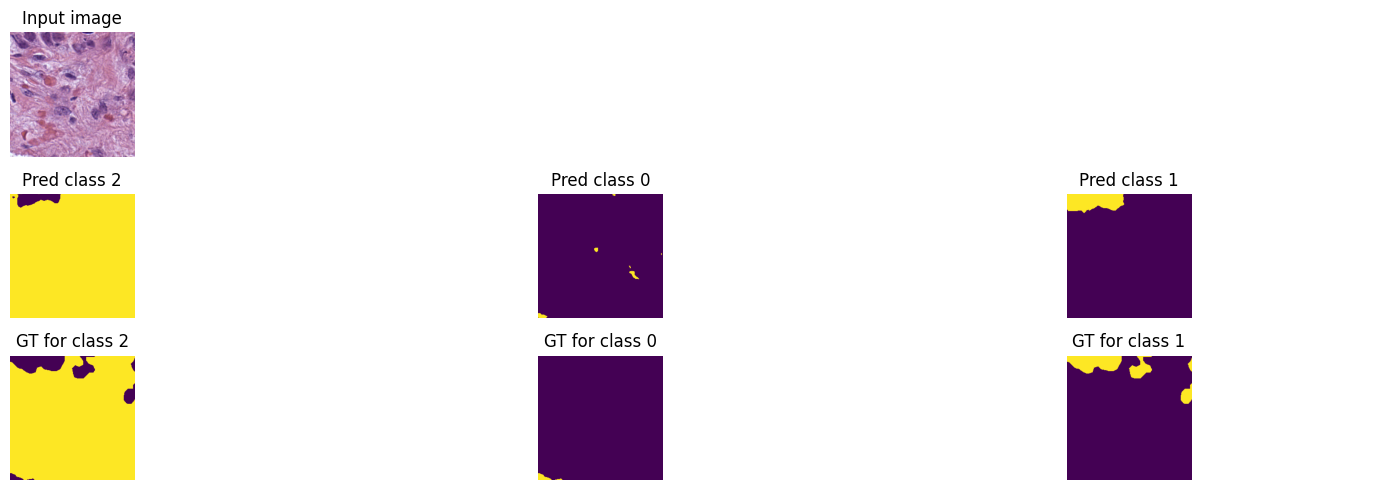

Train loss: 0.03485 | Time: 57m 10s | Val loss: 0.03388
Train_DICE_avg: 0.58380 | Train_Jaccard_avg: 0.52744 | Train_Sensitivity_avg: 0.75471 | Train_Specificity_avg: 0.80628 
Class 0 - Train_DICE: 0.55536 | Train_Jaccard: 0.50822 | Train_Sensitivity: 0.74228 | Train_Specificity: 0.84053 
Class 1 - Train_DICE: 0.69295 | Train_Jaccard: 0.63665 | Train_Sensitivity: 0.80082 | Train_Specificity: 0.78829 
Class 2 - Train_DICE: 0.50309 | Train_Jaccard: 0.43745 | Train_Sensitivity: 0.72104 | Train_Specificity: 0.79004 
Val_DICE_avg: 0.59357 | Val_Jaccard_avg: 0.53553 | Val_Sensitivity_avg: 0.75035 | Val_Specificity_avg: 0.76857 
Class 0 - Val_DICE: 0.57825 | Val_Jaccard: 0.52889 | Val_Sensitivity: 0.72258 | Val_Specificity: 0.83374 
Class 1 - Val_DICE: 0.71299 | Val_Jaccard: 0.65638 | Val_Sensitivity: 0.82364 | Val_Specificity: 0.70126 
Class 2 - Val_DICE: 0.48948 | Val_Jaccard: 0.42133 | Val_Sensitivity: 0.70482 | Val_Specificity: 0.77071 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.03463 | Time: 59m 24s | Val loss: 0.03364
Train_DICE_avg: 0.58004 | Train_Jaccard_avg: 0.52407 | Train_Sensitivity_avg: 0.75167 | Train_Specificity_avg: 0.80858 
Class 0 - Train_DICE: 0.54954 | Train_Jaccard: 0.50240 | Train_Sensitivity: 0.73473 | Train_Specificity: 0.84225 
Class 1 - Train_DICE: 0.68731 | Train_Jaccard: 0.63159 | Train_Sensitivity: 0.79723 | Train_Specificity: 0.79252 
Class 2 - Train_DICE: 0.50326 | Train_Jaccard: 0.43821 | Train_Sensitivity: 0.72305 | Train_Specificity: 0.79096 
Val_DICE_avg: 0.59358 | Val_Jaccard_avg: 0.53597 | Val_Sensitivity_avg: 0.74796 | Val_Specificity_avg: 0.77225 
Class 0 - Val_DICE: 0.57569 | Val_Jaccard: 0.52703 | Val_Sensitivity: 0.70436 | Val_Specificity: 0.83997 
Class 1 - Val_DICE: 0.70265 | Val_Jaccard: 0.64638 | Val_Sensitivity: 0.82958 | Val_Specificity: 0.70118 
Class 2 - Val_DICE: 0.50240 | Val_Jaccard: 0.43451 | Val_Sensitivity: 0.70992 | Val_Specificity: 0.77560 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03384 | Time: 61m 38s | Val loss: 0.03341
Train_DICE_avg: 0.59565 | Train_Jaccard_avg: 0.53984 | Train_Sensitivity_avg: 0.76607 | Train_Specificity_avg: 0.81155 
Class 0 - Train_DICE: 0.57164 | Train_Jaccard: 0.52443 | Train_Sensitivity: 0.75501 | Train_Specificity: 0.84391 
Class 1 - Train_DICE: 0.70240 | Train_Jaccard: 0.64712 | Train_Sensitivity: 0.81566 | Train_Specificity: 0.79478 
Class 2 - Train_DICE: 0.51291 | Train_Jaccard: 0.44798 | Train_Sensitivity: 0.72754 | Train_Specificity: 0.79594 
Val_DICE_avg: 0.59562 | Val_Jaccard_avg: 0.53795 | Val_Sensitivity_avg: 0.74439 | Val_Specificity_avg: 0.77246 
Class 0 - Val_DICE: 0.57773 | Val_Jaccard: 0.52780 | Val_Sensitivity: 0.70173 | Val_Specificity: 0.84037 
Class 1 - Val_DICE: 0.70862 | Val_Jaccard: 0.65321 | Val_Sensitivity: 0.82192 | Val_Specificity: 0.70564 
Class 2 - Val_DICE: 0.50051 | Val_Jaccard: 0.43284 | Val_Sensitivity: 0.70953 | Val_Specificity: 0.77137 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03317 | Time: 63m 51s | Val loss: 0.03358
Train_DICE_avg: 0.59654 | Train_Jaccard_avg: 0.54103 | Train_Sensitivity_avg: 0.76697 | Train_Specificity_avg: 0.81326 
Class 0 - Train_DICE: 0.56784 | Train_Jaccard: 0.52138 | Train_Sensitivity: 0.75190 | Train_Specificity: 0.84533 
Class 1 - Train_DICE: 0.70554 | Train_Jaccard: 0.65039 | Train_Sensitivity: 0.81210 | Train_Specificity: 0.80116 
Class 2 - Train_DICE: 0.51624 | Train_Jaccard: 0.45131 | Train_Sensitivity: 0.73692 | Train_Specificity: 0.79327 
Val_DICE_avg: 0.59286 | Val_Jaccard_avg: 0.53517 | Val_Sensitivity_avg: 0.74971 | Val_Specificity_avg: 0.76956 
Class 0 - Val_DICE: 0.56600 | Val_Jaccard: 0.51667 | Val_Sensitivity: 0.69857 | Val_Specificity: 0.83827 
Class 1 - Val_DICE: 0.70698 | Val_Jaccard: 0.65038 | Val_Sensitivity: 0.84424 | Val_Specificity: 0.69270 
Class 2 - Val_DICE: 0.50560 | Val_Jaccard: 0.43844 | Val_Sensitivity: 0.70631 | Val_Specificity: 0.77771 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03320 | Time: 66m 4s | Val loss: 0.03397
Train_DICE_avg: 0.59493 | Train_Jaccard_avg: 0.53945 | Train_Sensitivity_avg: 0.76643 | Train_Specificity_avg: 0.81417 
Class 0 - Train_DICE: 0.56972 | Train_Jaccard: 0.52305 | Train_Sensitivity: 0.75846 | Train_Specificity: 0.84624 
Class 1 - Train_DICE: 0.70410 | Train_Jaccard: 0.64895 | Train_Sensitivity: 0.81353 | Train_Specificity: 0.79929 
Class 2 - Train_DICE: 0.51097 | Train_Jaccard: 0.44634 | Train_Sensitivity: 0.72730 | Train_Specificity: 0.79698 
Val_DICE_avg: 0.59106 | Val_Jaccard_avg: 0.53376 | Val_Sensitivity_avg: 0.74655 | Val_Specificity_avg: 0.77006 
Class 0 - Val_DICE: 0.57049 | Val_Jaccard: 0.51977 | Val_Sensitivity: 0.67398 | Val_Specificity: 0.84262 
Class 1 - Val_DICE: 0.71114 | Val_Jaccard: 0.65588 | Val_Sensitivity: 0.83642 | Val_Specificity: 0.70201 
Class 2 - Val_DICE: 0.49156 | Val_Jaccard: 0.42564 | Val_Sensitivity: 0.72924 | Val_Specificity: 0.76555 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


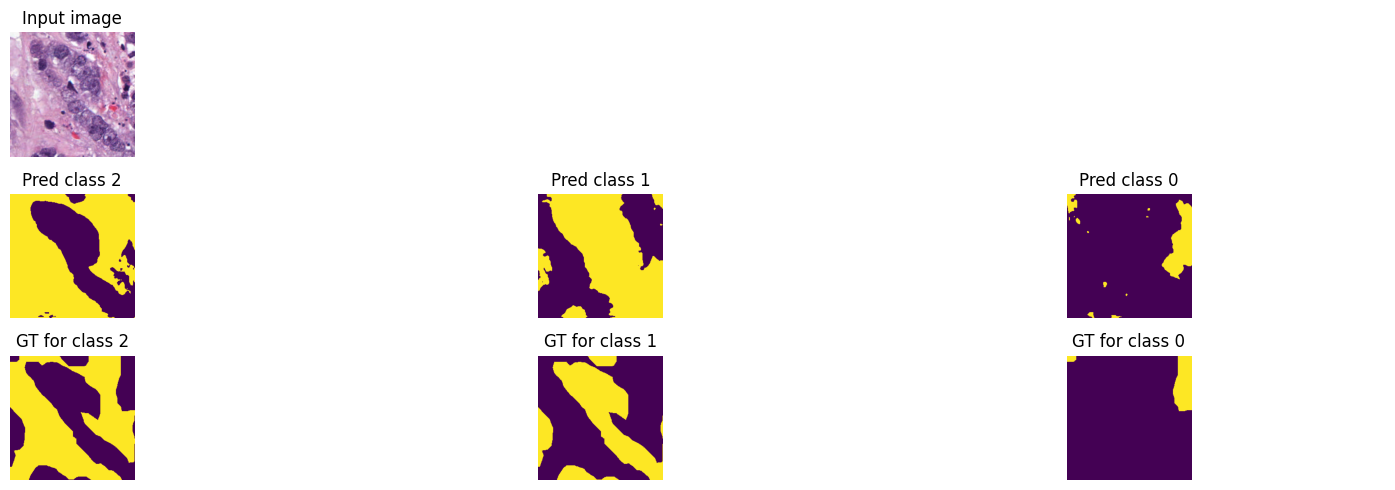

Train loss: 0.03312 | Time: 68m 19s | Val loss: 0.03312
Train_DICE_avg: 0.60051 | Train_Jaccard_avg: 0.54583 | Train_Sensitivity_avg: 0.77405 | Train_Specificity_avg: 0.81740 
Class 0 - Train_DICE: 0.57898 | Train_Jaccard: 0.53278 | Train_Sensitivity: 0.76386 | Train_Specificity: 0.84925 
Class 1 - Train_DICE: 0.70829 | Train_Jaccard: 0.65350 | Train_Sensitivity: 0.82114 | Train_Specificity: 0.80329 
Class 2 - Train_DICE: 0.51426 | Train_Jaccard: 0.45122 | Train_Sensitivity: 0.73714 | Train_Specificity: 0.79967 
Val_DICE_avg: 0.60728 | Val_Jaccard_avg: 0.55162 | Val_Sensitivity_avg: 0.77918 | Val_Specificity_avg: 0.76920 
Class 0 - Val_DICE: 0.59134 | Val_Jaccard: 0.54269 | Val_Sensitivity: 0.74052 | Val_Specificity: 0.83283 
Class 1 - Val_DICE: 0.72237 | Val_Jaccard: 0.66714 | Val_Sensitivity: 0.82946 | Val_Specificity: 0.70939 
Class 2 - Val_DICE: 0.50812 | Val_Jaccard: 0.44504 | Val_Sensitivity: 0.76755 | Val_Specificity: 0.76539 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.03248 | Time: 70m 33s | Val loss: 0.03330
Train_DICE_avg: 0.60355 | Train_Jaccard_avg: 0.54858 | Train_Sensitivity_avg: 0.77360 | Train_Specificity_avg: 0.81809 
Class 0 - Train_DICE: 0.57861 | Train_Jaccard: 0.53205 | Train_Sensitivity: 0.76216 | Train_Specificity: 0.84915 
Class 1 - Train_DICE: 0.71212 | Train_Jaccard: 0.65784 | Train_Sensitivity: 0.82498 | Train_Specificity: 0.80353 
Class 2 - Train_DICE: 0.51991 | Train_Jaccard: 0.45585 | Train_Sensitivity: 0.73366 | Train_Specificity: 0.80158 
Val_DICE_avg: 0.59899 | Val_Jaccard_avg: 0.54135 | Val_Sensitivity_avg: 0.75557 | Val_Specificity_avg: 0.77197 
Class 0 - Val_DICE: 0.57418 | Val_Jaccard: 0.52549 | Val_Sensitivity: 0.70932 | Val_Specificity: 0.83783 
Class 1 - Val_DICE: 0.71677 | Val_Jaccard: 0.65928 | Val_Sensitivity: 0.85644 | Val_Specificity: 0.69689 
Class 2 - Val_DICE: 0.50603 | Val_Jaccard: 0.43927 | Val_Sensitivity: 0.70094 | Val_Specificity: 0.78118 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03219 | Time: 72m 47s | Val loss: 0.03312
Train_DICE_avg: 0.60806 | Train_Jaccard_avg: 0.55318 | Train_Sensitivity_avg: 0.77771 | Train_Specificity_avg: 0.81922 
Class 0 - Train_DICE: 0.59143 | Train_Jaccard: 0.54508 | Train_Sensitivity: 0.77644 | Train_Specificity: 0.84960 
Class 1 - Train_DICE: 0.70955 | Train_Jaccard: 0.65557 | Train_Sensitivity: 0.82259 | Train_Specificity: 0.80484 
Class 2 - Train_DICE: 0.52321 | Train_Jaccard: 0.45888 | Train_Sensitivity: 0.73411 | Train_Specificity: 0.80322 
Val_DICE_avg: 0.60816 | Val_Jaccard_avg: 0.55155 | Val_Sensitivity_avg: 0.76512 | Val_Specificity_avg: 0.77512 
Class 0 - Val_DICE: 0.59955 | Val_Jaccard: 0.55005 | Val_Sensitivity: 0.72183 | Val_Specificity: 0.84240 
Class 1 - Val_DICE: 0.73006 | Val_Jaccard: 0.67582 | Val_Sensitivity: 0.84692 | Val_Specificity: 0.71319 
Class 2 - Val_DICE: 0.49487 | Val_Jaccard: 0.42878 | Val_Sensitivity: 0.72663 | Val_Specificity: 0.76977 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.03203 | Time: 75m 0s | Val loss: 0.03383
Train_DICE_avg: 0.61144 | Train_Jaccard_avg: 0.55723 | Train_Sensitivity_avg: 0.78383 | Train_Specificity_avg: 0.82009 
Class 0 - Train_DICE: 0.59597 | Train_Jaccard: 0.55002 | Train_Sensitivity: 0.77981 | Train_Specificity: 0.85061 
Class 1 - Train_DICE: 0.71557 | Train_Jaccard: 0.66224 | Train_Sensitivity: 0.83083 | Train_Specificity: 0.80806 
Class 2 - Train_DICE: 0.52279 | Train_Jaccard: 0.45943 | Train_Sensitivity: 0.74085 | Train_Specificity: 0.80158 
Val_DICE_avg: 0.59839 | Val_Jaccard_avg: 0.54022 | Val_Sensitivity_avg: 0.75882 | Val_Specificity_avg: 0.76864 
Class 0 - Val_DICE: 0.58300 | Val_Jaccard: 0.53346 | Val_Sensitivity: 0.69977 | Val_Specificity: 0.84329 
Class 1 - Val_DICE: 0.72493 | Val_Jaccard: 0.66796 | Val_Sensitivity: 0.89590 | Val_Specificity: 0.68718 
Class 2 - Val_DICE: 0.48725 | Val_Jaccard: 0.41923 | Val_Sensitivity: 0.68078 | Val_Specificity: 0.77547 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03111 | Time: 77m 14s | Val loss: 0.03370
Train_DICE_avg: 0.62061 | Train_Jaccard_avg: 0.56639 | Train_Sensitivity_avg: 0.78967 | Train_Specificity_avg: 0.82468 
Class 0 - Train_DICE: 0.60833 | Train_Jaccard: 0.56231 | Train_Sensitivity: 0.78861 | Train_Specificity: 0.85468 
Class 1 - Train_DICE: 0.72518 | Train_Jaccard: 0.67213 | Train_Sensitivity: 0.83932 | Train_Specificity: 0.81326 
Class 2 - Train_DICE: 0.52830 | Train_Jaccard: 0.46472 | Train_Sensitivity: 0.74108 | Train_Specificity: 0.80609 
Val_DICE_avg: 0.59658 | Val_Jaccard_avg: 0.53879 | Val_Sensitivity_avg: 0.76136 | Val_Specificity_avg: 0.76993 
Class 0 - Val_DICE: 0.57059 | Val_Jaccard: 0.52132 | Val_Sensitivity: 0.67537 | Val_Specificity: 0.84943 
Class 1 - Val_DICE: 0.72002 | Val_Jaccard: 0.66205 | Val_Sensitivity: 0.88162 | Val_Specificity: 0.69007 
Class 2 - Val_DICE: 0.49914 | Val_Jaccard: 0.43299 | Val_Sensitivity: 0.72709 | Val_Specificity: 0.77029 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


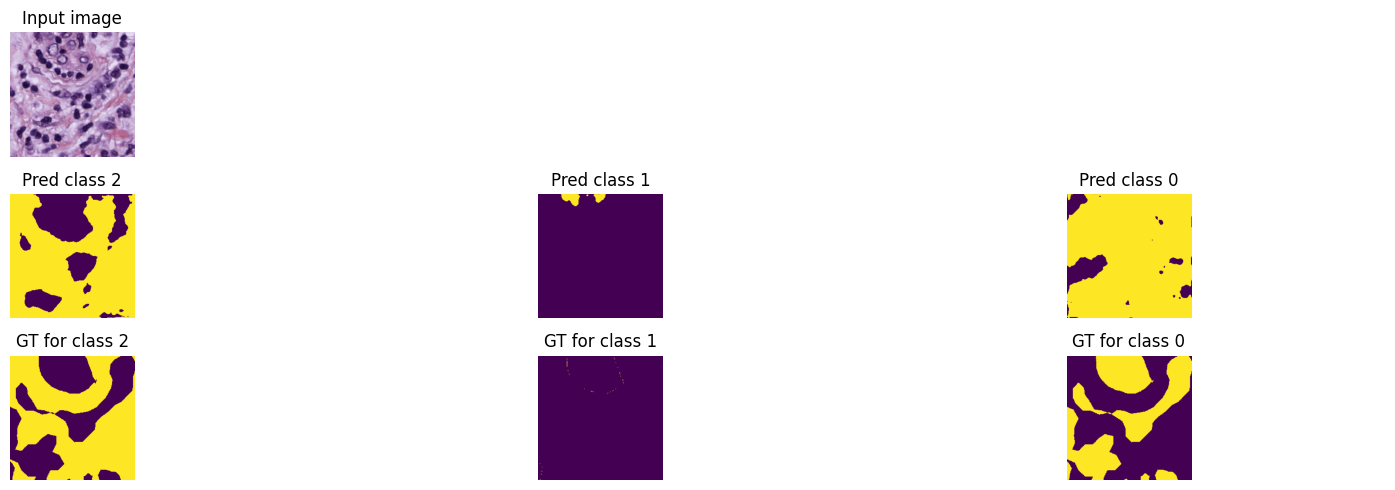

Train loss: 0.03028 | Time: 79m 28s | Val loss: 0.03220
Train_DICE_avg: 0.62574 | Train_Jaccard_avg: 0.57188 | Train_Sensitivity_avg: 0.79289 | Train_Specificity_avg: 0.82753 
Class 0 - Train_DICE: 0.60800 | Train_Jaccard: 0.56208 | Train_Sensitivity: 0.79065 | Train_Specificity: 0.85368 
Class 1 - Train_DICE: 0.73116 | Train_Jaccard: 0.67902 | Train_Sensitivity: 0.83989 | Train_Specificity: 0.81820 
Class 2 - Train_DICE: 0.53807 | Train_Jaccard: 0.47454 | Train_Sensitivity: 0.74812 | Train_Specificity: 0.81072 
Val_DICE_avg: 0.61727 | Val_Jaccard_avg: 0.56108 | Val_Sensitivity_avg: 0.77135 | Val_Specificity_avg: 0.77698 
Class 0 - Val_DICE: 0.60641 | Val_Jaccard: 0.55931 | Val_Sensitivity: 0.75512 | Val_Specificity: 0.83965 
Class 1 - Val_DICE: 0.73193 | Val_Jaccard: 0.67717 | Val_Sensitivity: 0.86208 | Val_Specificity: 0.70576 
Class 2 - Val_DICE: 0.51348 | Val_Jaccard: 0.44675 | Val_Sensitivity: 0.69685 | Val_Specificity: 0.78554 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.03032 | Time: 81m 42s | Val loss: 0.03248
Train_DICE_avg: 0.62825 | Train_Jaccard_avg: 0.57470 | Train_Sensitivity_avg: 0.79545 | Train_Specificity_avg: 0.82804 
Class 0 - Train_DICE: 0.61527 | Train_Jaccard: 0.56929 | Train_Sensitivity: 0.79598 | Train_Specificity: 0.85599 
Class 1 - Train_DICE: 0.73099 | Train_Jaccard: 0.67958 | Train_Sensitivity: 0.84393 | Train_Specificity: 0.81888 
Class 2 - Train_DICE: 0.53850 | Train_Jaccard: 0.47522 | Train_Sensitivity: 0.74645 | Train_Specificity: 0.80924 
Val_DICE_avg: 0.61920 | Val_Jaccard_avg: 0.56322 | Val_Sensitivity_avg: 0.78937 | Val_Specificity_avg: 0.77375 
Class 0 - Val_DICE: 0.60502 | Val_Jaccard: 0.55698 | Val_Sensitivity: 0.76157 | Val_Specificity: 0.83610 
Class 1 - Val_DICE: 0.73621 | Val_Jaccard: 0.68259 | Val_Sensitivity: 0.86711 | Val_Specificity: 0.70825 
Class 2 - Val_DICE: 0.51637 | Val_Jaccard: 0.45009 | Val_Sensitivity: 0.73942 | Val_Specificity: 0.77689 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02976 | Time: 83m 56s | Val loss: 0.03194
Train_DICE_avg: 0.62941 | Train_Jaccard_avg: 0.57552 | Train_Sensitivity_avg: 0.79396 | Train_Specificity_avg: 0.83032 
Class 0 - Train_DICE: 0.61636 | Train_Jaccard: 0.56992 | Train_Sensitivity: 0.79189 | Train_Specificity: 0.85807 
Class 1 - Train_DICE: 0.73181 | Train_Jaccard: 0.68011 | Train_Sensitivity: 0.83896 | Train_Specificity: 0.82161 
Class 2 - Train_DICE: 0.54007 | Train_Jaccard: 0.47654 | Train_Sensitivity: 0.75104 | Train_Specificity: 0.81129 
Val_DICE_avg: 0.62710 | Val_Jaccard_avg: 0.57171 | Val_Sensitivity_avg: 0.79185 | Val_Specificity_avg: 0.78075 
Class 0 - Val_DICE: 0.61167 | Val_Jaccard: 0.56411 | Val_Sensitivity: 0.76641 | Val_Specificity: 0.83788 
Class 1 - Val_DICE: 0.74428 | Val_Jaccard: 0.69125 | Val_Sensitivity: 0.87589 | Val_Specificity: 0.72101 
Class 2 - Val_DICE: 0.52534 | Val_Jaccard: 0.45975 | Val_Sensitivity: 0.73327 | Val_Specificity: 0.78336 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02925 | Time: 86m 10s | Val loss: 0.03224
Train_DICE_avg: 0.63272 | Train_Jaccard_avg: 0.57911 | Train_Sensitivity_avg: 0.79838 | Train_Specificity_avg: 0.83243 
Class 0 - Train_DICE: 0.61974 | Train_Jaccard: 0.57377 | Train_Sensitivity: 0.79783 | Train_Specificity: 0.85917 
Class 1 - Train_DICE: 0.73562 | Train_Jaccard: 0.68400 | Train_Sensitivity: 0.84082 | Train_Specificity: 0.82451 
Class 2 - Train_DICE: 0.54281 | Train_Jaccard: 0.47957 | Train_Sensitivity: 0.75650 | Train_Specificity: 0.81363 
Val_DICE_avg: 0.62400 | Val_Jaccard_avg: 0.56980 | Val_Sensitivity_avg: 0.80628 | Val_Specificity_avg: 0.77384 
Class 0 - Val_DICE: 0.61223 | Val_Jaccard: 0.56688 | Val_Sensitivity: 0.78681 | Val_Specificity: 0.83363 
Class 1 - Val_DICE: 0.74164 | Val_Jaccard: 0.68872 | Val_Sensitivity: 0.86246 | Val_Specificity: 0.71452 
Class 2 - Val_DICE: 0.51813 | Val_Jaccard: 0.45380 | Val_Sensitivity: 0.76957 | Val_Specificity: 0.77337 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02943 | Time: 88m 24s | Val loss: 0.03208
Train_DICE_avg: 0.63341 | Train_Jaccard_avg: 0.57984 | Train_Sensitivity_avg: 0.80055 | Train_Specificity_avg: 0.83212 
Class 0 - Train_DICE: 0.62516 | Train_Jaccard: 0.57854 | Train_Sensitivity: 0.80174 | Train_Specificity: 0.85901 
Class 1 - Train_DICE: 0.73421 | Train_Jaccard: 0.68342 | Train_Sensitivity: 0.84720 | Train_Specificity: 0.82564 
Class 2 - Train_DICE: 0.54088 | Train_Jaccard: 0.47756 | Train_Sensitivity: 0.75272 | Train_Specificity: 0.81171 
Val_DICE_avg: 0.62329 | Val_Jaccard_avg: 0.56890 | Val_Sensitivity_avg: 0.79772 | Val_Specificity_avg: 0.77766 
Class 0 - Val_DICE: 0.61195 | Val_Jaccard: 0.56534 | Val_Sensitivity: 0.78400 | Val_Specificity: 0.83333 
Class 1 - Val_DICE: 0.74236 | Val_Jaccard: 0.69026 | Val_Sensitivity: 0.85921 | Val_Specificity: 0.72261 
Class 2 - Val_DICE: 0.51557 | Val_Jaccard: 0.45110 | Val_Sensitivity: 0.74996 | Val_Specificity: 0.77704 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


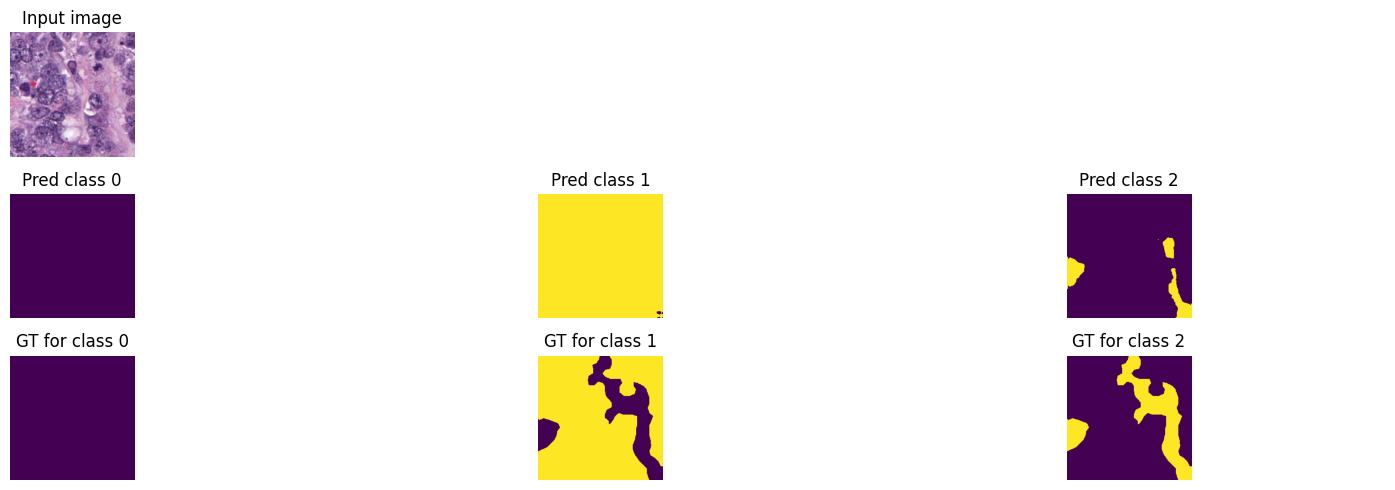

Train loss: 0.02854 | Time: 90m 38s | Val loss: 0.03283
Train_DICE_avg: 0.63951 | Train_Jaccard_avg: 0.58633 | Train_Sensitivity_avg: 0.80497 | Train_Specificity_avg: 0.83622 
Class 0 - Train_DICE: 0.63029 | Train_Jaccard: 0.58461 | Train_Sensitivity: 0.80696 | Train_Specificity: 0.86342 
Class 1 - Train_DICE: 0.73815 | Train_Jaccard: 0.68738 | Train_Sensitivity: 0.85047 | Train_Specificity: 0.82794 
Class 2 - Train_DICE: 0.55008 | Train_Jaccard: 0.48698 | Train_Sensitivity: 0.75749 | Train_Specificity: 0.81731 
Val_DICE_avg: 0.61872 | Val_Jaccard_avg: 0.56409 | Val_Sensitivity_avg: 0.79433 | Val_Specificity_avg: 0.77540 
Class 0 - Val_DICE: 0.60780 | Val_Jaccard: 0.56143 | Val_Sensitivity: 0.75442 | Val_Specificity: 0.84227 
Class 1 - Val_DICE: 0.73576 | Val_Jaccard: 0.68311 | Val_Sensitivity: 0.86626 | Val_Specificity: 0.71635 
Class 2 - Val_DICE: 0.51261 | Val_Jaccard: 0.44774 | Val_Sensitivity: 0.76232 | Val_Specificity: 0.76757 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02840 | Time: 92m 53s | Val loss: 0.03287
Train_DICE_avg: 0.64224 | Train_Jaccard_avg: 0.58946 | Train_Sensitivity_avg: 0.80784 | Train_Specificity_avg: 0.83741 
Class 0 - Train_DICE: 0.63396 | Train_Jaccard: 0.58843 | Train_Sensitivity: 0.80999 | Train_Specificity: 0.86476 
Class 1 - Train_DICE: 0.73884 | Train_Jaccard: 0.68879 | Train_Sensitivity: 0.84870 | Train_Specificity: 0.82854 
Class 2 - Train_DICE: 0.55393 | Train_Jaccard: 0.49117 | Train_Sensitivity: 0.76483 | Train_Specificity: 0.81892 
Val_DICE_avg: 0.61594 | Val_Jaccard_avg: 0.56285 | Val_Sensitivity_avg: 0.80819 | Val_Specificity_avg: 0.77617 
Class 0 - Val_DICE: 0.61521 | Val_Jaccard: 0.56998 | Val_Sensitivity: 0.78541 | Val_Specificity: 0.83725 
Class 1 - Val_DICE: 0.73543 | Val_Jaccard: 0.68320 | Val_Sensitivity: 0.82458 | Val_Specificity: 0.73673 
Class 2 - Val_DICE: 0.49717 | Val_Jaccard: 0.43536 | Val_Sensitivity: 0.81458 | Val_Specificity: 0.75451 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.02800 | Time: 95m 6s | Val loss: 0.03296
Train_DICE_avg: 0.64443 | Train_Jaccard_avg: 0.59162 | Train_Sensitivity_avg: 0.80911 | Train_Specificity_avg: 0.83741 
Class 0 - Train_DICE: 0.63884 | Train_Jaccard: 0.59370 | Train_Sensitivity: 0.81498 | Train_Specificity: 0.86355 
Class 1 - Train_DICE: 0.74223 | Train_Jaccard: 0.69182 | Train_Sensitivity: 0.85285 | Train_Specificity: 0.82925 
Class 2 - Train_DICE: 0.55222 | Train_Jaccard: 0.48934 | Train_Sensitivity: 0.75950 | Train_Specificity: 0.81942 
Val_DICE_avg: 0.62022 | Val_Jaccard_avg: 0.56728 | Val_Sensitivity_avg: 0.80661 | Val_Specificity_avg: 0.77985 
Class 0 - Val_DICE: 0.61621 | Val_Jaccard: 0.57138 | Val_Sensitivity: 0.78405 | Val_Specificity: 0.83776 
Class 1 - Val_DICE: 0.73756 | Val_Jaccard: 0.68568 | Val_Sensitivity: 0.82941 | Val_Specificity: 0.74018 
Class 2 - Val_DICE: 0.50688 | Val_Jaccard: 0.44478 | Val_Sensitivity: 0.80636 | Val_Specificity: 0.76161 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02773 | Time: 97m 20s | Val loss: 0.03256
Train_DICE_avg: 0.64633 | Train_Jaccard_avg: 0.59363 | Train_Sensitivity_avg: 0.80971 | Train_Specificity_avg: 0.83699 
Class 0 - Train_DICE: 0.63546 | Train_Jaccard: 0.59053 | Train_Sensitivity: 0.81126 | Train_Specificity: 0.86365 
Class 1 - Train_DICE: 0.74472 | Train_Jaccard: 0.69466 | Train_Sensitivity: 0.85634 | Train_Specificity: 0.82593 
Class 2 - Train_DICE: 0.55882 | Train_Jaccard: 0.49569 | Train_Sensitivity: 0.76153 | Train_Specificity: 0.82139 
Val_DICE_avg: 0.62380 | Val_Jaccard_avg: 0.56940 | Val_Sensitivity_avg: 0.79955 | Val_Specificity_avg: 0.77906 
Class 0 - Val_DICE: 0.60923 | Val_Jaccard: 0.56192 | Val_Sensitivity: 0.74964 | Val_Specificity: 0.84342 
Class 1 - Val_DICE: 0.74838 | Val_Jaccard: 0.69628 | Val_Sensitivity: 0.87649 | Val_Specificity: 0.72341 
Class 2 - Val_DICE: 0.51379 | Val_Jaccard: 0.44998 | Val_Sensitivity: 0.77252 | Val_Specificity: 0.77035 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02743 | Time: 99m 34s | Val loss: 0.03236
Train_DICE_avg: 0.65300 | Train_Jaccard_avg: 0.60055 | Train_Sensitivity_avg: 0.81646 | Train_Specificity_avg: 0.84051 
Class 0 - Train_DICE: 0.64362 | Train_Jaccard: 0.59822 | Train_Sensitivity: 0.81749 | Train_Specificity: 0.86581 
Class 1 - Train_DICE: 0.75147 | Train_Jaccard: 0.70180 | Train_Sensitivity: 0.86024 | Train_Specificity: 0.83409 
Class 2 - Train_DICE: 0.56390 | Train_Jaccard: 0.50165 | Train_Sensitivity: 0.77165 | Train_Specificity: 0.82162 
Val_DICE_avg: 0.62299 | Val_Jaccard_avg: 0.56908 | Val_Sensitivity_avg: 0.79970 | Val_Specificity_avg: 0.78399 
Class 0 - Val_DICE: 0.61575 | Val_Jaccard: 0.56924 | Val_Sensitivity: 0.76313 | Val_Specificity: 0.84141 
Class 1 - Val_DICE: 0.74196 | Val_Jaccard: 0.68982 | Val_Sensitivity: 0.85720 | Val_Specificity: 0.74142 
Class 2 - Val_DICE: 0.51127 | Val_Jaccard: 0.44817 | Val_Sensitivity: 0.77878 | Val_Specificity: 0.76913 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


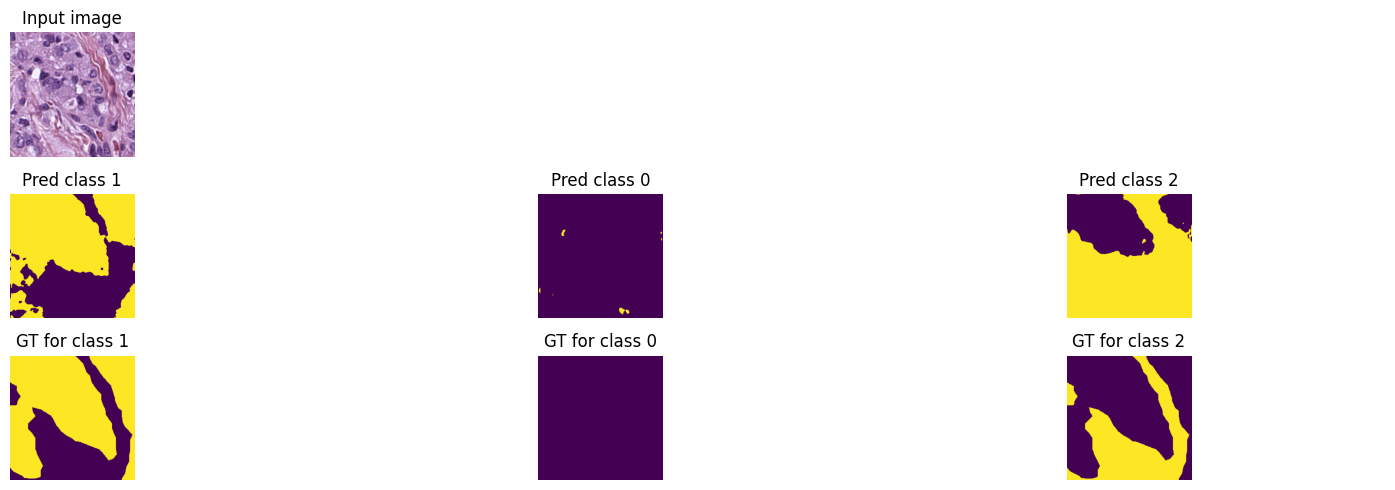

Train loss: 0.02702 | Time: 101m 49s | Val loss: 0.03264
Train_DICE_avg: 0.65387 | Train_Jaccard_avg: 0.60120 | Train_Sensitivity_avg: 0.81521 | Train_Specificity_avg: 0.84100 
Class 0 - Train_DICE: 0.64498 | Train_Jaccard: 0.59963 | Train_Sensitivity: 0.81548 | Train_Specificity: 0.86806 
Class 1 - Train_DICE: 0.75127 | Train_Jaccard: 0.70162 | Train_Sensitivity: 0.86231 | Train_Specificity: 0.83017 
Class 2 - Train_DICE: 0.56537 | Train_Jaccard: 0.50236 | Train_Sensitivity: 0.76786 | Train_Specificity: 0.82478 
Val_DICE_avg: 0.61751 | Val_Jaccard_avg: 0.56349 | Val_Sensitivity_avg: 0.79894 | Val_Specificity_avg: 0.77845 
Class 0 - Val_DICE: 0.60529 | Val_Jaccard: 0.55824 | Val_Sensitivity: 0.74734 | Val_Specificity: 0.84253 
Class 1 - Val_DICE: 0.73862 | Val_Jaccard: 0.68656 | Val_Sensitivity: 0.85330 | Val_Specificity: 0.73107 
Class 2 - Val_DICE: 0.50861 | Val_Jaccard: 0.44568 | Val_Sensitivity: 0.79619 | Val_Specificity: 0.76176 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.02694 | Time: 104m 3s | Val loss: 0.03298
Train_DICE_avg: 0.65453 | Train_Jaccard_avg: 0.60200 | Train_Sensitivity_avg: 0.81643 | Train_Specificity_avg: 0.83982 
Class 0 - Train_DICE: 0.64519 | Train_Jaccard: 0.59980 | Train_Sensitivity: 0.81719 | Train_Specificity: 0.86675 
Class 1 - Train_DICE: 0.75316 | Train_Jaccard: 0.70367 | Train_Sensitivity: 0.86335 | Train_Specificity: 0.82975 
Class 2 - Train_DICE: 0.56523 | Train_Jaccard: 0.50252 | Train_Sensitivity: 0.76874 | Train_Specificity: 0.82298 
Val_DICE_avg: 0.61988 | Val_Jaccard_avg: 0.56583 | Val_Sensitivity_avg: 0.80762 | Val_Specificity_avg: 0.77847 
Class 0 - Val_DICE: 0.61942 | Val_Jaccard: 0.57223 | Val_Sensitivity: 0.76237 | Val_Specificity: 0.84211 
Class 1 - Val_DICE: 0.74434 | Val_Jaccard: 0.69241 | Val_Sensitivity: 0.85440 | Val_Specificity: 0.73808 
Class 2 - Val_DICE: 0.49588 | Val_Jaccard: 0.43286 | Val_Sensitivity: 0.80609 | Val_Specificity: 0.75522 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02658 | Time: 106m 17s | Val loss: 0.03279
Train_DICE_avg: 0.65635 | Train_Jaccard_avg: 0.60385 | Train_Sensitivity_avg: 0.81500 | Train_Specificity_avg: 0.84324 
Class 0 - Train_DICE: 0.64723 | Train_Jaccard: 0.60156 | Train_Sensitivity: 0.81705 | Train_Specificity: 0.86997 
Class 1 - Train_DICE: 0.75356 | Train_Jaccard: 0.70428 | Train_Sensitivity: 0.86327 | Train_Specificity: 0.83386 
Class 2 - Train_DICE: 0.56825 | Train_Jaccard: 0.50571 | Train_Sensitivity: 0.76467 | Train_Specificity: 0.82590 
Val_DICE_avg: 0.61973 | Val_Jaccard_avg: 0.56580 | Val_Sensitivity_avg: 0.79790 | Val_Specificity_avg: 0.78102 
Class 0 - Val_DICE: 0.59892 | Val_Jaccard: 0.55277 | Val_Sensitivity: 0.73874 | Val_Specificity: 0.84439 
Class 1 - Val_DICE: 0.74050 | Val_Jaccard: 0.68743 | Val_Sensitivity: 0.87114 | Val_Specificity: 0.72408 
Class 2 - Val_DICE: 0.51977 | Val_Jaccard: 0.45720 | Val_Sensitivity: 0.78383 | Val_Specificity: 0.77458 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02622 | Time: 108m 30s | Val loss: 0.03246
Train_DICE_avg: 0.66207 | Train_Jaccard_avg: 0.60956 | Train_Sensitivity_avg: 0.82003 | Train_Specificity_avg: 0.84657 
Class 0 - Train_DICE: 0.65576 | Train_Jaccard: 0.61031 | Train_Sensitivity: 0.82189 | Train_Specificity: 0.87068 
Class 1 - Train_DICE: 0.75615 | Train_Jaccard: 0.70715 | Train_Sensitivity: 0.86190 | Train_Specificity: 0.84240 
Class 2 - Train_DICE: 0.57430 | Train_Jaccard: 0.51121 | Train_Sensitivity: 0.77629 | Train_Specificity: 0.82663 
Val_DICE_avg: 0.62334 | Val_Jaccard_avg: 0.56955 | Val_Sensitivity_avg: 0.79823 | Val_Specificity_avg: 0.78659 
Class 0 - Val_DICE: 0.60517 | Val_Jaccard: 0.55858 | Val_Sensitivity: 0.73854 | Val_Specificity: 0.84506 
Class 1 - Val_DICE: 0.74632 | Val_Jaccard: 0.69383 | Val_Sensitivity: 0.85767 | Val_Specificity: 0.74627 
Class 2 - Val_DICE: 0.51853 | Val_Jaccard: 0.45624 | Val_Sensitivity: 0.79847 | Val_Specificity: 0.76844 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02603 | Time: 110m 45s | Val loss: 0.03178
Train_DICE_avg: 0.66347 | Train_Jaccard_avg: 0.61116 | Train_Sensitivity_avg: 0.82000 | Train_Specificity_avg: 0.84518 
Class 0 - Train_DICE: 0.65457 | Train_Jaccard: 0.60875 | Train_Sensitivity: 0.81824 | Train_Specificity: 0.87215 
Class 1 - Train_DICE: 0.75956 | Train_Jaccard: 0.71100 | Train_Sensitivity: 0.86571 | Train_Specificity: 0.83585 
Class 2 - Train_DICE: 0.57629 | Train_Jaccard: 0.51371 | Train_Sensitivity: 0.77605 | Train_Specificity: 0.82755 
Val_DICE_avg: 0.62450 | Val_Jaccard_avg: 0.57031 | Val_Sensitivity_avg: 0.80007 | Val_Specificity_avg: 0.77857 
Class 0 - Val_DICE: 0.60271 | Val_Jaccard: 0.55643 | Val_Sensitivity: 0.75268 | Val_Specificity: 0.84133 
Class 1 - Val_DICE: 0.74854 | Val_Jaccard: 0.69559 | Val_Sensitivity: 0.87561 | Val_Specificity: 0.71893 
Class 2 - Val_DICE: 0.52225 | Val_Jaccard: 0.45891 | Val_Sensitivity: 0.77191 | Val_Specificity: 0.77546 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


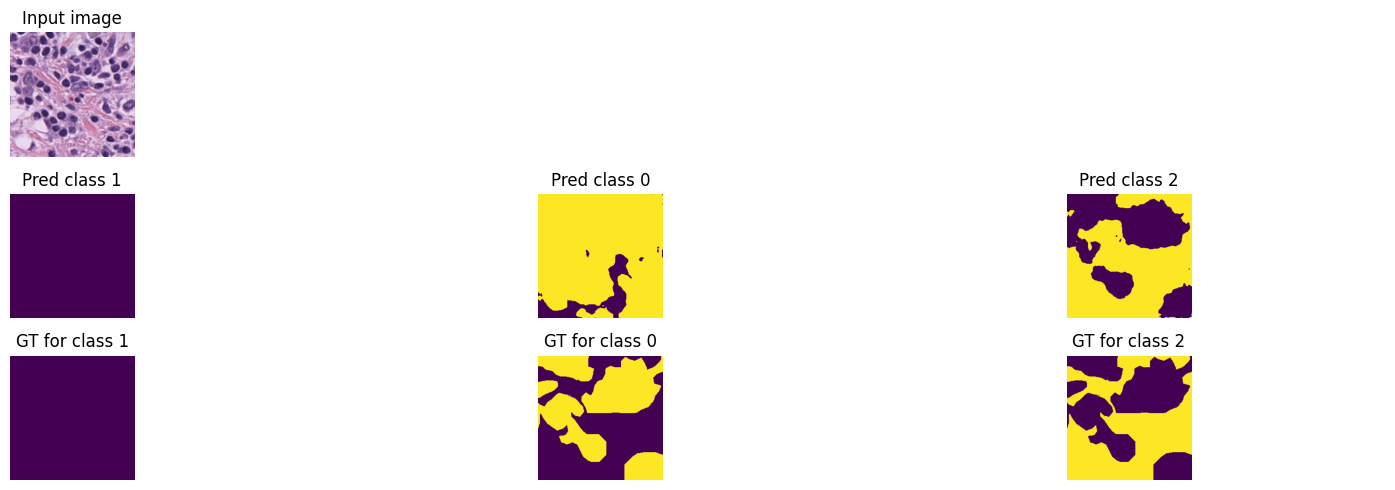

Train loss: 0.02579 | Time: 112m 59s | Val loss: 0.03210
Train_DICE_avg: 0.66374 | Train_Jaccard_avg: 0.61141 | Train_Sensitivity_avg: 0.82064 | Train_Specificity_avg: 0.84743 
Class 0 - Train_DICE: 0.65671 | Train_Jaccard: 0.61100 | Train_Sensitivity: 0.81955 | Train_Specificity: 0.87196 
Class 1 - Train_DICE: 0.75890 | Train_Jaccard: 0.71020 | Train_Sensitivity: 0.86715 | Train_Specificity: 0.84183 
Class 2 - Train_DICE: 0.57560 | Train_Jaccard: 0.51303 | Train_Sensitivity: 0.77521 | Train_Specificity: 0.82851 
Val_DICE_avg: 0.62547 | Val_Jaccard_avg: 0.57133 | Val_Sensitivity_avg: 0.80119 | Val_Specificity_avg: 0.78274 
Class 0 - Val_DICE: 0.60739 | Val_Jaccard: 0.55975 | Val_Sensitivity: 0.73980 | Val_Specificity: 0.84574 
Class 1 - Val_DICE: 0.75361 | Val_Jaccard: 0.70140 | Val_Sensitivity: 0.87474 | Val_Specificity: 0.73328 
Class 2 - Val_DICE: 0.51543 | Val_Jaccard: 0.45284 | Val_Sensitivity: 0.78903 | Val_Specificity: 0.76921 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02555 | Time: 115m 14s | Val loss: 0.03233
Train_DICE_avg: 0.66550 | Train_Jaccard_avg: 0.61331 | Train_Sensitivity_avg: 0.82122 | Train_Specificity_avg: 0.84687 
Class 0 - Train_DICE: 0.65872 | Train_Jaccard: 0.61281 | Train_Sensitivity: 0.82145 | Train_Specificity: 0.87117 
Class 1 - Train_DICE: 0.76055 | Train_Jaccard: 0.71221 | Train_Sensitivity: 0.86745 | Train_Specificity: 0.84130 
Class 2 - Train_DICE: 0.57722 | Train_Jaccard: 0.51490 | Train_Sensitivity: 0.77477 | Train_Specificity: 0.82815 
Val_DICE_avg: 0.61938 | Val_Jaccard_avg: 0.56460 | Val_Sensitivity_avg: 0.79920 | Val_Specificity_avg: 0.77569 
Class 0 - Val_DICE: 0.60057 | Val_Jaccard: 0.55294 | Val_Sensitivity: 0.72957 | Val_Specificity: 0.84631 
Class 1 - Val_DICE: 0.74576 | Val_Jaccard: 0.69229 | Val_Sensitivity: 0.88524 | Val_Specificity: 0.71574 
Class 2 - Val_DICE: 0.51180 | Val_Jaccard: 0.44857 | Val_Sensitivity: 0.78279 | Val_Specificity: 0.76504 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02534 | Time: 117m 29s | Val loss: 0.03243
Train_DICE_avg: 0.66731 | Train_Jaccard_avg: 0.61522 | Train_Sensitivity_avg: 0.82295 | Train_Specificity_avg: 0.84914 
Class 0 - Train_DICE: 0.65980 | Train_Jaccard: 0.61431 | Train_Sensitivity: 0.82471 | Train_Specificity: 0.87350 
Class 1 - Train_DICE: 0.76357 | Train_Jaccard: 0.71497 | Train_Sensitivity: 0.86663 | Train_Specificity: 0.84262 
Class 2 - Train_DICE: 0.57855 | Train_Jaccard: 0.51638 | Train_Sensitivity: 0.77750 | Train_Specificity: 0.83130 
Val_DICE_avg: 0.62479 | Val_Jaccard_avg: 0.57049 | Val_Sensitivity_avg: 0.79669 | Val_Specificity_avg: 0.78462 
Class 0 - Val_DICE: 0.60662 | Val_Jaccard: 0.55959 | Val_Sensitivity: 0.73909 | Val_Specificity: 0.84865 
Class 1 - Val_DICE: 0.75136 | Val_Jaccard: 0.69903 | Val_Sensitivity: 0.87219 | Val_Specificity: 0.73395 
Class 2 - Val_DICE: 0.51638 | Val_Jaccard: 0.45284 | Val_Sensitivity: 0.77878 | Val_Specificity: 0.77126 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.02516 | Time: 119m 44s | Val loss: 0.03220
Train_DICE_avg: 0.66688 | Train_Jaccard_avg: 0.61457 | Train_Sensitivity_avg: 0.81986 | Train_Specificity_avg: 0.84837 
Class 0 - Train_DICE: 0.66122 | Train_Jaccard: 0.61520 | Train_Sensitivity: 0.82047 | Train_Specificity: 0.87330 
Class 1 - Train_DICE: 0.76230 | Train_Jaccard: 0.71400 | Train_Sensitivity: 0.86610 | Train_Specificity: 0.84236 
Class 2 - Train_DICE: 0.57712 | Train_Jaccard: 0.51450 | Train_Sensitivity: 0.77300 | Train_Specificity: 0.82946 
Val_DICE_avg: 0.61954 | Val_Jaccard_avg: 0.56473 | Val_Sensitivity_avg: 0.79030 | Val_Specificity_avg: 0.77842 
Class 0 - Val_DICE: 0.59542 | Val_Jaccard: 0.54755 | Val_Sensitivity: 0.72496 | Val_Specificity: 0.84732 
Class 1 - Val_DICE: 0.74424 | Val_Jaccard: 0.69108 | Val_Sensitivity: 0.88324 | Val_Specificity: 0.71434 
Class 2 - Val_DICE: 0.51896 | Val_Jaccard: 0.45555 | Val_Sensitivity: 0.76270 | Val_Specificity: 0.77360 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.02493 | Time: 121m 58s | Val loss: 0.03266
Train_DICE_avg: 0.66862 | Train_Jaccard_avg: 0.61658 | Train_Sensitivity_avg: 0.82445 | Train_Specificity_avg: 0.84948 
Class 0 - Train_DICE: 0.66262 | Train_Jaccard: 0.61709 | Train_Sensitivity: 0.82791 | Train_Specificity: 0.87261 
Class 1 - Train_DICE: 0.76398 | Train_Jaccard: 0.71586 | Train_Sensitivity: 0.86875 | Train_Specificity: 0.84363 
Class 2 - Train_DICE: 0.57925 | Train_Jaccard: 0.51678 | Train_Sensitivity: 0.77670 | Train_Specificity: 0.83220 
Val_DICE_avg: 0.61754 | Val_Jaccard_avg: 0.56237 | Val_Sensitivity_avg: 0.79316 | Val_Specificity_avg: 0.77559 
Class 0 - Val_DICE: 0.59163 | Val_Jaccard: 0.54349 | Val_Sensitivity: 0.71686 | Val_Specificity: 0.84630 
Class 1 - Val_DICE: 0.74132 | Val_Jaccard: 0.68742 | Val_Sensitivity: 0.89043 | Val_Specificity: 0.70687 
Class 2 - Val_DICE: 0.51966 | Val_Jaccard: 0.45619 | Val_Sensitivity: 0.77217 | Val_Specificity: 0.77360 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


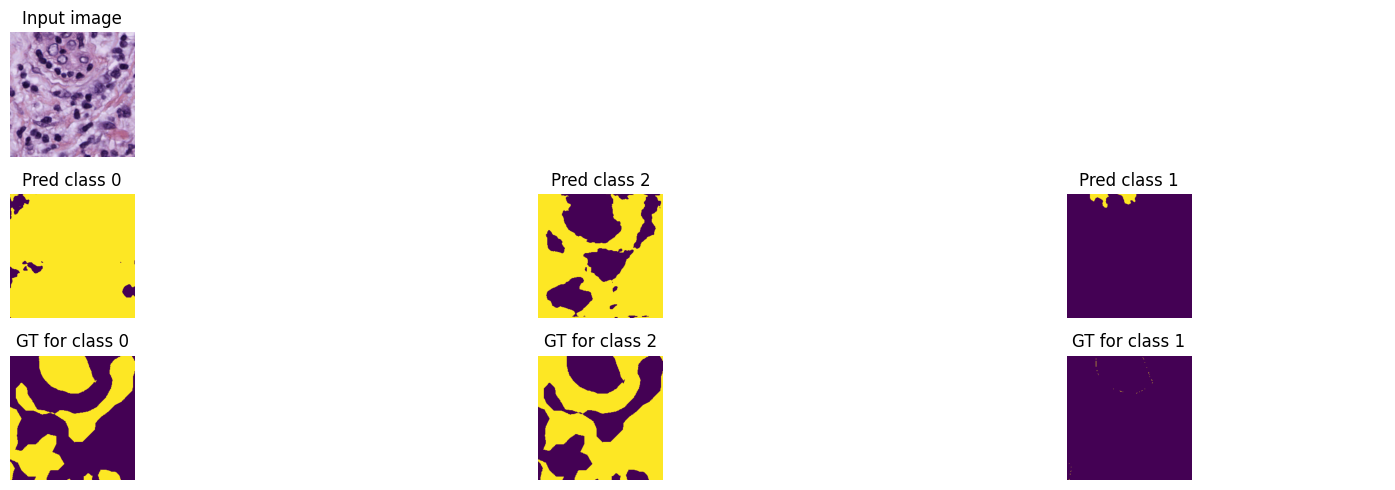

Train loss: 0.02477 | Time: 124m 13s | Val loss: 0.03278
Train_DICE_avg: 0.67043 | Train_Jaccard_avg: 0.61855 | Train_Sensitivity_avg: 0.82552 | Train_Specificity_avg: 0.85014 
Class 0 - Train_DICE: 0.66189 | Train_Jaccard: 0.61597 | Train_Sensitivity: 0.82381 | Train_Specificity: 0.87753 
Class 1 - Train_DICE: 0.76715 | Train_Jaccard: 0.71925 | Train_Sensitivity: 0.86932 | Train_Specificity: 0.84300 
Class 2 - Train_DICE: 0.58225 | Train_Jaccard: 0.52043 | Train_Sensitivity: 0.78344 | Train_Specificity: 0.82988 
Val_DICE_avg: 0.61819 | Val_Jaccard_avg: 0.56317 | Val_Sensitivity_avg: 0.79492 | Val_Specificity_avg: 0.77776 
Class 0 - Val_DICE: 0.59561 | Val_Jaccard: 0.54722 | Val_Sensitivity: 0.71050 | Val_Specificity: 0.84916 
Class 1 - Val_DICE: 0.74494 | Val_Jaccard: 0.69165 | Val_Sensitivity: 0.88078 | Val_Specificity: 0.71852 
Class 2 - Val_DICE: 0.51401 | Val_Jaccard: 0.45065 | Val_Sensitivity: 0.79349 | Val_Specificity: 0.76559 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02469 | Time: 126m 27s | Val loss: 0.03372
Train_DICE_avg: 0.67288 | Train_Jaccard_avg: 0.62082 | Train_Sensitivity_avg: 0.82652 | Train_Specificity_avg: 0.85003 
Class 0 - Train_DICE: 0.66463 | Train_Jaccard: 0.61882 | Train_Sensitivity: 0.82337 | Train_Specificity: 0.87558 
Class 1 - Train_DICE: 0.77056 | Train_Jaccard: 0.72253 | Train_Sensitivity: 0.87206 | Train_Specificity: 0.84231 
Class 2 - Train_DICE: 0.58346 | Train_Jaccard: 0.52112 | Train_Sensitivity: 0.78412 | Train_Specificity: 0.83220 
Val_DICE_avg: 0.61213 | Val_Jaccard_avg: 0.55760 | Val_Sensitivity_avg: 0.79693 | Val_Specificity_avg: 0.77519 
Class 0 - Val_DICE: 0.59464 | Val_Jaccard: 0.54606 | Val_Sensitivity: 0.70531 | Val_Specificity: 0.85078 
Class 1 - Val_DICE: 0.74306 | Val_Jaccard: 0.69036 | Val_Sensitivity: 0.87767 | Val_Specificity: 0.71869 
Class 2 - Val_DICE: 0.49869 | Val_Jaccard: 0.43636 | Val_Sensitivity: 0.80782 | Val_Specificity: 0.75609 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.02456 | Time: 128m 41s | Val loss: 0.03325
Train_DICE_avg: 0.67244 | Train_Jaccard_avg: 0.62056 | Train_Sensitivity_avg: 0.82535 | Train_Specificity_avg: 0.85104 
Class 0 - Train_DICE: 0.66821 | Train_Jaccard: 0.62218 | Train_Sensitivity: 0.82824 | Train_Specificity: 0.87624 
Class 1 - Train_DICE: 0.76545 | Train_Jaccard: 0.71775 | Train_Sensitivity: 0.86989 | Train_Specificity: 0.84463 
Class 2 - Train_DICE: 0.58367 | Train_Jaccard: 0.52177 | Train_Sensitivity: 0.77792 | Train_Specificity: 0.83227 
Val_DICE_avg: 0.61590 | Val_Jaccard_avg: 0.56109 | Val_Sensitivity_avg: 0.79388 | Val_Specificity_avg: 0.77681 
Class 0 - Val_DICE: 0.59550 | Val_Jaccard: 0.54710 | Val_Sensitivity: 0.71156 | Val_Specificity: 0.84870 
Class 1 - Val_DICE: 0.73848 | Val_Jaccard: 0.68526 | Val_Sensitivity: 0.88336 | Val_Specificity: 0.71297 
Class 2 - Val_DICE: 0.51373 | Val_Jaccard: 0.45091 | Val_Sensitivity: 0.78672 | Val_Specificity: 0.76876 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02434 | Time: 130m 55s | Val loss: 0.03322
Train_DICE_avg: 0.67608 | Train_Jaccard_avg: 0.62434 | Train_Sensitivity_avg: 0.82919 | Train_Specificity_avg: 0.85490 
Class 0 - Train_DICE: 0.66999 | Train_Jaccard: 0.62457 | Train_Sensitivity: 0.83152 | Train_Specificity: 0.87743 
Class 1 - Train_DICE: 0.77448 | Train_Jaccard: 0.72695 | Train_Sensitivity: 0.87471 | Train_Specificity: 0.85032 
Class 2 - Train_DICE: 0.58377 | Train_Jaccard: 0.52150 | Train_Sensitivity: 0.78134 | Train_Specificity: 0.83697 
Val_DICE_avg: 0.61769 | Val_Jaccard_avg: 0.56278 | Val_Sensitivity_avg: 0.79619 | Val_Specificity_avg: 0.77772 
Class 0 - Val_DICE: 0.60345 | Val_Jaccard: 0.55513 | Val_Sensitivity: 0.71877 | Val_Specificity: 0.85175 
Class 1 - Val_DICE: 0.74254 | Val_Jaccard: 0.68951 | Val_Sensitivity: 0.88667 | Val_Specificity: 0.71732 
Class 2 - Val_DICE: 0.50709 | Val_Jaccard: 0.44371 | Val_Sensitivity: 0.78314 | Val_Specificity: 0.76410 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02422 | Time: 133m 10s | Val loss: 0.03363
Train_DICE_avg: 0.67383 | Train_Jaccard_avg: 0.62206 | Train_Sensitivity_avg: 0.82564 | Train_Specificity_avg: 0.85281 
Class 0 - Train_DICE: 0.66721 | Train_Jaccard: 0.62159 | Train_Sensitivity: 0.82416 | Train_Specificity: 0.87909 
Class 1 - Train_DICE: 0.77245 | Train_Jaccard: 0.72459 | Train_Sensitivity: 0.87609 | Train_Specificity: 0.84510 
Class 2 - Train_DICE: 0.58181 | Train_Jaccard: 0.51999 | Train_Sensitivity: 0.77666 | Train_Specificity: 0.83424 
Val_DICE_avg: 0.61585 | Val_Jaccard_avg: 0.56076 | Val_Sensitivity_avg: 0.79259 | Val_Specificity_avg: 0.77615 
Class 0 - Val_DICE: 0.60283 | Val_Jaccard: 0.55433 | Val_Sensitivity: 0.70470 | Val_Specificity: 0.85257 
Class 1 - Val_DICE: 0.73980 | Val_Jaccard: 0.68656 | Val_Sensitivity: 0.88640 | Val_Specificity: 0.71264 
Class 2 - Val_DICE: 0.50491 | Val_Jaccard: 0.44139 | Val_Sensitivity: 0.78667 | Val_Specificity: 0.76324 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


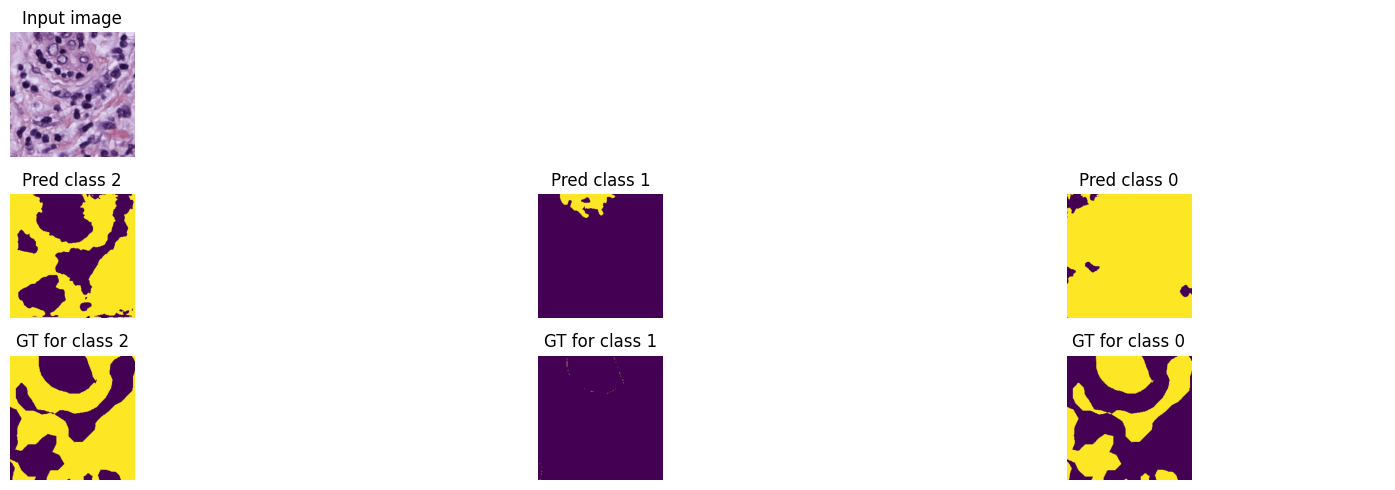

Train loss: 0.02418 | Time: 135m 25s | Val loss: 0.03279
Train_DICE_avg: 0.67550 | Train_Jaccard_avg: 0.62352 | Train_Sensitivity_avg: 0.82670 | Train_Specificity_avg: 0.85422 
Class 0 - Train_DICE: 0.67327 | Train_Jaccard: 0.62738 | Train_Sensitivity: 0.82979 | Train_Specificity: 0.87919 
Class 1 - Train_DICE: 0.77130 | Train_Jaccard: 0.72348 | Train_Sensitivity: 0.87183 | Train_Specificity: 0.85010 
Class 2 - Train_DICE: 0.58194 | Train_Jaccard: 0.51971 | Train_Sensitivity: 0.77847 | Train_Specificity: 0.83338 
Val_DICE_avg: 0.62009 | Val_Jaccard_avg: 0.56500 | Val_Sensitivity_avg: 0.79313 | Val_Specificity_avg: 0.78144 
Class 0 - Val_DICE: 0.59789 | Val_Jaccard: 0.54953 | Val_Sensitivity: 0.71687 | Val_Specificity: 0.85017 
Class 1 - Val_DICE: 0.74689 | Val_Jaccard: 0.69322 | Val_Sensitivity: 0.88276 | Val_Specificity: 0.72382 
Class 2 - Val_DICE: 0.51550 | Val_Jaccard: 0.45225 | Val_Sensitivity: 0.77976 | Val_Specificity: 0.77034 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Global Performance Metrics:
Loss mean: 0.03308, std: 0.00605
Dice Coefficient mean: 0.55665, std: 0.18576
Jaccard Index mean: 0.49526, std: 0.18609
Sensitivity mean: 0.83279, std: 0.16907
Specificity mean: 0.75572, std: 0.14806

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.50116, std: 0.41447
Jaccard mean: 0.44535, std: 0.40089
Sensitivity mean: 0.84634, std: 0.29218
Specificity mean: 0.78499, std: 0.29860

Class 1:
Dice mean: 0.67116, std: 0.38728
Jaccard mean: 0.61868, std: 0.38541
Sensitivity mean: 0.87427, std: 0.26775
Specificity mean: 0.76338, std: 0.33880

Class 2:
Dice mean: 0.49764, std: 0.37465
Jaccard mean: 0.42174, std: 0.35531
Sensitivity mean: 0.77776, std: 0.31757
Specificity mean: 0.71878, std: 0.30626


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-ResUNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.74 GB
GPU Memory - Reserved: 1.21 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


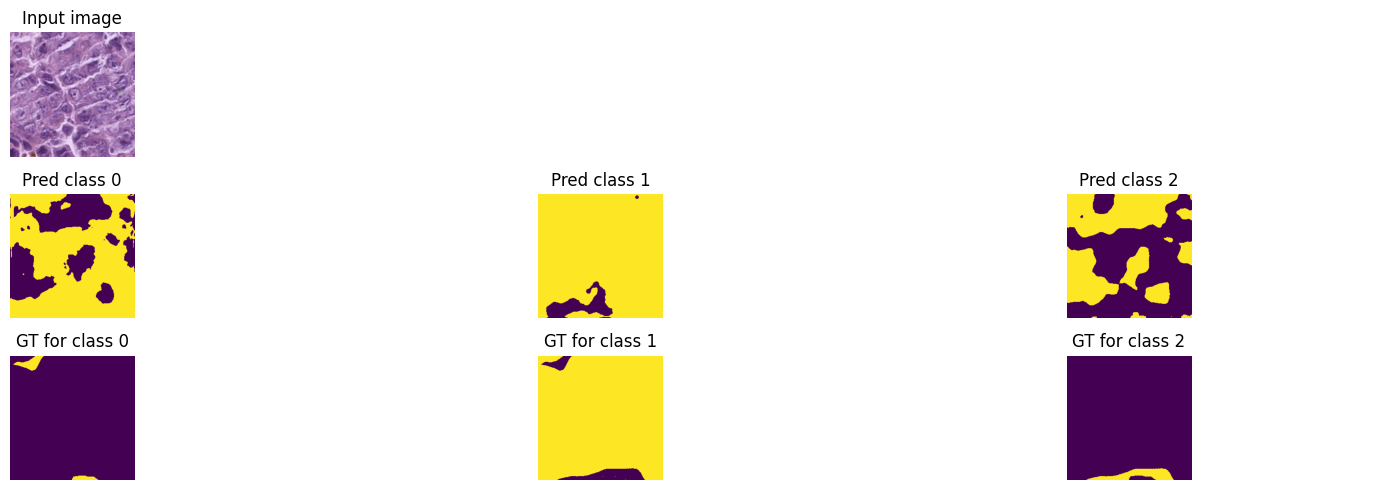

Train loss: 0.65264 | Time: 2m 10s | Val loss: 0.63330
Train_DICE_avg: 0.40134 | Train_Jaccard_avg: 0.32853 | Train_Sensitivity_avg: 0.38628 | Train_Specificity_avg: 0.79831 
Class 0 - Train_DICE: 0.29061 | Train_Jaccard: 0.22978 | Train_Sensitivity: 0.26184 | Train_Specificity: 0.85280 
Class 1 - Train_DICE: 0.47465 | Train_Jaccard: 0.40198 | Train_Sensitivity: 0.48319 | Train_Specificity: 0.73906 
Class 2 - Train_DICE: 0.43876 | Train_Jaccard: 0.35383 | Train_Sensitivity: 0.41382 | Train_Specificity: 0.80307 
Val_DICE_avg: 0.42766 | Val_Jaccard_avg: 0.36005 | Val_Sensitivity_avg: 0.39833 | Val_Specificity_avg: 0.80227 
Class 0 - Val_DICE: 0.29782 | Val_Jaccard: 0.23650 | Val_Sensitivity: 0.28036 | Val_Specificity: 0.84235 
Class 1 - Val_DICE: 0.52711 | Val_Jaccard: 0.46419 | Val_Sensitivity: 0.51315 | Val_Specificity: 0.71505 
Class 2 - Val_DICE: 0.45805 | Val_Jaccard: 0.37947 | Val_Sensitivity: 0.40150 | Val_Specificity: 0.84940 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.63255 | Time: 4m 19s | Val loss: 0.61806
Train_DICE_avg: 0.41915 | Train_Jaccard_avg: 0.34859 | Train_Sensitivity_avg: 0.39532 | Train_Specificity_avg: 0.82540 
Class 0 - Train_DICE: 0.30096 | Train_Jaccard: 0.24038 | Train_Sensitivity: 0.26927 | Train_Specificity: 0.87056 
Class 1 - Train_DICE: 0.49898 | Train_Jaccard: 0.43157 | Train_Sensitivity: 0.48608 | Train_Specificity: 0.78112 
Class 2 - Train_DICE: 0.45749 | Train_Jaccard: 0.37383 | Train_Sensitivity: 0.43061 | Train_Specificity: 0.82451 
Val_DICE_avg: 0.43509 | Val_Jaccard_avg: 0.36892 | Val_Sensitivity_avg: 0.40580 | Val_Specificity_avg: 0.81334 
Class 0 - Val_DICE: 0.30451 | Val_Jaccard: 0.24520 | Val_Sensitivity: 0.27578 | Val_Specificity: 0.85890 
Class 1 - Val_DICE: 0.53177 | Val_Jaccard: 0.47108 | Val_Sensitivity: 0.51024 | Val_Specificity: 0.74222 
Class 2 - Val_DICE: 0.46899 | Val_Jaccard: 0.39048 | Val_Sensitivity: 0.43138 | Val_Specificity: 0.83891 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.62332 | Time: 6m 29s | Val loss: 0.60770
Train_DICE_avg: 0.42518 | Train_Jaccard_avg: 0.35476 | Train_Sensitivity_avg: 0.40243 | Train_Specificity_avg: 0.83101 
Class 0 - Train_DICE: 0.30969 | Train_Jaccard: 0.24802 | Train_Sensitivity: 0.28058 | Train_Specificity: 0.87694 
Class 1 - Train_DICE: 0.50444 | Train_Jaccard: 0.43808 | Train_Sensitivity: 0.49082 | Train_Specificity: 0.78981 
Class 2 - Train_DICE: 0.46140 | Train_Jaccard: 0.37817 | Train_Sensitivity: 0.43590 | Train_Specificity: 0.82629 
Val_DICE_avg: 0.44291 | Val_Jaccard_avg: 0.37662 | Val_Sensitivity_avg: 0.41584 | Val_Specificity_avg: 0.81894 
Class 0 - Val_DICE: 0.31203 | Val_Jaccard: 0.25125 | Val_Sensitivity: 0.28337 | Val_Specificity: 0.86296 
Class 1 - Val_DICE: 0.53894 | Val_Jaccard: 0.47890 | Val_Sensitivity: 0.52219 | Val_Specificity: 0.75159 
Class 2 - Val_DICE: 0.47776 | Val_Jaccard: 0.39973 | Val_Sensitivity: 0.44196 | Val_Specificity: 0.84228 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.61594 | Time: 8m 39s | Val loss: 0.59965
Train_DICE_avg: 0.42853 | Train_Jaccard_avg: 0.35789 | Train_Sensitivity_avg: 0.40861 | Train_Specificity_avg: 0.82973 
Class 0 - Train_DICE: 0.31398 | Train_Jaccard: 0.25146 | Train_Sensitivity: 0.28723 | Train_Specificity: 0.87337 
Class 1 - Train_DICE: 0.50725 | Train_Jaccard: 0.44092 | Train_Sensitivity: 0.49612 | Train_Specificity: 0.78796 
Class 2 - Train_DICE: 0.46436 | Train_Jaccard: 0.38129 | Train_Sensitivity: 0.44247 | Train_Specificity: 0.82786 
Val_DICE_avg: 0.44735 | Val_Jaccard_avg: 0.38142 | Val_Sensitivity_avg: 0.42290 | Val_Specificity_avg: 0.82456 
Class 0 - Val_DICE: 0.31778 | Val_Jaccard: 0.25703 | Val_Sensitivity: 0.28708 | Val_Specificity: 0.86808 
Class 1 - Val_DICE: 0.54390 | Val_Jaccard: 0.48602 | Val_Sensitivity: 0.52267 | Val_Specificity: 0.77575 
Class 2 - Val_DICE: 0.48037 | Val_Jaccard: 0.40121 | Val_Sensitivity: 0.45896 | Val_Specificity: 0.82987 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.60941 | Time: 10m 48s | Val loss: 0.59238
Train_DICE_avg: 0.43137 | Train_Jaccard_avg: 0.36088 | Train_Sensitivity_avg: 0.41339 | Train_Specificity_avg: 0.83168 
Class 0 - Train_DICE: 0.31731 | Train_Jaccard: 0.25459 | Train_Sensitivity: 0.29273 | Train_Specificity: 0.87564 
Class 1 - Train_DICE: 0.51059 | Train_Jaccard: 0.44471 | Train_Sensitivity: 0.50157 | Train_Specificity: 0.79168 
Class 2 - Train_DICE: 0.46623 | Train_Jaccard: 0.38335 | Train_Sensitivity: 0.44587 | Train_Specificity: 0.82774 
Val_DICE_avg: 0.45201 | Val_Jaccard_avg: 0.38574 | Val_Sensitivity_avg: 0.43135 | Val_Specificity_avg: 0.82528 
Class 0 - Val_DICE: 0.32721 | Val_Jaccard: 0.26534 | Val_Sensitivity: 0.29811 | Val_Specificity: 0.87385 
Class 1 - Val_DICE: 0.54807 | Val_Jaccard: 0.49080 | Val_Sensitivity: 0.52417 | Val_Specificity: 0.78241 
Class 2 - Val_DICE: 0.48075 | Val_Jaccard: 0.40107 | Val_Sensitivity: 0.47177 | Val_Specificity: 0.81958 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


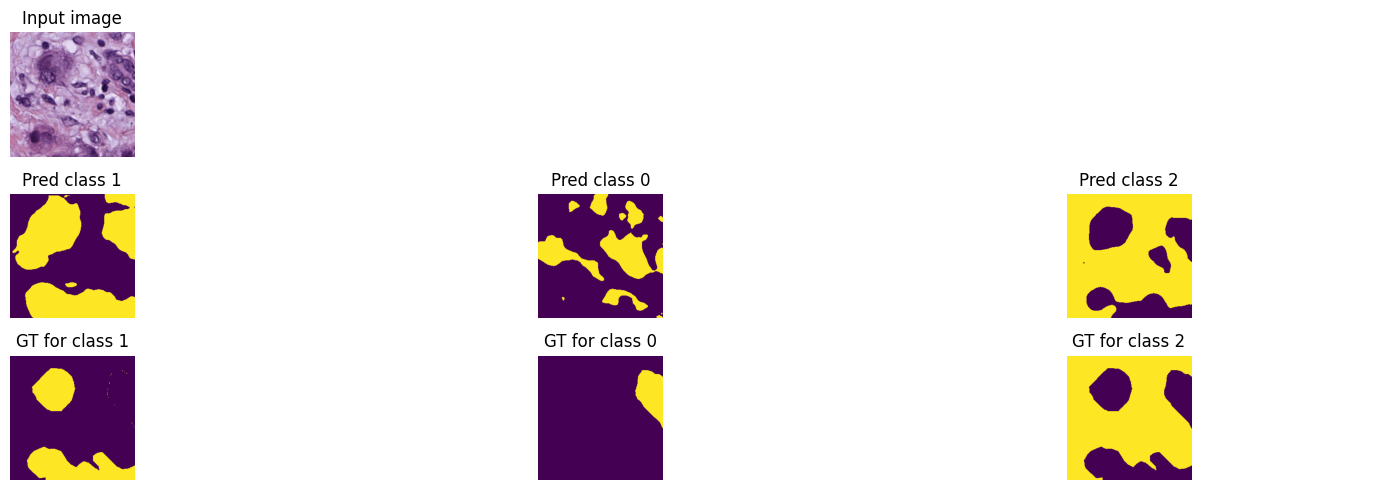

Train loss: 0.60409 | Time: 12m 58s | Val loss: 0.58679
Train_DICE_avg: 0.43327 | Train_Jaccard_avg: 0.36256 | Train_Sensitivity_avg: 0.41720 | Train_Specificity_avg: 0.83241 
Class 0 - Train_DICE: 0.31899 | Train_Jaccard: 0.25606 | Train_Sensitivity: 0.29621 | Train_Specificity: 0.87639 
Class 1 - Train_DICE: 0.51322 | Train_Jaccard: 0.44729 | Train_Sensitivity: 0.50668 | Train_Specificity: 0.79329 
Class 2 - Train_DICE: 0.46759 | Train_Jaccard: 0.38432 | Train_Sensitivity: 0.44869 | Train_Specificity: 0.82756 
Val_DICE_avg: 0.45639 | Val_Jaccard_avg: 0.39039 | Val_Sensitivity_avg: 0.43919 | Val_Specificity_avg: 0.82598 
Class 0 - Val_DICE: 0.32960 | Val_Jaccard: 0.26795 | Val_Sensitivity: 0.30213 | Val_Specificity: 0.87010 
Class 1 - Val_DICE: 0.55516 | Val_Jaccard: 0.49902 | Val_Sensitivity: 0.53123 | Val_Specificity: 0.79679 
Class 2 - Val_DICE: 0.48441 | Val_Jaccard: 0.40420 | Val_Sensitivity: 0.48422 | Val_Specificity: 0.81106 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.59888 | Time: 15m 8s | Val loss: 0.58078
Train_DICE_avg: 0.43560 | Train_Jaccard_avg: 0.36489 | Train_Sensitivity_avg: 0.42226 | Train_Specificity_avg: 0.83011 
Class 0 - Train_DICE: 0.32166 | Train_Jaccard: 0.25835 | Train_Sensitivity: 0.30022 | Train_Specificity: 0.87383 
Class 1 - Train_DICE: 0.51636 | Train_Jaccard: 0.45058 | Train_Sensitivity: 0.51382 | Train_Specificity: 0.78935 
Class 2 - Train_DICE: 0.46877 | Train_Jaccard: 0.38574 | Train_Sensitivity: 0.45275 | Train_Specificity: 0.82714 
Val_DICE_avg: 0.46123 | Val_Jaccard_avg: 0.39518 | Val_Sensitivity_avg: 0.44803 | Val_Specificity_avg: 0.82425 
Class 0 - Val_DICE: 0.33321 | Val_Jaccard: 0.27221 | Val_Sensitivity: 0.30304 | Val_Specificity: 0.88104 
Class 1 - Val_DICE: 0.56888 | Val_Jaccard: 0.51230 | Val_Sensitivity: 0.55151 | Val_Specificity: 0.78301 
Class 2 - Val_DICE: 0.48161 | Val_Jaccard: 0.40102 | Val_Sensitivity: 0.48955 | Val_Specificity: 0.80870 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.59426 | Time: 17m 18s | Val loss: 0.57810
Train_DICE_avg: 0.43790 | Train_Jaccard_avg: 0.36721 | Train_Sensitivity_avg: 0.42723 | Train_Specificity_avg: 0.82980 
Class 0 - Train_DICE: 0.32405 | Train_Jaccard: 0.26067 | Train_Sensitivity: 0.30533 | Train_Specificity: 0.87377 
Class 1 - Train_DICE: 0.51901 | Train_Jaccard: 0.45326 | Train_Sensitivity: 0.51922 | Train_Specificity: 0.78945 
Class 2 - Train_DICE: 0.47065 | Train_Jaccard: 0.38770 | Train_Sensitivity: 0.45714 | Train_Specificity: 0.82617 
Val_DICE_avg: 0.46133 | Val_Jaccard_avg: 0.39560 | Val_Sensitivity_avg: 0.44746 | Val_Specificity_avg: 0.82829 
Class 0 - Val_DICE: 0.34452 | Val_Jaccard: 0.28301 | Val_Sensitivity: 0.31799 | Val_Specificity: 0.87495 
Class 1 - Val_DICE: 0.55686 | Val_Jaccard: 0.50135 | Val_Sensitivity: 0.53400 | Val_Specificity: 0.79887 
Class 2 - Val_DICE: 0.48261 | Val_Jaccard: 0.40243 | Val_Sensitivity: 0.49038 | Val_Specificity: 0.81106 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.59067 | Time: 19m 28s | Val loss: 0.57454
Train_DICE_avg: 0.43922 | Train_Jaccard_avg: 0.36828 | Train_Sensitivity_avg: 0.43080 | Train_Specificity_avg: 0.82954 
Class 0 - Train_DICE: 0.32555 | Train_Jaccard: 0.26233 | Train_Sensitivity: 0.30880 | Train_Specificity: 0.87412 
Class 1 - Train_DICE: 0.52147 | Train_Jaccard: 0.45508 | Train_Sensitivity: 0.52471 | Train_Specificity: 0.78752 
Class 2 - Train_DICE: 0.47064 | Train_Jaccard: 0.38742 | Train_Sensitivity: 0.45888 | Train_Specificity: 0.82698 
Val_DICE_avg: 0.46417 | Val_Jaccard_avg: 0.39845 | Val_Sensitivity_avg: 0.45403 | Val_Specificity_avg: 0.82634 
Class 0 - Val_DICE: 0.33837 | Val_Jaccard: 0.27620 | Val_Sensitivity: 0.31536 | Val_Specificity: 0.87560 
Class 1 - Val_DICE: 0.56652 | Val_Jaccard: 0.51089 | Val_Sensitivity: 0.54713 | Val_Specificity: 0.79366 
Class 2 - Val_DICE: 0.48762 | Val_Jaccard: 0.40827 | Val_Sensitivity: 0.49960 | Val_Specificity: 0.80975 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.58682 | Time: 21m 37s | Val loss: 0.57150
Train_DICE_avg: 0.44029 | Train_Jaccard_avg: 0.36921 | Train_Sensitivity_avg: 0.43438 | Train_Specificity_avg: 0.82830 
Class 0 - Train_DICE: 0.32665 | Train_Jaccard: 0.26284 | Train_Sensitivity: 0.31365 | Train_Specificity: 0.87229 
Class 1 - Train_DICE: 0.52209 | Train_Jaccard: 0.45564 | Train_Sensitivity: 0.52830 | Train_Specificity: 0.78375 
Class 2 - Train_DICE: 0.47213 | Train_Jaccard: 0.38915 | Train_Sensitivity: 0.46119 | Train_Specificity: 0.82885 
Val_DICE_avg: 0.46265 | Val_Jaccard_avg: 0.39680 | Val_Sensitivity_avg: 0.45372 | Val_Specificity_avg: 0.82004 
Class 0 - Val_DICE: 0.33893 | Val_Jaccard: 0.27729 | Val_Sensitivity: 0.31935 | Val_Specificity: 0.87118 
Class 1 - Val_DICE: 0.56843 | Val_Jaccard: 0.51194 | Val_Sensitivity: 0.55206 | Val_Specificity: 0.77800 
Class 2 - Val_DICE: 0.48059 | Val_Jaccard: 0.40117 | Val_Sensitivity: 0.48974 | Val_Specificity: 0.81095 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


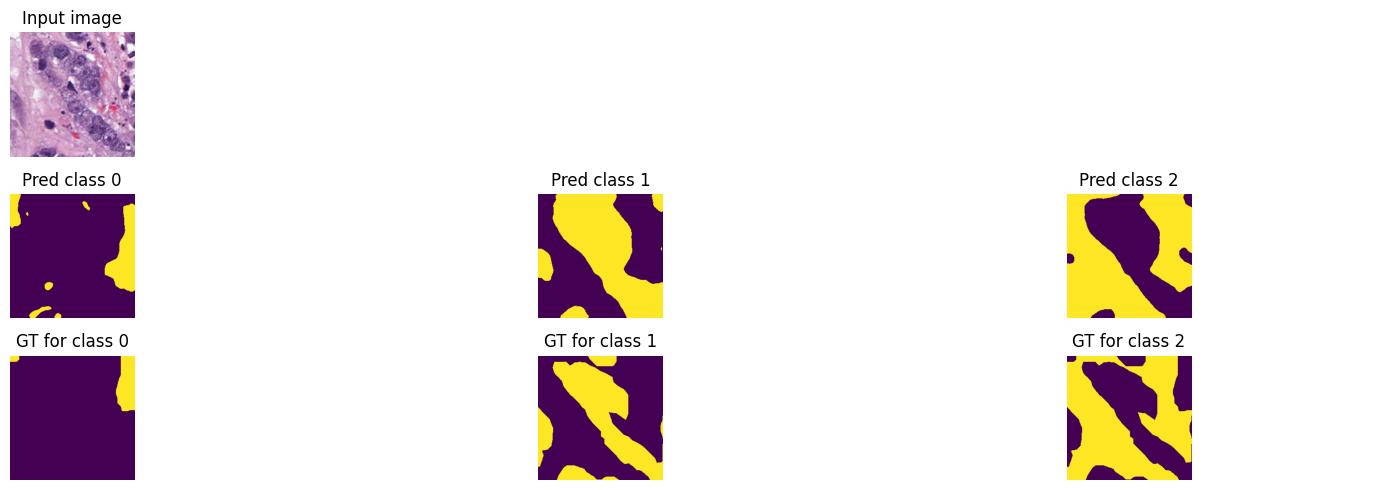

Train loss: 0.58319 | Time: 23m 51s | Val loss: 0.56851
Train_DICE_avg: 0.44209 | Train_Jaccard_avg: 0.37133 | Train_Sensitivity_avg: 0.43793 | Train_Specificity_avg: 0.82813 
Class 0 - Train_DICE: 0.32860 | Train_Jaccard: 0.26489 | Train_Sensitivity: 0.31642 | Train_Specificity: 0.87194 
Class 1 - Train_DICE: 0.52586 | Train_Jaccard: 0.45976 | Train_Sensitivity: 0.53411 | Train_Specificity: 0.78601 
Class 2 - Train_DICE: 0.47182 | Train_Jaccard: 0.38933 | Train_Sensitivity: 0.46326 | Train_Specificity: 0.82645 
Val_DICE_avg: 0.46847 | Val_Jaccard_avg: 0.40274 | Val_Sensitivity_avg: 0.46773 | Val_Specificity_avg: 0.82539 
Class 0 - Val_DICE: 0.35426 | Val_Jaccard: 0.29175 | Val_Sensitivity: 0.34474 | Val_Specificity: 0.86927 
Class 1 - Val_DICE: 0.57098 | Val_Jaccard: 0.51580 | Val_Sensitivity: 0.55268 | Val_Specificity: 0.80250 
Class 2 - Val_DICE: 0.48016 | Val_Jaccard: 0.40068 | Val_Sensitivity: 0.50576 | Val_Specificity: 0.80442 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.57953 | Time: 26m 5s | Val loss: 0.56351
Train_DICE_avg: 0.44519 | Train_Jaccard_avg: 0.37404 | Train_Sensitivity_avg: 0.44369 | Train_Specificity_avg: 0.82738 
Class 0 - Train_DICE: 0.33263 | Train_Jaccard: 0.26881 | Train_Sensitivity: 0.32385 | Train_Specificity: 0.87267 
Class 1 - Train_DICE: 0.52921 | Train_Jaccard: 0.46265 | Train_Sensitivity: 0.53968 | Train_Specificity: 0.78556 
Class 2 - Train_DICE: 0.47374 | Train_Jaccard: 0.39066 | Train_Sensitivity: 0.46756 | Train_Specificity: 0.82391 
Val_DICE_avg: 0.47285 | Val_Jaccard_avg: 0.40699 | Val_Sensitivity_avg: 0.46472 | Val_Specificity_avg: 0.82077 
Class 0 - Val_DICE: 0.35284 | Val_Jaccard: 0.29152 | Val_Sensitivity: 0.33121 | Val_Specificity: 0.87936 
Class 1 - Val_DICE: 0.58148 | Val_Jaccard: 0.52497 | Val_Sensitivity: 0.57031 | Val_Specificity: 0.77179 
Class 2 - Val_DICE: 0.48422 | Val_Jaccard: 0.40449 | Val_Sensitivity: 0.49264 | Val_Specificity: 0.81118 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.57684 | Time: 28m 18s | Val loss: 0.56236
Train_DICE_avg: 0.44594 | Train_Jaccard_avg: 0.37463 | Train_Sensitivity_avg: 0.44679 | Train_Specificity_avg: 0.82565 
Class 0 - Train_DICE: 0.33329 | Train_Jaccard: 0.26895 | Train_Sensitivity: 0.32718 | Train_Specificity: 0.87013 
Class 1 - Train_DICE: 0.53107 | Train_Jaccard: 0.46419 | Train_Sensitivity: 0.54528 | Train_Specificity: 0.78188 
Class 2 - Train_DICE: 0.47345 | Train_Jaccard: 0.39074 | Train_Sensitivity: 0.46791 | Train_Specificity: 0.82495 
Val_DICE_avg: 0.47591 | Val_Jaccard_avg: 0.41024 | Val_Sensitivity_avg: 0.46940 | Val_Specificity_avg: 0.82710 
Class 0 - Val_DICE: 0.36185 | Val_Jaccard: 0.30083 | Val_Sensitivity: 0.34909 | Val_Specificity: 0.88325 
Class 1 - Val_DICE: 0.57701 | Val_Jaccard: 0.52057 | Val_Sensitivity: 0.56124 | Val_Specificity: 0.78198 
Class 2 - Val_DICE: 0.48887 | Val_Jaccard: 0.40932 | Val_Sensitivity: 0.49788 | Val_Specificity: 0.81607 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.57415 | Time: 30m 32s | Val loss: 0.55953
Train_DICE_avg: 0.44791 | Train_Jaccard_avg: 0.37666 | Train_Sensitivity_avg: 0.45025 | Train_Specificity_avg: 0.82642 
Class 0 - Train_DICE: 0.33358 | Train_Jaccard: 0.26947 | Train_Sensitivity: 0.32884 | Train_Specificity: 0.86952 
Class 1 - Train_DICE: 0.53421 | Train_Jaccard: 0.46731 | Train_Sensitivity: 0.55138 | Train_Specificity: 0.78265 
Class 2 - Train_DICE: 0.47594 | Train_Jaccard: 0.39319 | Train_Sensitivity: 0.47052 | Train_Specificity: 0.82710 
Val_DICE_avg: 0.47644 | Val_Jaccard_avg: 0.41064 | Val_Sensitivity_avg: 0.47373 | Val_Specificity_avg: 0.81819 
Class 0 - Val_DICE: 0.36724 | Val_Jaccard: 0.30585 | Val_Sensitivity: 0.35770 | Val_Specificity: 0.87489 
Class 1 - Val_DICE: 0.57864 | Val_Jaccard: 0.52246 | Val_Sensitivity: 0.56538 | Val_Specificity: 0.77335 
Class 2 - Val_DICE: 0.48345 | Val_Jaccard: 0.40360 | Val_Sensitivity: 0.49809 | Val_Specificity: 0.80631 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.57152 | Time: 32m 45s | Val loss: 0.55734
Train_DICE_avg: 0.45012 | Train_Jaccard_avg: 0.37902 | Train_Sensitivity_avg: 0.45339 | Train_Specificity_avg: 0.82518 
Class 0 - Train_DICE: 0.33825 | Train_Jaccard: 0.27417 | Train_Sensitivity: 0.33492 | Train_Specificity: 0.87137 
Class 1 - Train_DICE: 0.53554 | Train_Jaccard: 0.46896 | Train_Sensitivity: 0.55396 | Train_Specificity: 0.77900 
Class 2 - Train_DICE: 0.47657 | Train_Jaccard: 0.39393 | Train_Sensitivity: 0.47131 | Train_Specificity: 0.82519 
Val_DICE_avg: 0.47918 | Val_Jaccard_avg: 0.41351 | Val_Sensitivity_avg: 0.47596 | Val_Specificity_avg: 0.82030 
Class 0 - Val_DICE: 0.36524 | Val_Jaccard: 0.30400 | Val_Sensitivity: 0.34814 | Val_Specificity: 0.88125 
Class 1 - Val_DICE: 0.58892 | Val_Jaccard: 0.53265 | Val_Sensitivity: 0.58029 | Val_Specificity: 0.76886 
Class 2 - Val_DICE: 0.48338 | Val_Jaccard: 0.40387 | Val_Sensitivity: 0.49946 | Val_Specificity: 0.81079 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


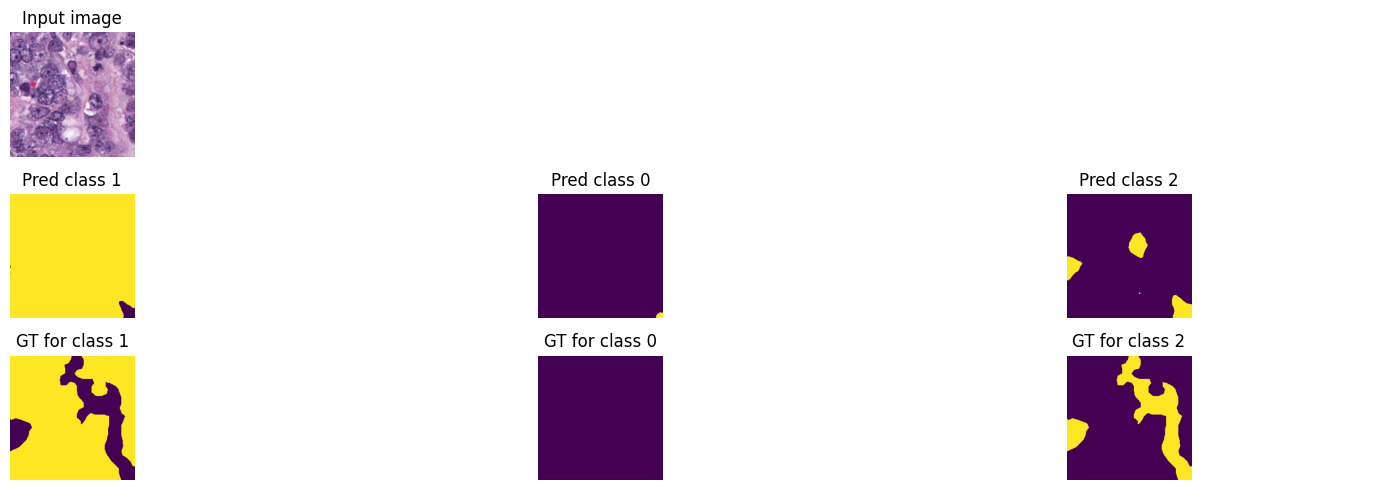

Train loss: 0.56944 | Time: 34m 59s | Val loss: 0.55661
Train_DICE_avg: 0.45202 | Train_Jaccard_avg: 0.38106 | Train_Sensitivity_avg: 0.45599 | Train_Specificity_avg: 0.82539 
Class 0 - Train_DICE: 0.33909 | Train_Jaccard: 0.27489 | Train_Sensitivity: 0.33638 | Train_Specificity: 0.86800 
Class 1 - Train_DICE: 0.53974 | Train_Jaccard: 0.47370 | Train_Sensitivity: 0.56001 | Train_Specificity: 0.78177 
Class 2 - Train_DICE: 0.47724 | Train_Jaccard: 0.39458 | Train_Sensitivity: 0.47158 | Train_Specificity: 0.82639 
Val_DICE_avg: 0.48203 | Val_Jaccard_avg: 0.41599 | Val_Sensitivity_avg: 0.48447 | Val_Specificity_avg: 0.81858 
Class 0 - Val_DICE: 0.37152 | Val_Jaccard: 0.31036 | Val_Sensitivity: 0.36130 | Val_Specificity: 0.88048 
Class 1 - Val_DICE: 0.59121 | Val_Jaccard: 0.53440 | Val_Sensitivity: 0.58284 | Val_Specificity: 0.77422 
Class 2 - Val_DICE: 0.48335 | Val_Jaccard: 0.40321 | Val_Sensitivity: 0.50928 | Val_Specificity: 0.80104 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.56680 | Time: 37m 13s | Val loss: 0.55478
Train_DICE_avg: 0.45372 | Train_Jaccard_avg: 0.38283 | Train_Sensitivity_avg: 0.45871 | Train_Specificity_avg: 0.82524 
Class 0 - Train_DICE: 0.33992 | Train_Jaccard: 0.27580 | Train_Sensitivity: 0.33928 | Train_Specificity: 0.87026 
Class 1 - Train_DICE: 0.54351 | Train_Jaccard: 0.47747 | Train_Sensitivity: 0.56367 | Train_Specificity: 0.78004 
Class 2 - Train_DICE: 0.47773 | Train_Jaccard: 0.39522 | Train_Sensitivity: 0.47317 | Train_Specificity: 0.82541 
Val_DICE_avg: 0.48598 | Val_Jaccard_avg: 0.42009 | Val_Sensitivity_avg: 0.48708 | Val_Specificity_avg: 0.82012 
Class 0 - Val_DICE: 0.38000 | Val_Jaccard: 0.31914 | Val_Sensitivity: 0.36424 | Val_Specificity: 0.88217 
Class 1 - Val_DICE: 0.58995 | Val_Jaccard: 0.53217 | Val_Sensitivity: 0.58659 | Val_Specificity: 0.76821 
Class 2 - Val_DICE: 0.48799 | Val_Jaccard: 0.40895 | Val_Sensitivity: 0.51041 | Val_Specificity: 0.80998 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.56462 | Time: 39m 26s | Val loss: 0.55167
Train_DICE_avg: 0.45716 | Train_Jaccard_avg: 0.38650 | Train_Sensitivity_avg: 0.46401 | Train_Specificity_avg: 0.82601 
Class 0 - Train_DICE: 0.34336 | Train_Jaccard: 0.27913 | Train_Sensitivity: 0.34500 | Train_Specificity: 0.87021 
Class 1 - Train_DICE: 0.54812 | Train_Jaccard: 0.48246 | Train_Sensitivity: 0.57010 | Train_Specificity: 0.77953 
Class 2 - Train_DICE: 0.48000 | Train_Jaccard: 0.39790 | Train_Sensitivity: 0.47693 | Train_Specificity: 0.82830 
Val_DICE_avg: 0.48740 | Val_Jaccard_avg: 0.42084 | Val_Sensitivity_avg: 0.48657 | Val_Specificity_avg: 0.81753 
Class 0 - Val_DICE: 0.35857 | Val_Jaccard: 0.29872 | Val_Sensitivity: 0.33372 | Val_Specificity: 0.89247 
Class 1 - Val_DICE: 0.61422 | Val_Jaccard: 0.55338 | Val_Sensitivity: 0.64010 | Val_Specificity: 0.73425 
Class 2 - Val_DICE: 0.48941 | Val_Jaccard: 0.41042 | Val_Sensitivity: 0.48588 | Val_Specificity: 0.82587 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.56169 | Time: 41m 39s | Val loss: 0.55043
Train_DICE_avg: 0.46047 | Train_Jaccard_avg: 0.39001 | Train_Sensitivity_avg: 0.46764 | Train_Specificity_avg: 0.82703 
Class 0 - Train_DICE: 0.34755 | Train_Jaccard: 0.28325 | Train_Sensitivity: 0.35027 | Train_Specificity: 0.87141 
Class 1 - Train_DICE: 0.55214 | Train_Jaccard: 0.48717 | Train_Sensitivity: 0.57469 | Train_Specificity: 0.78260 
Class 2 - Train_DICE: 0.48171 | Train_Jaccard: 0.39960 | Train_Sensitivity: 0.47798 | Train_Specificity: 0.82709 
Val_DICE_avg: 0.49649 | Val_Jaccard_avg: 0.42960 | Val_Sensitivity_avg: 0.50024 | Val_Specificity_avg: 0.81685 
Class 0 - Val_DICE: 0.35919 | Val_Jaccard: 0.29893 | Val_Sensitivity: 0.33634 | Val_Specificity: 0.89570 
Class 1 - Val_DICE: 0.64312 | Val_Jaccard: 0.58223 | Val_Sensitivity: 0.67533 | Val_Specificity: 0.73064 
Class 2 - Val_DICE: 0.48718 | Val_Jaccard: 0.40764 | Val_Sensitivity: 0.48903 | Val_Specificity: 0.82421 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.56132 | Time: 43m 52s | Val loss: 0.55123
Train_DICE_avg: 0.46174 | Train_Jaccard_avg: 0.39149 | Train_Sensitivity_avg: 0.47036 | Train_Specificity_avg: 0.82808 
Class 0 - Train_DICE: 0.34917 | Train_Jaccard: 0.28513 | Train_Sensitivity: 0.35333 | Train_Specificity: 0.87228 
Class 1 - Train_DICE: 0.55498 | Train_Jaccard: 0.49060 | Train_Sensitivity: 0.57897 | Train_Specificity: 0.78399 
Class 2 - Train_DICE: 0.48108 | Train_Jaccard: 0.39875 | Train_Sensitivity: 0.47878 | Train_Specificity: 0.82797 
Val_DICE_avg: 0.49816 | Val_Jaccard_avg: 0.43151 | Val_Sensitivity_avg: 0.50350 | Val_Specificity_avg: 0.81957 
Class 0 - Val_DICE: 0.36276 | Val_Jaccard: 0.30295 | Val_Sensitivity: 0.33521 | Val_Specificity: 0.90267 
Class 1 - Val_DICE: 0.64269 | Val_Jaccard: 0.58159 | Val_Sensitivity: 0.68656 | Val_Specificity: 0.72962 
Class 2 - Val_DICE: 0.48902 | Val_Jaccard: 0.40998 | Val_Sensitivity: 0.48873 | Val_Specificity: 0.82641 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


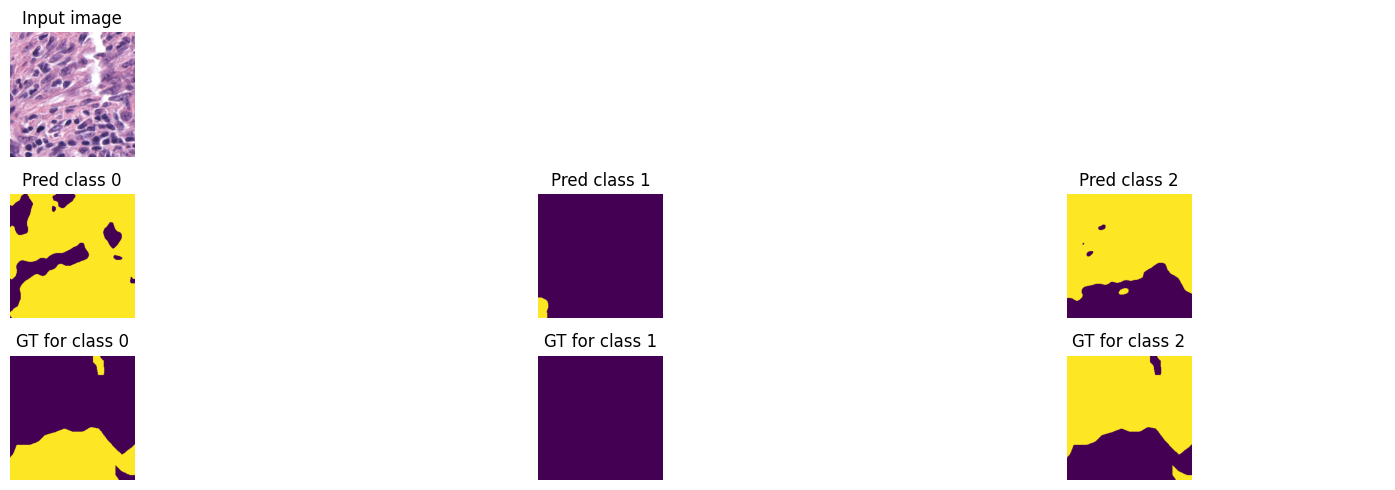

Train loss: 0.55904 | Time: 46m 7s | Val loss: 0.54789
Train_DICE_avg: 0.46352 | Train_Jaccard_avg: 0.39345 | Train_Sensitivity_avg: 0.47225 | Train_Specificity_avg: 0.82984 
Class 0 - Train_DICE: 0.34781 | Train_Jaccard: 0.28397 | Train_Sensitivity: 0.35171 | Train_Specificity: 0.87109 
Class 1 - Train_DICE: 0.55988 | Train_Jaccard: 0.49565 | Train_Sensitivity: 0.58479 | Train_Specificity: 0.79036 
Class 2 - Train_DICE: 0.48287 | Train_Jaccard: 0.40073 | Train_Sensitivity: 0.48026 | Train_Specificity: 0.82809 
Val_DICE_avg: 0.50090 | Val_Jaccard_avg: 0.43450 | Val_Sensitivity_avg: 0.50701 | Val_Specificity_avg: 0.82007 
Class 0 - Val_DICE: 0.38507 | Val_Jaccard: 0.32417 | Val_Sensitivity: 0.37558 | Val_Specificity: 0.88750 
Class 1 - Val_DICE: 0.62292 | Val_Jaccard: 0.56377 | Val_Sensitivity: 0.64097 | Val_Specificity: 0.74832 
Class 2 - Val_DICE: 0.49473 | Val_Jaccard: 0.41555 | Val_Sensitivity: 0.50449 | Val_Specificity: 0.82439 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.55607 | Time: 48m 20s | Val loss: 0.54607
Train_DICE_avg: 0.46928 | Train_Jaccard_avg: 0.39931 | Train_Sensitivity_avg: 0.47940 | Train_Specificity_avg: 0.82862 
Class 0 - Train_DICE: 0.35470 | Train_Jaccard: 0.29042 | Train_Sensitivity: 0.36089 | Train_Specificity: 0.87204 
Class 1 - Train_DICE: 0.56585 | Train_Jaccard: 0.50218 | Train_Sensitivity: 0.59157 | Train_Specificity: 0.78704 
Class 2 - Train_DICE: 0.48729 | Train_Jaccard: 0.40533 | Train_Sensitivity: 0.48575 | Train_Specificity: 0.82679 
Val_DICE_avg: 0.50420 | Val_Jaccard_avg: 0.43715 | Val_Sensitivity_avg: 0.51593 | Val_Specificity_avg: 0.81535 
Class 0 - Val_DICE: 0.37250 | Val_Jaccard: 0.31164 | Val_Sensitivity: 0.36153 | Val_Specificity: 0.88970 
Class 1 - Val_DICE: 0.64509 | Val_Jaccard: 0.58376 | Val_Sensitivity: 0.68937 | Val_Specificity: 0.72537 
Class 2 - Val_DICE: 0.49500 | Val_Jaccard: 0.41605 | Val_Sensitivity: 0.49689 | Val_Specificity: 0.83098 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.55443 | Time: 50m 34s | Val loss: 0.54570
Train_DICE_avg: 0.47223 | Train_Jaccard_avg: 0.40256 | Train_Sensitivity_avg: 0.48366 | Train_Specificity_avg: 0.83156 
Class 0 - Train_DICE: 0.35574 | Train_Jaccard: 0.29181 | Train_Sensitivity: 0.36414 | Train_Specificity: 0.87130 
Class 1 - Train_DICE: 0.57070 | Train_Jaccard: 0.50746 | Train_Sensitivity: 0.59611 | Train_Specificity: 0.79301 
Class 2 - Train_DICE: 0.49027 | Train_Jaccard: 0.40841 | Train_Sensitivity: 0.49072 | Train_Specificity: 0.83037 
Val_DICE_avg: 0.50549 | Val_Jaccard_avg: 0.43799 | Val_Sensitivity_avg: 0.51970 | Val_Specificity_avg: 0.81451 
Class 0 - Val_DICE: 0.37116 | Val_Jaccard: 0.31092 | Val_Sensitivity: 0.35557 | Val_Specificity: 0.89554 
Class 1 - Val_DICE: 0.64973 | Val_Jaccard: 0.58668 | Val_Sensitivity: 0.70917 | Val_Specificity: 0.72171 
Class 2 - Val_DICE: 0.49558 | Val_Jaccard: 0.41638 | Val_Sensitivity: 0.49435 | Val_Specificity: 0.82628 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.55209 | Time: 52m 48s | Val loss: 0.54449
Train_DICE_avg: 0.47492 | Train_Jaccard_avg: 0.40523 | Train_Sensitivity_avg: 0.48678 | Train_Specificity_avg: 0.82998 
Class 0 - Train_DICE: 0.35976 | Train_Jaccard: 0.29589 | Train_Sensitivity: 0.36923 | Train_Specificity: 0.87129 
Class 1 - Train_DICE: 0.57515 | Train_Jaccard: 0.51185 | Train_Sensitivity: 0.60247 | Train_Specificity: 0.79036 
Class 2 - Train_DICE: 0.48985 | Train_Jaccard: 0.40796 | Train_Sensitivity: 0.48863 | Train_Specificity: 0.82828 
Val_DICE_avg: 0.50616 | Val_Jaccard_avg: 0.43906 | Val_Sensitivity_avg: 0.51814 | Val_Specificity_avg: 0.81436 
Class 0 - Val_DICE: 0.37484 | Val_Jaccard: 0.31461 | Val_Sensitivity: 0.36094 | Val_Specificity: 0.89215 
Class 1 - Val_DICE: 0.64882 | Val_Jaccard: 0.58664 | Val_Sensitivity: 0.69542 | Val_Specificity: 0.72616 
Class 2 - Val_DICE: 0.49482 | Val_Jaccard: 0.41595 | Val_Sensitivity: 0.49805 | Val_Specificity: 0.82477 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.54898 | Time: 55m 1s | Val loss: 0.54609
Train_DICE_avg: 0.48165 | Train_Jaccard_avg: 0.41225 | Train_Sensitivity_avg: 0.49544 | Train_Specificity_avg: 0.83104 
Class 0 - Train_DICE: 0.36118 | Train_Jaccard: 0.29719 | Train_Sensitivity: 0.37107 | Train_Specificity: 0.87266 
Class 1 - Train_DICE: 0.58954 | Train_Jaccard: 0.52710 | Train_Sensitivity: 0.62218 | Train_Specificity: 0.79009 
Class 2 - Train_DICE: 0.49421 | Train_Jaccard: 0.41246 | Train_Sensitivity: 0.49308 | Train_Specificity: 0.83037 
Val_DICE_avg: 0.50884 | Val_Jaccard_avg: 0.44051 | Val_Sensitivity_avg: 0.52970 | Val_Specificity_avg: 0.80802 
Class 0 - Val_DICE: 0.36942 | Val_Jaccard: 0.30890 | Val_Sensitivity: 0.35211 | Val_Specificity: 0.89357 
Class 1 - Val_DICE: 0.66504 | Val_Jaccard: 0.59938 | Val_Sensitivity: 0.75191 | Val_Specificity: 0.69905 
Class 2 - Val_DICE: 0.49205 | Val_Jaccard: 0.41325 | Val_Sensitivity: 0.48508 | Val_Specificity: 0.83145 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


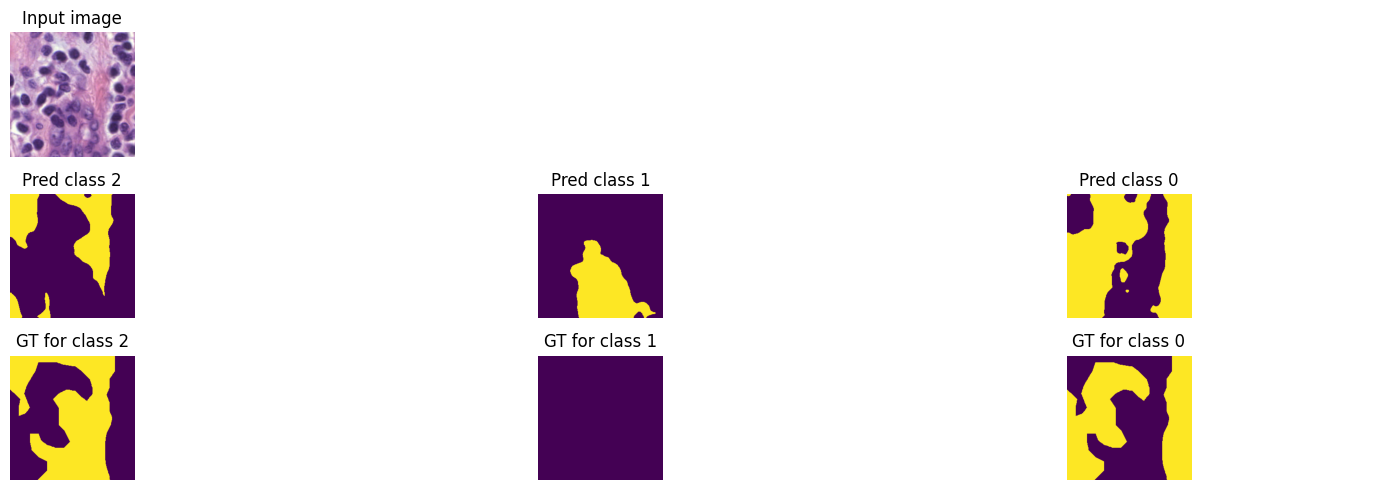

Train loss: 0.54891 | Time: 57m 16s | Val loss: 0.54052
Train_DICE_avg: 0.48481 | Train_Jaccard_avg: 0.41576 | Train_Sensitivity_avg: 0.50216 | Train_Specificity_avg: 0.83055 
Class 0 - Train_DICE: 0.36479 | Train_Jaccard: 0.30131 | Train_Sensitivity: 0.37637 | Train_Specificity: 0.87357 
Class 1 - Train_DICE: 0.59667 | Train_Jaccard: 0.53452 | Train_Sensitivity: 0.63446 | Train_Specificity: 0.78831 
Class 2 - Train_DICE: 0.49296 | Train_Jaccard: 0.41147 | Train_Sensitivity: 0.49564 | Train_Specificity: 0.82978 
Val_DICE_avg: 0.51271 | Val_Jaccard_avg: 0.44625 | Val_Sensitivity_avg: 0.52924 | Val_Specificity_avg: 0.81061 
Class 0 - Val_DICE: 0.37072 | Val_Jaccard: 0.30992 | Val_Sensitivity: 0.35446 | Val_Specificity: 0.88763 
Class 1 - Val_DICE: 0.66871 | Val_Jaccard: 0.60939 | Val_Sensitivity: 0.72169 | Val_Specificity: 0.73123 
Class 2 - Val_DICE: 0.49869 | Val_Jaccard: 0.41945 | Val_Sensitivity: 0.51156 | Val_Specificity: 0.81295 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.54352 | Time: 59m 30s | Val loss: 0.53038
Train_DICE_avg: 0.49369 | Train_Jaccard_avg: 0.42525 | Train_Sensitivity_avg: 0.51364 | Train_Specificity_avg: 0.83227 
Class 0 - Train_DICE: 0.36433 | Train_Jaccard: 0.30054 | Train_Sensitivity: 0.37583 | Train_Specificity: 0.87290 
Class 1 - Train_DICE: 0.62185 | Train_Jaccard: 0.56118 | Train_Sensitivity: 0.66824 | Train_Specificity: 0.79023 
Class 2 - Train_DICE: 0.49490 | Train_Jaccard: 0.41403 | Train_Sensitivity: 0.49685 | Train_Specificity: 0.83369 
Val_DICE_avg: 0.52316 | Val_Jaccard_avg: 0.45733 | Val_Sensitivity_avg: 0.54938 | Val_Specificity_avg: 0.80993 
Class 0 - Val_DICE: 0.37597 | Val_Jaccard: 0.31540 | Val_Sensitivity: 0.36271 | Val_Specificity: 0.88741 
Class 1 - Val_DICE: 0.69223 | Val_Jaccard: 0.63279 | Val_Sensitivity: 0.77918 | Val_Specificity: 0.71490 
Class 2 - Val_DICE: 0.50129 | Val_Jaccard: 0.42381 | Val_Sensitivity: 0.50626 | Val_Specificity: 0.82750 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.53600 | Time: 61m 43s | Val loss: 0.50570
Train_DICE_avg: 0.49704 | Train_Jaccard_avg: 0.42899 | Train_Sensitivity_avg: 0.52149 | Train_Specificity_avg: 0.83403 
Class 0 - Train_DICE: 0.35909 | Train_Jaccard: 0.29530 | Train_Sensitivity: 0.37260 | Train_Specificity: 0.87220 
Class 1 - Train_DICE: 0.63323 | Train_Jaccard: 0.57361 | Train_Sensitivity: 0.68840 | Train_Specificity: 0.79730 
Class 2 - Train_DICE: 0.49881 | Train_Jaccard: 0.41807 | Train_Sensitivity: 0.50346 | Train_Specificity: 0.83260 
Val_DICE_avg: 0.52842 | Val_Jaccard_avg: 0.46288 | Val_Sensitivity_avg: 0.55497 | Val_Specificity_avg: 0.80953 
Class 0 - Val_DICE: 0.38290 | Val_Jaccard: 0.32152 | Val_Sensitivity: 0.38071 | Val_Specificity: 0.87210 
Class 1 - Val_DICE: 0.69756 | Val_Jaccard: 0.64034 | Val_Sensitivity: 0.77729 | Val_Specificity: 0.72554 
Class 2 - Val_DICE: 0.50478 | Val_Jaccard: 0.42679 | Val_Sensitivity: 0.50691 | Val_Specificity: 0.83095 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.52429 | Time: 63m 57s | Val loss: 0.49477
Train_DICE_avg: 0.50726 | Train_Jaccard_avg: 0.43951 | Train_Sensitivity_avg: 0.53698 | Train_Specificity_avg: 0.83197 
Class 0 - Train_DICE: 0.36527 | Train_Jaccard: 0.30199 | Train_Sensitivity: 0.37815 | Train_Specificity: 0.87361 
Class 1 - Train_DICE: 0.65965 | Train_Jaccard: 0.59972 | Train_Sensitivity: 0.72661 | Train_Specificity: 0.79002 
Class 2 - Train_DICE: 0.49685 | Train_Jaccard: 0.41683 | Train_Sensitivity: 0.50618 | Train_Specificity: 0.83227 
Val_DICE_avg: 0.53537 | Val_Jaccard_avg: 0.47064 | Val_Sensitivity_avg: 0.57149 | Val_Specificity_avg: 0.80993 
Class 0 - Val_DICE: 0.37360 | Val_Jaccard: 0.31256 | Val_Sensitivity: 0.37041 | Val_Specificity: 0.87282 
Class 1 - Val_DICE: 0.71274 | Val_Jaccard: 0.65680 | Val_Sensitivity: 0.80151 | Val_Specificity: 0.73324 
Class 2 - Val_DICE: 0.51979 | Val_Jaccard: 0.44255 | Val_Sensitivity: 0.54254 | Val_Specificity: 0.82372 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.51458 | Time: 66m 11s | Val loss: 0.48281
Train_DICE_avg: 0.51223 | Train_Jaccard_avg: 0.44445 | Train_Sensitivity_avg: 0.55147 | Train_Specificity_avg: 0.82866 
Class 0 - Train_DICE: 0.36363 | Train_Jaccard: 0.29980 | Train_Sensitivity: 0.37799 | Train_Specificity: 0.87134 
Class 1 - Train_DICE: 0.67029 | Train_Jaccard: 0.61080 | Train_Sensitivity: 0.76191 | Train_Specificity: 0.78499 
Class 2 - Train_DICE: 0.50277 | Train_Jaccard: 0.42276 | Train_Sensitivity: 0.51451 | Train_Specificity: 0.82965 
Val_DICE_avg: 0.53710 | Val_Jaccard_avg: 0.47194 | Val_Sensitivity_avg: 0.58633 | Val_Specificity_avg: 0.80162 
Class 0 - Val_DICE: 0.37898 | Val_Jaccard: 0.31762 | Val_Sensitivity: 0.37391 | Val_Specificity: 0.86998 
Class 1 - Val_DICE: 0.72017 | Val_Jaccard: 0.66432 | Val_Sensitivity: 0.85375 | Val_Specificity: 0.72018 
Class 2 - Val_DICE: 0.51216 | Val_Jaccard: 0.43389 | Val_Sensitivity: 0.53132 | Val_Specificity: 0.81470 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


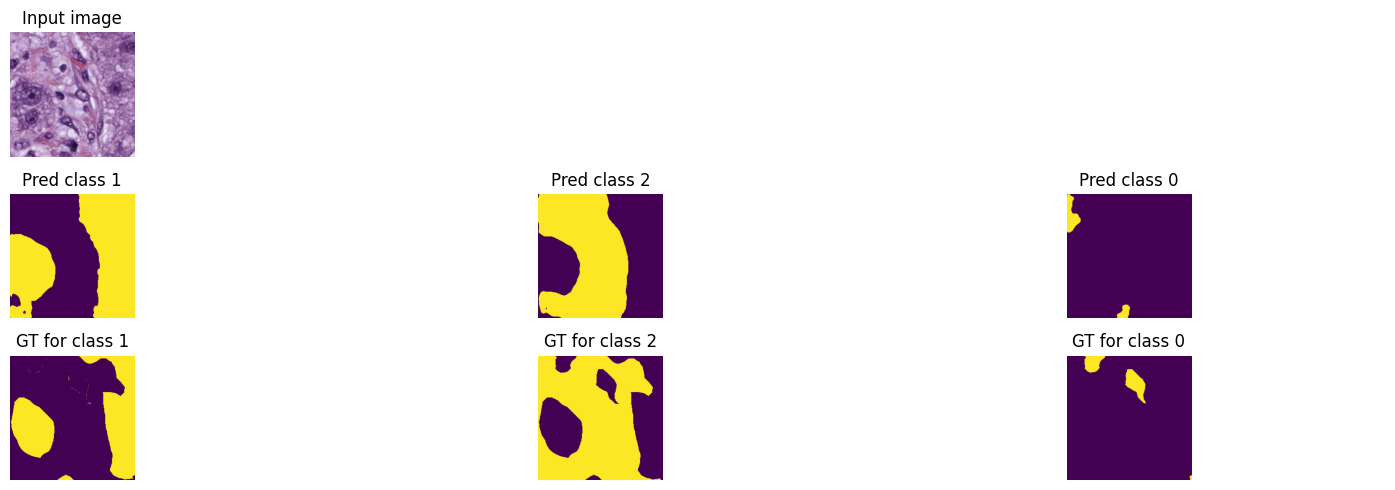

Train loss: 0.50529 | Time: 68m 25s | Val loss: 0.47297
Train_DICE_avg: 0.52393 | Train_Jaccard_avg: 0.45718 | Train_Sensitivity_avg: 0.56827 | Train_Specificity_avg: 0.83143 
Class 0 - Train_DICE: 0.37955 | Train_Jaccard: 0.31659 | Train_Sensitivity: 0.39672 | Train_Specificity: 0.87347 
Class 1 - Train_DICE: 0.68353 | Train_Jaccard: 0.62521 | Train_Sensitivity: 0.78102 | Train_Specificity: 0.78950 
Class 2 - Train_DICE: 0.50872 | Train_Jaccard: 0.42973 | Train_Sensitivity: 0.52706 | Train_Specificity: 0.83132 
Val_DICE_avg: 0.55387 | Val_Jaccard_avg: 0.49033 | Val_Sensitivity_avg: 0.60766 | Val_Specificity_avg: 0.81259 
Class 0 - Val_DICE: 0.41013 | Val_Jaccard: 0.35021 | Val_Sensitivity: 0.41192 | Val_Specificity: 0.88052 
Class 1 - Val_DICE: 0.72647 | Val_Jaccard: 0.67211 | Val_Sensitivity: 0.84521 | Val_Specificity: 0.74566 
Class 2 - Val_DICE: 0.52502 | Val_Jaccard: 0.44868 | Val_Sensitivity: 0.56586 | Val_Specificity: 0.81159 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.49647 | Time: 70m 39s | Val loss: 0.46948
Train_DICE_avg: 0.53127 | Train_Jaccard_avg: 0.46558 | Train_Sensitivity_avg: 0.58046 | Train_Specificity_avg: 0.83425 
Class 0 - Train_DICE: 0.38378 | Train_Jaccard: 0.32118 | Train_Sensitivity: 0.40389 | Train_Specificity: 0.87478 
Class 1 - Train_DICE: 0.69521 | Train_Jaccard: 0.63843 | Train_Sensitivity: 0.78939 | Train_Specificity: 0.79743 
Class 2 - Train_DICE: 0.51481 | Train_Jaccard: 0.43714 | Train_Sensitivity: 0.54812 | Train_Specificity: 0.83053 
Val_DICE_avg: 0.56160 | Val_Jaccard_avg: 0.49912 | Val_Sensitivity_avg: 0.61990 | Val_Specificity_avg: 0.81678 
Class 0 - Val_DICE: 0.42565 | Val_Jaccard: 0.36636 | Val_Sensitivity: 0.43074 | Val_Specificity: 0.87578 
Class 1 - Val_DICE: 0.72468 | Val_Jaccard: 0.67160 | Val_Sensitivity: 0.81830 | Val_Specificity: 0.76929 
Class 2 - Val_DICE: 0.53449 | Val_Jaccard: 0.45939 | Val_Sensitivity: 0.61065 | Val_Specificity: 0.80526 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.49228 | Time: 72m 54s | Val loss: 0.46300
Train_DICE_avg: 0.53524 | Train_Jaccard_avg: 0.46940 | Train_Sensitivity_avg: 0.58947 | Train_Specificity_avg: 0.83252 
Class 0 - Train_DICE: 0.39160 | Train_Jaccard: 0.32927 | Train_Sensitivity: 0.40983 | Train_Specificity: 0.87656 
Class 1 - Train_DICE: 0.69579 | Train_Jaccard: 0.63908 | Train_Sensitivity: 0.80581 | Train_Specificity: 0.79116 
Class 2 - Train_DICE: 0.51835 | Train_Jaccard: 0.43986 | Train_Sensitivity: 0.55278 | Train_Specificity: 0.82984 
Val_DICE_avg: 0.56950 | Val_Jaccard_avg: 0.50813 | Val_Sensitivity_avg: 0.63383 | Val_Specificity_avg: 0.81532 
Class 0 - Val_DICE: 0.43553 | Val_Jaccard: 0.37683 | Val_Sensitivity: 0.43183 | Val_Specificity: 0.89296 
Class 1 - Val_DICE: 0.73780 | Val_Jaccard: 0.68686 | Val_Sensitivity: 0.83209 | Val_Specificity: 0.76053 
Class 2 - Val_DICE: 0.53518 | Val_Jaccard: 0.46070 | Val_Sensitivity: 0.63759 | Val_Specificity: 0.79246 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.48524 | Time: 75m 8s | Val loss: 0.45661
Train_DICE_avg: 0.54218 | Train_Jaccard_avg: 0.47716 | Train_Sensitivity_avg: 0.60446 | Train_Specificity_avg: 0.83233 
Class 0 - Train_DICE: 0.40232 | Train_Jaccard: 0.34047 | Train_Sensitivity: 0.42369 | Train_Specificity: 0.87891 
Class 1 - Train_DICE: 0.70573 | Train_Jaccard: 0.65015 | Train_Sensitivity: 0.83228 | Train_Specificity: 0.78685 
Class 2 - Train_DICE: 0.51849 | Train_Jaccard: 0.44086 | Train_Sensitivity: 0.55741 | Train_Specificity: 0.83123 
Val_DICE_avg: 0.56653 | Val_Jaccard_avg: 0.50455 | Val_Sensitivity_avg: 0.63744 | Val_Specificity_avg: 0.80782 
Class 0 - Val_DICE: 0.42630 | Val_Jaccard: 0.36686 | Val_Sensitivity: 0.41640 | Val_Specificity: 0.89063 
Class 1 - Val_DICE: 0.73578 | Val_Jaccard: 0.68485 | Val_Sensitivity: 0.88431 | Val_Specificity: 0.72656 
Class 2 - Val_DICE: 0.53751 | Val_Jaccard: 0.46193 | Val_Sensitivity: 0.61161 | Val_Specificity: 0.80626 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.47099 | Time: 77m 22s | Val loss: 0.41381
Train_DICE_avg: 0.55844 | Train_Jaccard_avg: 0.49497 | Train_Sensitivity_avg: 0.62916 | Train_Specificity_avg: 0.83482 
Class 0 - Train_DICE: 0.44569 | Train_Jaccard: 0.38699 | Train_Sensitivity: 0.47923 | Train_Specificity: 0.88159 
Class 1 - Train_DICE: 0.70393 | Train_Jaccard: 0.64889 | Train_Sensitivity: 0.81954 | Train_Specificity: 0.79675 
Class 2 - Train_DICE: 0.52571 | Train_Jaccard: 0.44904 | Train_Sensitivity: 0.58871 | Train_Specificity: 0.82611 
Val_DICE_avg: 0.61030 | Val_Jaccard_avg: 0.55096 | Val_Sensitivity_avg: 0.69233 | Val_Specificity_avg: 0.79846 
Class 0 - Val_DICE: 0.54359 | Val_Jaccard: 0.48906 | Val_Sensitivity: 0.56274 | Val_Specificity: 0.87231 
Class 1 - Val_DICE: 0.74262 | Val_Jaccard: 0.69236 | Val_Sensitivity: 0.88701 | Val_Specificity: 0.71211 
Class 2 - Val_DICE: 0.54470 | Val_Jaccard: 0.47144 | Val_Sensitivity: 0.62725 | Val_Specificity: 0.81097 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


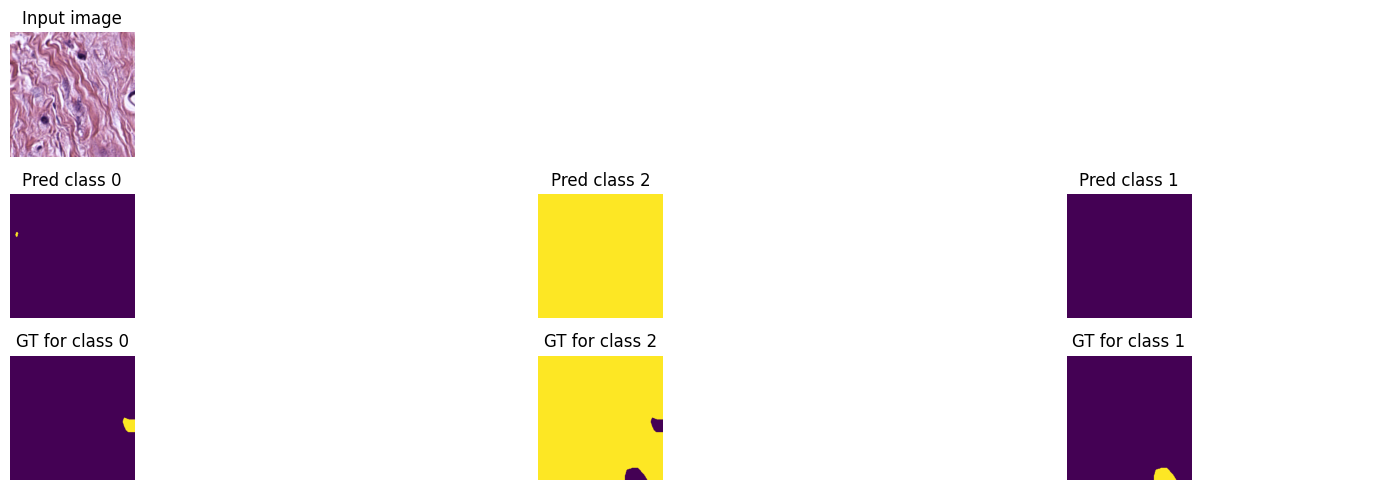

Train loss: 0.44422 | Time: 79m 37s | Val loss: 0.39089
Train_DICE_avg: 0.57963 | Train_Jaccard_avg: 0.51696 | Train_Sensitivity_avg: 0.65450 | Train_Specificity_avg: 0.83427 
Class 0 - Train_DICE: 0.49944 | Train_Jaccard: 0.44401 | Train_Sensitivity: 0.56074 | Train_Specificity: 0.87756 
Class 1 - Train_DICE: 0.70718 | Train_Jaccard: 0.65185 | Train_Sensitivity: 0.81782 | Train_Specificity: 0.79778 
Class 2 - Train_DICE: 0.53227 | Train_Jaccard: 0.45501 | Train_Sensitivity: 0.58493 | Train_Specificity: 0.82747 
Val_DICE_avg: 0.63022 | Val_Jaccard_avg: 0.57248 | Val_Sensitivity_avg: 0.72576 | Val_Specificity_avg: 0.79514 
Class 0 - Val_DICE: 0.60630 | Val_Jaccard: 0.55543 | Val_Sensitivity: 0.66750 | Val_Specificity: 0.86536 
Class 1 - Val_DICE: 0.74673 | Val_Jaccard: 0.69637 | Val_Sensitivity: 0.85538 | Val_Specificity: 0.72090 
Class 2 - Val_DICE: 0.53763 | Val_Jaccard: 0.46563 | Val_Sensitivity: 0.65439 | Val_Specificity: 0.79916 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.43068 | Time: 81m 51s | Val loss: 0.38201
Train_DICE_avg: 0.59062 | Train_Jaccard_avg: 0.52850 | Train_Sensitivity_avg: 0.67205 | Train_Specificity_avg: 0.83049 
Class 0 - Train_DICE: 0.52483 | Train_Jaccard: 0.47055 | Train_Sensitivity: 0.59473 | Train_Specificity: 0.87343 
Class 1 - Train_DICE: 0.71395 | Train_Jaccard: 0.65924 | Train_Sensitivity: 0.83007 | Train_Specificity: 0.79426 
Class 2 - Train_DICE: 0.53308 | Train_Jaccard: 0.45572 | Train_Sensitivity: 0.59136 | Train_Specificity: 0.82377 
Val_DICE_avg: 0.63311 | Val_Jaccard_avg: 0.57629 | Val_Sensitivity_avg: 0.72598 | Val_Specificity_avg: 0.79844 
Class 0 - Val_DICE: 0.60688 | Val_Jaccard: 0.55460 | Val_Sensitivity: 0.65044 | Val_Specificity: 0.86876 
Class 1 - Val_DICE: 0.74945 | Val_Jaccard: 0.69986 | Val_Sensitivity: 0.84987 | Val_Specificity: 0.72395 
Class 2 - Val_DICE: 0.54299 | Val_Jaccard: 0.47440 | Val_Sensitivity: 0.67765 | Val_Specificity: 0.80260 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.42088 | Time: 84m 5s | Val loss: 0.37959
Train_DICE_avg: 0.59654 | Train_Jaccard_avg: 0.53535 | Train_Sensitivity_avg: 0.68581 | Train_Specificity_avg: 0.83120 
Class 0 - Train_DICE: 0.53448 | Train_Jaccard: 0.48089 | Train_Sensitivity: 0.61896 | Train_Specificity: 0.86937 
Class 1 - Train_DICE: 0.72267 | Train_Jaccard: 0.66817 | Train_Sensitivity: 0.83700 | Train_Specificity: 0.79766 
Class 2 - Train_DICE: 0.53248 | Train_Jaccard: 0.45698 | Train_Sensitivity: 0.60147 | Train_Specificity: 0.82656 
Val_DICE_avg: 0.63465 | Val_Jaccard_avg: 0.57898 | Val_Sensitivity_avg: 0.75058 | Val_Specificity_avg: 0.79105 
Class 0 - Val_DICE: 0.62162 | Val_Jaccard: 0.57311 | Val_Sensitivity: 0.70044 | Val_Specificity: 0.86161 
Class 1 - Val_DICE: 0.74222 | Val_Jaccard: 0.69374 | Val_Sensitivity: 0.83176 | Val_Specificity: 0.72889 
Class 2 - Val_DICE: 0.54010 | Val_Jaccard: 0.47010 | Val_Sensitivity: 0.71954 | Val_Specificity: 0.78267 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.41011 | Time: 86m 19s | Val loss: 0.36768
Train_DICE_avg: 0.60534 | Train_Jaccard_avg: 0.54456 | Train_Sensitivity_avg: 0.69936 | Train_Specificity_avg: 0.82916 
Class 0 - Train_DICE: 0.55718 | Train_Jaccard: 0.50545 | Train_Sensitivity: 0.66010 | Train_Specificity: 0.86857 
Class 1 - Train_DICE: 0.72325 | Train_Jaccard: 0.66891 | Train_Sensitivity: 0.83901 | Train_Specificity: 0.79387 
Class 2 - Train_DICE: 0.53560 | Train_Jaccard: 0.45933 | Train_Sensitivity: 0.59897 | Train_Specificity: 0.82503 
Val_DICE_avg: 0.64525 | Val_Jaccard_avg: 0.59003 | Val_Sensitivity_avg: 0.75831 | Val_Specificity_avg: 0.79676 
Class 0 - Val_DICE: 0.64925 | Val_Jaccard: 0.60231 | Val_Sensitivity: 0.75423 | Val_Specificity: 0.86104 
Class 1 - Val_DICE: 0.74612 | Val_Jaccard: 0.69584 | Val_Sensitivity: 0.82023 | Val_Specificity: 0.73273 
Class 2 - Val_DICE: 0.54038 | Val_Jaccard: 0.47194 | Val_Sensitivity: 0.70046 | Val_Specificity: 0.79651 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.39927 | Time: 88m 34s | Val loss: 0.37016
Train_DICE_avg: 0.61479 | Train_Jaccard_avg: 0.55451 | Train_Sensitivity_avg: 0.71047 | Train_Specificity_avg: 0.83203 
Class 0 - Train_DICE: 0.57043 | Train_Jaccard: 0.51922 | Train_Sensitivity: 0.68041 | Train_Specificity: 0.86544 
Class 1 - Train_DICE: 0.72830 | Train_Jaccard: 0.67500 | Train_Sensitivity: 0.84258 | Train_Specificity: 0.80190 
Class 2 - Train_DICE: 0.54566 | Train_Jaccard: 0.46932 | Train_Sensitivity: 0.60840 | Train_Specificity: 0.82874 
Val_DICE_avg: 0.64110 | Val_Jaccard_avg: 0.58449 | Val_Sensitivity_avg: 0.75126 | Val_Specificity_avg: 0.79554 
Class 0 - Val_DICE: 0.62753 | Val_Jaccard: 0.58063 | Val_Sensitivity: 0.72989 | Val_Specificity: 0.85865 
Class 1 - Val_DICE: 0.74519 | Val_Jaccard: 0.69600 | Val_Sensitivity: 0.85484 | Val_Specificity: 0.72252 
Class 2 - Val_DICE: 0.55058 | Val_Jaccard: 0.47683 | Val_Sensitivity: 0.66907 | Val_Specificity: 0.80546 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


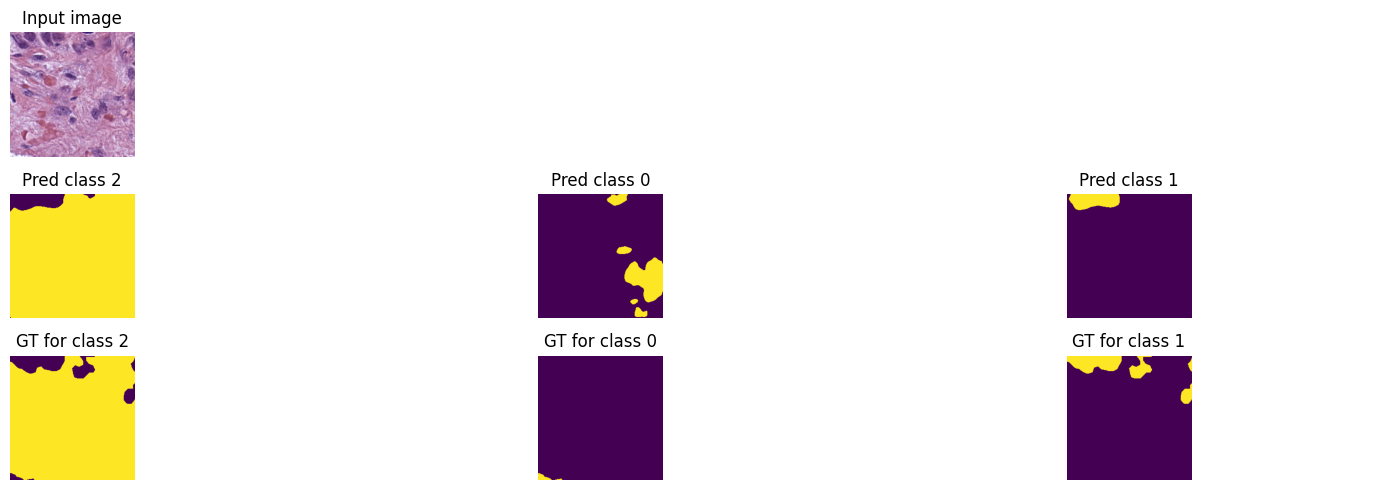

Train loss: 0.39969 | Time: 90m 49s | Val loss: 0.35589
Train_DICE_avg: 0.60919 | Train_Jaccard_avg: 0.54873 | Train_Sensitivity_avg: 0.70799 | Train_Specificity_avg: 0.82962 
Class 0 - Train_DICE: 0.56259 | Train_Jaccard: 0.51076 | Train_Sensitivity: 0.66622 | Train_Specificity: 0.86850 
Class 1 - Train_DICE: 0.72665 | Train_Jaccard: 0.67330 | Train_Sensitivity: 0.85946 | Train_Specificity: 0.79032 
Class 2 - Train_DICE: 0.53833 | Train_Jaccard: 0.46213 | Train_Sensitivity: 0.59830 | Train_Specificity: 0.83004 
Val_DICE_avg: 0.65137 | Val_Jaccard_avg: 0.59625 | Val_Sensitivity_avg: 0.76130 | Val_Specificity_avg: 0.80824 
Class 0 - Val_DICE: 0.64085 | Val_Jaccard: 0.59554 | Val_Sensitivity: 0.76632 | Val_Specificity: 0.85068 
Class 1 - Val_DICE: 0.75498 | Val_Jaccard: 0.70607 | Val_Sensitivity: 0.84657 | Val_Specificity: 0.75937 
Class 2 - Val_DICE: 0.55827 | Val_Jaccard: 0.48715 | Val_Sensitivity: 0.67102 | Val_Specificity: 0.81466 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.38894 | Time: 93m 4s | Val loss: 0.36536
Train_DICE_avg: 0.62081 | Train_Jaccard_avg: 0.56115 | Train_Sensitivity_avg: 0.72488 | Train_Specificity_avg: 0.83222 
Class 0 - Train_DICE: 0.58148 | Train_Jaccard: 0.53009 | Train_Sensitivity: 0.69475 | Train_Specificity: 0.86683 
Class 1 - Train_DICE: 0.73615 | Train_Jaccard: 0.68302 | Train_Sensitivity: 0.85268 | Train_Specificity: 0.80343 
Class 2 - Train_DICE: 0.54480 | Train_Jaccard: 0.47033 | Train_Sensitivity: 0.62722 | Train_Specificity: 0.82641 
Val_DICE_avg: 0.64314 | Val_Jaccard_avg: 0.58657 | Val_Sensitivity_avg: 0.75276 | Val_Specificity_avg: 0.79782 
Class 0 - Val_DICE: 0.62598 | Val_Jaccard: 0.57864 | Val_Sensitivity: 0.72775 | Val_Specificity: 0.85912 
Class 1 - Val_DICE: 0.75036 | Val_Jaccard: 0.69966 | Val_Sensitivity: 0.86522 | Val_Specificity: 0.72060 
Class 2 - Val_DICE: 0.55308 | Val_Jaccard: 0.48141 | Val_Sensitivity: 0.66530 | Val_Specificity: 0.81373 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.38658 | Time: 95m 18s | Val loss: 0.35781
Train_DICE_avg: 0.62314 | Train_Jaccard_avg: 0.56475 | Train_Sensitivity_avg: 0.73428 | Train_Specificity_avg: 0.83023 
Class 0 - Train_DICE: 0.58911 | Train_Jaccard: 0.54014 | Train_Sensitivity: 0.73001 | Train_Specificity: 0.85582 
Class 1 - Train_DICE: 0.73618 | Train_Jaccard: 0.68387 | Train_Sensitivity: 0.85121 | Train_Specificity: 0.80485 
Class 2 - Train_DICE: 0.54413 | Train_Jaccard: 0.47023 | Train_Sensitivity: 0.62162 | Train_Specificity: 0.83001 
Val_DICE_avg: 0.64755 | Val_Jaccard_avg: 0.59312 | Val_Sensitivity_avg: 0.76887 | Val_Specificity_avg: 0.79458 
Class 0 - Val_DICE: 0.63887 | Val_Jaccard: 0.59357 | Val_Sensitivity: 0.75311 | Val_Specificity: 0.85988 
Class 1 - Val_DICE: 0.75622 | Val_Jaccard: 0.70719 | Val_Sensitivity: 0.85520 | Val_Specificity: 0.72683 
Class 2 - Val_DICE: 0.54756 | Val_Jaccard: 0.47860 | Val_Sensitivity: 0.69831 | Val_Specificity: 0.79703 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.38199 | Time: 97m 33s | Val loss: 0.35884
Train_DICE_avg: 0.62465 | Train_Jaccard_avg: 0.56525 | Train_Sensitivity_avg: 0.73152 | Train_Specificity_avg: 0.83146 
Class 0 - Train_DICE: 0.59175 | Train_Jaccard: 0.54165 | Train_Sensitivity: 0.72114 | Train_Specificity: 0.86288 
Class 1 - Train_DICE: 0.73553 | Train_Jaccard: 0.68248 | Train_Sensitivity: 0.85438 | Train_Specificity: 0.80148 
Class 2 - Train_DICE: 0.54668 | Train_Jaccard: 0.47163 | Train_Sensitivity: 0.61904 | Train_Specificity: 0.83003 
Val_DICE_avg: 0.64643 | Val_Jaccard_avg: 0.59091 | Val_Sensitivity_avg: 0.76250 | Val_Specificity_avg: 0.79503 
Class 0 - Val_DICE: 0.64386 | Val_Jaccard: 0.59807 | Val_Sensitivity: 0.75363 | Val_Specificity: 0.85952 
Class 1 - Val_DICE: 0.74896 | Val_Jaccard: 0.69990 | Val_Sensitivity: 0.84940 | Val_Specificity: 0.72447 
Class 2 - Val_DICE: 0.54647 | Val_Jaccard: 0.47475 | Val_Sensitivity: 0.68447 | Val_Specificity: 0.80109 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.37485 | Time: 99m 47s | Val loss: 0.35621
Train_DICE_avg: 0.63217 | Train_Jaccard_avg: 0.57274 | Train_Sensitivity_avg: 0.73686 | Train_Specificity_avg: 0.83138 
Class 0 - Train_DICE: 0.60271 | Train_Jaccard: 0.55216 | Train_Sensitivity: 0.73455 | Train_Specificity: 0.85795 
Class 1 - Train_DICE: 0.74212 | Train_Jaccard: 0.68953 | Train_Sensitivity: 0.85749 | Train_Specificity: 0.80262 
Class 2 - Train_DICE: 0.55168 | Train_Jaccard: 0.47654 | Train_Sensitivity: 0.61853 | Train_Specificity: 0.83357 
Val_DICE_avg: 0.64708 | Val_Jaccard_avg: 0.59248 | Val_Sensitivity_avg: 0.77236 | Val_Specificity_avg: 0.79191 
Class 0 - Val_DICE: 0.64555 | Val_Jaccard: 0.60041 | Val_Sensitivity: 0.76328 | Val_Specificity: 0.85431 
Class 1 - Val_DICE: 0.75281 | Val_Jaccard: 0.70414 | Val_Sensitivity: 0.85432 | Val_Specificity: 0.72617 
Class 2 - Val_DICE: 0.54287 | Val_Jaccard: 0.47291 | Val_Sensitivity: 0.69950 | Val_Specificity: 0.79525 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


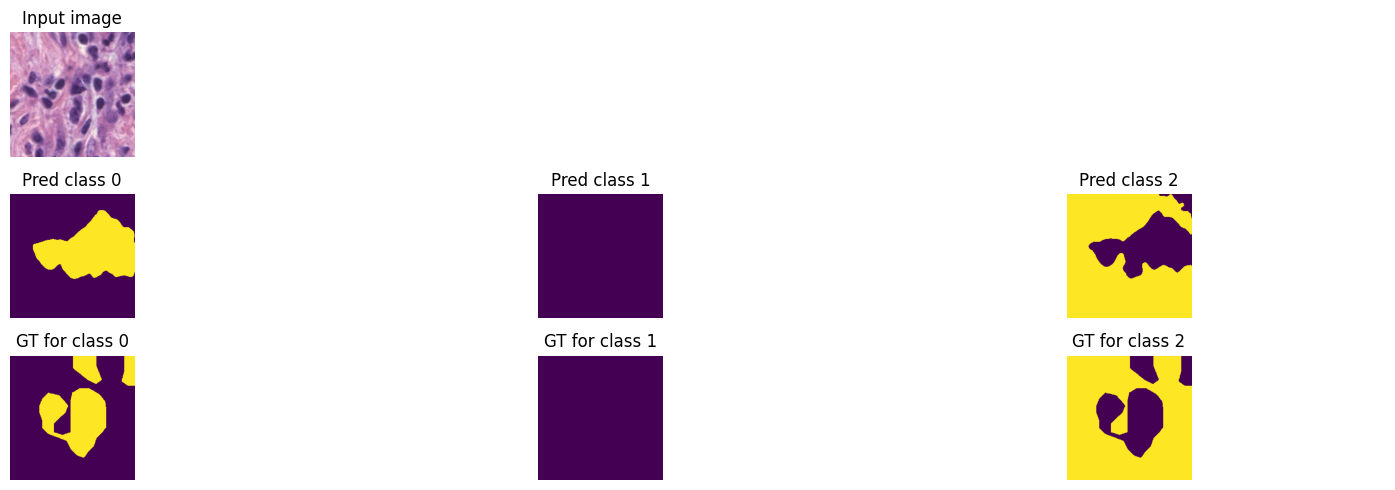

Train loss: 0.37117 | Time: 102m 2s | Val loss: 0.35101
Train_DICE_avg: 0.63502 | Train_Jaccard_avg: 0.57626 | Train_Sensitivity_avg: 0.74819 | Train_Specificity_avg: 0.83103 
Class 0 - Train_DICE: 0.61109 | Train_Jaccard: 0.56281 | Train_Sensitivity: 0.76302 | Train_Specificity: 0.85535 
Class 1 - Train_DICE: 0.74383 | Train_Jaccard: 0.69149 | Train_Sensitivity: 0.86780 | Train_Specificity: 0.80071 
Class 2 - Train_DICE: 0.55014 | Train_Jaccard: 0.47447 | Train_Sensitivity: 0.61377 | Train_Specificity: 0.83702 
Val_DICE_avg: 0.65175 | Val_Jaccard_avg: 0.59710 | Val_Sensitivity_avg: 0.78134 | Val_Specificity_avg: 0.79127 
Class 0 - Val_DICE: 0.65727 | Val_Jaccard: 0.61296 | Val_Sensitivity: 0.77936 | Val_Specificity: 0.85414 
Class 1 - Val_DICE: 0.75507 | Val_Jaccard: 0.70694 | Val_Sensitivity: 0.87471 | Val_Specificity: 0.72470 
Class 2 - Val_DICE: 0.54290 | Val_Jaccard: 0.47140 | Val_Sensitivity: 0.68994 | Val_Specificity: 0.79498 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.36838 | Time: 104m 17s | Val loss: 0.35040
Train_DICE_avg: 0.63720 | Train_Jaccard_avg: 0.57945 | Train_Sensitivity_avg: 0.75454 | Train_Specificity_avg: 0.83193 
Class 0 - Train_DICE: 0.61744 | Train_Jaccard: 0.56980 | Train_Sensitivity: 0.76939 | Train_Specificity: 0.85930 
Class 1 - Train_DICE: 0.74237 | Train_Jaccard: 0.69125 | Train_Sensitivity: 0.87120 | Train_Specificity: 0.79799 
Class 2 - Train_DICE: 0.55177 | Train_Jaccard: 0.47730 | Train_Sensitivity: 0.62304 | Train_Specificity: 0.83849 
Val_DICE_avg: 0.65247 | Val_Jaccard_avg: 0.59782 | Val_Sensitivity_avg: 0.78054 | Val_Specificity_avg: 0.79279 
Class 0 - Val_DICE: 0.65553 | Val_Jaccard: 0.61045 | Val_Sensitivity: 0.77809 | Val_Specificity: 0.85530 
Class 1 - Val_DICE: 0.75073 | Val_Jaccard: 0.70308 | Val_Sensitivity: 0.88173 | Val_Specificity: 0.72234 
Class 2 - Val_DICE: 0.55116 | Val_Jaccard: 0.47992 | Val_Sensitivity: 0.68178 | Val_Specificity: 0.80074 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.36628 | Time: 106m 31s | Val loss: 0.35210
Train_DICE_avg: 0.63746 | Train_Jaccard_avg: 0.57924 | Train_Sensitivity_avg: 0.75458 | Train_Specificity_avg: 0.83230 
Class 0 - Train_DICE: 0.61457 | Train_Jaccard: 0.56595 | Train_Sensitivity: 0.77259 | Train_Specificity: 0.85423 
Class 1 - Train_DICE: 0.74446 | Train_Jaccard: 0.69270 | Train_Sensitivity: 0.86544 | Train_Specificity: 0.80523 
Class 2 - Train_DICE: 0.55334 | Train_Jaccard: 0.47907 | Train_Sensitivity: 0.62571 | Train_Specificity: 0.83745 
Val_DICE_avg: 0.64911 | Val_Jaccard_avg: 0.59316 | Val_Sensitivity_avg: 0.76523 | Val_Specificity_avg: 0.79585 
Class 0 - Val_DICE: 0.64331 | Val_Jaccard: 0.59573 | Val_Sensitivity: 0.73684 | Val_Specificity: 0.86721 
Class 1 - Val_DICE: 0.75133 | Val_Jaccard: 0.70333 | Val_Sensitivity: 0.88689 | Val_Specificity: 0.71999 
Class 2 - Val_DICE: 0.55269 | Val_Jaccard: 0.48043 | Val_Sensitivity: 0.67196 | Val_Specificity: 0.80034 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.36297 | Time: 108m 46s | Val loss: 0.34423
Train_DICE_avg: 0.64046 | Train_Jaccard_avg: 0.58161 | Train_Sensitivity_avg: 0.75451 | Train_Specificity_avg: 0.83209 
Class 0 - Train_DICE: 0.62056 | Train_Jaccard: 0.57233 | Train_Sensitivity: 0.77519 | Train_Specificity: 0.85626 
Class 1 - Train_DICE: 0.74268 | Train_Jaccard: 0.69048 | Train_Sensitivity: 0.86754 | Train_Specificity: 0.80343 
Class 2 - Train_DICE: 0.55814 | Train_Jaccard: 0.48200 | Train_Sensitivity: 0.62079 | Train_Specificity: 0.83658 
Val_DICE_avg: 0.65791 | Val_Jaccard_avg: 0.60392 | Val_Sensitivity_avg: 0.78748 | Val_Specificity_avg: 0.79497 
Class 0 - Val_DICE: 0.66258 | Val_Jaccard: 0.61910 | Val_Sensitivity: 0.79570 | Val_Specificity: 0.85274 
Class 1 - Val_DICE: 0.75469 | Val_Jaccard: 0.70718 | Val_Sensitivity: 0.88738 | Val_Specificity: 0.72867 
Class 2 - Val_DICE: 0.55648 | Val_Jaccard: 0.48549 | Val_Sensitivity: 0.67935 | Val_Specificity: 0.80349 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.36142 | Time: 111m 0s | Val loss: 0.34839
Train_DICE_avg: 0.64172 | Train_Jaccard_avg: 0.58361 | Train_Sensitivity_avg: 0.76169 | Train_Specificity_avg: 0.83324 
Class 0 - Train_DICE: 0.62572 | Train_Jaccard: 0.57741 | Train_Sensitivity: 0.78061 | Train_Specificity: 0.85838 
Class 1 - Train_DICE: 0.74425 | Train_Jaccard: 0.69338 | Train_Sensitivity: 0.87030 | Train_Specificity: 0.80689 
Class 2 - Train_DICE: 0.55519 | Train_Jaccard: 0.48003 | Train_Sensitivity: 0.63415 | Train_Specificity: 0.83447 
Val_DICE_avg: 0.65132 | Val_Jaccard_avg: 0.59679 | Val_Sensitivity_avg: 0.77855 | Val_Specificity_avg: 0.79509 
Class 0 - Val_DICE: 0.65310 | Val_Jaccard: 0.60741 | Val_Sensitivity: 0.77454 | Val_Specificity: 0.85646 
Class 1 - Val_DICE: 0.74814 | Val_Jaccard: 0.70070 | Val_Sensitivity: 0.88463 | Val_Specificity: 0.72189 
Class 2 - Val_DICE: 0.55271 | Val_Jaccard: 0.48228 | Val_Sensitivity: 0.67649 | Val_Specificity: 0.80692 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


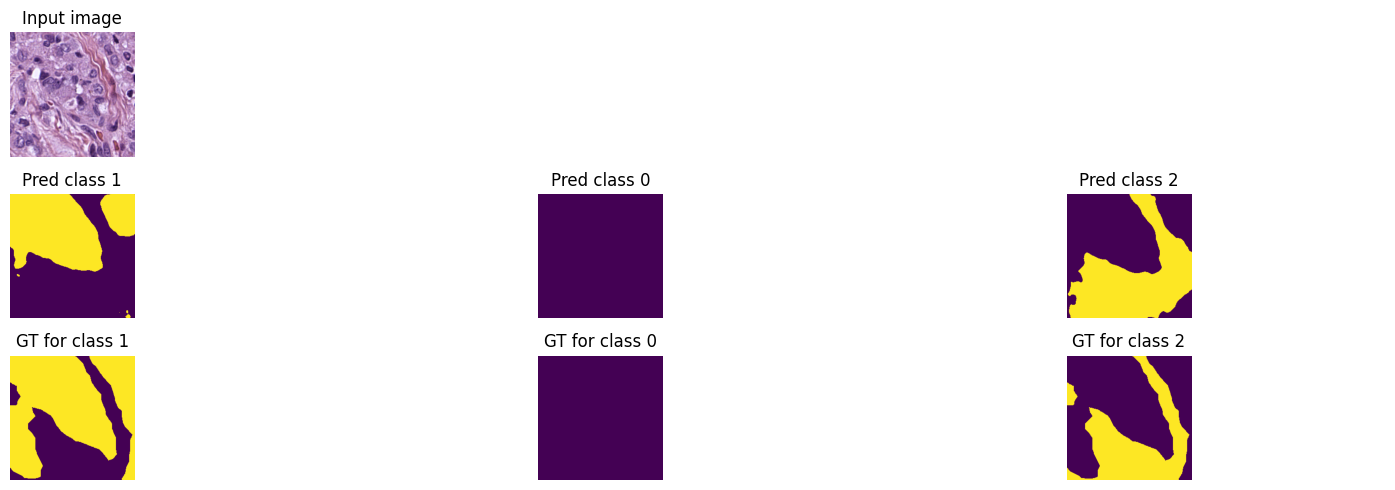

Train loss: 0.35706 | Time: 113m 15s | Val loss: 0.34766
Train_DICE_avg: 0.64583 | Train_Jaccard_avg: 0.58798 | Train_Sensitivity_avg: 0.76371 | Train_Specificity_avg: 0.83320 
Class 0 - Train_DICE: 0.63109 | Train_Jaccard: 0.58218 | Train_Sensitivity: 0.77827 | Train_Specificity: 0.85960 
Class 1 - Train_DICE: 0.74589 | Train_Jaccard: 0.69493 | Train_Sensitivity: 0.86872 | Train_Specificity: 0.80623 
Class 2 - Train_DICE: 0.56051 | Train_Jaccard: 0.48683 | Train_Sensitivity: 0.64413 | Train_Specificity: 0.83375 
Val_DICE_avg: 0.65387 | Val_Jaccard_avg: 0.60030 | Val_Sensitivity_avg: 0.78696 | Val_Specificity_avg: 0.79113 
Class 0 - Val_DICE: 0.65894 | Val_Jaccard: 0.61372 | Val_Sensitivity: 0.77873 | Val_Specificity: 0.85650 
Class 1 - Val_DICE: 0.75162 | Val_Jaccard: 0.70430 | Val_Sensitivity: 0.88017 | Val_Specificity: 0.72113 
Class 2 - Val_DICE: 0.55105 | Val_Jaccard: 0.48288 | Val_Sensitivity: 0.70197 | Val_Specificity: 0.79577 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.35754 | Time: 115m 30s | Val loss: 0.35637
Train_DICE_avg: 0.64534 | Train_Jaccard_avg: 0.58769 | Train_Sensitivity_avg: 0.76538 | Train_Specificity_avg: 0.83124 
Class 0 - Train_DICE: 0.63142 | Train_Jaccard: 0.58304 | Train_Sensitivity: 0.78603 | Train_Specificity: 0.85673 
Class 1 - Train_DICE: 0.74491 | Train_Jaccard: 0.69399 | Train_Sensitivity: 0.86175 | Train_Specificity: 0.80630 
Class 2 - Train_DICE: 0.55968 | Train_Jaccard: 0.48605 | Train_Sensitivity: 0.64838 | Train_Specificity: 0.83068 
Val_DICE_avg: 0.64317 | Val_Jaccard_avg: 0.58791 | Val_Sensitivity_avg: 0.76642 | Val_Specificity_avg: 0.78882 
Class 0 - Val_DICE: 0.63563 | Val_Jaccard: 0.58668 | Val_Sensitivity: 0.70705 | Val_Specificity: 0.86601 
Class 1 - Val_DICE: 0.74818 | Val_Jaccard: 0.70035 | Val_Sensitivity: 0.89644 | Val_Specificity: 0.71155 
Class 2 - Val_DICE: 0.54571 | Val_Jaccard: 0.47669 | Val_Sensitivity: 0.69577 | Val_Specificity: 0.78888 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.35411 | Time: 117m 44s | Val loss: 0.34775
Train_DICE_avg: 0.64736 | Train_Jaccard_avg: 0.58971 | Train_Sensitivity_avg: 0.76776 | Train_Specificity_avg: 0.83102 
Class 0 - Train_DICE: 0.63235 | Train_Jaccard: 0.58380 | Train_Sensitivity: 0.79254 | Train_Specificity: 0.85350 
Class 1 - Train_DICE: 0.74835 | Train_Jaccard: 0.69728 | Train_Sensitivity: 0.86226 | Train_Specificity: 0.80505 
Class 2 - Train_DICE: 0.56137 | Train_Jaccard: 0.48803 | Train_Sensitivity: 0.64849 | Train_Specificity: 0.83450 
Val_DICE_avg: 0.65238 | Val_Jaccard_avg: 0.59676 | Val_Sensitivity_avg: 0.77663 | Val_Specificity_avg: 0.79213 
Class 0 - Val_DICE: 0.65200 | Val_Jaccard: 0.60385 | Val_Sensitivity: 0.73825 | Val_Specificity: 0.86541 
Class 1 - Val_DICE: 0.75632 | Val_Jaccard: 0.70825 | Val_Sensitivity: 0.89335 | Val_Specificity: 0.71727 
Class 2 - Val_DICE: 0.54881 | Val_Jaccard: 0.47819 | Val_Sensitivity: 0.69828 | Val_Specificity: 0.79372 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


Train loss: 0.35221 | Time: 119m 58s | Val loss: 0.34569
Train_DICE_avg: 0.64999 | Train_Jaccard_avg: 0.59205 | Train_Sensitivity_avg: 0.76784 | Train_Specificity_avg: 0.83460 
Class 0 - Train_DICE: 0.63581 | Train_Jaccard: 0.58675 | Train_Sensitivity: 0.79570 | Train_Specificity: 0.85539 
Class 1 - Train_DICE: 0.74816 | Train_Jaccard: 0.69738 | Train_Sensitivity: 0.87205 | Train_Specificity: 0.80552 
Class 2 - Train_DICE: 0.56602 | Train_Jaccard: 0.49202 | Train_Sensitivity: 0.63577 | Train_Specificity: 0.84288 
Val_DICE_avg: 0.65401 | Val_Jaccard_avg: 0.59940 | Val_Sensitivity_avg: 0.78336 | Val_Specificity_avg: 0.78930 
Class 0 - Val_DICE: 0.65662 | Val_Jaccard: 0.61160 | Val_Sensitivity: 0.78689 | Val_Specificity: 0.84977 
Class 1 - Val_DICE: 0.75254 | Val_Jaccard: 0.70484 | Val_Sensitivity: 0.87858 | Val_Specificity: 0.72105 
Class 2 - Val_DICE: 0.55286 | Val_Jaccard: 0.48176 | Val_Sensitivity: 0.68462 | Val_Specificity: 0.79709 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.35057 | Time: 122m 12s | Val loss: 0.34307
Train_DICE_avg: 0.65047 | Train_Jaccard_avg: 0.59255 | Train_Sensitivity_avg: 0.76723 | Train_Specificity_avg: 0.83408 
Class 0 - Train_DICE: 0.63320 | Train_Jaccard: 0.58536 | Train_Sensitivity: 0.79909 | Train_Specificity: 0.85802 
Class 1 - Train_DICE: 0.75203 | Train_Jaccard: 0.70061 | Train_Sensitivity: 0.87047 | Train_Specificity: 0.80335 
Class 2 - Train_DICE: 0.56620 | Train_Jaccard: 0.49170 | Train_Sensitivity: 0.63214 | Train_Specificity: 0.84087 
Val_DICE_avg: 0.65658 | Val_Jaccard_avg: 0.60206 | Val_Sensitivity_avg: 0.78665 | Val_Specificity_avg: 0.79041 
Class 0 - Val_DICE: 0.65895 | Val_Jaccard: 0.61643 | Val_Sensitivity: 0.80140 | Val_Specificity: 0.85182 
Class 1 - Val_DICE: 0.75212 | Val_Jaccard: 0.70409 | Val_Sensitivity: 0.87822 | Val_Specificity: 0.72070 
Class 2 - Val_DICE: 0.55866 | Val_Jaccard: 0.48567 | Val_Sensitivity: 0.68034 | Val_Specificity: 0.79872 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


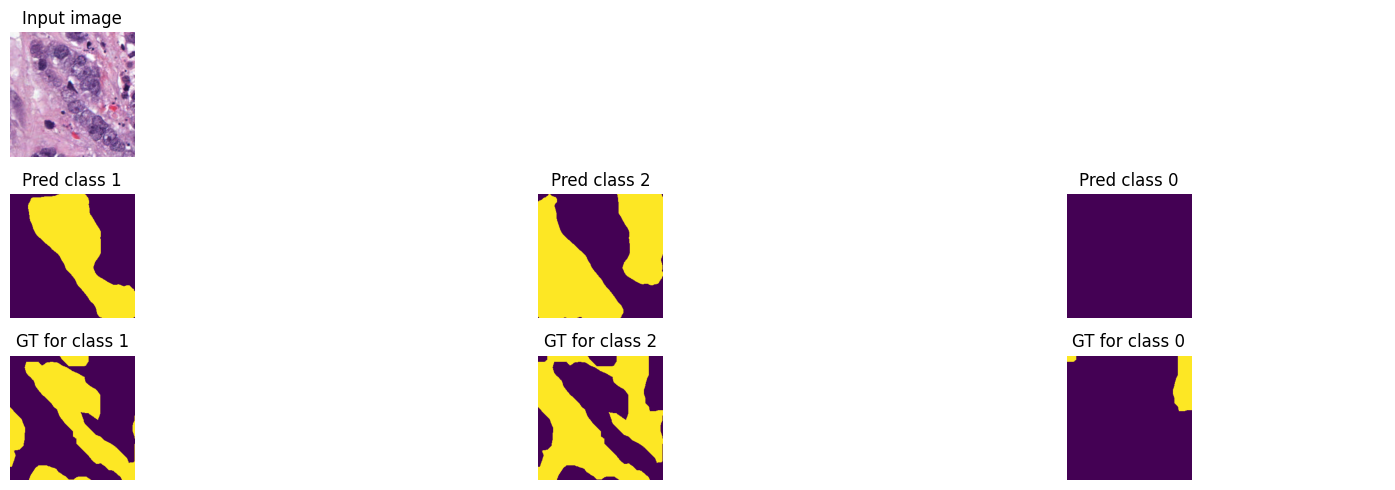

Train loss: 0.34882 | Time: 124m 27s | Val loss: 0.33922
Train_DICE_avg: 0.65195 | Train_Jaccard_avg: 0.59499 | Train_Sensitivity_avg: 0.77536 | Train_Specificity_avg: 0.83406 
Class 0 - Train_DICE: 0.63941 | Train_Jaccard: 0.59323 | Train_Sensitivity: 0.82360 | Train_Specificity: 0.85309 
Class 1 - Train_DICE: 0.75074 | Train_Jaccard: 0.70007 | Train_Sensitivity: 0.85737 | Train_Specificity: 0.81121 
Class 2 - Train_DICE: 0.56571 | Train_Jaccard: 0.49166 | Train_Sensitivity: 0.64511 | Train_Specificity: 0.83788 
Val_DICE_avg: 0.65971 | Val_Jaccard_avg: 0.60601 | Val_Sensitivity_avg: 0.79478 | Val_Specificity_avg: 0.79459 
Class 0 - Val_DICE: 0.66595 | Val_Jaccard: 0.62312 | Val_Sensitivity: 0.81562 | Val_Specificity: 0.85302 
Class 1 - Val_DICE: 0.75477 | Val_Jaccard: 0.70724 | Val_Sensitivity: 0.88010 | Val_Specificity: 0.72250 
Class 2 - Val_DICE: 0.55841 | Val_Jaccard: 0.48767 | Val_Sensitivity: 0.68863 | Val_Specificity: 0.80824 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.34971 | Time: 126m 42s | Val loss: 0.34146
Train_DICE_avg: 0.65143 | Train_Jaccard_avg: 0.59367 | Train_Sensitivity_avg: 0.76881 | Train_Specificity_avg: 0.83549 
Class 0 - Train_DICE: 0.63840 | Train_Jaccard: 0.59090 | Train_Sensitivity: 0.79226 | Train_Specificity: 0.86209 
Class 1 - Train_DICE: 0.75205 | Train_Jaccard: 0.70088 | Train_Sensitivity: 0.88304 | Train_Specificity: 0.80025 
Class 2 - Train_DICE: 0.56385 | Train_Jaccard: 0.48923 | Train_Sensitivity: 0.63113 | Train_Specificity: 0.84414 
Val_DICE_avg: 0.65701 | Val_Jaccard_avg: 0.60198 | Val_Sensitivity_avg: 0.78572 | Val_Specificity_avg: 0.79235 
Class 0 - Val_DICE: 0.66170 | Val_Jaccard: 0.61742 | Val_Sensitivity: 0.79094 | Val_Specificity: 0.85648 
Class 1 - Val_DICE: 0.75056 | Val_Jaccard: 0.70249 | Val_Sensitivity: 0.89865 | Val_Specificity: 0.71272 
Class 2 - Val_DICE: 0.55876 | Val_Jaccard: 0.48605 | Val_Sensitivity: 0.66757 | Val_Specificity: 0.80785 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.34694 | Time: 128m 56s | Val loss: 0.34488
Train_DICE_avg: 0.65349 | Train_Jaccard_avg: 0.59551 | Train_Sensitivity_avg: 0.76939 | Train_Specificity_avg: 0.83415 
Class 0 - Train_DICE: 0.64343 | Train_Jaccard: 0.59582 | Train_Sensitivity: 0.79712 | Train_Specificity: 0.86197 
Class 1 - Train_DICE: 0.74809 | Train_Jaccard: 0.69695 | Train_Sensitivity: 0.88904 | Train_Specificity: 0.79470 
Class 2 - Train_DICE: 0.56895 | Train_Jaccard: 0.49375 | Train_Sensitivity: 0.62200 | Train_Specificity: 0.84580 
Val_DICE_avg: 0.65430 | Val_Jaccard_avg: 0.59847 | Val_Sensitivity_avg: 0.77887 | Val_Specificity_avg: 0.79288 
Class 0 - Val_DICE: 0.66112 | Val_Jaccard: 0.61577 | Val_Sensitivity: 0.79021 | Val_Specificity: 0.85527 
Class 1 - Val_DICE: 0.74813 | Val_Jaccard: 0.69928 | Val_Sensitivity: 0.91722 | Val_Specificity: 0.70490 
Class 2 - Val_DICE: 0.55365 | Val_Jaccard: 0.48038 | Val_Sensitivity: 0.62917 | Val_Specificity: 0.81845 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.34365 | Time: 131m 11s | Val loss: 0.33828
Train_DICE_avg: 0.65693 | Train_Jaccard_avg: 0.59970 | Train_Sensitivity_avg: 0.77391 | Train_Specificity_avg: 0.83878 
Class 0 - Train_DICE: 0.64656 | Train_Jaccard: 0.59938 | Train_Sensitivity: 0.80551 | Train_Specificity: 0.86024 
Class 1 - Train_DICE: 0.75524 | Train_Jaccard: 0.70502 | Train_Sensitivity: 0.87705 | Train_Specificity: 0.81216 
Class 2 - Train_DICE: 0.56899 | Train_Jaccard: 0.49471 | Train_Sensitivity: 0.63917 | Train_Specificity: 0.84395 
Val_DICE_avg: 0.66004 | Val_Jaccard_avg: 0.60558 | Val_Sensitivity_avg: 0.79165 | Val_Specificity_avg: 0.79309 
Class 0 - Val_DICE: 0.66689 | Val_Jaccard: 0.62355 | Val_Sensitivity: 0.81875 | Val_Specificity: 0.85245 
Class 1 - Val_DICE: 0.75770 | Val_Jaccard: 0.70919 | Val_Sensitivity: 0.89076 | Val_Specificity: 0.71727 
Class 2 - Val_DICE: 0.55553 | Val_Jaccard: 0.48401 | Val_Sensitivity: 0.66545 | Val_Specificity: 0.80954 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.34444 | Time: 133m 26s | Val loss: 0.34004
Train_DICE_avg: 0.65562 | Train_Jaccard_avg: 0.59805 | Train_Sensitivity_avg: 0.77633 | Train_Specificity_avg: 0.83433 
Class 0 - Train_DICE: 0.64613 | Train_Jaccard: 0.59886 | Train_Sensitivity: 0.81736 | Train_Specificity: 0.85596 
Class 1 - Train_DICE: 0.75309 | Train_Jaccard: 0.70182 | Train_Sensitivity: 0.87107 | Train_Specificity: 0.80595 
Class 2 - Train_DICE: 0.56766 | Train_Jaccard: 0.49346 | Train_Sensitivity: 0.64057 | Train_Specificity: 0.84106 
Val_DICE_avg: 0.65711 | Val_Jaccard_avg: 0.60189 | Val_Sensitivity_avg: 0.78696 | Val_Specificity_avg: 0.79039 
Class 0 - Val_DICE: 0.66742 | Val_Jaccard: 0.62233 | Val_Sensitivity: 0.79915 | Val_Specificity: 0.85571 
Class 1 - Val_DICE: 0.74946 | Val_Jaccard: 0.70074 | Val_Sensitivity: 0.90291 | Val_Specificity: 0.70720 
Class 2 - Val_DICE: 0.55446 | Val_Jaccard: 0.48261 | Val_Sensitivity: 0.65884 | Val_Specificity: 0.80827 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.52it/s]


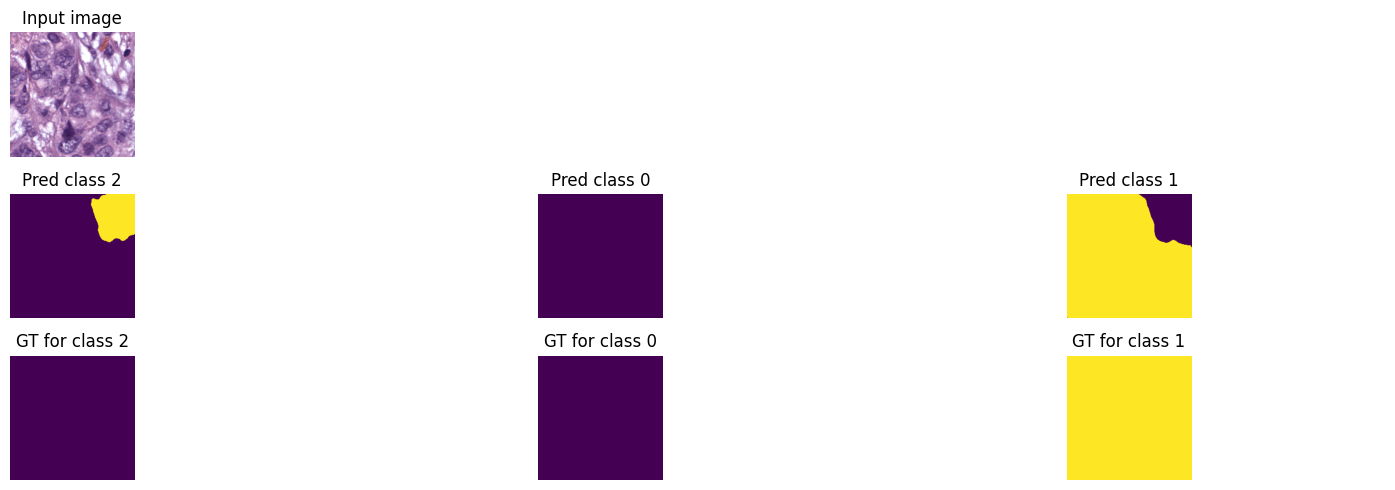

Train loss: 0.34099 | Time: 135m 42s | Val loss: 0.33774
Train_DICE_avg: 0.65976 | Train_Jaccard_avg: 0.60266 | Train_Sensitivity_avg: 0.78107 | Train_Specificity_avg: 0.83592 
Class 0 - Train_DICE: 0.64897 | Train_Jaccard: 0.60155 | Train_Sensitivity: 0.81624 | Train_Specificity: 0.85579 
Class 1 - Train_DICE: 0.75818 | Train_Jaccard: 0.70795 | Train_Sensitivity: 0.88018 | Train_Specificity: 0.80885 
Class 2 - Train_DICE: 0.57214 | Train_Jaccard: 0.49847 | Train_Sensitivity: 0.64679 | Train_Specificity: 0.84312 
Val_DICE_avg: 0.65872 | Val_Jaccard_avg: 0.60360 | Val_Sensitivity_avg: 0.78849 | Val_Specificity_avg: 0.79212 
Class 0 - Val_DICE: 0.66548 | Val_Jaccard: 0.61969 | Val_Sensitivity: 0.79119 | Val_Specificity: 0.85904 
Class 1 - Val_DICE: 0.75373 | Val_Jaccard: 0.70557 | Val_Sensitivity: 0.89404 | Val_Specificity: 0.71337 
Class 2 - Val_DICE: 0.55694 | Val_Jaccard: 0.48555 | Val_Sensitivity: 0.68023 | Val_Specificity: 0.80395 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Global Performance Metrics:
Loss mean: 0.33335, std: 0.05805
Dice Coefficient mean: 0.66972, std: 0.23030
Jaccard Index mean: 0.61401, std: 0.24507
Sensitivity mean: 0.74898, std: 0.20305
Specificity mean: 0.84371, std: 0.12350

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.67324, std: 0.39626
Jaccard mean: 0.62673, std: 0.40300
Sensitivity mean: 0.75742, std: 0.36715
Specificity mean: 0.86911, std: 0.24670

Class 1:
Dice mean: 0.75911, std: 0.34664
Jaccard mean: 0.71103, std: 0.35564
Sensitivity mean: 0.79823, std: 0.33027
Specificity mean: 0.85301, std: 0.28155

Class 2:
Dice mean: 0.57681, std: 0.37890
Jaccard mean: 0.50428, std: 0.37620
Sensitivity mean: 0.69129, std: 0.35435
Specificity mean: 0.80900, std: 0.26363
